In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import joblib, json, sys, os
from IPython.display import Image, display_png

sys.path.append("../script/")
#from MergeBrain import WholeBrainCells
import matplotlib.pyplot as plt
import pandas as pd

import sys, os, os.path, re, csv, math
import linecache
import numpy as  np
import pandas as pd
from matplotlib import pyplot as plt
from statistics import mean,stdev
import seaborn as sns

import csv
import pprint
#import ants
import tifffile
from multiprocessing import Pool
import datetime
from itertools import product

import numpy as np
import tifffile
import os
import pickle
import joblib
import pandas as pd
from matplotlib import pyplot as plt
import concurrent.futures
import gc
import json

import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rcParams['font.size'] = 20

In [3]:
conditions = {
    "WT_1m": ["#4_APPmodel_Ctr1m_1_2022_1104_1550","#4_APPmodel_Ctr1m_2_2022_1108_959","#4_APPmodel_Ctr1m_3_2022_1209_1751"],
    "WT_2m": ["8w_B6JWT_atlas_1_2022_0924_1847","8w_B6JWT_atlas_2_2022_0926_1326", "8w_B6JWT_atlas_3_2022_1005_1110", "8w_B6JWT_atlas_4_2022_1010_2030","8w_B6JWT_atlas_5_2023_0423_1604",],
    "WT_3m": ["#5_APPmodel_Ctr3m_1_2023_0113_1230", "#5_APPmodel_Ctr3m_2_2023_0210_1142", "#5_APPmodel_Ctr3m_3_2023_0227_1605", "#4_APPmodel_Ctr3m_4_2023_0427_1444",],
    "WT_5m": ["#4_APPmodel_Ctr5m_1_2022_1026_252", "#4_APPmodel_Ctr5m_2_2022_1028_2336", "#4_APPmodel_Ctr5m_3_2022_1101_140", "#4_APPmodel_Ctr5m_4_2023_0512_2057"],
    "WT_7m": [ "#5_APPmodel_Ctr7m_1_2023_0206_1534","#5_APPmodel_Ctr7m_2_2023_0313_1111","#5_APPmodel_Ctr7m_3_2023_0331_2139","#4_APPmodel_Ctr7m_4_2023_0516_1559","#5_APPmodel_Ctr7m_5_2023_0522_2218"],
    "WT_9m": [ "#5_APPmodel_Ctr9m_1_2023_0130_1607", "#5_APPmodel_Ctr9m_2_2023_0216_2052" ,"#5_APPmodel_Ctr9m_3_2023_0322_2014","#5_APPmodel_Ctr9m_4_2023_0518_1449"],
    "WT_12m": ["56w_B6JWT_atlas_1_2022_1128_1548", "56w_B6JWT_atlas_2_2022_1221_1537", "56w_B6JWT_atlas_3_2022_1224_1718"],
    
    "APP_1m": ["#4_APPmodel_APP1m_1_2022_1102_1304", "#4_APPmodel_APP1m_2_2022_1106_1708","#4_APPmodel_APP1m_3_2022_1213_2151","#4_APPmodel_APP1m_4_2023_0417_2052", ],
    "APP_3m": [ "#5_APPmodel_APP3m_2_2023_0123_1645", "#5_APPmodel_APP3m_3_2023_0212_2217","#5_APPmodel_APP3m_4_2023_0214_2027","#4_APPmodel_APP3m_5_2023_0502_1423",],
   "APP_5m": ["#4_APPmodel_APP5m_1_2022_1024_1336", "#4_APPmodel_APP5m_2_2022_1027_1333","#4_APPmodel_APP5m_3_2022_1030_1257", "#4_APPmodel_APP5m_4_2023_0509_1021"],
    "APP_7m": ["#5_APPmodel_APP7m_2_2023_0315_1540","#5_APPmodel_APP7m_3_2023_0310_1401","#5_APPmodel_APP7m_4_2023_0317_1630", "#5_APPmodel_APP7m_5_2023_0520_1723"],
    "APP_9m": ["#5_APPmodel_APP9m_1_2023_0117_1352","#5_APPmodel_APP9m_2_2023_0327_1425", "#5_APPmodel_APP9m_3_2023_0329_1611", "#5_APPmodel_APP9m_4_2023_0403_1443" ],
       
    "VCP_mut_2m": ["VCPmodel_E524A_0.5x_1_2022_0624_1303", "VCPmodel_E524A_0.5x_2_2022_0626_1338", "VCPmodel_E524A_0.5x_4_2022_0922_1217", "VCPmodel_E524A_0.5x_6_2022_0628_1157"], 
   "VCP_WT_2m": ["VCPmodel_WT_0.5x_1_2022_0625_1104","VCPmodel_WT_0.5x_2_2022_0917_1808", "VCPmodel_WT_0.5x_3_2022_0627_1257", "VCPmodel_WT_0.5x_4_2022_0921_950","VCPmodel_WT_0.5x_5_2022_0923_1454","VCPmodel_WT_0.5x_6_2022_0929_953"],
    "newVCP_mut_2m": ["#5_VCPmodel_E524A_0.5x_1_2023_0120_1929","#5_VCPmodel_E524A_0.5x_2_2023_0407_1031", "#5_VCPmodel_E524A_0.5x_3_2023_0413_2036"], 
   "newVCP_WT_2m": ["#5_VCPmodel_WT_0.5x_1_2023_0405_1108","#5_VCPmodel_WT_0.5x_2_2023_0115_1852","#5_VCPmodel_WT_0.5x_3_2023_0410_1246"], 
    
    "TMT_2m": ["#3_TMTmodel_TMT3.0_8w_1_2022_1014_1410", "#3_TMTmodel_TMT3.0_8w_2_2022_1020_938", "#3_TMTmodel_TMT3.0_8w_3_2022_1023_501", "#3_TMTmodel_TMT_8w_5_2022_1205_1147",],
  "Saline_2m": ["#3_TMTmodel_Saline_8w_1_2022_1016_1318", "#3_TMTmodel_Saline_8w_2_2022_1018_2103","#3_TMTmodel_Saline_8w_3_2022_1021_1910", "#3_TMTmodel_Saline_8w_4_2022_1202_1349", "#3_TMTmodel_Saline_8w_5_2022_1217_1723", "#3_TMTmodel_Saline_8w_6_2022_1216_001"],
    
}

In [4]:
data_Atlas = pd.read_csv(filepath_or_buffer="/export3/Imaging/atlas_for_fig/count_all_rgb.csv", encoding="ms932", sep=",")
# インプットの項目数（行数 * カラム数）を返却します。
data_atlas=np.array(data_Atlas.values.tolist())
#print(data_Atlas.size)
# 指定したカラムだけ抽出したDataFrameオブジェクトを返却します。
data_GO = pd.read_csv(filepath_or_buffer="/export3/Imaging/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")
# 指定したカラムだけ抽出したDataFrameオブジェクトを返却します。
data_GO

,id,graph_order,R,G,B
0,997,0,255,255,255
1,68,7,38,143,69
2,667,8,38,143,69
3,52192,9,38,143,69
4,52196,10,38,143,69
...,...,...,...,...,...
666,129,1299,170,170,170
667,140,1300,170,170,170
668,145,1301,170,170,170
669,153,1302,170,170,170


In [5]:
colorlist=[]

total = 0
for i in range (671):
    atlas_id_num = data_GO["id"].values[i]
    colorlist.append((data_GO["R"].values[i]/255,data_GO["G"].values[i]/255,data_GO["B"].values[i]/255))
colorlist_671=colorlist

In [6]:
# 下記は一部のidだけが対象
dir= "/export3/Imaging/cubic-atlas_v1-1/cubic-atlas/"
dir_ana=dir+"summary_CUBIC-Atlas-1-1.csv"


data_id = pd.read_csv(filepath_or_buffer=dir_ana, encoding="ms932", sep=",")
data_id

,id,acronym,node_name,graph_order,rgb_triplet,cell_count,volume(mm3),density(cells/mm3)
0,997,root,root,0,"[255, 255, 255]",78620375,506.05289,155359.99590
1,8,grey,Basic cell groups and regions,1,"[191, 218, 227]",70525778,449.60086,156863.08540
2,567,CH,Cerebrum,2,"[176, 240, 255]",39291452,275.87673,142423.94190
3,688,CTX,Cerebral cortex,3,"[176, 255, 184]",31750427,221.54964,143310.66800
4,695,CTXpl,Cortical plate,4,"[112, 255, 112]",30687805,212.64380,144315.54300
...,...,...,...,...,...,...,...,...
834,129,V3,third ventricle,1299,"[170, 170, 170]",144614,0.90005,160673.85380
835,140,AQ,cerebral aqueduct,1300,"[170, 170, 170]",26972,0.40620,66400.27696
836,145,V4,fourth ventricle,1301,"[170, 170, 170]",118275,0.96495,122570.72070
837,153,V4r,lateral recess,1302,"[170, 170, 170]",71934,0.46333,155254.98260


In [7]:
data_id[data_id["acronym"]=="FRP5"]

,id,acronym,node_name,graph_order,rgb_triplet,cell_count,volume(mm3),density(cells/mm3)
9,52192,FRP5,"Frontal pole, layer 5",9,"[38, 143, 69]",45561,0.37155,122625.1735


In [8]:
region_name=[]

for i in data_GO["id"]:
    region_name.append(data_id["acronym"][data_id["id"]==i].values)
region_name

[array(['root'], dtype=object),
 array(['FRP1'], dtype=object),
 array(['FRP2/3'], dtype=object),
 array(['FRP5'], dtype=object),
 array(['FRP6a'], dtype=object),
 array(['FRP6b'], dtype=object),
 array(['MOp1'], dtype=object),
 array(['MOp2/3'], dtype=object),
 array(['MOp5'], dtype=object),
 array(['MOp6a'], dtype=object),
 array(['MOp6b'], dtype=object),
 array(['MOs1'], dtype=object),
 array(['MOs2/3'], dtype=object),
 array(['MOs5'], dtype=object),
 array(['MOs6a'], dtype=object),
 array(['MOs6b'], dtype=object),
 array(['SSp-n1'], dtype=object),
 array(['SSp-n2/3'], dtype=object),
 array(['SSp-n4'], dtype=object),
 array(['SSp-n5'], dtype=object),
 array(['SSp-n6a'], dtype=object),
 array(['SSp-n6b'], dtype=object),
 array(['SSp-bfd1'], dtype=object),
 array(['SSp-bfd2/3'], dtype=object),
 array(['SSp-bfd4'], dtype=object),
 array(['SSp-bfd5'], dtype=object),
 array(['SSp-bfd6a'], dtype=object),
 array(['SSp-bfd6b'], dtype=object),
 array(['SSp-ll1'], dtype=object),
 array(['SSp-

In [9]:
ids = data_GO["id"].astype(int)
ids=np.array(ids)
ids

array([  997,    68,   667, 52192, 52196, 52264,   320,   943,   648,
         844,   882,   656,   962,   767,  1021,  1085,   558,   838,
         654,   702,   889,   929,   981,   201,  1047,  1070,  1038,
        1062,  1030,   113,  1094,  1128,   478,   510,   878,   657,
         950,   974,  1102,     2,   450,   854,   577,   625,   945,
        1026,  1006,   670,  1086,  1111,     9,   461, 18693, 18697,
       18701, 18705, 18709, 18713,   873,   806,  1035,  1090,   862,
         893,    36,   180,   148,   187,   638,   662,   897,  1106,
        1010,  1058,   857,   849,   527,   600,   678,   252,   156,
         243,   735,   251,   816,   847,   954,  1005,   696,   643,
         759,   791,   249,   456,   959,   755,   990,  1023,   520,
         598,  1074,   905,  1114,   233,   601,   649,   281,  1066,
         401,   433,  1046,   441,   421,   973,   573,   613,    74,
         121,   593,   821,   721,   778,    33,   305,   750,   269,
         869,   902,

In [10]:
# cellome_onset DataFrameの作成
ids = data_GO["id"].astype(int).unique()
cellome_onset = pd.DataFrame(index=ids)

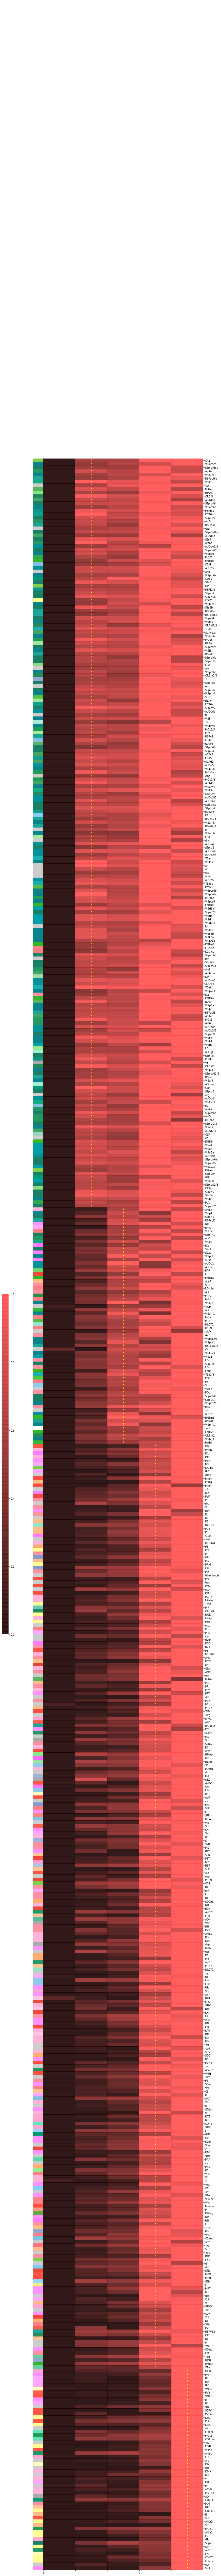

In [11]:
# Abeta increase
# APP only

import pandas as pd

# CSVファイルを読み込む
X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Abeta_increase.csv', index_col='atlasID')
X_all = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Abeta_all.csv', index_col='atlasID')
#X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1.csv', index_col='atlasID')

category = "APP_specific_Abeta_increase_onset(m)"

import ruptures as rpt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
from matplotlib import rcParams

#data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")

ids = data_GO["id"].astype(int).unique()

# フォントをDejaVu Sansに設定
rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10  # Adjust the size as needed

months = np.array([1, 3, 5, 7, 9])  # 月数をインデックスとして使用

# Function to detect change points in each row using ruptures
def detect_change_points(data):
    change_points = []
    for index, row in data.iterrows():
        # Extract the values and convert to numpy array
        values = row.values.astype(float)
        # Create a change point detection model instance
        model = "l2"  # Using L2 norm (least squares)
        algo = rpt.Binseg(model=model, min_size=1, jump=1).fit(values)
        # Detect change point
        result = algo.predict(n_bkps=1)
        change_points.append(months[result[:-1]][0])
    return change_points

# Run the change point detection function
data = X.copy()
# Detect change points
change_points = detect_change_points(data)

# データフレームに変化点を追加
data['Change Points'] = change_points


cellome_onset[category] = np.nan  # 初期値としてNaNを設定

# 存在する変化点をcellome_onsetに追加
for atlas_id, change_point in zip(data.index, change_points):
    if atlas_id in cellome_onset.index:
        cellome_onset.at[atlas_id, category] = change_point

for atlas_id in ids:
    if atlas_id in X_all.index:
        cellome_onset.at[atlas_id, "1m_" + category] = X_all.loc[atlas_id, "APP_1m"]
        cellome_onset.at[atlas_id, "3m_" + category] = X_all.loc[atlas_id, "APP_3m"]
        cellome_onset.at[atlas_id, "5m_" + category] = X_all.loc[atlas_id, "APP_5m"]
        cellome_onset.at[atlas_id, "7m_" + category] = X_all.loc[atlas_id, "APP_7m"]
        cellome_onset.at[atlas_id, "9m_" + category] = X_all.loc[atlas_id, "APP_9m"]  

# カスタムカラーマップの作成
def create_custom_cmap():
    colors = [(0.1, 0.0, 0.0, 0.9),  (1, 0.3, 0.3, 0.90)]
    cmap_name = "custom_cmap"
    # Create a colormap with interpolation between specified colors
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)
    return cmap

# Using the new custom colormap
cmap = create_custom_cmap()

# 行ごとに正規化
normalized_data = data.iloc[:, :-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# 行ごとに変化点月齢を強調するためのデータフレームを作成
stars = data.iloc[:, :-1].copy().astype(str)
stars[:] = ''  # 全てのセルを空文字列に設定
for i, cp in enumerate(change_points):
    month_col_cp = f'APP_{cp}m'
    if month_col_cp in stars.columns:
        stars.at[data.index[i], month_col_cp] = '*'

# 変化点でソート
sorted_indices = np.argsort(change_points)
sorted_normalized_data = normalized_data.iloc[sorted_indices]
sorted_stars = stars.iloc[sorted_indices]

# acronymのインデックスを追加
acronyms = data_id.set_index('id').loc[sorted_normalized_data.index, 'acronym']

colorlist = []
colorlist_671 = []

for atlas_id in sorted_normalized_data.index:
    for i in range(671):
        if data_GO["id"].values[i] == atlas_id:
            colorlist.append((data_GO["R"].values[i]/255, data_GO["G"].values[i]/255, data_GO["B"].values[i]/255))
    colorlist_671 = colorlist

# プロット
height = (17/55) * len(X)
g = sns.clustermap(sorted_normalized_data, cmap=cmap, row_colors=colorlist_671, vmin=0, vmax=1, row_cluster=False, col_cluster=False, annot=sorted_stars, fmt='', annot_kws={"size": 10, "weight": "bold", "color": "yellow"}, figsize=(12, height))
# 行ラベルをacronymに置き換え
g.ax_heatmap.set_yticklabels(acronyms)
g.ax_heatmap.yaxis.set_tick_params(rotation=0)
# x軸ラベルを変更
new_labels = ['1', '3', '5', '7', '9']
g.ax_heatmap.set_xticks(np.arange(len(new_labels)))  # Ensure there are correct number of ticks
g.ax_heatmap.set_xticklabels(new_labels)

# 不要な右端の縦軸ラベルを削除
g.ax_heatmap.set_ylabel('')

g.cax.set_position([.0, .4, .03, .1])  # [left, bottom, width, height]

plt.show()


In [12]:
X

,APP_1m,APP_3m,APP_5m,APP_7m,APP_9m
atlasID,,,,,
1,0.00,3.854405e+05,4.239844e+06,2.537483e+07,2.282664e+07
2,0.00,1.287066e+08,1.245277e+08,1.542380e+08,1.016105e+08
6,2668.50,2.265351e+06,1.999350e+06,2.981140e+06,2.663926e+06
7,23037.25,5.718175e+05,2.836462e+06,8.562454e+06,1.159165e+07
9,0.00,5.332108e+07,5.745858e+07,7.506603e+07,5.305787e+07
...,...,...,...,...,...
60846,3642509.75,1.229347e+07,2.406658e+06,4.299463e+07,1.283985e+08
60850,0.00,0.000000e+00,6.667984e+06,1.595553e+07,1.209763e+08
60858,0.00,3.479982e+05,1.183194e+07,6.820766e+07,8.543358e+07


In [13]:
len(X)

589

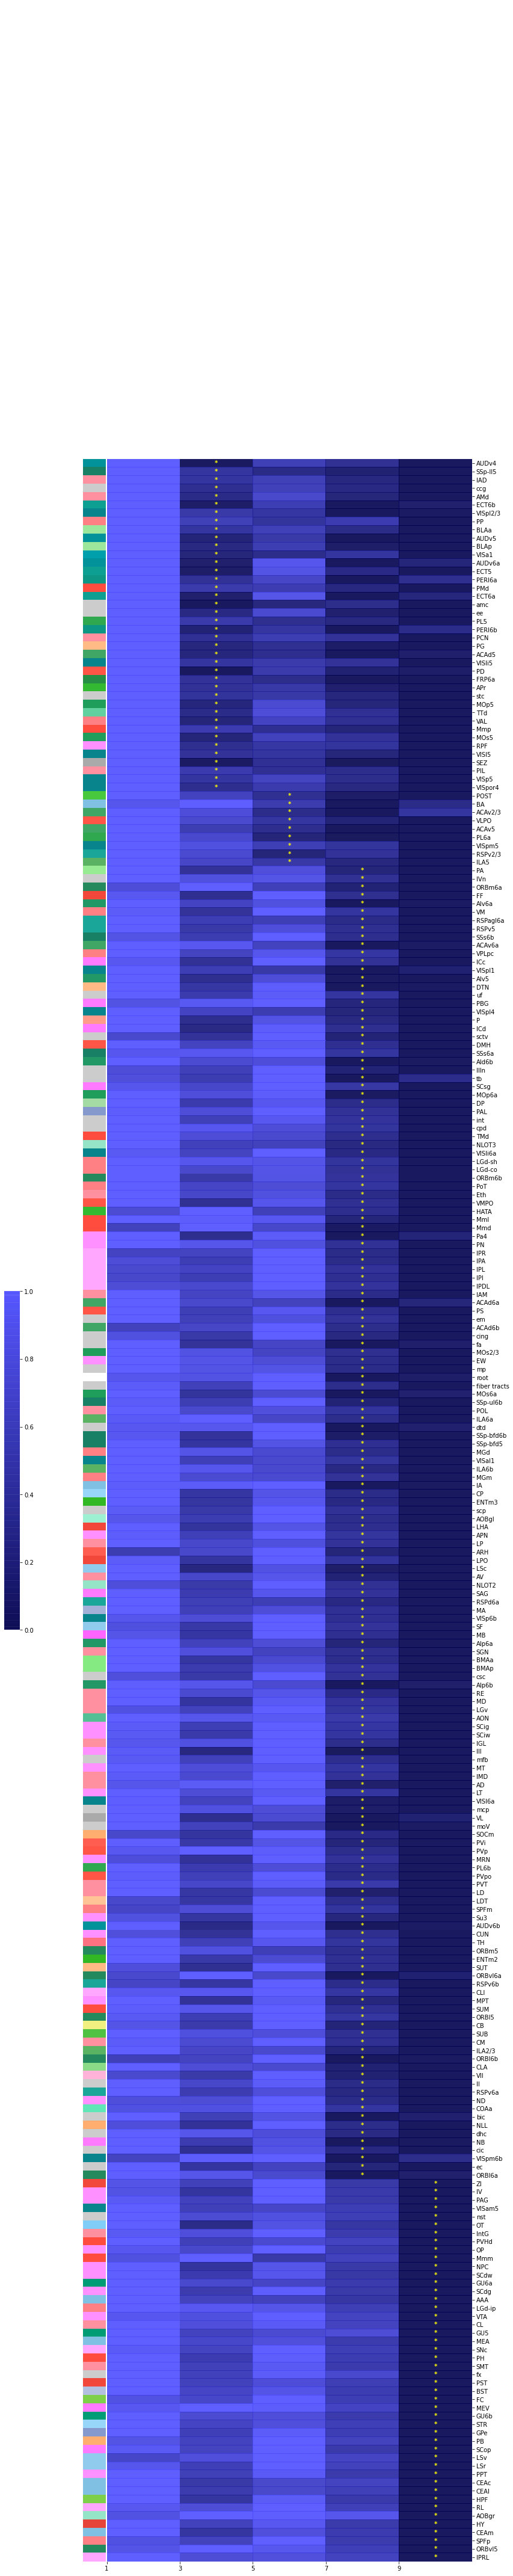

In [14]:
# Abeta increase
# APP only

import pandas as pd

# CSVファイルを読み込む
X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_NeuN_decrease.csv', index_col='atlasID')
X_all = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_NeuN_all.csv', index_col='atlasID')
#X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1.csv', index_col='atlasID')

X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_raw_value_regions_NeuN_decrease.csv', index_col='atlasID')

X = X[~X.index.isin(X2.index)] # WTのatlasIDとのoverlapを消して、APP specificにする

category = "APP_specific_NeuN_decrease_onset(m)"

import ruptures as rpt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
from matplotlib import rcParams

#data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")

ids = data_GO["id"].astype(int).unique()

# フォントをDejaVu Sansに設定
rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10  # Adjust the size as needed

months = np.array([1, 3, 5, 7, 9])  # 月数をインデックスとして使用

# Function to detect change points in each row using ruptures
def detect_change_points(data):
    change_points = []
    for index, row in data.iterrows():
        # Extract the values and convert to numpy array
        values = row.values.astype(float)
        # Create a change point detection model instance
        model = "l2"  # Using L2 norm (least squares)
        algo = rpt.Binseg(model=model, min_size=1, jump=1).fit(values)
        # Detect change point
        result = algo.predict(n_bkps=1)
        change_points.append(months[result[:-1]][0])
    return change_points

# Run the change point detection function
data = X.copy()
# Detect change points
change_points = detect_change_points(data)

# データフレームに変化点を追加
data['Change Points'] = change_points


cellome_onset[category] = np.nan  # 初期値としてNaNを設定

# 存在する変化点をcellome_onsetに追加
for atlas_id, change_point in zip(data.index, change_points):
    if atlas_id in cellome_onset.index:
        cellome_onset.at[atlas_id, category] = change_point

for atlas_id in ids:
    if atlas_id in X_all.index:
        cellome_onset.at[atlas_id, "1m_" + category] = X_all.loc[atlas_id, "APP_1m"]
        cellome_onset.at[atlas_id, "3m_" + category] = X_all.loc[atlas_id, "APP_3m"]
        cellome_onset.at[atlas_id, "5m_" + category] = X_all.loc[atlas_id, "APP_5m"]
        cellome_onset.at[atlas_id, "7m_" + category] = X_all.loc[atlas_id, "APP_7m"]
        cellome_onset.at[atlas_id, "9m_" + category] = X_all.loc[atlas_id, "APP_9m"]  

# カスタムカラーマップの作成
def create_custom_cmap():
    #colors = [(0.1, 0.0, 0.0, 0.9),  (1, 0.3, 0.3, 0.90)] # increase
    colors = [(0, 0, 0.3, 0.9),  (0.3, 0.3, 1, 0.9)] # decrease
    cmap_name = "custom_cmap"
    # Create a colormap with interpolation between specified colors
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)
    return cmap

# Using the new custom colormap
cmap = create_custom_cmap()

# 行ごとに正規化
normalized_data = data.iloc[:, :-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# 行ごとに変化点月齢を強調するためのデータフレームを作成
stars = data.iloc[:, :-1].copy().astype(str)
stars[:] = ''  # 全てのセルを空文字列に設定
for i, cp in enumerate(change_points):
    month_col_cp = f'APP_{cp}m'
    if month_col_cp in stars.columns:
        stars.at[data.index[i], month_col_cp] = '*'

# 変化点でソート
sorted_indices = np.argsort(change_points)
sorted_normalized_data = normalized_data.iloc[sorted_indices]
sorted_stars = stars.iloc[sorted_indices]

# acronymのインデックスを追加
acronyms = data_id.set_index('id').loc[sorted_normalized_data.index, 'acronym']

colorlist = []
colorlist_671 = []

for atlas_id in sorted_normalized_data.index:
    for i in range(671):
        if data_GO["id"].values[i] == atlas_id:
            colorlist.append((data_GO["R"].values[i]/255, data_GO["G"].values[i]/255, data_GO["B"].values[i]/255))
    colorlist_671 = colorlist

# プロット
height = (17/55) * len(X)
g = sns.clustermap(sorted_normalized_data, cmap=cmap, row_colors=colorlist_671, vmin=0, vmax=1, row_cluster=False, col_cluster=False, annot=sorted_stars, fmt='', annot_kws={"size": 10, "weight": "bold", "color": "yellow"}, figsize=(12, height))
# 行ラベルをacronymに置き換え
g.ax_heatmap.set_yticklabels(acronyms)
g.ax_heatmap.yaxis.set_tick_params(rotation=0)
# x軸ラベルを変更
new_labels = ['1', '3', '5', '7', '9']
g.ax_heatmap.set_xticks(np.arange(len(new_labels)))  # Ensure there are correct number of ticks
g.ax_heatmap.set_xticklabels(new_labels)

# 不要な右端の縦軸ラベルを削除
g.ax_heatmap.set_ylabel('')

g.cax.set_position([.0, .4, .03, .1])  # [left, bottom, width, height]

plt.show()


In [15]:
X

,APP_1m,APP_3m,APP_5m,APP_7m,APP_9m
atlasID,,,,,
6,11159.00,9561.75,10838.00,8867.50,7473.25
10,115788.50,105309.25,117083.00,102270.00,91429.00
17,92540.00,84239.50,93950.50,83171.75,75622.75
23,69270.00,64564.75,64513.50,62621.50,57588.00
26,84461.00,77634.75,84268.25,77129.00,70682.00
...,...,...,...,...,...
60846,58783.00,57807.25,62838.75,54243.50,49204.00
60850,44976.25,42063.25,51389.25,37741.25,31367.50
60858,62539.50,60950.75,69396.00,52610.75,42233.50


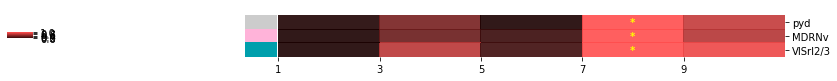

In [38]:
# Abeta increase
# APP only

import pandas as pd

# CSVファイルを読み込む
#X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Abeta_increase.csv', index_col='atlasID')
X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_NeuN_increase.csv', index_col='atlasID')
X_all = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_NeuN_all.csv', index_col='atlasID')
#X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1.csv', index_col='atlasID')

X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_raw_value_regions_NeuN_increase.csv', index_col='atlasID')

X = X[~X.index.isin(X2.index)] # WTのatlasIDとのoverlapを消して、APP specificにする

category = "APP_specific_NeuN_increase_onset(m)"

import ruptures as rpt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
from matplotlib import rcParams

#data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")

ids = data_GO["id"].astype(int).unique()

# フォントをDejaVu Sansに設定
rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10  # Adjust the size as needed

months = np.array([1, 3, 5, 7, 9])  # 月数をインデックスとして使用

# Function to detect change points in each row using ruptures
def detect_change_points(data):
    change_points = []
    for index, row in data.iterrows():
        # Extract the values and convert to numpy array
        values = row.values.astype(float)
        # Create a change point detection model instance
        model = "l2"  # Using L2 norm (least squares)
        algo = rpt.Binseg(model=model, min_size=1, jump=1).fit(values)
        # Detect change point
        result = algo.predict(n_bkps=1)
        change_points.append(months[result[:-1]][0])
    return change_points

# Run the change point detection function
data = X.copy()
# Detect change points
change_points = detect_change_points(data)

# データフレームに変化点を追加
data['Change Points'] = change_points


cellome_onset[category] = np.nan  # 初期値としてNaNを設定

# 存在する変化点をcellome_onsetに追加
for atlas_id, change_point in zip(data.index, change_points):
    if atlas_id in cellome_onset.index:
        cellome_onset.at[atlas_id, category] = change_point

for atlas_id in ids:
    if atlas_id in X_all.index:
        cellome_onset.at[atlas_id, "1m_" + category] = X_all.loc[atlas_id, "APP_1m"]
        cellome_onset.at[atlas_id, "3m_" + category] = X_all.loc[atlas_id, "APP_3m"]
        cellome_onset.at[atlas_id, "5m_" + category] = X_all.loc[atlas_id, "APP_5m"]
        cellome_onset.at[atlas_id, "7m_" + category] = X_all.loc[atlas_id, "APP_7m"]
        cellome_onset.at[atlas_id, "9m_" + category] = X_all.loc[atlas_id, "APP_9m"]  

# カスタムカラーマップの作成
def create_custom_cmap():
    colors = [(0.1, 0.0, 0.0, 0.9),  (1, 0.3, 0.3, 0.90)]
    cmap_name = "custom_cmap"
    # Create a colormap with interpolation between specified colors
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)
    return cmap

# Using the new custom colormap
cmap = create_custom_cmap()

# 行ごとに正規化
normalized_data = data.iloc[:, :-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# 行ごとに変化点月齢を強調するためのデータフレームを作成
stars = data.iloc[:, :-1].copy().astype(str)
stars[:] = ''  # 全てのセルを空文字列に設定
for i, cp in enumerate(change_points):
    month_col_cp = f'APP_{cp}m'
    if month_col_cp in stars.columns:
        stars.at[data.index[i], month_col_cp] = '*'

# 変化点でソート
sorted_indices = np.argsort(change_points)
sorted_normalized_data = normalized_data.iloc[sorted_indices]
sorted_stars = stars.iloc[sorted_indices]

# acronymのインデックスを追加
acronyms = data_id.set_index('id').loc[sorted_normalized_data.index, 'acronym']

colorlist = []
colorlist_671 = []

for atlas_id in sorted_normalized_data.index:
    for i in range(671):
        if data_GO["id"].values[i] == atlas_id:
            colorlist.append((data_GO["R"].values[i]/255, data_GO["G"].values[i]/255, data_GO["B"].values[i]/255))
    colorlist_671 = colorlist

# プロット
height = (17/55) * len(X)
g = sns.clustermap(sorted_normalized_data, cmap=cmap, row_colors=colorlist_671, vmin=0, vmax=1, row_cluster=False, col_cluster=False, annot=sorted_stars, fmt='', annot_kws={"size": 10, "weight": "bold", "color": "yellow"}, figsize=(12, height))
# 行ラベルをacronymに置き換え
g.ax_heatmap.set_yticklabels(acronyms)
g.ax_heatmap.yaxis.set_tick_params(rotation=0)
# x軸ラベルを変更
new_labels = ['1', '3', '5', '7', '9']
g.ax_heatmap.set_xticks(np.arange(len(new_labels)))  # Ensure there are correct number of ticks
g.ax_heatmap.set_xticklabels(new_labels)

# 不要な右端の縦軸ラベルを削除
g.ax_heatmap.set_ylabel('')

g.cax.set_position([.0, .4, .03, .1])  # [left, bottom, width, height]

plt.show()


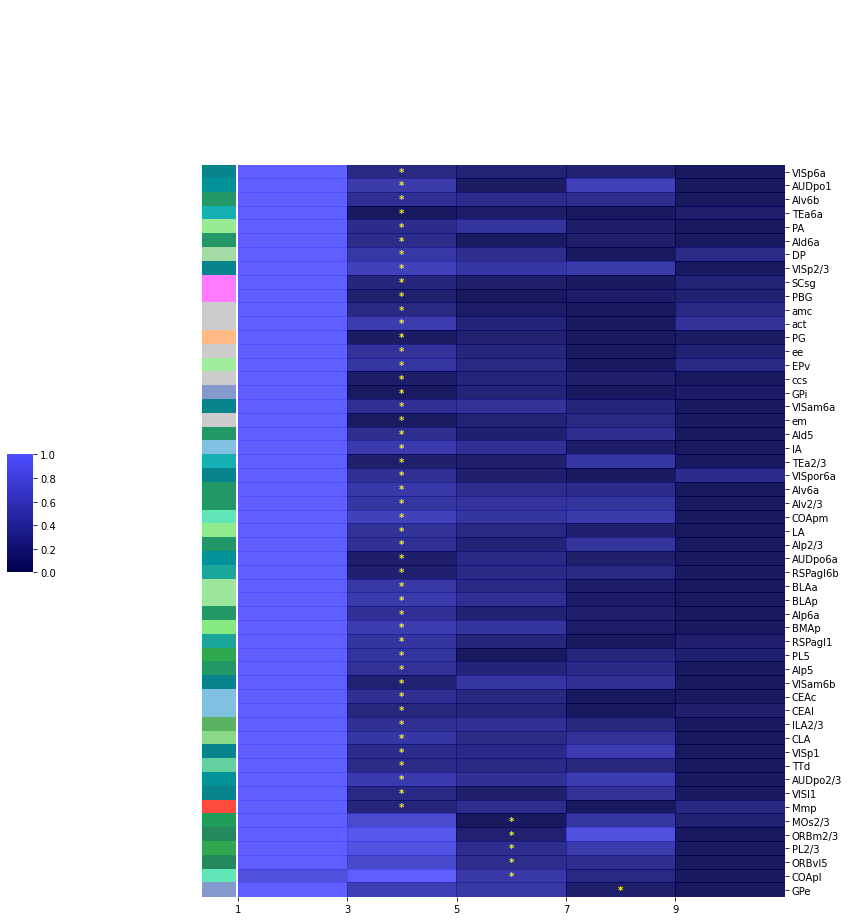

In [39]:
# Abeta increase
# APP only

import pandas as pd

# CSVファイルを読み込む
X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Iba1_decrease.csv', index_col='atlasID')
X_all = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Iba1_all.csv', index_col='atlasID')
#X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1.csv', index_col='atlasID')

X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_raw_value_regions_Iba1_decrease.csv', index_col='atlasID')

X = X[~X.index.isin(X2.index)] # WTのatlasIDとのoverlapを消して、APP specificにする

category = "APP_specific_Iba1_decrease_onset(m)"

import ruptures as rpt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
from matplotlib import rcParams

#data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")

ids = data_GO["id"].astype(int).unique()

# フォントをDejaVu Sansに設定
rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10  # Adjust the size as needed

months = np.array([1, 3, 5, 7, 9])  # 月数をインデックスとして使用

# Function to detect change points in each row using ruptures
def detect_change_points(data):
    change_points = []
    for index, row in data.iterrows():
        # Extract the values and convert to numpy array
        values = row.values.astype(float)
        # Create a change point detection model instance
        model = "l2"  # Using L2 norm (least squares)
        algo = rpt.Binseg(model=model, min_size=1, jump=1).fit(values)
        # Detect change point
        result = algo.predict(n_bkps=1)
        change_points.append(months[result[:-1]][0])
    return change_points

# Run the change point detection function
data = X.copy()
# Detect change points
change_points = detect_change_points(data)

# データフレームに変化点を追加
data['Change Points'] = change_points


cellome_onset[category] = np.nan  # 初期値としてNaNを設定

# 存在する変化点をcellome_onsetに追加
for atlas_id, change_point in zip(data.index, change_points):
    if atlas_id in cellome_onset.index:
        cellome_onset.at[atlas_id, category] = change_point

for atlas_id in ids:
    if atlas_id in X_all.index:
        cellome_onset.at[atlas_id, "1m_" + category] = X_all.loc[atlas_id, "APP_1m"]
        cellome_onset.at[atlas_id, "3m_" + category] = X_all.loc[atlas_id, "APP_3m"]
        cellome_onset.at[atlas_id, "5m_" + category] = X_all.loc[atlas_id, "APP_5m"]
        cellome_onset.at[atlas_id, "7m_" + category] = X_all.loc[atlas_id, "APP_7m"]
        cellome_onset.at[atlas_id, "9m_" + category] = X_all.loc[atlas_id, "APP_9m"]  

# カスタムカラーマップの作成
def create_custom_cmap():
    #colors = [(0.1, 0.0, 0.0, 0.9),  (1, 0.3, 0.3, 0.90)] # increase
    colors = [(0, 0, 0.3, 0.9),  (0.3, 0.3, 1, 0.9)] # decrease
    cmap_name = "custom_cmap"
    # Create a colormap with interpolation between specified colors
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)
    return cmap

# Using the new custom colormap
cmap = create_custom_cmap()

# 行ごとに正規化
normalized_data = data.iloc[:, :-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# 行ごとに変化点月齢を強調するためのデータフレームを作成
stars = data.iloc[:, :-1].copy().astype(str)
stars[:] = ''  # 全てのセルを空文字列に設定
for i, cp in enumerate(change_points):
    month_col_cp = f'APP_{cp}m'
    if month_col_cp in stars.columns:
        stars.at[data.index[i], month_col_cp] = '*'

# 変化点でソート
sorted_indices = np.argsort(change_points)
sorted_normalized_data = normalized_data.iloc[sorted_indices]
sorted_stars = stars.iloc[sorted_indices]

# acronymのインデックスを追加
acronyms = data_id.set_index('id').loc[sorted_normalized_data.index, 'acronym']

colorlist = []
colorlist_671 = []

for atlas_id in sorted_normalized_data.index:
    for i in range(671):
        if data_GO["id"].values[i] == atlas_id:
            colorlist.append((data_GO["R"].values[i]/255, data_GO["G"].values[i]/255, data_GO["B"].values[i]/255))
    colorlist_671 = colorlist

# プロット
height = (17/55) * len(X)
g = sns.clustermap(sorted_normalized_data, cmap=cmap, row_colors=colorlist_671, vmin=0, vmax=1, row_cluster=False, col_cluster=False, annot=sorted_stars, fmt='', annot_kws={"size": 10, "weight": "bold", "color": "yellow"}, figsize=(12, height))
# 行ラベルをacronymに置き換え
g.ax_heatmap.set_yticklabels(acronyms)
g.ax_heatmap.yaxis.set_tick_params(rotation=0)
# x軸ラベルを変更
new_labels = ['1', '3', '5', '7', '9']
g.ax_heatmap.set_xticks(np.arange(len(new_labels)))  # Ensure there are correct number of ticks
g.ax_heatmap.set_xticklabels(new_labels)

# 不要な右端の縦軸ラベルを削除
g.ax_heatmap.set_ylabel('')

g.cax.set_position([.0, .4, .03, .1])  # [left, bottom, width, height]

plt.show()


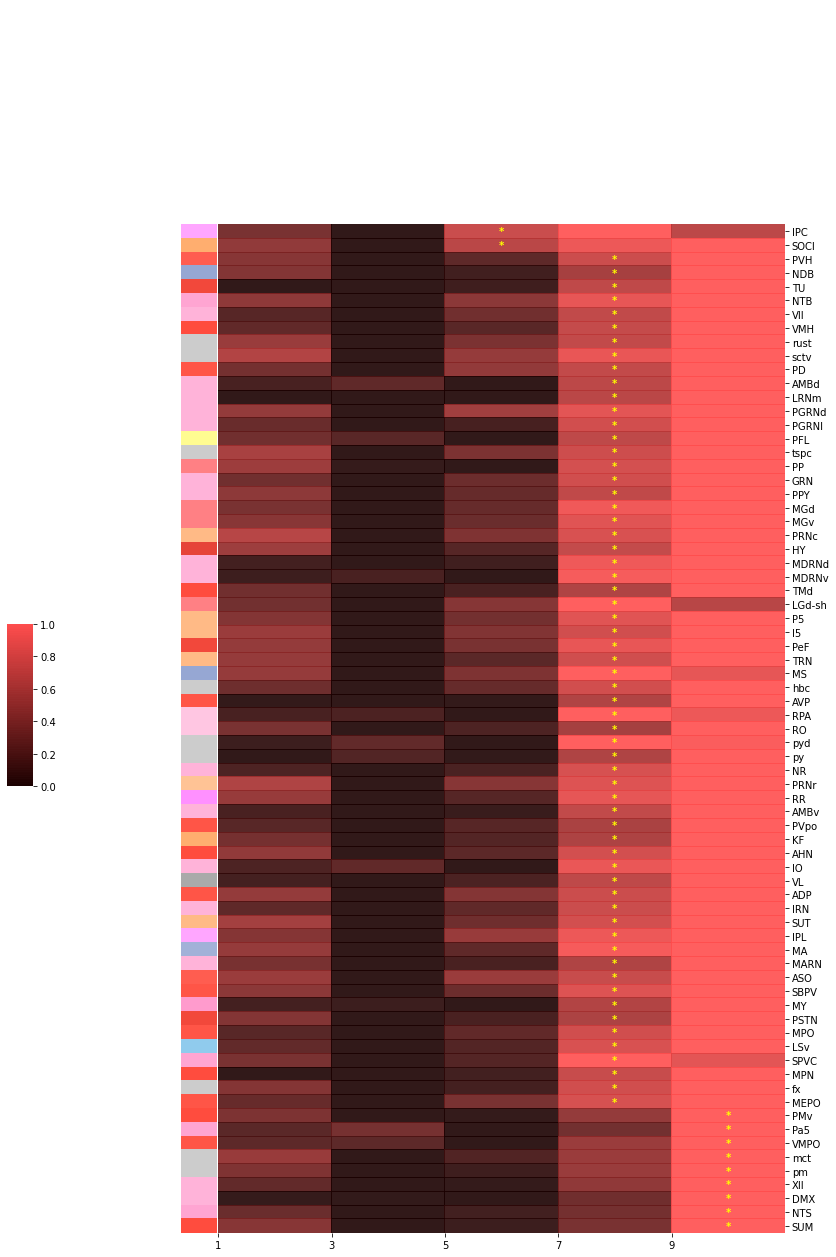

In [40]:
# Abeta increase
# APP only

import pandas as pd

# CSVファイルを読み込む
#X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Abeta_increase.csv', index_col='atlasID')
X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Iba1_increase.csv', index_col='atlasID')
X_all = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Iba1_all.csv', index_col='atlasID')
#X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1.csv', index_col='atlasID')

X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_raw_value_regions_Iba1_increase.csv', index_col='atlasID')

X = X[~X.index.isin(X2.index)] # WTのatlasIDとのoverlapを消して、APP specificにする

category = "APP_specific_Iba1_increase_onset(m)"

import ruptures as rpt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
from matplotlib import rcParams

#data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")

ids = data_GO["id"].astype(int).unique()

# フォントをDejaVu Sansに設定
rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10  # Adjust the size as needed

months = np.array([1, 3, 5, 7, 9])  # 月数をインデックスとして使用

# Function to detect change points in each row using ruptures
def detect_change_points(data):
    change_points = []
    for index, row in data.iterrows():
        # Extract the values and convert to numpy array
        values = row.values.astype(float)
        # Create a change point detection model instance
        model = "l2"  # Using L2 norm (least squares)
        algo = rpt.Binseg(model=model, min_size=1, jump=1).fit(values)
        # Detect change point
        result = algo.predict(n_bkps=1)
        change_points.append(months[result[:-1]][0])
    return change_points

# Run the change point detection function
data = X.copy()
# Detect change points
change_points = detect_change_points(data)

# データフレームに変化点を追加
data['Change Points'] = change_points


cellome_onset[category] = np.nan  # 初期値としてNaNを設定

# 存在する変化点をcellome_onsetに追加
for atlas_id, change_point in zip(data.index, change_points):
    if atlas_id in cellome_onset.index:
        cellome_onset.at[atlas_id, category] = change_point

for atlas_id in ids:
    if atlas_id in X_all.index:
        cellome_onset.at[atlas_id, "1m_" + category] = X_all.loc[atlas_id, "APP_1m"]
        cellome_onset.at[atlas_id, "3m_" + category] = X_all.loc[atlas_id, "APP_3m"]
        cellome_onset.at[atlas_id, "5m_" + category] = X_all.loc[atlas_id, "APP_5m"]
        cellome_onset.at[atlas_id, "7m_" + category] = X_all.loc[atlas_id, "APP_7m"]
        cellome_onset.at[atlas_id, "9m_" + category] = X_all.loc[atlas_id, "APP_9m"]  

# カスタムカラーマップの作成
def create_custom_cmap():
    colors = [(0.1, 0.0, 0.0, 0.9),  (1, 0.3, 0.3, 0.90)]
    cmap_name = "custom_cmap"
    # Create a colormap with interpolation between specified colors
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)
    return cmap

# Using the new custom colormap
cmap = create_custom_cmap()

# 行ごとに正規化
normalized_data = data.iloc[:, :-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# 行ごとに変化点月齢を強調するためのデータフレームを作成
stars = data.iloc[:, :-1].copy().astype(str)
stars[:] = ''  # 全てのセルを空文字列に設定
for i, cp in enumerate(change_points):
    month_col_cp = f'APP_{cp}m'
    if month_col_cp in stars.columns:
        stars.at[data.index[i], month_col_cp] = '*'

# 変化点でソート
sorted_indices = np.argsort(change_points)
sorted_normalized_data = normalized_data.iloc[sorted_indices]
sorted_stars = stars.iloc[sorted_indices]

# acronymのインデックスを追加
acronyms = data_id.set_index('id').loc[sorted_normalized_data.index, 'acronym']

colorlist = []
colorlist_671 = []

for atlas_id in sorted_normalized_data.index:
    for i in range(671):
        if data_GO["id"].values[i] == atlas_id:
            colorlist.append((data_GO["R"].values[i]/255, data_GO["G"].values[i]/255, data_GO["B"].values[i]/255))
    colorlist_671 = colorlist

# プロット
height = (17/55) * len(X)
g = sns.clustermap(sorted_normalized_data, cmap=cmap, row_colors=colorlist_671, vmin=0, vmax=1, row_cluster=False, col_cluster=False, annot=sorted_stars, fmt='', annot_kws={"size": 10, "weight": "bold", "color": "yellow"}, figsize=(12, height))
# 行ラベルをacronymに置き換え
g.ax_heatmap.set_yticklabels(acronyms)
g.ax_heatmap.yaxis.set_tick_params(rotation=0)
# x軸ラベルを変更
new_labels = ['1', '3', '5', '7', '9']
g.ax_heatmap.set_xticks(np.arange(len(new_labels)))  # Ensure there are correct number of ticks
g.ax_heatmap.set_xticklabels(new_labels)

# 不要な右端の縦軸ラベルを削除
g.ax_heatmap.set_ylabel('')

g.cax.set_position([.0, .4, .03, .1])  # [left, bottom, width, height]

plt.show()


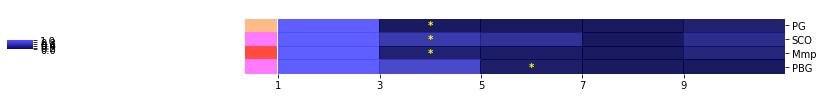

In [41]:
# Abeta increase
# APP only

import pandas as pd

# CSVファイルを読み込む
X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_others_decrease.csv', index_col='atlasID')
X_all = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_others_all.csv', index_col='atlasID')
#X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1.csv', index_col='atlasID')

X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_raw_value_regions_others_decrease.csv', index_col='atlasID')

X = X[~X.index.isin(X2.index)] # WTのatlasIDとのoverlapを消して、APP specificにする

category = "APP_specific_others_decrease_onset(m)"

import ruptures as rpt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
from matplotlib import rcParams

#data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")

ids = data_GO["id"].astype(int).unique()

# フォントをDejaVu Sansに設定
rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10  # Adjust the size as needed

months = np.array([1, 3, 5, 7, 9])  # 月数をインデックスとして使用

# Function to detect change points in each row using ruptures
def detect_change_points(data):
    change_points = []
    for index, row in data.iterrows():
        # Extract the values and convert to numpy array
        values = row.values.astype(float)
        # Create a change point detection model instance
        model = "l2"  # Using L2 norm (least squares)
        algo = rpt.Binseg(model=model, min_size=1, jump=1).fit(values)
        # Detect change point
        result = algo.predict(n_bkps=1)
        change_points.append(months[result[:-1]][0])
    return change_points

# Run the change point detection function
data = X.copy()
# Detect change points
change_points = detect_change_points(data)

# データフレームに変化点を追加
data['Change Points'] = change_points


cellome_onset[category] = np.nan  # 初期値としてNaNを設定

# 存在する変化点をcellome_onsetに追加
for atlas_id, change_point in zip(data.index, change_points):
    if atlas_id in cellome_onset.index:
        cellome_onset.at[atlas_id, category] = change_point

for atlas_id in ids:
    if atlas_id in X_all.index:
        cellome_onset.at[atlas_id, "1m_" + category] = X_all.loc[atlas_id, "APP_1m"]
        cellome_onset.at[atlas_id, "3m_" + category] = X_all.loc[atlas_id, "APP_3m"]
        cellome_onset.at[atlas_id, "5m_" + category] = X_all.loc[atlas_id, "APP_5m"]
        cellome_onset.at[atlas_id, "7m_" + category] = X_all.loc[atlas_id, "APP_7m"]
        cellome_onset.at[atlas_id, "9m_" + category] = X_all.loc[atlas_id, "APP_9m"]  

# カスタムカラーマップの作成
def create_custom_cmap():
    #colors = [(0.1, 0.0, 0.0, 0.9),  (1, 0.3, 0.3, 0.90)] # increase
    colors = [(0, 0, 0.3, 0.9),  (0.3, 0.3, 1, 0.9)] # decrease
    cmap_name = "custom_cmap"
    # Create a colormap with interpolation between specified colors
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)
    return cmap

# Using the new custom colormap
cmap = create_custom_cmap()

# 行ごとに正規化
normalized_data = data.iloc[:, :-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# 行ごとに変化点月齢を強調するためのデータフレームを作成
stars = data.iloc[:, :-1].copy().astype(str)
stars[:] = ''  # 全てのセルを空文字列に設定
for i, cp in enumerate(change_points):
    month_col_cp = f'APP_{cp}m'
    if month_col_cp in stars.columns:
        stars.at[data.index[i], month_col_cp] = '*'

# 変化点でソート
sorted_indices = np.argsort(change_points)
sorted_normalized_data = normalized_data.iloc[sorted_indices]
sorted_stars = stars.iloc[sorted_indices]

# acronymのインデックスを追加
acronyms = data_id.set_index('id').loc[sorted_normalized_data.index, 'acronym']

colorlist = []
colorlist_671 = []

for atlas_id in sorted_normalized_data.index:
    for i in range(671):
        if data_GO["id"].values[i] == atlas_id:
            colorlist.append((data_GO["R"].values[i]/255, data_GO["G"].values[i]/255, data_GO["B"].values[i]/255))
    colorlist_671 = colorlist

# プロット
height = (17/55) * len(X)
g = sns.clustermap(sorted_normalized_data, cmap=cmap, row_colors=colorlist_671, vmin=0, vmax=1, row_cluster=False, col_cluster=False, annot=sorted_stars, fmt='', annot_kws={"size": 10, "weight": "bold", "color": "yellow"}, figsize=(12, height))
# 行ラベルをacronymに置き換え
g.ax_heatmap.set_yticklabels(acronyms)
g.ax_heatmap.yaxis.set_tick_params(rotation=0)
# x軸ラベルを変更
new_labels = ['1', '3', '5', '7', '9']
g.ax_heatmap.set_xticks(np.arange(len(new_labels)))  # Ensure there are correct number of ticks
g.ax_heatmap.set_xticklabels(new_labels)

# 不要な右端の縦軸ラベルを削除
g.ax_heatmap.set_ylabel('')

g.cax.set_position([.0, .4, .03, .1])  # [left, bottom, width, height]

plt.show()


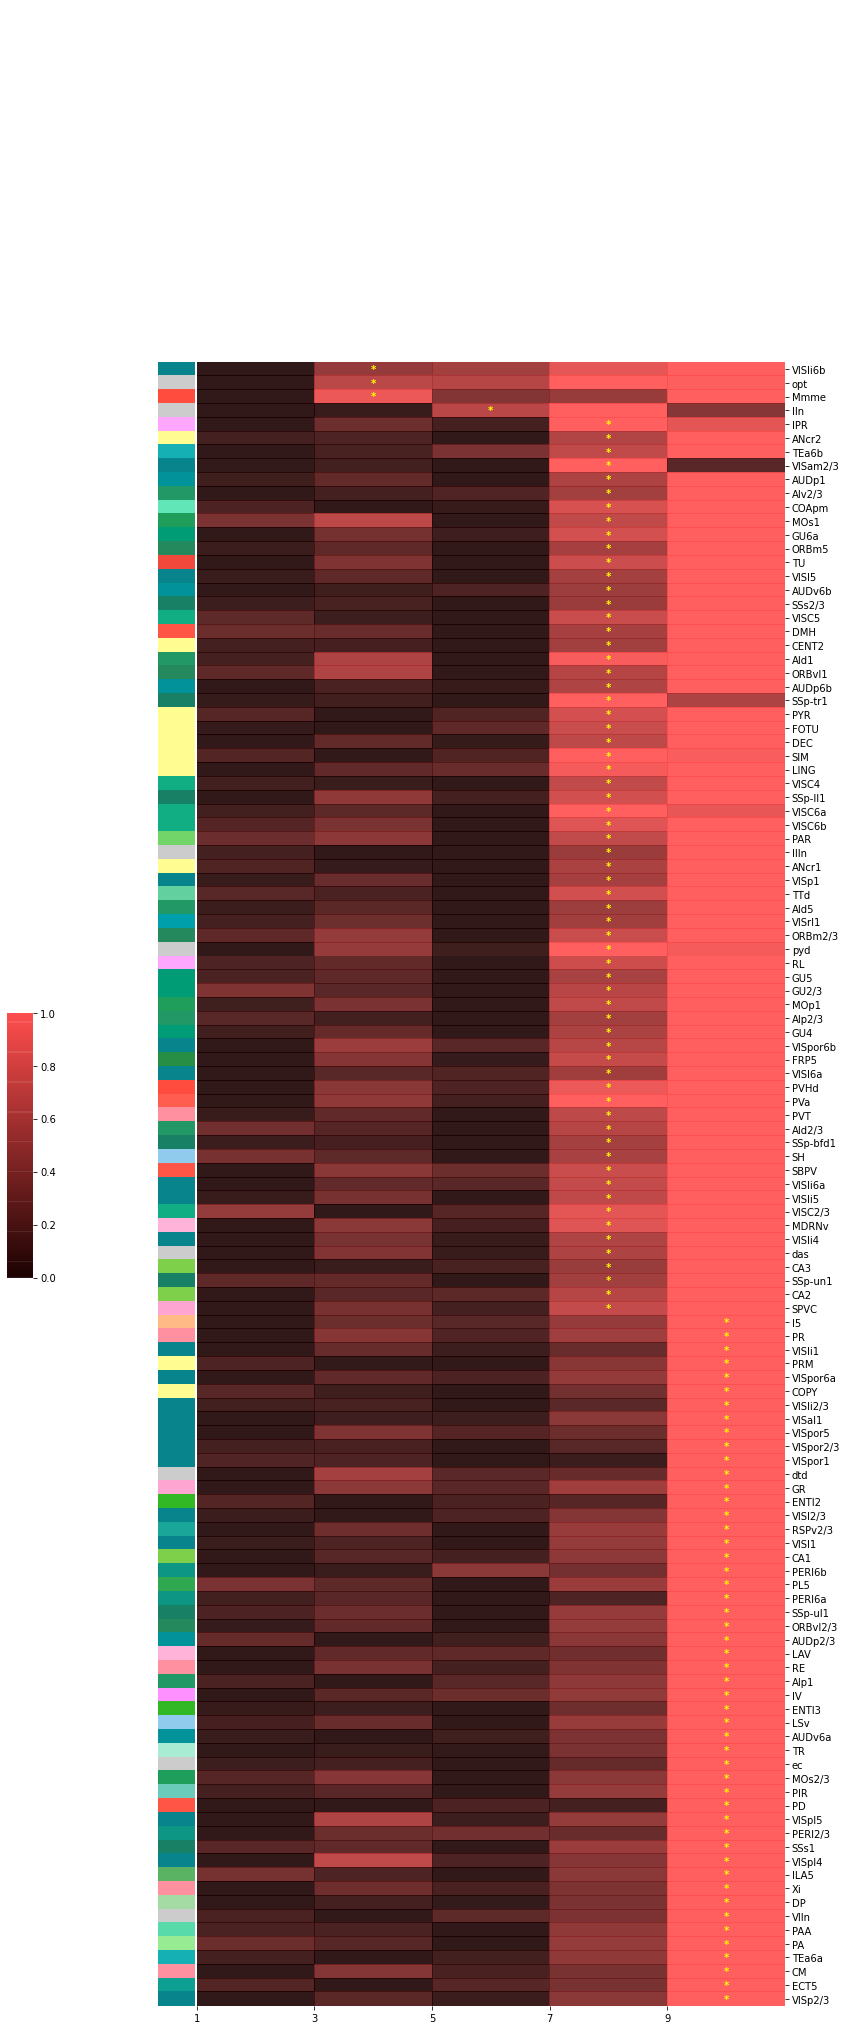

In [42]:
# Abeta increase
# APP only

import pandas as pd

# CSVファイルを読み込む
#X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_Abeta_increase.csv', index_col='atlasID')
X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_others_increase.csv', index_col='atlasID')
X_all = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_others_all.csv', index_col='atlasID')
#X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1.csv', index_col='atlasID')

X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_raw_value_regions_others_increase.csv', index_col='atlasID')

X = X[~X.index.isin(X2.index)] # WTのatlasIDとのoverlapを消して、APP specificにする

category = "APP_specific_others_increase_onset(m)"

import ruptures as rpt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
from matplotlib import rcParams

#data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")

ids = data_GO["id"].astype(int).unique()

# フォントをDejaVu Sansに設定
rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10  # Adjust the size as needed

months = np.array([1, 3, 5, 7, 9])  # 月数をインデックスとして使用

# Function to detect change points in each row using ruptures
def detect_change_points(data):
    change_points = []
    for index, row in data.iterrows():
        # Extract the values and convert to numpy array
        values = row.values.astype(float)
        # Create a change point detection model instance
        model = "l2"  # Using L2 norm (least squares)
        algo = rpt.Binseg(model=model, min_size=1, jump=1).fit(values)
        # Detect change point
        result = algo.predict(n_bkps=1)
        change_points.append(months[result[:-1]][0])
    return change_points

# Run the change point detection function
data = X.copy()
# Detect change points
change_points = detect_change_points(data)

# データフレームに変化点を追加
data['Change Points'] = change_points


cellome_onset[category] = np.nan  # 初期値としてNaNを設定

# 存在する変化点をcellome_onsetに追加
for atlas_id, change_point in zip(data.index, change_points):
    if atlas_id in cellome_onset.index:
        cellome_onset.at[atlas_id, category] = change_point

for atlas_id in ids:
    if atlas_id in X_all.index:
        cellome_onset.at[atlas_id, "1m_" + category] = X_all.loc[atlas_id, "APP_1m"]
        cellome_onset.at[atlas_id, "3m_" + category] = X_all.loc[atlas_id, "APP_3m"]
        cellome_onset.at[atlas_id, "5m_" + category] = X_all.loc[atlas_id, "APP_5m"]
        cellome_onset.at[atlas_id, "7m_" + category] = X_all.loc[atlas_id, "APP_7m"]
        cellome_onset.at[atlas_id, "9m_" + category] = X_all.loc[atlas_id, "APP_9m"]  

# カスタムカラーマップの作成
def create_custom_cmap():
    colors = [(0.1, 0.0, 0.0, 0.9),  (1, 0.3, 0.3, 0.90)]
    cmap_name = "custom_cmap"
    # Create a colormap with interpolation between specified colors
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)
    return cmap

# Using the new custom colormap
cmap = create_custom_cmap()

# 行ごとに正規化
normalized_data = data.iloc[:, :-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# 行ごとに変化点月齢を強調するためのデータフレームを作成
stars = data.iloc[:, :-1].copy().astype(str)
stars[:] = ''  # 全てのセルを空文字列に設定
for i, cp in enumerate(change_points):
    month_col_cp = f'APP_{cp}m'
    if month_col_cp in stars.columns:
        stars.at[data.index[i], month_col_cp] = '*'

# 変化点でソート
sorted_indices = np.argsort(change_points)
sorted_normalized_data = normalized_data.iloc[sorted_indices]
sorted_stars = stars.iloc[sorted_indices]

# acronymのインデックスを追加
acronyms = data_id.set_index('id').loc[sorted_normalized_data.index, 'acronym']

colorlist = []
colorlist_671 = []

for atlas_id in sorted_normalized_data.index:
    for i in range(671):
        if data_GO["id"].values[i] == atlas_id:
            colorlist.append((data_GO["R"].values[i]/255, data_GO["G"].values[i]/255, data_GO["B"].values[i]/255))
    colorlist_671 = colorlist

# プロット
height = (17/55) * len(X)
g = sns.clustermap(sorted_normalized_data, cmap=cmap, row_colors=colorlist_671, vmin=0, vmax=1, row_cluster=False, col_cluster=False, annot=sorted_stars, fmt='', annot_kws={"size": 10, "weight": "bold", "color": "yellow"}, figsize=(12, height))
# 行ラベルをacronymに置き換え
g.ax_heatmap.set_yticklabels(acronyms)
g.ax_heatmap.yaxis.set_tick_params(rotation=0)
# x軸ラベルを変更
new_labels = ['1', '3', '5', '7', '9']
g.ax_heatmap.set_xticks(np.arange(len(new_labels)))  # Ensure there are correct number of ticks
g.ax_heatmap.set_xticklabels(new_labels)

# 不要な右端の縦軸ラベルを削除
g.ax_heatmap.set_ylabel('')

g.cax.set_position([.0, .4, .03, .1])  # [left, bottom, width, height]

plt.show()


In [43]:
# Abeta increase
# APP only

import pandas as pd

for t in range(100):
    print(t)
    # CSVファイルを読み込む
    X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1_trial_' +str(t) +'.csv', index_col='atlasID')
    X_all = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_all_random_slice_1_trial_'+ str(t) + '.csv', index_col='atlasID')
    #X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1.csv', index_col='atlasID')

    #X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_raw_value_regions_glm_ver_NeuN_decrease_random_slice_1.csv', index_col='atlasID')

    #X = X[~X.index.isin(X2.index)] # WTのatlasIDとのoverlapを消して、APP specificにする

    category = "APP_specific_Abeta_increase_onset(m)_random_slice_1_trial_" + str(t)

    import ruptures as rpt
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import pandas as pd
    import numpy as np
    from matplotlib import rcParams

    #data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")

    ids = data_GO["id"].astype(int).unique()

    # フォントをDejaVu Sansに設定
    rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['font.size'] = 10  # Adjust the size as needed

    months = np.array([1, 3, 5, 7, 9])  # 月数をインデックスとして使用

    # Function to detect change points in each row using ruptures
    def detect_change_points(data):
        change_points = []
        for index, row in data.iterrows():
            # Extract the values and convert to numpy array
            values = row.values.astype(float)
            # Create a change point detection model instance
            model = "l2"  # Using L2 norm (least squares)
            algo = rpt.Binseg(model=model, min_size=1, jump=1).fit(values)
            # Detect change point
            result = algo.predict(n_bkps=1)
            change_points.append(months[result[:-1]][0])
        return change_points

    # Run the change point detection function
    data = X.copy()
    # Detect change points
    change_points = detect_change_points(data)

    # データフレームに変化点を追加
    data['Change Points'] = change_points


    cellome_onset[category] = np.nan  # 初期値としてNaNを設定

    # 存在する変化点をcellome_onsetに追加
    for atlas_id, change_point in zip(data.index, change_points):
        if atlas_id in cellome_onset.index:
            cellome_onset.at[atlas_id, category] = change_point



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [44]:
# Abeta increase
# APP only

import pandas as pd

for t in range(100):
    print(t)
    # CSVファイルを読み込む
    X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_glm_ver_NeuN_decrease_random_slice_1_trial_' +str(t) +'.csv', index_col='atlasID')
    X_all = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_glm_ver_NeuN_all_random_slice_1_trial_'+ str(t) + '.csv', index_col='atlasID')
    #X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1.csv', index_col='atlasID')

    #X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_raw_value_regions_glm_ver_NeuN_decrease_random_slice_1.csv', index_col='atlasID')

    #X = X[~X.index.isin(X2.index)] # WTのatlasIDとのoverlapを消して、APP specificにする

    category = "APP_specific_NeuN_decrease_onset(m)_random_slice_1_trial_" + str(t)

    import ruptures as rpt
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import pandas as pd
    import numpy as np
    from matplotlib import rcParams

    #data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")

    ids = data_GO["id"].astype(int).unique()

    # フォントをDejaVu Sansに設定
    rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['font.size'] = 10  # Adjust the size as needed

    months = np.array([1, 3, 5, 7, 9])  # 月数をインデックスとして使用

    # Function to detect change points in each row using ruptures
    def detect_change_points(data):
        change_points = []
        for index, row in data.iterrows():
            # Extract the values and convert to numpy array
            values = row.values.astype(float)
            # Create a change point detection model instance
            model = "l2"  # Using L2 norm (least squares)
            algo = rpt.Binseg(model=model, min_size=1, jump=1).fit(values)
            # Detect change point
            result = algo.predict(n_bkps=1)
            change_points.append(months[result[:-1]][0])
        return change_points

    # Run the change point detection function
    data = X.copy()
    # Detect change points
    change_points = detect_change_points(data)

    # データフレームに変化点を追加
    data['Change Points'] = change_points


    cellome_onset[category] = np.nan  # 初期値としてNaNを設定

    # 存在する変化点をcellome_onsetに追加
    for atlas_id, change_point in zip(data.index, change_points):
        if atlas_id in cellome_onset.index:
            cellome_onset.at[atlas_id, category] = change_point



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [45]:
# Abeta increase
# APP only

import pandas as pd

for t in range(100):
    print(t)
    # CSVファイルを読み込む
    X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_glm_ver_NeuN_increase_random_slice_1_trial_' +str(t) +'.csv', index_col='atlasID')
    X_all = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_glm_ver_NeuN_all_random_slice_1_trial_'+ str(t) + '.csv', index_col='atlasID')
    #X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1.csv', index_col='atlasID')

    #X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_raw_value_regions_glm_ver_NeuN_decrease_random_slice_1.csv', index_col='atlasID')

    #X = X[~X.index.isin(X2.index)] # WTのatlasIDとのoverlapを消して、APP specificにする

    category = "APP_specific_NeuN_increase_onset(m)_random_slice_1_trial_" + str(t)

    import ruptures as rpt
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import pandas as pd
    import numpy as np
    from matplotlib import rcParams

    #data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")

    ids = data_GO["id"].astype(int).unique()

    # フォントをDejaVu Sansに設定
    rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['font.size'] = 10  # Adjust the size as needed

    months = np.array([1, 3, 5, 7, 9])  # 月数をインデックスとして使用

    # Function to detect change points in each row using ruptures
    def detect_change_points(data):
        change_points = []
        for index, row in data.iterrows():
            # Extract the values and convert to numpy array
            values = row.values.astype(float)
            # Create a change point detection model instance
            model = "l2"  # Using L2 norm (least squares)
            algo = rpt.Binseg(model=model, min_size=1, jump=1).fit(values)
            # Detect change point
            result = algo.predict(n_bkps=1)
            change_points.append(months[result[:-1]][0])
        return change_points

    # Run the change point detection function
    data = X.copy()
    # Detect change points
    change_points = detect_change_points(data)

    # データフレームに変化点を追加
    data['Change Points'] = change_points


    cellome_onset[category] = np.nan  # 初期値としてNaNを設定

    # 存在する変化点をcellome_onsetに追加
    for atlas_id, change_point in zip(data.index, change_points):
        if atlas_id in cellome_onset.index:
            cellome_onset.at[atlas_id, category] = change_point



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [46]:
# Abeta increase
# APP only

import pandas as pd

for t in range(100):
    print(t)
    # CSVファイルを読み込む
    X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_glm_ver_Iba1_increase_random_slice_1_trial_' +str(t) +'.csv', index_col='atlasID')
    X_all = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_glm_ver_Iba1_all_random_slice_1_trial_'+ str(t) + '.csv', index_col='atlasID')
    #X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1.csv', index_col='atlasID')

    #X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_raw_value_regions_glm_ver_NeuN_decrease_random_slice_1.csv', index_col='atlasID')

    #X = X[~X.index.isin(X2.index)] # WTのatlasIDとのoverlapを消して、APP specificにする

    category = "APP_specific_Iba1_increase_onset(m)_random_slice_1_trial_" + str(t)

    import ruptures as rpt
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import pandas as pd
    import numpy as np
    from matplotlib import rcParams

    #data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")

    ids = data_GO["id"].astype(int).unique()

    # フォントをDejaVu Sansに設定
    rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['font.size'] = 10  # Adjust the size as needed

    months = np.array([1, 3, 5, 7, 9])  # 月数をインデックスとして使用

    # Function to detect change points in each row using ruptures
    def detect_change_points(data):
        change_points = []
        for index, row in data.iterrows():
            # Extract the values and convert to numpy array
            values = row.values.astype(float)
            # Create a change point detection model instance
            model = "l2"  # Using L2 norm (least squares)
            algo = rpt.Binseg(model=model, min_size=1, jump=1).fit(values)
            # Detect change point
            result = algo.predict(n_bkps=1)
            change_points.append(months[result[:-1]][0])
        return change_points

    # Run the change point detection function
    data = X.copy()
    # Detect change points
    change_points = detect_change_points(data)

    # データフレームに変化点を追加
    data['Change Points'] = change_points


    cellome_onset[category] = np.nan  # 初期値としてNaNを設定

    # 存在する変化点をcellome_onsetに追加
    for atlas_id, change_point in zip(data.index, change_points):
        if atlas_id in cellome_onset.index:
            cellome_onset.at[atlas_id, category] = change_point



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [47]:
# Abeta increase
# APP only

import pandas as pd

for t in range(100):
    print(t)
    # CSVファイルを読み込む
    X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_glm_ver_Iba1_decrease_random_slice_1_trial_' +str(t) +'.csv', index_col='atlasID')
    X_all = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_glm_ver_Iba1_all_random_slice_1_trial_'+ str(t) + '.csv', index_col='atlasID')
    #X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1.csv', index_col='atlasID')

    #X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_raw_value_regions_glm_ver_NeuN_decrease_random_slice_1.csv', index_col='atlasID')

    #X = X[~X.index.isin(X2.index)] # WTのatlasIDとのoverlapを消して、APP specificにする

    category = "APP_specific_Iba1_decrease_onset(m)_random_slice_1_trial_" + str(t)

    import ruptures as rpt
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import pandas as pd
    import numpy as np
    from matplotlib import rcParams

    #data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")

    ids = data_GO["id"].astype(int).unique()

    # フォントをDejaVu Sansに設定
    rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['font.size'] = 10  # Adjust the size as needed

    months = np.array([1, 3, 5, 7, 9])  # 月数をインデックスとして使用

    # Function to detect change points in each row using ruptures
    def detect_change_points(data):
        change_points = []
        for index, row in data.iterrows():
            # Extract the values and convert to numpy array
            values = row.values.astype(float)
            # Create a change point detection model instance
            model = "l2"  # Using L2 norm (least squares)
            algo = rpt.Binseg(model=model, min_size=1, jump=1).fit(values)
            # Detect change point
            result = algo.predict(n_bkps=1)
            change_points.append(months[result[:-1]][0])
        return change_points

    # Run the change point detection function
    data = X.copy()
    # Detect change points
    change_points = detect_change_points(data)

    # データフレームに変化点を追加
    data['Change Points'] = change_points


    cellome_onset[category] = np.nan  # 初期値としてNaNを設定

    # 存在する変化点をcellome_onsetに追加
    for atlas_id, change_point in zip(data.index, change_points):
        if atlas_id in cellome_onset.index:
            cellome_onset.at[atlas_id, category] = change_point



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [48]:
# Abeta increase
# APP only

import pandas as pd

for t in range(100):
    print(t)
    # CSVファイルを読み込む
    X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_glm_ver_others_increase_random_slice_1_trial_' +str(t) +'.csv', index_col='atlasID')
    X_all = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_glm_ver_others_all_random_slice_1_trial_'+ str(t) + '.csv', index_col='atlasID')
    #X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1.csv', index_col='atlasID')

    #X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_raw_value_regions_glm_ver_NeuN_decrease_random_slice_1.csv', index_col='atlasID')

    #X = X[~X.index.isin(X2.index)] # WTのatlasIDとのoverlapを消して、APP specificにする

    category = "APP_specific_others_increase_onset(m)_random_slice_1_trial_" + str(t)

    import ruptures as rpt
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import pandas as pd
    import numpy as np
    from matplotlib import rcParams

    #data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")

    ids = data_GO["id"].astype(int).unique()

    # フォントをDejaVu Sansに設定
    rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['font.size'] = 10  # Adjust the size as needed

    months = np.array([1, 3, 5, 7, 9])  # 月数をインデックスとして使用

    # Function to detect change points in each row using ruptures
    def detect_change_points(data):
        change_points = []
        for index, row in data.iterrows():
            # Extract the values and convert to numpy array
            values = row.values.astype(float)
            # Create a change point detection model instance
            model = "l2"  # Using L2 norm (least squares)
            algo = rpt.Binseg(model=model, min_size=1, jump=1).fit(values)
            # Detect change point
            result = algo.predict(n_bkps=1)
            change_points.append(months[result[:-1]][0])
        return change_points

    # Run the change point detection function
    data = X.copy()
    # Detect change points
    change_points = detect_change_points(data)

    # データフレームに変化点を追加
    data['Change Points'] = change_points


    cellome_onset[category] = np.nan  # 初期値としてNaNを設定

    # 存在する変化点をcellome_onsetに追加
    for atlas_id, change_point in zip(data.index, change_points):
        if atlas_id in cellome_onset.index:
            cellome_onset.at[atlas_id, category] = change_point



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [49]:
# Abeta increase
# APP only

import pandas as pd

for t in range(100):
    print(t)
    # CSVファイルを読み込む
    X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_glm_ver_others_decrease_random_slice_1_trial_' +str(t) +'.csv', index_col='atlasID')
    X_all = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_glm_ver_others_all_random_slice_1_trial_'+ str(t) + '.csv', index_col='atlasID')
    #X = pd.read_csv('/export3/Imaging/ds4_Data4/Region/APP_raw_value_regions_lire_ver_Abeta_increase_random_slice_1.csv', index_col='atlasID')

    #X2 = pd.read_csv('/export3/Imaging/ds4_Data4/Region/WT_raw_value_regions_glm_ver_NeuN_decrease_random_slice_1.csv', index_col='atlasID')

    #X = X[~X.index.isin(X2.index)] # WTのatlasIDとのoverlapを消して、APP specificにする

    category = "APP_specific_others_decrease_onset(m)_random_slice_1_trial_" + str(t)

    import ruptures as rpt
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import pandas as pd
    import numpy as np
    from matplotlib import rcParams

    #data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")

    ids = data_GO["id"].astype(int).unique()

    # フォントをDejaVu Sansに設定
    rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['font.size'] = 10  # Adjust the size as needed

    months = np.array([1, 3, 5, 7, 9])  # 月数をインデックスとして使用

    # Function to detect change points in each row using ruptures
    def detect_change_points(data):
        change_points = []
        for index, row in data.iterrows():
            # Extract the values and convert to numpy array
            values = row.values.astype(float)
            # Create a change point detection model instance
            model = "l2"  # Using L2 norm (least squares)
            algo = rpt.Binseg(model=model, min_size=1, jump=1).fit(values)
            # Detect change point
            result = algo.predict(n_bkps=1)
            change_points.append(months[result[:-1]][0])
        return change_points

    # Run the change point detection function
    data = X.copy()
    # Detect change points
    change_points = detect_change_points(data)

    # データフレームに変化点を追加
    data['Change Points'] = change_points


    cellome_onset[category] = np.nan  # 初期値としてNaNを設定

    # 存在する変化点をcellome_onsetに追加
    for atlas_id, change_point in zip(data.index, change_points):
        if atlas_id in cellome_onset.index:
            cellome_onset.at[atlas_id, category] = change_point



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


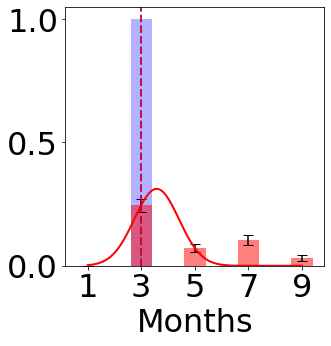

Onset Histograms for APP_specific_NeuN_region 1 (Onset 3) - Wilcoxon rank-sum test p-value: 8.953721893093487e-30
Onset Histograms for APP_specific_NeuN_region 1 (Onset 3) - Metrics over 100 trials:
Average Accuracy: 0.2458, Average Recall: 0.2458, Average Precision: 1.0000, Average F1 Score: 0.3939


In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, ranksums
from scipy.optimize import curve_fit
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rcParams['font.size'] = 32

recall_list = []
recall_list2 = []

# Gaussian 関数の定義
def gaussian(x, mean, std, scale):
    return scale * np.exp(-0.5 * ((x - mean) / std) ** 2)

# 正規化関数
def normalize_counts(counts, total):
    return counts / total

# Gaussian フィット関数
def fit_gaussian(x, y):
    mean_guess = np.average(x, weights=y)
    std_guess = np.sqrt(np.average((x - mean_guess) ** 2, weights=y))
    popt, _ = curve_fit(gaussian, x, y, p0=[mean_guess, std_guess, max(y)])
    return popt

# ヒストグラムと Gaussian フィットのプロット関数
def plot_onset_histograms(region_data_cat1, title, category1, cat1_onset_value):
    months = [1, 3, 5, 7, 9]
    x_values = np.linspace(min(months), max(months), 300)
    
    # カテゴリー1の非NaN onset数をカウントし、正規化
    onset_hist_cat1 = region_data_cat1[category1].value_counts().reindex(months, fill_value=0)
    total_cat1 = len(region_data_cat1)
    normalized_hist_cat1 = normalize_counts(onset_hist_cat1, total_cat1)
    
    # 100回のトライアルでの平均と標準偏差を計算
    histograms = []
    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        hist_cat2 = region_data_cat1.loc[region_data_cat1.index, category].value_counts().reindex(months, fill_value=0)
        normalized_hist_cat2 = normalize_counts(hist_cat2, total_cat1)
        histograms.append(normalized_hist_cat2.values)
    
    histograms = np.array(histograms)
    mean_hist = histograms.mean(axis=0)
    std_hist = histograms.std(axis=0)
    
    # すべてのonsetsを結合して中央値を求める
    all_onsets = []
    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        all_onsets.extend(region_data_cat1.loc[region_data_cat1.index, category].dropna().values)
    
    median_onset = np.median(all_onsets)
    
    # Gaussian フィット
    popt = fit_gaussian(months, mean_hist)
    
    fig, ax1 = plt.subplots(figsize=(4, 4))
    bar_width = 0.8
    
    # カテゴリー1のバーのプロット
    ax1.bar(months, normalized_hist_cat1, color='blue', alpha=0.3, label='Normalized Onset Counts Cat1', width=bar_width)
    
    # カテゴリー2の平均値とエラーバー付きのバーのプロット
    ax1.bar(months, mean_hist, yerr=std_hist, color='red', alpha=0.5, label='Mean Onset Counts Cat2', width=bar_width, capsize=5)
    
    # Gaussian フィットのプロット
    ax1.plot(x_values, gaussian(x_values, *popt), 'r-', label='Gaussian Fit Cat2', linewidth=2)

    # カテゴリー1とカテゴリー2の中央値に縦線を追加
    ax1.axvline(x=cat1_onset_value, color='blue', alpha=0.7, linestyle='--', linewidth=2, label=f'Median Onset Cat1: {cat1_onset_value}')
    ax1.axvline(x=median_onset, color='red', alpha=0.7, linestyle='--', linewidth=2, label=f'Median Onset Cat2: {median_onset}')
    
    ax1.set_xlabel('Months')
    #ax1.set_ylabel('Normalized Onset Counts\nAcross Earliest Onset Regions\n(3D Count = 1.0)')
    ax1.set_ylim(0, 1.05)
    #ax1.set_title(title)
    ax1.set_xticks(months)
    
    # Legendの設定を修正
    #legend = ax1.legend(fontsize=20, frameon=False)  # フォントサイズを小さくし、枠を削除
    #plt.setp(legend.get_texts(), color='black')  # テキストの色を黒に設定
    #legend.get_frame().set_alpha(0.0)  # 背景を透明に設定
    
    plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

    # Save the plot as a PDF
    #plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/3D_vs_2D_with_eariest_onset_histogram_of_APP_specific_Abeta_increase_regions.pdf',
    #            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

    plt.show()
    
    # 統計テスト (Wilcoxon rank-sum test)
    cat1_onsets = region_data_cat1[category1].dropna().values
    cat2_onsets = np.concatenate([region_data_cat1.loc[region_data_cat1.index, f"{category1}_random_slice_1_trial_{t}"].dropna().values for t in range(100)])
    stat, p_value = ranksums(cat1_onsets, cat2_onsets)
    print(f'{title} - Wilcoxon rank-sum test p-value: {p_value}')
    
    # Calculate performance metrics
    accuracies = []
    recalls = []
    precisions = []
    f1_scores = []

    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        cat1_detected = region_data_cat1[category1] == cat1_onset_value
        cat2_detected = region_data_cat1[category] == cat1_onset_value

        TP = np.sum(cat1_detected & cat2_detected)
        FP = np.sum(~cat1_detected & cat2_detected)
        TN = np.sum(~cat1_detected & ~cat2_detected)
        FN = np.sum(cat1_detected & ~cat2_detected)

        accuracy = (TP + TN) / (TP + FP + FN + TN) if (TP + FP + FN + TN) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        accuracies.append(accuracy)
        recalls.append(recall)
        precisions.append(precision)
        f1_scores.append(f1_score)

    avg_accuracy = np.mean(accuracies)
    avg_recall = np.mean(recalls)
    avg_precision = np.mean(precisions)
    avg_f1_score = np.mean(f1_scores)
    
    recall_list.append(avg_recall)
    recall_list2.append(recalls)

    print(f"{title} - Metrics over 100 trials:")
    print(f"Average Accuracy: {avg_accuracy:.4f}, Average Recall: {avg_recall:.4f}, Average Precision: {avg_precision:.4f}, Average F1 Score: {avg_f1_score:.4f}")



# 使用例 (カテゴリーとデータを指定)
category1 = "APP_specific_Abeta_increase_onset(m)"

# データをグループ化
onset_3_regions_cat1 = cellome_onset[cellome_onset[category1] == 3]
onset_5_regions_cat1 = cellome_onset[cellome_onset[category1] == 5]
onset_7_regions_cat1 = cellome_onset[cellome_onset[category1] == 7]
onset_9_regions_cat1 = cellome_onset[cellome_onset[category1] == 9]

# プロットの実行
try:
    plot_onset_histograms(onset_3_regions_cat1, 'Onset Histograms for APP_specific_NeuN_region 1 (Onset 3)', category1, 3)
except:
    print("skip 3")


In [200]:
onset_3_regions_cat1 

,APP_specific_Abeta_increase_onset(m),1m_APP_specific_Abeta_increase_onset(m),3m_APP_specific_Abeta_increase_onset(m),5m_APP_specific_Abeta_increase_onset(m),7m_APP_specific_Abeta_increase_onset(m),9m_APP_specific_Abeta_increase_onset(m),APP_specific_NeuN_decrease_onset(m),1m_APP_specific_NeuN_decrease_onset(m),3m_APP_specific_NeuN_decrease_onset(m),5m_APP_specific_NeuN_decrease_onset(m),...,APP_specific_others_decrease_onset(m)_random_slice_1_trial_90,APP_specific_others_decrease_onset(m)_random_slice_1_trial_91,APP_specific_others_decrease_onset(m)_random_slice_1_trial_92,APP_specific_others_decrease_onset(m)_random_slice_1_trial_93,APP_specific_others_decrease_onset(m)_random_slice_1_trial_94,APP_specific_others_decrease_onset(m)_random_slice_1_trial_95,APP_specific_others_decrease_onset(m)_random_slice_1_trial_96,APP_specific_others_decrease_onset(m)_random_slice_1_trial_97,APP_specific_others_decrease_onset(m)_random_slice_1_trial_98,APP_specific_others_decrease_onset(m)_random_slice_1_trial_99
31598,3.0,0.00,1.603388e+09,1.414187e+09,1.865954e+09,1.352406e+09,NaN,93068.25,91131.50,96074.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
732,7.0,0.00,3.098066e+06,6.907849e+06,1.749988e+07,3.005961e+07,NaN,134557.00,141020.00,137753.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,7.0,564882.75,4.007804e+06,2.526093e+06,5.679024e+06,6.361048e+06,NaN,13527.25,14224.25,17088.75,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [201]:
cellome_onset

,APP_specific_Abeta_increase_onset(m),1m_APP_specific_Abeta_increase_onset(m),3m_APP_specific_Abeta_increase_onset(m),5m_APP_specific_Abeta_increase_onset(m),7m_APP_specific_Abeta_increase_onset(m),9m_APP_specific_Abeta_increase_onset(m),APP_specific_NeuN_decrease_onset(m),1m_APP_specific_NeuN_decrease_onset(m),3m_APP_specific_NeuN_decrease_onset(m),5m_APP_specific_NeuN_decrease_onset(m),...,APP_specific_others_decrease_onset(m)_random_slice_1_trial_90,APP_specific_others_decrease_onset(m)_random_slice_1_trial_91,APP_specific_others_decrease_onset(m)_random_slice_1_trial_92,APP_specific_others_decrease_onset(m)_random_slice_1_trial_93,APP_specific_others_decrease_onset(m)_random_slice_1_trial_94,APP_specific_others_decrease_onset(m)_random_slice_1_trial_95,APP_specific_others_decrease_onset(m)_random_slice_1_trial_96,APP_specific_others_decrease_onset(m)_random_slice_1_trial_97,APP_specific_others_decrease_onset(m)_random_slice_1_trial_98,APP_specific_others_decrease_onset(m)_random_slice_1_trial_99
997,5.0,3819.00,1.195450e+04,1.583650e+04,1.984725e+04,2.533650e+04,7.0,57243.50,56674.50,58355.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,5.0,0.00,1.298256e+06,2.587336e+06,3.339683e+06,4.459027e+06,NaN,16510.25,17079.00,15906.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,NaN,0.00,1.532958e+07,1.740077e+07,2.200240e+07,1.817689e+07,NaN,65094.75,73909.75,64463.75,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
52192,NaN,0.00,4.149946e+07,3.450623e+07,4.076066e+07,2.958815e+07,NaN,48470.25,49180.00,46463.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52196,NaN,0.00,1.905228e+08,1.250504e+08,1.517633e+08,6.027267e+07,3.0,80238.25,72657.50,71614.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52264,NaN,0.00,1.339602e+10,1.137398e+10,1.769285e+09,3.538570e+09,NaN,70329.25,63694.25,68736.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,9.0,0.00,2.893422e+06,3.640185e+06,4.052012e+06,7.353855e+06,NaN,33567.75,28876.25,32226.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
943,3.0,2241.00,7.198077e+06,6.545933e+06,9.020052e+06,9.360443e+06,NaN,90439.25,88306.50,91013.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,3.0,910.50,9.830374e+06,8.243354e+06,1.051374e+07,8.305601e+06,3.0,68432.75,64024.00,66878.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844,3.0,634.75,6.754549e+06,5.579489e+06,8.099650e+06,5.135785e+06,7.0,98689.25,97571.00,98592.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
recall_list

[0.24578947368421056]

In [166]:
len(recall_list2[0])

100

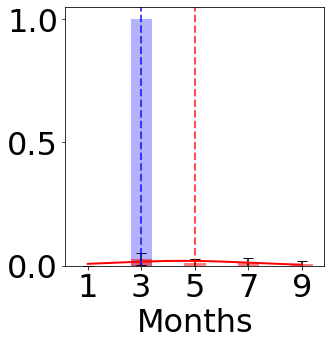

Onset Histograms for APP_specific_NeuN_region 1 (Onset 3) - Wilcoxon rank-sum test p-value: 1.2753798048592885e-08
Onset Histograms for APP_specific_NeuN_region 1 (Onset 3) - Metrics over 100 trials:
Average Accuracy: 0.0270, Average Recall: 0.0270, Average Precision: 0.7100, Average F1 Score: 0.0516


In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, ranksums
from scipy.optimize import curve_fit
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rcParams['font.size'] = 32

# Gaussian 関数の定義
def gaussian(x, mean, std, scale):
    return scale * np.exp(-0.5 * ((x - mean) / std) ** 2)

# 正規化関数
def normalize_counts(counts, total):
    return counts / total

# Gaussian フィット関数
# Gaussian フィット関数
def fit_gaussian(x, y):
    mean_guess = np.average(x, weights=y)
    std_guess = np.sqrt(np.average((x - mean_guess) ** 2, weights=y))
    popt, _ = curve_fit(gaussian, x, y, p0=[mean_guess, std_guess, max(y)])
    return popt

# ヒストグラムと Gaussian フィットのプロット関数
# ヒストグラムと Gaussian フィットのプロット関数
def plot_onset_histograms(region_data_cat1, title, category1, cat1_onset_value):
    months = [1, 3, 5, 7, 9]
    x_values = np.linspace(min(months), max(months), 300)
    
    # カテゴリー1の非NaN onset数をカウントし、正規化
    onset_hist_cat1 = region_data_cat1[category1].value_counts().reindex(months, fill_value=0)
    total_cat1 = len(region_data_cat1)
    normalized_hist_cat1 = normalize_counts(onset_hist_cat1, total_cat1)
    
    # 100回のトライアルでの平均と標準偏差を計算
    histograms = []
    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        hist_cat2 = region_data_cat1.loc[region_data_cat1.index, category].value_counts().reindex(months, fill_value=0)
        normalized_hist_cat2 = normalize_counts(hist_cat2, total_cat1)
        histograms.append(normalized_hist_cat2.values)
    
    histograms = np.array(histograms)
    mean_hist = histograms.mean(axis=0)
    std_hist = histograms.std(axis=0)
    
    # すべてのonsetsを結合して中央値を求める
    all_onsets = []
    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        all_onsets.extend(region_data_cat1.loc[region_data_cat1.index, category].dropna().values)
    
    median_onset = np.median(all_onsets)
    
    # Gaussian フィット
    popt = fit_gaussian(months, mean_hist)
    
    fig, ax1 = plt.subplots(figsize=(4, 4))
    bar_width = 0.8
    
    # カテゴリー1のバーのプロット
    ax1.bar(months, normalized_hist_cat1, color='blue', alpha=0.3, label='Normalized Onset Counts Cat1', width=bar_width)
    
    # カテゴリー2の平均値とエラーバー付きのバーのプロット
    ax1.bar(months, mean_hist, yerr=std_hist, color='red', alpha=0.5, label='Mean Onset Counts Cat2', width=bar_width, capsize=5)
    
    # Gaussian フィットのプロット
    ax1.plot(x_values, gaussian(x_values, *popt), 'r-', label='Gaussian Fit Cat2', linewidth=2)

    # カテゴリー1とカテゴリー2の中央値に縦線を追加
    ax1.axvline(x=cat1_onset_value, color='blue', alpha=0.7, linestyle='--', linewidth=2, label=f'Median Onset Cat1: {cat1_onset_value}')
    ax1.axvline(x=median_onset, color='red', alpha=0.7, linestyle='--', linewidth=2, label=f'Median Onset Cat2: {median_onset}')
    
    ax1.set_xlabel('Months')
    #ax1.set_ylabel('Normalized Onset Counts\nAcross Earliest Onset Regions\n(3D Count = 1.0)')
    ax1.set_ylim(0, 1.05)
    #ax1.set_title(title)
    ax1.set_xticks(months)
    
    # Legendの設定を修正
    #legend = ax1.legend(fontsize=20, frameon=False)  # フォントサイズを小さくし、枠を削除
    #plt.setp(legend.get_texts(), color='black')  # テキストの色を黒に設定
    #legend.get_frame().set_alpha(0.0)  # 背景を透明に設定
    
    plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

    # Save the plot as a PDF
    plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/3D_vs_2D_with_eariest_onset_histogram_of_APP_specific_Neuron_decrease_regions.pdf',
                transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

    plt.show()
    
    # 統計テスト (Wilcoxon rank-sum test)
    cat1_onsets = region_data_cat1[category1].dropna().values
    cat2_onsets = np.concatenate([region_data_cat1.loc[region_data_cat1.index, f"{category1}_random_slice_1_trial_{t}"].dropna().values for t in range(100)])
    stat, p_value = ranksums(cat1_onsets, cat2_onsets)
    print(f'{title} - Wilcoxon rank-sum test p-value: {p_value}')
    
    # Calculate performance metrics
    accuracies = []
    recalls = []
    precisions = []
    f1_scores = []

    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        cat1_detected = region_data_cat1[category1] == cat1_onset_value
        cat2_detected = region_data_cat1[category] == cat1_onset_value

        TP = np.sum(cat1_detected & cat2_detected)
        FP = np.sum(~cat1_detected & cat2_detected)
        TN = np.sum(~cat1_detected & ~cat2_detected)
        FN = np.sum(cat1_detected & ~cat2_detected)

        accuracy = (TP + TN) / (TP + FP + FN + TN) if (TP + FP + FN + TN) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        accuracies.append(accuracy)
        recalls.append(recall)
        precisions.append(precision)
        f1_scores.append(f1_score)

    avg_accuracy = np.mean(accuracies)
    avg_recall = np.mean(recalls)
    avg_precision = np.mean(precisions)
    avg_f1_score = np.mean(f1_scores)
    
    recall_list.append(avg_recall)
    recall_list2.append(recalls)
    print(f"{title} - Metrics over 100 trials:")
    print(f"Average Accuracy: {avg_accuracy:.4f}, Average Recall: {avg_recall:.4f}, Average Precision: {avg_precision:.4f}, Average F1 Score: {avg_f1_score:.4f}")


# 使用例 (カテゴリーとデータを指定)
category1 = "APP_specific_NeuN_decrease_onset(m)"

# データをグループ化
onset_3_regions_cat1 = cellome_onset[cellome_onset[category1] == 3]
onset_5_regions_cat1 = cellome_onset[cellome_onset[category1] == 5]
onset_7_regions_cat1 = cellome_onset[cellome_onset[category1] == 7]
onset_9_regions_cat1 = cellome_onset[cellome_onset[category1] == 9]

# プロットの実行
#try:
plot_onset_histograms(onset_3_regions_cat1, 'Onset Histograms for APP_specific_NeuN_region 1 (Onset 3)', category1, 3)
#except:
#    print("skip 3")


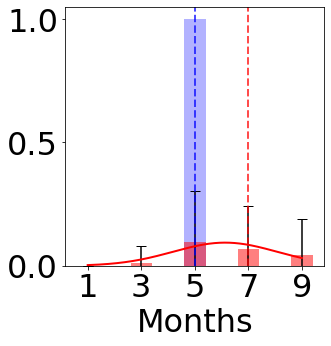

Onset Histograms for APP_specific_NeuN_region 1 (Onset 3) - Wilcoxon rank-sum test p-value: 0.2579925622238911
Onset Histograms for APP_specific_NeuN_region 1 (Onset 3) - Metrics over 100 trials:
Average Accuracy: 0.0950, Average Recall: 0.0950, Average Precision: 0.1800, Average F1 Score: 0.1233


In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, ranksums
from scipy.optimize import curve_fit
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rcParams['font.size'] = 32

# Gaussian 関数の定義
def gaussian(x, mean, std, scale):
    return scale * np.exp(-0.5 * ((x - mean) / std) ** 2)

# 正規化関数
def normalize_counts(counts, total):
    return counts / total

# Gaussian フィット関数
# Gaussian フィット関数
def fit_gaussian(x, y):
    mean_guess = np.average(x, weights=y)
    std_guess = np.sqrt(np.average((x - mean_guess) ** 2, weights=y))
    popt, _ = curve_fit(gaussian, x, y, p0=[mean_guess, std_guess, max(y)])
    return popt

# ヒストグラムと Gaussian フィットのプロット関数
# ヒストグラムと Gaussian フィットのプロット関数
def plot_onset_histograms(region_data_cat1, title, category1, cat1_onset_value):
    months = [1, 3, 5, 7, 9]
    x_values = np.linspace(min(months), max(months), 300)
    
    # カテゴリー1の非NaN onset数をカウントし、正規化
    onset_hist_cat1 = region_data_cat1[category1].value_counts().reindex(months, fill_value=0)
    total_cat1 = len(region_data_cat1)
    normalized_hist_cat1 = normalize_counts(onset_hist_cat1, total_cat1)
    
    # 100回のトライアルでの平均と標準偏差を計算
    histograms = []
    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        hist_cat2 = region_data_cat1.loc[region_data_cat1.index, category].value_counts().reindex(months, fill_value=0)
        normalized_hist_cat2 = normalize_counts(hist_cat2, total_cat1)
        histograms.append(normalized_hist_cat2.values)
    
    histograms = np.array(histograms)
    mean_hist = histograms.mean(axis=0)
    std_hist = histograms.std(axis=0)
    
    # すべてのonsetsを結合して中央値を求める
    all_onsets = []
    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        all_onsets.extend(region_data_cat1.loc[region_data_cat1.index, category].dropna().values)
    
    median_onset = np.median(all_onsets)
    
    # Gaussian フィット
    popt = fit_gaussian(months, mean_hist)
    
    fig, ax1 = plt.subplots(figsize=(4, 4))
    bar_width = 0.8
    
    # カテゴリー1のバーのプロット
    ax1.bar(months, normalized_hist_cat1, color='blue', alpha=0.3, label='Normalized Onset Counts Cat1', width=bar_width)
    
    # カテゴリー2の平均値とエラーバー付きのバーのプロット
    ax1.bar(months, mean_hist, yerr=std_hist, color='red', alpha=0.5, label='Mean Onset Counts Cat2', width=bar_width, capsize=5)
    
    # Gaussian フィットのプロット
    ax1.plot(x_values, gaussian(x_values, *popt), 'r-', label='Gaussian Fit Cat2', linewidth=2)

    # カテゴリー1とカテゴリー2の中央値に縦線を追加
    ax1.axvline(x=cat1_onset_value, color='blue', alpha=0.7, linestyle='--', linewidth=2, label=f'Median Onset Cat1: {cat1_onset_value}')
    ax1.axvline(x=median_onset, color='red', alpha=0.7, linestyle='--', linewidth=2, label=f'Median Onset Cat2: {median_onset}')
    
    ax1.set_xlabel('Months')
    #ax1.set_ylabel('Normalized Onset Counts\nAcross Earliest Onset Regions\n(3D Count = 1.0)')
    ax1.set_ylim(0, 1.05)
    #ax1.set_title(title)
    ax1.set_xticks(months)
    
    # Legendの設定を修正
    #legend = ax1.legend(fontsize=20, frameon=False)  # フォントサイズを小さくし、枠を削除
    #plt.setp(legend.get_texts(), color='black')  # テキストの色を黒に設定
    #legend.get_frame().set_alpha(0.0)  # 背景を透明に設定
    
    plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

    # Save the plot as a PDF
    plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/3D_vs_2D_with_eariest_onset_histogram_of_APP_specific_Microglia_increase_regions.pdf',
                transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

    plt.show()
    
    # 統計テスト (Wilcoxon rank-sum test)
    cat1_onsets = region_data_cat1[category1].dropna().values
    cat2_onsets = np.concatenate([region_data_cat1.loc[region_data_cat1.index, f"{category1}_random_slice_1_trial_{t}"].dropna().values for t in range(100)])
    stat, p_value = ranksums(cat1_onsets, cat2_onsets)
    print(f'{title} - Wilcoxon rank-sum test p-value: {p_value}')
    
    # Calculate performance metrics
    accuracies = []
    recalls = []
    precisions = []
    f1_scores = []

    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        cat1_detected = region_data_cat1[category1] == cat1_onset_value
        cat2_detected = region_data_cat1[category] == cat1_onset_value

        TP = np.sum(cat1_detected & cat2_detected)
        FP = np.sum(~cat1_detected & cat2_detected)
        TN = np.sum(~cat1_detected & ~cat2_detected)
        FN = np.sum(cat1_detected & ~cat2_detected)

        accuracy = (TP + TN) / (TP + FP + FN + TN) if (TP + FP + FN + TN) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        accuracies.append(accuracy)
        recalls.append(recall)
        precisions.append(precision)
        f1_scores.append(f1_score)

    avg_accuracy = np.mean(accuracies)
    avg_recall = np.mean(recalls)
    avg_precision = np.mean(precisions)
    avg_f1_score = np.mean(f1_scores)
    
    recall_list.append(avg_recall)
    recall_list2.append(recalls)
    print(f"{title} - Metrics over 100 trials:")
    print(f"Average Accuracy: {avg_accuracy:.4f}, Average Recall: {avg_recall:.4f}, Average Precision: {avg_precision:.4f}, Average F1 Score: {avg_f1_score:.4f}")


# 使用例 (カテゴリーとデータを指定)
category1 = "APP_specific_Iba1_increase_onset(m)"

# データをグループ化
onset_3_regions_cat1 = cellome_onset[cellome_onset[category1] == 3]
onset_5_regions_cat1 = cellome_onset[cellome_onset[category1] == 5]
onset_7_regions_cat1 = cellome_onset[cellome_onset[category1] == 7]
onset_9_regions_cat1 = cellome_onset[cellome_onset[category1] == 9]

# プロットの実行
#try:
plot_onset_histograms(onset_5_regions_cat1, 'Onset Histograms for APP_specific_NeuN_region 1 (Onset 3)', category1, 5)
#except:
#    print("skip 3")


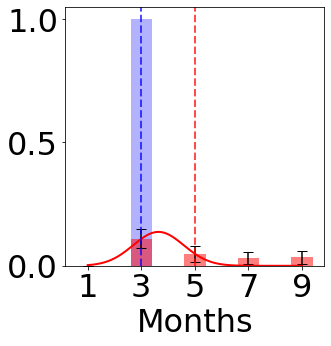

Onset Histograms for APP_specific_NeuN_region 1 (Onset 3) - Wilcoxon rank-sum test p-value: 3.519898158182182e-09
Onset Histograms for APP_specific_NeuN_region 1 (Onset 3) - Metrics over 100 trials:
Average Accuracy: 0.1091, Average Recall: 0.1091, Average Precision: 1.0000, Average F1 Score: 0.1947


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, ranksums
from scipy.optimize import curve_fit
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rcParams['font.size'] = 32

# Gaussian 関数の定義
def gaussian(x, mean, std, scale):
    return scale * np.exp(-0.5 * ((x - mean) / std) ** 2)

# 正規化関数
def normalize_counts(counts, total):
    return counts / total

# Gaussian フィット関数
def fit_gaussian(x, y):
    mean_guess = np.average(x, weights=y)
    std_guess = np.sqrt(np.average((x - mean_guess) ** 2, weights=y))
    popt, _ = curve_fit(gaussian, x, y, p0=[mean_guess, std_guess, max(y)])
    return popt
# ヒストグラムと Gaussian フィットのプロット関数
# ヒストグラムと Gaussian フィットのプロット関数
def plot_onset_histograms(region_data_cat1, title, category1, cat1_onset_value):
    months = [1, 3, 5, 7, 9]
    x_values = np.linspace(min(months), max(months), 300)
    
    # カテゴリー1の非NaN onset数をカウントし、正規化
    onset_hist_cat1 = region_data_cat1[category1].value_counts().reindex(months, fill_value=0)
    total_cat1 = len(region_data_cat1)
    normalized_hist_cat1 = normalize_counts(onset_hist_cat1, total_cat1)
    
    # 100回のトライアルでの平均と標準偏差を計算
    histograms = []
    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        hist_cat2 = region_data_cat1.loc[region_data_cat1.index, category].value_counts().reindex(months, fill_value=0)
        normalized_hist_cat2 = normalize_counts(hist_cat2, total_cat1)
        histograms.append(normalized_hist_cat2.values)
    
    histograms = np.array(histograms)
    mean_hist = histograms.mean(axis=0)
    std_hist = histograms.std(axis=0)
    
    # すべてのonsetsを結合して中央値を求める
    all_onsets = []
    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        all_onsets.extend(region_data_cat1.loc[region_data_cat1.index, category].dropna().values)
    
    median_onset = np.median(all_onsets)
    
    # Gaussian フィット
    popt = fit_gaussian(months, mean_hist)
    
    fig, ax1 = plt.subplots(figsize=(4, 4))
    bar_width = 0.8
    
    # カテゴリー1のバーのプロット
    ax1.bar(months, normalized_hist_cat1, color='blue', alpha=0.3, label='Normalized Onset Counts Cat1', width=bar_width)
    
    # カテゴリー2の平均値とエラーバー付きのバーのプロット
    ax1.bar(months, mean_hist, yerr=std_hist, color='red', alpha=0.5, label='Mean Onset Counts Cat2', width=bar_width, capsize=5)
    
    # Gaussian フィットのプロット
    ax1.plot(x_values, gaussian(x_values, *popt), 'r-', label='Gaussian Fit Cat2', linewidth=2)

    # カテゴリー1とカテゴリー2の中央値に縦線を追加
    ax1.axvline(x=cat1_onset_value, color='blue', alpha=0.7, linestyle='--', linewidth=2, label=f'Median Onset Cat1: {cat1_onset_value}')
    ax1.axvline(x=median_onset, color='red', alpha=0.7, linestyle='--', linewidth=2, label=f'Median Onset Cat2: {median_onset}')
    
    ax1.set_xlabel('Months')
    #ax1.set_ylabel('Normalized Onset Counts\nAcross Earliest Onset Regions\n(3D Count = 1.0)')
    ax1.set_ylim(0, 1.05)
    #ax1.set_title(title)
    ax1.set_xticks(months)
    
    # Legendの設定を修正
    #legend = ax1.legend(fontsize=20, frameon=False)  # フォントサイズを小さくし、枠を削除
    #plt.setp(legend.get_texts(), color='black')  # テキストの色を黒に設定
    #legend.get_frame().set_alpha(0.0)  # 背景を透明に設定
    
    plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

    # Save the plot as a PDF
    plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/3D_vs_2D_with_eariest_onset_histogram_of_APP_specific_Microglia_decrease_regions.pdf',
                transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

    plt.show()
    
    # 統計テスト (Wilcoxon rank-sum test)
    cat1_onsets = region_data_cat1[category1].dropna().values
    cat2_onsets = np.concatenate([region_data_cat1.loc[region_data_cat1.index, f"{category1}_random_slice_1_trial_{t}"].dropna().values for t in range(100)])
    stat, p_value = ranksums(cat1_onsets, cat2_onsets)
    print(f'{title} - Wilcoxon rank-sum test p-value: {p_value}')
    
    # Calculate performance metrics
    accuracies = []
    recalls = []
    precisions = []
    f1_scores = []

    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        cat1_detected = region_data_cat1[category1] == cat1_onset_value
        cat2_detected = region_data_cat1[category] == cat1_onset_value

        TP = np.sum(cat1_detected & cat2_detected)
        FP = np.sum(~cat1_detected & cat2_detected)
        TN = np.sum(~cat1_detected & ~cat2_detected)
        FN = np.sum(cat1_detected & ~cat2_detected)

        accuracy = (TP + TN) / (TP + FP + FN + TN) if (TP + FP + FN + TN) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        accuracies.append(accuracy)
        recalls.append(recall)
        precisions.append(precision)
        f1_scores.append(f1_score)

    avg_accuracy = np.mean(accuracies)
    avg_recall = np.mean(recalls)
    avg_precision = np.mean(precisions)
    avg_f1_score = np.mean(f1_scores)
    
    recall_list.append(avg_recall)
    recall_list2.append(recalls)
    print(f"{title} - Metrics over 100 trials:")
    print(f"Average Accuracy: {avg_accuracy:.4f}, Average Recall: {avg_recall:.4f}, Average Precision: {avg_precision:.4f}, Average F1 Score: {avg_f1_score:.4f}")

# 使用例 (カテゴリーとデータを指定)
category1 = "APP_specific_Iba1_decrease_onset(m)"

# データをグループ化
onset_3_regions_cat1 = cellome_onset[cellome_onset[category1] == 3]
onset_5_regions_cat1 = cellome_onset[cellome_onset[category1] == 5]
onset_7_regions_cat1 = cellome_onset[cellome_onset[category1] == 7]
onset_9_regions_cat1 = cellome_onset[cellome_onset[category1] == 9]

# プロットの実行
#try:
plot_onset_histograms(onset_3_regions_cat1, 'Onset Histograms for APP_specific_NeuN_region 1 (Onset 3)', category1, 3)
#except:
#    print("skip 3")


Error in fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


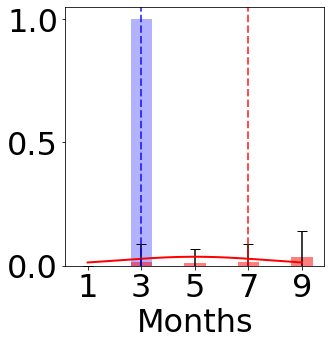

Onset Histograms for APP_specific_NeuN_region 1 (Onset 3) - Wilcoxon rank-sum test p-value: 0.027890529120246504
Onset Histograms for APP_specific_NeuN_region 1 (Onset 3) - Metrics over 100 trials:
Average Accuracy: 0.0167, Average Recall: 0.0167, Average Precision: 0.0500, Average F1 Score: 0.0250


In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, ranksums
from scipy.optimize import curve_fit
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rcParams['font.size'] = 32

# Gaussian 関数の定義
def gaussian(x, mean, std, scale):
    return scale * np.exp(-0.5 * ((x - mean) / std) ** 2)

# 正規化関数
def normalize_counts(counts, total):
    return counts / total

# Gaussian フィット関数
def fit_gaussian(x, y):
    # xをNumPy配列に変換
    x = np.array(x)
    
    # 初期推定値を再考
    mean_guess = np.mean(x)
    std_guess = np.std(x)
    scale_guess = max(y)
    
    # NaNや0に近いデータを除去してフィッティング
    valid_indices = np.isfinite(y) & (y > 0)
    x_filtered = x[valid_indices]
    y_filtered = y[valid_indices]
    
    try:
        # maxfevを増やしてフィット
        popt, _ = curve_fit(gaussian, x_filtered, y_filtered, p0=[mean_guess, std_guess, scale_guess], maxfev=2000)
        return popt
    except RuntimeError as e:
        print(f"Error in fitting: {e}")
        return [mean_guess, std_guess, scale_guess]  # フィットに失敗した場合、推定値を返す

# ヒストグラムと Gaussian フィットのプロット関数
# ヒストグラムと Gaussian フィットのプロット関数
def plot_onset_histograms(region_data_cat1, title, category1, cat1_onset_value):
    months = [1, 3, 5, 7, 9]
    x_values = np.linspace(min(months), max(months), 300)
    
    # カテゴリー1の非NaN onset数をカウントし、正規化
    onset_hist_cat1 = region_data_cat1[category1].value_counts().reindex(months, fill_value=0)
    total_cat1 = len(region_data_cat1)
    normalized_hist_cat1 = normalize_counts(onset_hist_cat1, total_cat1)
    
    # 100回のトライアルでの平均と標準偏差を計算
    histograms = []
    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        hist_cat2 = region_data_cat1.loc[region_data_cat1.index, category].value_counts().reindex(months, fill_value=0)
        normalized_hist_cat2 = normalize_counts(hist_cat2, total_cat1)
        histograms.append(normalized_hist_cat2.values)
    
    histograms = np.array(histograms)
    mean_hist = histograms.mean(axis=0)
    std_hist = histograms.std(axis=0)
    
    # すべてのonsetsを結合して中央値を求める
    all_onsets = []
    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        all_onsets.extend(region_data_cat1.loc[region_data_cat1.index, category].dropna().values)
    
    median_onset = np.median(all_onsets)
    
    # Gaussian フィット
    popt = fit_gaussian(months, mean_hist)
    
    fig, ax1 = plt.subplots(figsize=(4, 4))
    bar_width = 0.8
    
    # カテゴリー1のバーのプロット
    ax1.bar(months, normalized_hist_cat1, color='blue', alpha=0.3, label='Normalized Onset Counts Cat1', width=bar_width)
    
    # カテゴリー2の平均値とエラーバー付きのバーのプロット
    ax1.bar(months, mean_hist, yerr=std_hist, color='red', alpha=0.5, label='Mean Onset Counts Cat2', width=bar_width, capsize=5)
    
    # Gaussian フィットのプロット
    ax1.plot(x_values, gaussian(x_values, *popt), 'r-', label='Gaussian Fit Cat2', linewidth=2)

    # カテゴリー1とカテゴリー2の中央値に縦線を追加
    ax1.axvline(x=cat1_onset_value, color='blue', alpha=0.7, linestyle='--', linewidth=2, label=f'Median Onset Cat1: {cat1_onset_value}')
    ax1.axvline(x=median_onset, color='red', alpha=0.7, linestyle='--', linewidth=2, label=f'Median Onset Cat2: {median_onset}')
    
    ax1.set_xlabel('Months')
    #ax1.set_ylabel('Normalized Onset Counts\nAcross Earliest Onset Regions\n(3D Count = 1.0)')
    ax1.set_ylim(0, 1.05)
    #ax1.set_title(title)
    ax1.set_xticks(months)
    
    # Legendの設定を修正
    #legend = ax1.legend(fontsize=20, frameon=False)  # フォントサイズを小さくし、枠を削除
    #plt.setp(legend.get_texts(), color='black')  # テキストの色を黒に設定
    #legend.get_frame().set_alpha(0.0)  # 背景を透明に設定
    
    plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

    # Save the plot as a PDF
    plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/3D_vs_2D_with_eariest_onset_histogram_of_APP_specific_Others_increase_regions.pdf',
                transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

    plt.show()
    
    # 統計テスト (Wilcoxon rank-sum test)
    cat1_onsets = region_data_cat1[category1].dropna().values
    cat2_onsets = np.concatenate([region_data_cat1.loc[region_data_cat1.index, f"{category1}_random_slice_1_trial_{t}"].dropna().values for t in range(100)])
    stat, p_value = ranksums(cat1_onsets, cat2_onsets)
    print(f'{title} - Wilcoxon rank-sum test p-value: {p_value}')
    
    # Calculate performance metrics
    accuracies = []
    recalls = []
    precisions = []
    f1_scores = []

    for t in range(100):
        category = f"{category1}_random_slice_1_trial_{t}"
        cat1_detected = region_data_cat1[category1] == cat1_onset_value
        cat2_detected = region_data_cat1[category] == cat1_onset_value

        TP = np.sum(cat1_detected & cat2_detected)
        FP = np.sum(~cat1_detected & cat2_detected)
        TN = np.sum(~cat1_detected & ~cat2_detected)
        FN = np.sum(cat1_detected & ~cat2_detected)

        accuracy = (TP + TN) / (TP + FP + FN + TN) if (TP + FP + FN + TN) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        accuracies.append(accuracy)
        recalls.append(recall)
        precisions.append(precision)
        f1_scores.append(f1_score)

    avg_accuracy = np.mean(accuracies)
    avg_recall = np.mean(recalls)
    avg_precision = np.mean(precisions)
    avg_f1_score = np.mean(f1_scores)
   
    recall_list.append(avg_recall)
    recall_list2.append(recalls)
    print(f"{title} - Metrics over 100 trials:")
    print(f"Average Accuracy: {avg_accuracy:.4f}, Average Recall: {avg_recall:.4f}, Average Precision: {avg_precision:.4f}, Average F1 Score: {avg_f1_score:.4f}")


# 使用例 (カテゴリーとデータを指定)
category1 = "APP_specific_others_increase_onset(m)"

# データをグループ化
onset_3_regions_cat1 = cellome_onset[cellome_onset[category1] == 3]
onset_5_regions_cat1 = cellome_onset[cellome_onset[category1] == 5]
onset_7_regions_cat1 = cellome_onset[cellome_onset[category1] == 7]
onset_9_regions_cat1 = cellome_onset[cellome_onset[category1] == 9]

# プロットの実行
#try:
plot_onset_histograms(onset_3_regions_cat1, 'Onset Histograms for APP_specific_NeuN_region 1 (Onset 3)', category1, 3)
#except:
#    print("skip 3")


/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


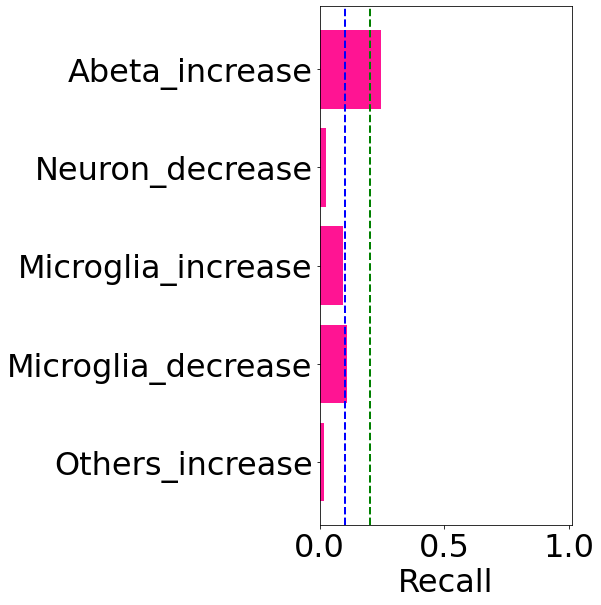

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# データ
values = np.array(recall_list)  # 例: [0.2458, 0.0270, 0.1091, 0.0950, 0.1652]

# ラベル (上からAbeta_increase, Neuron_decreaseの順に設定)
labels = ['Abeta_increase', 'Neuron_decrease', 'Microglia_increase', 'Microglia_decrease', 'Others_increase']

# 値をラベルに対応させて、上から順になるように逆順にする
values = values[::-1]  # データを逆順に並べ替え

# 横棒グラフの作成
plt.figure(figsize=(5, 8))  # 図のサイズを調整
plt.barh(range(len(values)), values, color="deeppink")  # 横棒グラフに変更

# ラベルとタイトル
plt.xlabel('Recall')
plt.xlim(0, 1.01)  # 横軸の範囲を0から1.1に設定
plt.yticks(range(len(values)), labels[::-1])  # 縦軸のラベルを上から並べる
plt.xticks([0, 0.5, 1.0])

# 縦線を追加 (0.1と0.2)
plt.axvline(x=0.1, color='blue', linestyle='--', linewidth=2)  # 0.1の位置に黒い破線を追加
plt.axvline(x=0.2, color='green', linestyle='--', linewidth=2)  # 0.2の位置に黒い破線を追加

# x軸とy軸に黒線を追加
ax = plt.gca()  # 現在の軸オブジェクトを取得
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# 背景色とグリッドを無効にする
ax.set_facecolor('none')
ax.grid(False)

# グラフの表示
plt.tight_layout()
plt.subplots_adjust(left=0.25, right=0.95, top=0.95, bottom=0.05)  # 縦ラベルのため左余白を調整

# グラフをPDF形式で保存
#plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/Recalls_of_3D_vs_2D.pdf',
#            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


In [61]:
values[::-1]

array([0.24578947, 0.027     , 0.095     , 0.10914894, 0.01666667])

In [51]:
cellome_onset[cellome_onset["APP_specific_Abeta_increase_onset(m)"] == 3]

,APP_specific_Abeta_increase_onset(m),1m_APP_specific_Abeta_increase_onset(m),3m_APP_specific_Abeta_increase_onset(m),5m_APP_specific_Abeta_increase_onset(m),7m_APP_specific_Abeta_increase_onset(m),9m_APP_specific_Abeta_increase_onset(m),APP_specific_NeuN_decrease_onset(m),1m_APP_specific_NeuN_decrease_onset(m),3m_APP_specific_NeuN_decrease_onset(m),5m_APP_specific_NeuN_decrease_onset(m),...,APP_specific_others_decrease_onset(m)_random_slice_1_trial_90,APP_specific_others_decrease_onset(m)_random_slice_1_trial_91,APP_specific_others_decrease_onset(m)_random_slice_1_trial_92,APP_specific_others_decrease_onset(m)_random_slice_1_trial_93,APP_specific_others_decrease_onset(m)_random_slice_1_trial_94,APP_specific_others_decrease_onset(m)_random_slice_1_trial_95,APP_specific_others_decrease_onset(m)_random_slice_1_trial_96,APP_specific_others_decrease_onset(m)_random_slice_1_trial_97,APP_specific_others_decrease_onset(m)_random_slice_1_trial_98,APP_specific_others_decrease_onset(m)_random_slice_1_trial_99
943,3.0,2241.00,7.198077e+06,6.545933e+06,9.020052e+06,9.360443e+06,NaN,90439.25,88306.50,91013.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,3.0,910.50,9.830374e+06,8.243354e+06,1.051374e+07,8.305601e+06,3.0,68432.75,64024.00,66878.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844,3.0,634.75,6.754549e+06,5.579489e+06,8.099650e+06,5.135785e+06,7.0,98689.25,97571.00,98592.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,3.0,0.00,4.999897e+07,4.612069e+07,8.025397e+07,3.655720e+07,NaN,59379.25,54519.25,58394.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962,3.0,2591.25,3.431964e+06,3.569546e+06,4.991950e+06,5.385626e+06,7.0,82713.00,81801.25,80854.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,3.0,232.25,5.851690e+06,4.711791e+06,6.242964e+06,4.717230e+06,3.0,65655.75,60959.25,63303.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,3.0,353.75,8.520184e+06,6.634148e+06,9.100168e+06,5.588646e+06,7.0,96181.75,92173.25,94351.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,3.0,13401.00,6.214716e+07,6.580625e+07,9.294450e+07,9.760440e+07,NaN,92206.25,91937.25,96368.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654,3.0,31623.75,6.799108e+07,6.694334e+07,8.753290e+07,8.374304e+07,NaN,141376.25,148854.50,148331.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
702,3.0,777.00,6.081031e+07,5.556651e+07,6.809552e+07,6.238081e+07,NaN,63023.25,57472.75,61757.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Cell typeのnaiveのcoronal sliceでの密度値は、すでに計算済み。Ctr 1m を使用する予定。
# Abetaでは、計算不要。

In [ ]:
# まずはCell typeの共通病変の空間分布のpath
# APP specificに前半は注目しているので、後半もAPPでの話にする
# WTの共通病変は読み込まない。

In [107]:

dt_SCA2 = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlasID', 'u2')
])
grid_points_ori = np.fromfile('/export3/Imaging/Axial/Neurorology/8w_B6JWT_atlas_1_2022_0924_1847/intensities_/SCA_Cellome_data_original.bin', dtype=dt_SCA2)

grid_points_ori  = pd.DataFrame(grid_points_ori )

# NeuN+ だけにする。
grid_points = grid_points_ori[grid_points_ori["NeuN_positive"]>0]

grid_points.reset_index(drop=True, inplace=True)

grid_points ["id"] = range(len(grid_points ))

/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [108]:
dt_final = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_positive', 'f4'), ('Iba1_positive', 'f4'), ('atlasID', 'u2'),
    ('id', 'u4'), ('coef', 'f8'), ('adjusted_pvalue', 'f8'),
    ('-log10(adjusted_pvalue)', 'f8'), ('mean_age1', 'f8'), ('mean_age3', 'f8'),
    ('mean_age5', 'f8'), ('mean_age7', 'f8'), ('mean_age9', 'f8'), ('change_point', 'f8')
])

#Neuron_data_app = np.fromfile("/export3/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_APPAge3.bin", dtype=dt_final )
#Neuron_data_wt = np.fromfile("/export3/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_AgeWithout12m3.bin", dtype=dt_final)
#Microglia_data_app = np.fromfile("/export2/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_APPAge_Iba13.bin", dtype=dt_final )
#Microglia_data_wt = np.fromfile("/export2/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_AgeWithout12m_Iba13.bin", dtype=dt_final )

all_paths = ["grid_points_with_all_including_onsets_APPAge3.bin", "grid_points_with_all_including_onsets_APPAge_Iba13.bin","grid_points_with_all_including_onsets_APPAge_others3.bin"]
all_paths_cell_type =['NeuN_positive','Iba1_positive','Others_positive']

In [14]:
import numpy as np
import pandas as pd
import datetime
import json
import gc
import tifffile
import os
from concurrent.futures import ThreadPoolExecutor, as_completed

dt_annotation2 = np.dtype([
  ('stitched_x', 'f4'), ('stitched_y', 'f4'), ('stitched_z', 'f4'),
  ('mapped_x', 'f4'), ('mapped_y', 'f4'), ('mapped_z', 'f4'),
  ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
  ('atlas_id', 'u2')
])

dt_simple2 = np.dtype([
    ('mapped_x', 'f4'), ('mapped_y', 'f4'), ('mapped_z', 'f4'), 
    ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlas_id', 'u2')
])

dt_SCA = np.dtype([
  ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlas_id', 'u2')
])

dt_SCA2 = np.dtype([
  ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('Others_positive','f4'),('atlas_id', 'u2')
])

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])
data_GO = pd.read_csv(filepath_or_buffer="/export3/Imaging/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")
# data_GO["id"]のユニークな値を取得
ids = data_GO["id"].astype(int)
ids=np.array(ids)

NeuN_cluster_threshold_list = [0.80] # だいたいが0.75のはず
NeuN_cluster_noise_threshold_list = [0.55] # だいたいが0.75のはず
Iba1_cluster_threshold_list = [0.55] # だいたいが0.45のはず
import math
# Define the sample paths
#all_paths = [s for c in ["WT_1m", "WT_3m", "WT_5m", "WT_7m", "WT_9m", "WT_12m", "APP_1m", "APP_3m", "APP_5m", "APP_7m", "APP_9m"] for s in conditions[c]]
#all_paths = [s for c in [ "newVCP_mut_2m","newVCP_WT_2m","TMT_2m","Saline_2m"] for s in conditions[c]]
#all_paths = [""]

def process_sample(Sample, count):
    print("\n")
    start_time = datetime.datetime.now()
    print("Start time:", start_time)
    

    fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/" #param["dst_basedir"]
    print(fw_dir_nu + Sample)
    #if os.path.exists(fw_dir_nu + "/Coronal_10um_slice_reginal_summation_done_1.txt"):
    #    print("Coronal_10umslice_reginal_summation_done_1.txt is existing. So skip.")
    #    return
    
    

    print("### Read file ###")
    #SCA_cells = np.fromfile(fw_dir_nu + "/SCA_registered_cell_coordinates_ver2_2.bin", dtype=dt_annotation2)
    #print(len(SCA_cells))

    #Classified_cells = np.fromfile(fw_dir_nu + f"/For_PDF_clustering_base_data_classified_NeuN_{NeuN_cluster_threshold_list[0]}_noise_{NeuN_cluster_noise_threshold_list[0]}_Iba1_{Iba1_cluster_threshold_list[0]}_2.bin", dtype=dt_simple2)
    #print(len(Classified_cells))
    
    dt_final = np.dtype([
        ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
        ('NeuN_positive', 'f4'), ('Iba1_positive', 'f4'), ('atlasID', 'u2'),
        ('id', 'u4'), ('coef', 'f8'), ('adjusted_pvalue', 'f8'),
        ('-log10(adjusted_pvalue)', 'f8'), ('mean_age1', 'f8'), ('mean_age3', 'f8'),
        ('mean_age5', 'f8'), ('mean_age7', 'f8'), ('mean_age9', 'f8'), ('change_point', 'f8')
    ])  
    
    temp = np.fromfile(fw_dir_nu + Sample , dtype=dt_final )
    temp2 = []
    case_name = ""
    for case in range(2): # case 0 is increase, case 1 is decrease 

        
        if case == 0:
            # increase
            case_name = "increase"
            print(case_name)
            temp2 = grid_points[(temp['coef'] > 0)&(temp['adjusted_pvalue'] < 0.05)].copy()
        if case == 1:
            # decrease
            case_name = "decrease"
            print(case_name)
            temp2 = grid_points[(temp['coef'] < 0)&(temp['adjusted_pvalue'] < 0.05)].copy()
            
        SCA_data = np.zeros((len(temp2),), dtype=dt_SCA2)
        SCA_data["SCA_x"] = temp2["X(um)"]
        SCA_data["SCA_y"] = temp2["Y(um)"]
        SCA_data["SCA_z"] = temp2["Z(um)"]
        SCA_data[all_paths_cell_type[count]] = 1.0
        SCA_data["atlas_id"] = temp2["atlasID"]

        #del SCA_cells, Classified_cells
        #gc.collect()

        SCA_data = pd.DataFrame(SCA_data[SCA_data["atlas_id"] > 0])
        print(len(SCA_data))

        annotation_10 = tifffile.imread('/export2/Imaging/ds4_Data4/atlas/annotation_10_LUT_modified_final.tif')
        print(annotation_10.shape)

        n_slices = annotation_10.shape[1]

        results_neun = pd.DataFrame(columns=ids)
        results_iba1 = pd.DataFrame(columns=ids)
        results_others = pd.DataFrame(columns=ids)
        results_volume = pd.DataFrame(columns=ids)

        #########################################################################################
        def process_slice(y, slice_data_neun, slice_data_iba1, slice_data_others):
            start_time = datetime.datetime.now()
            print(f"{y}_slice Start time:", start_time)

            slice_results_neun = {}
            slice_results_iba1 = {}
            slice_results_others = {}
            slice_volume = {}

            grouped_NeuN = slice_data_neun.groupby("atlas_id")
            grouped_Iba1 = slice_data_iba1.groupby("atlas_id")
            grouped_Others = slice_data_others.groupby("atlas_id")

            for id in ids:
                mask = annotation_10[:, y, :] == id

                if id in grouped_NeuN.groups:
                    temp = grouped_NeuN.get_group(id)
                    slice_results_neun[id] = len(temp)
                else:
                    slice_results_neun[id] = 0

                if id in grouped_Iba1.groups:
                    temp = grouped_Iba1.get_group(id)
                    slice_results_iba1[id] = len(temp)
                else:
                    slice_results_iba1[id] = 0

                if id in grouped_Others.groups:
                    temp = grouped_Others.get_group(id)
                    slice_results_others[id] = len(temp)
                else:
                    slice_results_others[id] = 0

                slice_volume[id] = np.sum(mask) * ((10 * 0.001) ** 3)

            end_time = datetime.datetime.now()
            print(f"{y}_slice End time:", end_time)
            print("Duration:", end_time - start_time)
            return y, pd.DataFrame(slice_results_neun, index=[y]), pd.DataFrame(slice_results_iba1, index=[y]), pd.DataFrame(slice_results_others, index=[y]), pd.DataFrame(slice_volume, index=[y])
        #########################################################################################


        results = []
        with ThreadPoolExecutor() as executor:
            futures = []
            for y in range(n_slices):
                y_min = (y) * 10#
                y_max = (y+1) * 10#

                slice_data_neun = SCA_data[(SCA_data["NeuN_positive"] > 0) & (SCA_data["SCA_y"] >= y_min) & (SCA_data["SCA_y"] < y_max)]
                slice_data_iba1 = SCA_data[(SCA_data["Iba1_positive"] > 0) & (SCA_data["SCA_y"] >= y_min) & (SCA_data["SCA_y"] < y_max)]
                #slice_data_others = SCA_data[(SCA_data["NeuN_positive"] < 1) & (SCA_data["Iba1_positive"] < 1) & (SCA_data["SCA_y"] >= y_min) & (SCA_data["SCA_y"] < y_max)]
                slice_data_others = SCA_data[(SCA_data["Others_positive"] > 0) & (SCA_data["SCA_y"] >= y_min) & (SCA_data["SCA_y"] < y_max)]
                
                futures.append(executor.submit(process_slice, y, slice_data_neun, slice_data_iba1, slice_data_others))

            for future in as_completed(futures):
                results.append(future.result())

        # Sort results by slice index
        results.sort(key=lambda x: x[0])

        for y, slice_results_neun, slice_results_iba1, slice_results_others, slice_volume in results:
            results_neun = results_neun.append(slice_results_neun)
            results_iba1 = results_iba1.append(slice_results_iba1)
            results_others = results_others.append(slice_results_others)
            results_volume = results_volume.append(slice_volume)

        results_neun.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_results_neun_coronal_10um_slice.csv")
        results_iba1.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_results_iba1_coronal_10um_slice.csv")
        results_others.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_results_others_coronal_10um_slice.csv")
        results_volume.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_results_volume_coronal_10um_slice.csv")

        density_neun = results_neun.div(results_volume.where(results_volume > 0), axis=0).fillna(0)
        density_iba1 = results_iba1.div(results_volume.where(results_volume > 0), axis=0).fillna(0)
        density_others = results_others.div(results_volume.where(results_volume > 0), axis=0).fillna(0)

        density_neun.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_density_neun_coronal_10um_slice.csv")
        density_iba1.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_density_iba1_coronal_10um_slice.csv")
        density_others.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_density_others_coronal_10um_slice.csv")

        #with open(fw_dir_nu + "/Coronal_10um_slice_reginal_summation_done_1.txt", 'w') as f:
        #    f.write("done\n")
        #print("Coronal_10um_slice_reginal_summation_done_1.txt file's save has done.")

        end_time = datetime.datetime.now()
        print("End time:", end_time)
        print("Duration:", end_time - start_time)

cou = 0
for Sample in all_paths:
    process_sample(Sample, cou)
    cou += 1




Start time: 2024-10-08 18:25:30.819906
/export3/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_APPAge3.bin
### Read file ###
increase
1059948
(800, 1320, 1140)
0_slice Start time: 2024-10-08 18:26:14.432879
1_slice Start time: 2024-10-08 18:26:14.453015
2_slice Start time: 2024-10-08 18:26:14.471559
3_slice Start time: 2024-10-08 18:26:14.490879
4_slice Start time: 2024-10-08 18:26:14.512995
5_slice Start time: 2024-10-08 18:26:14.534182
6_slice Start time: 2024-10-08 18:26:14.555204
7_slice Start time: 2024-10-08 18:26:14.576315
8_slice Start time: 2024-10-08 18:26:14.598965
9_slice Start time: 2024-10-08 18:26:14.622208
10_slice Start time: 2024-10-08 18:26:14.646674
11_slice Start time: 2024-10-08 18:26:14.671614
12_slice Start time: 2024-10-08 18:26:14.698920
13_slice Start time: 2024-10-08 18:26:14.724778
14_slice Start time: 2024-10-08 18:26:14.756711
15_slice Start time: 2024-10-08 18:26:14.793518
16_slice Start time: 2024-10-08 18:26:14.839949
17_slice Start 

85_slice Start time: 2024-10-08 18:26:39.377457
55_slice End time: 2024-10-08 18:26:39.740752
Duration: 0:00:18.518348
86_slice Start time: 2024-10-08 18:26:39.799910
57_slice End time: 2024-10-08 18:26:40.063675
Duration: 0:00:17.899291
87_slice Start time: 2024-10-08 18:26:40.160757
88_slice Start time: 2024-10-08 18:26:40.626152
58_slice End time: 2024-10-08 18:26:40.873106
Duration: 0:00:17.645710
89_slice Start time: 2024-10-08 18:26:41.031343
59_slice End time: 2024-10-08 18:26:41.055757
Duration: 0:00:17.319336
90_slice Start time: 2024-10-08 18:26:41.451877
60_slice End time:91_slice Start time: 2024-10-08 18:26:41.676115
 2024-10-08 18:26:41.663868
Duration: 0:00:16.803199
92_slice Start time: 2024-10-08 18:26:42.114129
93_slice Start time: 2024-10-08 18:26:42.340470
61_slice End time: 2024-10-08 18:26:42.389906
Duration: 0:00:16.725242
94_slice Start time: 2024-10-08 18:26:42.520469
63_slice End time:62_slice End time: 2024-10-08 18:26:42.618497
Duration: 0:00:15.510899 2024-

155_slice Start time: 2024-10-08 18:27:09.909476
125_slice End time: 2024-10-08 18:27:10.223884
Duration: 156_slice Start time: 0:00:14.507522
2024-10-08 18:27:10.246768
124_slice End time: 2024-10-08 18:27:10.340565
Duration: 0:00:14.929897
126_slice End time: 2024-10-08 18:27:10.575404
Duration: 0:00:14.456950
157_slice Start time: 2024-10-08 18:27:10.597904
158_slice Start time: 2024-10-08 18:27:10.930625
128_slice End time:159_slice Start time: 2024-10-08 18:27:11.340120
 2024-10-08 18:27:11.293952
Duration: 0:00:14.283159
127_slice End time: 2024-10-08 18:27:11.396408
Duration: 0:00:14.803861
131_slice End time: 2024-10-08 18:27:11.652898
Duration: 0:00:13.509643
129_slice End time: 2024-10-08 18:27:11.838186
Duration: 0:00:14.493973
160_slice Start time: 2024-10-08 18:27:11.916799
130_slice End time: 2024-10-08 18:27:12.196707
Duration: 0:00:14.538247
161_slice Start time: 2024-10-08 18:27:12.221207
162_slice Start time: 2024-10-08 18:27:12.640711
133_slice End time:132_slice End

223_slice Start time: 2024-10-08 18:27:40.054145
224_slice Start time: 2024-10-08 18:27:40.378515
195_slice End time:194_slice End time: 2024-10-08 18:27:40.716703
Duration: 0:00:13.994447
 2024-10-08 18:27:40.683026
Duration: 0:00:13.519879
225_slice Start time: 2024-10-08 18:27:40.967119
226_slice Start time: 2024-10-08 18:27:41.323527
196_slice End time: 2024-10-08 18:27:41.449123
Duration: 0:00:13.832300
197_slice End time:227_slice Start time:  2024-10-08 18:27:41.886722
2024-10-08 18:27:41.885545
Duration: 0:00:13.794802
228_slice Start time: 2024-10-08 18:27:42.392561
229_slice Start time: 2024-10-08 18:27:42.813130
198_slice End time: 2024-10-08 18:27:42.899481
Duration: 0:00:14.412647
230_slice Start time: 2024-10-08 18:27:43.289113
200_slice End time: 2024-10-08 18:27:43.426255
Duration: 0:00:14.022062
231_slice Start time: 2024-10-08 18:27:43.772663
199_slice End time:201_slice End time:232_slice Start time: 2024-10-08 18:27:44.029532
 2024-10-08 18:27:44.003224
Duration: 0:

259_slice End time: 2024-10-08 18:28:07.330757
Duration: 0:00:13.066392
295_slice Start time: 2024-10-08 18:28:07.444664
296_slice Start time: 2024-10-08 18:28:07.801782
297_slice Start time: 2024-10-08 18:28:08.200155
260_slice End time: 2024-10-08 18:28:08.289059
Duration: 0:00:13.757143
298_slice Start time: 2024-10-08 18:28:08.598663
264_slice End time: 2024-10-08 18:28:08.876999
Duration: 0:00:12.838253
299_slice Start time: 2024-10-08 18:28:08.945471
262_slice End time: 2024-10-08 18:28:08.962145
Duration: 0:00:13.734351
263_slice End time: 2024-10-08 18:28:09.298491
Duration: 0:00:13.771667
300_slice Start time:267_slice End time: 2024-10-08 18:28:09.374556
Duration: 0:00:12.255834
 2024-10-08 18:28:09.373958
261_slice End time: 2024-10-08 18:28:09.677451
Duration: 0:00:14.771227
301_slice Start time: 2024-10-08 18:28:09.853369
265_slice End time: 2024-10-08 18:28:10.059118
Duration: 0:00:13.576150
302_slice Start time: 2024-10-08 18:28:10.243415
270_slice End time: 2024-10-08 1

362_slice Start time: 2024-10-08 18:28:37.697105
363_slice Start time: 2024-10-08 18:28:37.937698
328_slice End time: 2024-10-08 18:28:38.320546
Duration: 0:00:15.481374
364_slice Start time: 2024-10-08 18:28:38.399269
330_slice End time: 2024-10-08 18:28:38.693149
Duration: 0:00:14.619699
329_slice End time: 2024-10-08 18:28:38.713065
Duration: 0:00:15.151947
365_slice Start time: 2024-10-08 18:28:38.921808
366_slice Start time: 2024-10-08 18:28:39.314925
331_slice End time: 2024-10-08 18:28:39.563075
Duration: 0:00:14.962088
367_slice Start time: 2024-10-08 18:28:39.790294
335_slice End time: 2024-10-08 18:28:40.004543
Duration: 0:00:13.449192
332_slice End time: 2024-10-08 18:28:40.182314
Duration: 0:00:15.063091
333_slice End time: 2024-10-08 18:28:40.357824
Duration: 0:00:14.863630
368_slice Start time: 2024-10-08 18:28:40.392734
334_slice End time: 2024-10-08 18:28:40.723802
Duration: 0:00:14.773810
369_slice Start time: 2024-10-08 18:28:40.860715
370_slice Start time: 2024-10-08

431_slice Start time: 2024-10-08 18:29:07.215793
432_slice Start time: 2024-10-08 18:29:07.426595
396_slice End time: 2024-10-08 18:29:07.474557
Duration: 0:00:14.508883
433_slice Start time: 2024-10-08 18:29:07.865874
398_slice End time: 2024-10-08 18:29:08.253814
Duration: 0:00:14.689906
434_slice Start time: 2024-10-08 18:29:08.404278
435_slice Start time: 2024-10-08 18:29:08.820406
397_slice End time: 2024-10-08 18:29:08.863532
Duration: 0:00:15.739020
399_slice End time: 2024-10-08 18:29:09.013152
Duration: 0:00:14.853855
436_slice Start time: 2024-10-08 18:29:09.355612
400_slice End time: 2024-10-08 18:29:09.375554
Duration: 0:00:14.987074
437_slice Start time: 2024-10-08 18:29:09.925782
401_slice End time: 2024-10-08 18:29:09.968594
Duration: 0:00:15.354888
438_slice Start time: 2024-10-08 18:29:10.357038
403_slice End time: 2024-10-08 18:29:10.411143
Duration: 0:00:14.633137
439_slice Start time: 2024-10-08 18:29:10.768224
440_slice Start time: 2024-10-08 18:29:11.018771
404_sl

500_slice Start time: 2024-10-08 18:29:36.042631
465_slice End time:501_slice Start time: 2024-10-08 18:29:36.474000
Duration: 0:00:14.482169
 2024-10-08 18:29:36.481379
502_slice Start time: 2024-10-08 18:29:36.963701
464_slice End time: 2024-10-08 18:29:37.183295
Duration: 0:00:15.461454
503_slice Start time: 2024-10-08 18:29:37.281530
466_slice End time: 2024-10-08 18:29:37.555883
Duration: 0:00:15.237770
469_slice End time:504_slice Start time:  2024-10-08 18:29:37.618084
Duration: 0:00:13.841913
2024-10-08 18:29:37.624838
467_slice End time: 2024-10-08 18:29:37.942410
Duration: 0:00:14.940370
468_slice End time: 2024-10-08 18:29:38.269142
Duration: 0:00:14.852358
505_slice Start time: 2024-10-08 18:29:38.476450
470_slice End time: 2024-10-08 18:29:38.727607
Duration: 0:00:14.569766
506_slice Start time: 2024-10-08 18:29:38.795341
507_slice Start time: 2024-10-08 18:29:39.194950
471_slice End time: 2024-10-08 18:29:39.557680
Duration: 0:00:14.893752
508_slice Start time: 2024-10-08

Duration: 0:00:15.691920
568_slice Start time: 2024-10-08 18:30:06.330990
569_slice Start time: 2024-10-08 18:30:06.881359
570_slice Start time: 2024-10-08 18:30:07.367383
571_slice Start time: 2024-10-08 18:30:07.724842
539_slice End time: 2024-10-08 18:30:08.047422
Duration: 0:00:15.411063
536_slice End time: 2024-10-08 18:30:08.211040
Duration: 0:00:16.938424
572_slice Start time: 2024-10-08 18:30:08.299223
537_slice End time: 2024-10-08 18:30:08.625623
Duration: 0:00:16.721015
538_slice End time: 2024-10-08 18:30:08.784034
Duration: 0:00:16.484809
573_slice Start time: 2024-10-08 18:30:08.908832
574_slice Start time: 2024-10-08 18:30:09.379471
575_slice Start time: 2024-10-08 18:30:09.860828
576_slice Start time: 2024-10-08 18:30:10.261991
541_slice End time: 2024-10-08 18:30:10.372440
542_slice End time:Duration: 0:00:16.908121
 2024-10-08 18:30:10.415814
Duration: 0:00:16.330217
577_slice Start time: 2024-10-08 18:30:10.653303
540_slice End time: 2024-10-08 18:30:11.033801
Durati

638_slice Start time: 2024-10-08 18:30:35.112167
639_slice Start time: 2024-10-08 18:30:35.382150
604_slice End time:601_slice End time: 640_slice Start time: 2024-10-08 18:30:35.682131
 2024-10-08 18:30:35.626827
Duration: 0:00:14.497488
2024-10-08 18:30:35.681844
Duration: 0:00:15.803594
641_slice Start time: 2024-10-08 18:30:36.160917
605_slice End time: 2024-10-08 18:30:36.362795
Duration: 0:00:14.952527
642_slice Start time: 2024-10-08 18:30:36.656710
606_slice End time: 2024-10-08 18:30:36.888809
Duration: 0:00:14.920252
643_slice Start time: 2024-10-08 18:30:36.933545608_slice End time:
 2024-10-08 18:30:37.046492
Duration: 0:00:14.430897607_slice End time:
 2024-10-08 18:30:37.095080
Duration: 0:00:14.801655
644_slice Start time: 2024-10-08 18:30:37.704885
645_slice Start time: 2024-10-08 18:30:37.931686
610_slice End time: 2024-10-08 18:30:38.061415
Duration: 0:00:14.548426
611_slice End time: 2024-10-08 18:30:38.208640
Duration: 0:00:14.263788
646_slice Start time: 2024-10-08

671_slice End time: 2024-10-08 18:31:03.682532
Duration: 0:00:14.539798
706_slice Start time: 2024-10-08 18:31:03.822942
669_slice End time: 2024-10-08 18:31:03.912354
Duration: 0:00:15.403182
707_slice Start time: 2024-10-08 18:31:04.218946
674_slice End time:708_slice Start time:  2024-10-08 18:31:04.479757
Duration: 0:00:13.921570
2024-10-08 18:31:04.482102
709_slice Start time: 2024-10-08 18:31:05.077533
675_slice End time: 2024-10-08 18:31:05.126319
Duration: 0:00:14.043116
676_slice End time: 2024-10-08 18:31:05.276463
Duration: 0:00:13.833945
710_slice Start time: 2024-10-08 18:31:05.345457
673_slice End time: 2024-10-08 18:31:05.453680
Duration: 0:00:15.353473
711_slice Start time: 2024-10-08 18:31:05.925042
712_slice Start time: 2024-10-08 18:31:06.160729
677_slice End time: 2024-10-08 18:31:06.259623
Duration: 0:00:14.598582
713_slice Start time: 2024-10-08 18:31:06.532783
679_slice End time: 2024-10-08 18:31:06.575640
Duration: 0:00:14.222924
714_slice Start time: 2024-10-08

740_slice End time: 2024-10-08 18:31:30.474457
Duration: 0:00:14.756194
739_slice End time: 2024-10-08 18:31:30.479123
Duration: 0:00:15.100600
774_slice Start time: 2024-10-08 18:31:30.542477
775_slice Start time: 2024-10-08 18:31:31.541913
776_slice Start time: 2024-10-08 18:31:31.926253
741_slice End time: 2024-10-08 18:31:31.994219
Duration: 0:00:16.026454
777_slice Start time: 2024-10-08 18:31:32.469164
743_slice End time: 2024-10-08 18:31:32.688017
Duration: 0:00:15.996092
778_slice Start time: 2024-10-08 18:31:32.976856
779_slice Start time: 2024-10-08 18:31:33.287372
742_slice End time:780_slice Start time: 2024-10-08 18:31:33.746033
 2024-10-08 18:31:33.724630
Duration: 0:00:17.443671
744_slice End time: 2024-10-08 18:31:33.870500
Duration: 0:00:16.592314
745_slice End time: 2024-10-08 18:31:34.109386
Duration: 0:00:16.144171
781_slice Start time: 2024-10-08 18:31:34.230215
747_slice End time: 2024-10-08 18:31:34.277352
Duration: 0:00:15.746321
746_slice End time: 2024-10-08 1

808_slice End time: 2024-10-08 18:31:57.979493
Duration: 0:00:12.286262
843_slice Start time: 2024-10-08 18:31:58.028674
844_slice Start time: 2024-10-08 18:31:58.256723
810_slice End time: 2024-10-08 18:31:58.333857
Duration: 0:00:11.972839
809_slice End time: 2024-10-08 18:31:58.697634
Duration: 0:00:12.583310
813_slice End time: 2024-10-08 18:31:58.817646
Duration: 0:00:11.381183
845_slice Start time: 2024-10-08 18:31:58.938802
811_slice End time:846_slice Start time: 2024-10-08 18:31:59.323823
 2024-10-08 18:31:59.316907
Duration: 0:00:12.575137
847_slice Start time: 2024-10-08 18:31:59.672241
815_slice End time: 2024-10-08 18:31:59.873010
Duration: 0:00:11.533041
814_slice End time: 2024-10-08 18:31:59.922441
Duration: 0:00:12.221632
848_slice Start time: 2024-10-08 18:32:00.161598
849_slice Start time: 2024-10-08 18:32:00.516045
850_slice Start time: 2024-10-08 18:32:00.880434
812_slice End time: 2024-10-08 18:32:01.011954
Duration: 0:00:13.792181
817_slice End time: 2024-10-08 1

874_slice End time: 2024-10-08 18:32:25.717731
Duration: 0:00:15.175299
912_slice Start time: 2024-10-08 18:32:25.844418
876_slice End time: 2024-10-08 18:32:25.932315
Duration: 0:00:14.748314
913_slice Start time: 2024-10-08 18:32:26.173987
877_slice End time: 2024-10-08 18:32:26.192726
Duration: 0:00:14.582198
914_slice Start time: 2024-10-08 18:32:26.672467
878_slice End time: 2024-10-08 18:32:26.823362
Duration: 0:00:14.624858
879_slice End time: 2024-10-08 18:32:27.004218
Duration: 0:00:14.501401
915_slice Start time: 2024-10-08 18:32:27.032638
916_slice Start time: 2024-10-08 18:32:27.536661
880_slice End time: 2024-10-08 18:32:27.699080
Duration: 0:00:14.823378
917_slice Start time: 2024-10-08 18:32:27.971521
882_slice End time: 2024-10-08 18:32:28.072974
Duration: 0:00:14.448766
918_slice Start time: 2024-10-08 18:32:28.441011
919_slice Start time: 2024-10-08 18:32:28.813604
881_slice End time: 2024-10-08 18:32:29.055018
Duration: 0:00:15.832664
920_slice Start time: 2024-10-08

980_slice Start time: 2024-10-08 18:32:52.211341
944_slice End time: 2024-10-08 18:32:52.294510
Duration: 0:00:12.601121
943_slice End time: 2024-10-08 18:32:52.598808
Duration: 0:00:13.079555
981_slice Start time: 2024-10-08 18:32:52.739995
982_slice Start time: 2024-10-08 18:32:53.186067
946_slice End time: 2024-10-08 18:32:53.344918
Duration: 0:00:12.582784
983_slice Start time: 2024-10-08 18:32:53.600601
984_slice Start time: 2024-10-08 18:32:53.963513
948_slice End time: 2024-10-08 18:32:54.010072949_slice End time: 2024-10-08 18:32:54.017088
Duration: 
Duration: 0:00:12.295444
0:00:11.899333
945_slice End time: 2024-10-08 18:32:54.067857
Duration: 0:00:13.962896
985_slice Start time: 2024-10-08 18:32:54.426393
950_slice End time: 2024-10-08 18:32:54.585136947_slice End time: 2024-10-08 18:32:54.612869
Duration: 0:00:13.527620

Duration: 0:00:12.203476
986_slice Start time: 2024-10-08 18:32:54.839226
987_slice Start time: 2024-10-08 18:32:55.139251
988_slice Start time: 2024-10-08

1047_slice Start time:1010_slice End time: 2024-10-08 18:33:21.750141
 2024-10-08 18:33:21.757612
Duration: 0:00:15.934186
1048_slice Start time: 2024-10-08 18:33:22.104403
1012_slice End time: 2024-10-08 18:33:22.217638
Duration: 0:00:15.422468
1049_slice Start time: 2024-10-08 18:33:22.261778
1050_slice Start time: 2024-10-08 18:33:22.622785
1014_slice End time: 2024-10-08 18:33:22.774025
Duration: 0:00:15.230955
1051_slice Start time: 2024-10-08 18:33:22.987984
1013_slice End time:1052_slice Start time: 2024-10-08 18:33:23.272180
Duration:  2024-10-08 18:33:23.274864
0:00:16.170141
1015_slice End time: 2024-10-08 18:33:23.434120
Duration: 0:00:15.151380
1053_slice Start time: 2024-10-08 18:33:23.648929
1017_slice End time: 2024-10-08 18:33:23.742687
Duration: 0:00:14.758981
1054_slice Start time: 2024-10-08 18:33:24.008256
1018_slice End time: 2024-10-08 18:33:24.184299
Duration: 0:00:14.5828191016_slice End time:
 2024-10-08 18:33:24.189626
Duration: 0:00:15.576416
1055_slice Start

1180_slice Start time: 2024-10-08 18:34:15.035393
1181_slice Start time: 2024-10-08 18:34:15.518419
1146_slice End time: 2024-10-08 18:34:15.612101
Duration: 0:00:13.961878
1182_slice Start time: 2024-10-08 18:34:15.854887
1143_slice End time: 2024-10-08 18:34:16.120350
Duration: 0:00:15.561039
1147_slice End time: 2024-10-08 18:34:16.338431
Duration: 0:00:14.040201
1183_slice Start time: 2024-10-08 18:34:16.405358
1150_slice End time: 2024-10-08 18:34:16.775427
Duration: 0:00:13.208451
1184_slice Start time: 2024-10-08 18:34:16.888865
1185_slice Start time: 2024-10-08 18:34:17.284552
1151_slice End time: 2024-10-08 18:34:17.319286
Duration: 0:00:13.409441
1149_slice End time: 2024-10-08 18:34:17.482773
Duration: 0:00:14.502795
1186_slice Start time: 2024-10-08 18:34:17.632322
1148_slice End time: 2024-10-08 18:34:17.886856
Duration: 0:00:15.388989
1187_slice Start time: 2024-10-08 18:34:18.295522
1154_slice End time: 2024-10-08 18:34:18.605804
Duration: 0:00:13.489866
1188_slice Start

1213_slice End time: 2024-10-08 18:34:43.008007
Duration: 0:00:13.897923
1248_slice Start time: 2024-10-08 18:34:43.093833
1249_slice Start time: 2024-10-08 18:34:43.335851
1212_slice End time: 2024-10-08 18:34:43.355191
Duration: 0:00:14.726813
1215_slice End time: 2024-10-08 18:34:43.598807
Duration: 0:00:13.741152
1250_slice Start time: 2024-10-08 18:34:43.681738
1216_slice End time: 2024-10-08 18:34:43.846709
Duration: 0:00:13.7554071214_slice End time:
 2024-10-08 18:34:43.924383
Duration: 0:00:14.573426
1251_slice Start time: 2024-10-08 18:34:44.032940
1252_slice Start time: 2024-10-08 18:34:44.447172
1253_slice Start time: 2024-10-08 18:34:44.710938
1218_slice End time: 2024-10-08 18:34:44.974441
Duration: 0:00:14.202947
1221_slice End time:1217_slice End time: 2024-10-08 18:34:45.140167
Duration: 0:00:13.152338 
2024-10-08 18:34:45.140742
Duration: 0:00:14.857896
1254_slice Start time: 2024-10-08 18:34:45.183019
1220_slice End time: 2024-10-08 18:34:45.535601
Duration: 0:00:14.

1315_slice Start time: 2024-10-08 18:35:10.659190
1282_slice End time: 2024-10-08 18:35:10.767101
Duration: 0:00:13.821918
1316_slice Start time: 2024-10-08 18:35:11.058990
1278_slice End time: 2024-10-08 18:35:11.220322
Duration: 0:00:15.475016
1317_slice Start time: 2024-10-08 18:35:11.532471
1283_slice End time: 2024-10-08 18:35:11.589877
Duration: 0:00:14.239512
1318_slice Start time: 2024-10-08 18:35:11.905599
1319_slice Start time: 2024-10-08 18:35:12.260028
1286_slice End time:1284_slice End time: 2024-10-08 18:35:12.845357
Duration: 0:00:14.951025 2024-10-08 18:35:12.780287
Duration: 
0:00:14.017671
1287_slice End time: 2024-10-08 18:35:13.143737
Duration: 0:00:14.086607
1290_slice End time: 2024-10-08 18:35:13.651892
Duration: 0:00:13.251206
1285_slice End time: 2024-10-08 18:35:13.773664
Duration: 0:00:15.373342
1289_slice End time: 2024-10-08 18:35:14.525767
Duration: 0:00:14.471063
1291_slice End time: 2024-10-08 18:35:14.974122
Duration: 0:00:14.122524
1293_slice End time:

31_slice End time: 2024-10-08 18:36:18.747179
Duration: 0:00:10.798706
61_slice Start time: 2024-10-08 18:36:19.080065
33_slice End time: 2024-10-08 18:36:19.150327
Duration: 0:00:10.926083
62_slice Start time: 2024-10-08 18:36:19.401953
34_slice End time: 2024-10-08 18:36:19.709933
Duration: 0:00:11.349125
63_slice Start time: 2024-10-08 18:36:19.933258
35_slice End time: 2024-10-08 18:36:20.008016
Duration: 0:00:11.489765
64_slice Start time: 2024-10-08 18:36:20.531038
36_slice End time: 2024-10-08 18:36:20.866114
Duration: 0:00:12.170493
65_slice Start time: 2024-10-08 18:36:20.981238
66_slice Start time: 2024-10-08 18:36:21.487356
38_slice End time: 2024-10-08 18:36:21.495868
Duration: 0:00:12.468776
37_slice End time:67_slice Start time: 2024-10-08 18:36:21.836883
 2024-10-08 18:36:21.824148
Duration: 0:00:12.952193
39_slice End time: 2024-10-08 18:36:22.041537
Duration: 0:00:12.743270
68_slice Start time: 2024-10-08 18:36:22.147311
40_slice End time: 2024-10-08 18:36:22.316646
Du

103_slice End time: 2024-10-08 18:36:49.529802
Duration: 0:00:13.172005
131_slice Start time: 2024-10-08 18:36:49.739610
102_slice End time: 2024-10-08 18:36:49.952102
Duration: 0:00:14.061715
132_slice Start time: 2024-10-08 18:36:50.145983
133_slice Start time: 2024-10-08 18:36:50.651682
134_slice Start time: 2024-10-08 18:36:51.046707
105_slice End time: 2024-10-08 18:36:51.212662
Duration: 0:00:14.180186
106_slice End time: 2024-10-08 18:36:51.288645
Duration: 0:00:13.711025
135_slice Start time: 2024-10-08 18:36:51.461056
104_slice End time: 2024-10-08 18:36:51.466339
Duration: 0:00:14.707535
136_slice Start time: 2024-10-08 18:36:51.984972
108_slice End time: 2024-10-08 18:36:52.298789
Duration: 0:00:14.119110
107_slice End time: 2024-10-08 18:36:52.429118
Duration:137_slice Start time: 2024-10-08 18:36:52.455950 0:00:14.503327

109_slice End time: 2024-10-08 18:36:52.514961
Duration: 0:00:13.810195
138_slice Start time: 2024-10-08 18:36:52.849827
110_slice End time: 2024-10-08 1

200_slice Start time: 2024-10-08 18:37:20.156803
169_slice End time: 2024-10-08 18:37:20.399281
Duration: 0:00:14.266604
171_slice End time: 2024-10-08 18:37:20.513115
Duration: 0:00:13.499235
201_slice Start time: 2024-10-08 18:37:20.632923
170_slice End time: 2024-10-08 18:37:20.797377
Duration: 0:00:14.066629
202_slice Start time: 2024-10-08 18:37:21.070508
203_slice Start time: 2024-10-08 18:37:21.290893
172_slice End time: 2024-10-08 18:37:21.689630
Duration: 0:00:14.298953
204_slice Start time: 2024-10-08 18:37:21.856068
173_slice End time: 2024-10-08 18:37:22.119851
Duration: 0:00:14.098652
205_slice Start time: 2024-10-08 18:37:22.213076
174_slice End time: 2024-10-08 18:37:22.304979
Duration: 0:00:13.906400
175_slice End time: 2024-10-08 18:37:22.510193
Duration: 0:00:13.647080
206_slice Start time: 2024-10-08 18:37:22.546894
176_slice End time: 2024-10-08 18:37:22.842709
Duration: 0:00:13.363613
177_slice End time: 2024-10-08 18:37:23.182740
Duration: 0:00:13.192060
207_slice

266_slice Start time: 2024-10-08 18:37:49.895167
267_slice Start time: 2024-10-08 18:37:50.336559
239_slice End time: 2024-10-08 18:37:50.811379
Duration: 0:00:13.732882
240_slice End time: 2024-10-08 18:37:50.984484
Duration: 0:00:13.511707
268_slice Start time: 2024-10-08 18:37:51.083536
238_slice End time: 2024-10-08 18:37:51.291328
Duration: 0:00:14.753462
269_slice Start time: 2024-10-08 18:37:51.418476
242_slice End time: 2024-10-08 18:37:51.636906
Duration: 0:00:12.940817
270_slice Start time: 2024-10-08 18:37:51.769600
241_slice End time: 2024-10-08 18:37:51.987837
Duration: 0:00:13.743688
271_slice Start time: 2024-10-08 18:37:52.306005
245_slice End time: 272_slice Start time:2024-10-08 18:37:52.719160
Duration: 0:00:12.682270 2024-10-08 18:37:52.765233

244_slice End time: 2024-10-08 18:37:52.850723
Duration: 0:00:13.281002
243_slice End time: 2024-10-08 18:37:53.024053
Duration: 0:00:13.821550
273_slice Start time: 2024-10-08 18:37:53.176435
274_slice Start time: 2024-10-08

334_slice Start time: 2024-10-08 18:38:19.368406
305_slice End time: 2024-10-08 18:38:19.749014
Duration: 0:00:14.495224
335_slice Start time: 2024-10-08 18:38:19.855092
336_slice Start time: 2024-10-08 18:38:20.252189
307_slice End time: 2024-10-08 18:38:20.410674
Duration: 0:00:14.399609
337_slice Start time: 2024-10-08 18:38:20.761365
308_slice End time: 2024-10-08 18:38:20.967671
Duration: 0:00:14.687145
310_slice End time: 2024-10-08 18:38:21.085643
Duration: 0:00:13.883165
309_slice End time: 2024-10-08 18:38:21.104130
Duration: 0:00:14.324167
338_slice Start time: 2024-10-08 18:38:21.115370
339_slice Start time: 2024-10-08 18:38:21.745415
313_slice End time: 2024-10-08 18:38:22.147488
Duration: 0:00:13.707414
340_slice Start time: 2024-10-08 18:38:22.315346
312_slice End time: 2024-10-08 18:38:22.463290
Duration: 0:00:14.409360
341_slice Start time: 2024-10-08 18:38:22.829551
342_slice Start time: 2024-10-08 18:38:23.128779
311_slice End time: 2024-10-08 18:38:23.319891
Duration

403_slice Start time: 2024-10-08 18:38:50.211581
373_slice End time: 2024-10-08 18:38:50.218472
Duration: 0:00:13.166394
404_slice Start time: 2024-10-08 18:38:50.659681
375_slice End time:405_slice Start time:  2024-10-08 18:38:50.980863
2024-10-08 18:38:50.974619
Duration: 0:00:12.833419
377_slice End time: 2024-10-08 18:38:51.453995
Duration: 0:00:12.541336
406_slice Start time: 2024-10-08 18:38:51.540455
376_slice End time:407_slice Start time:  2024-10-08 18:38:52.060636
Duration: 0:00:13.424952
2024-10-08 18:38:52.062227
374_slice End time: 2024-10-08 18:38:52.409806
Duration: 0:00:14.883131
408_slice Start time: 2024-10-08 18:38:52.535794
379_slice End time:378_slice End time: 2024-10-08 18:38:52.917217 2024-10-08 18:38:52.900123
Duration: 0:00:12.789603

Duration: 0:00:13.271072
409_slice Start time: 2024-10-08 18:38:53.037369
410_slice Start time: 2024-10-08 18:38:53.573444
380_slice End time: 2024-10-08 18:38:53.604355
Duration: 0:00:13.126774
381_slice End time: 2024-10-08 1

471_slice Start time: 2024-10-08 18:39:21.392015
472_slice Start time: 2024-10-08 18:39:21.740658
444_slice End time: 2024-10-08 18:39:21.854980
Duration: 0:00:12.402506
445_slice End time: 2024-10-08 18:39:21.894796
Duration: 0:00:11.986980
446_slice End time: 2024-10-08 18:39:22.271347
Duration: 0:00:11.956458
473_slice Start time: 2024-10-08 18:39:22.335899
474_slice Start time: 2024-10-08 18:39:22.667035
443_slice End time: 2024-10-08 18:39:22.749601
Duration: 0:00:13.671856
475_slice Start time:447_slice End time: 2024-10-08 18:39:23.225021 2024-10-08 18:39:23.219123

Duration: 0:00:12.425010
449_slice End time: 2024-10-08 18:39:23.475121
Duration: 0:00:11.889348
476_slice Start time: 2024-10-08 18:39:23.608554
477_slice Start time: 2024-10-08 18:39:23.890130
478_slice Start time: 2024-10-08 18:39:24.412331
450_slice End time: 2024-10-08 18:39:24.627697
Duration: 0:00:12.540986
479_slice Start time: 2024-10-08 18:39:24.866153
448_slice End time: 2024-10-08 18:39:25.212485
Duration

540_slice Start time: 2024-10-08 18:39:51.091204
541_slice Start time: 2024-10-08 18:39:51.434238
511_slice End time: 2024-10-08 18:39:51.439445
Duration: 0:00:13.559066
542_slice Start time: 2024-10-08 18:39:51.770064
512_slice End time: 2024-10-08 18:39:51.838919
Duration: 0:00:13.509463
543_slice Start time: 2024-10-08 18:39:52.088749
515_slice End time: 2024-10-08 18:39:52.316035
Duration: 0:00:12.536526
544_slice Start time: 2024-10-08 18:39:52.457553
545_slice Start time: 2024-10-08 18:39:52.684177
518_slice End time: 2024-10-08 18:39:52.846226
Duration: 0:00:11.573275
546_slice Start time: 2024-10-08 18:39:52.996466
517_slice End time: 2024-10-08 18:39:53.019155
Duration: 0:00:12.438561
513_slice End time: 2024-10-08 18:39:53.266553
Duration: 516_slice End time: 2024-10-08 18:39:53.277268
Duration: 0:00:13.183190
0:00:14.615612
547_slice Start time: 2024-10-08 18:39:53.427349
514_slice End time: 2024-10-08 18:39:53.748021
Duration: 0:00:14.468819
519_slice End time: 2024-10-08 1

609_slice Start time: 2024-10-08 18:40:23.180862
579_slice End time: 2024-10-08 18:40:23.398055
Duration: 0:00:14.391649
610_slice Start time: 2024-10-08 18:40:23.662626
581_slice End time: 2024-10-08 18:40:23.742937
Duration: 0:00:13.954567
580_slice End time:582_slice End time: 2024-10-08 18:40:24.020910
Duration:  2024-10-08 18:40:23.9848960:00:13.588078

Duration: 0:00:14.554673
611_slice Start time: 2024-10-08 18:40:24.236662
612_slice Start time: 2024-10-08 18:40:24.670620
583_slice End time: 2024-10-08 18:40:25.336172
Duration: 0:00:14.408711
613_slice Start time: 2024-10-08 18:40:25.350433
614_slice Start time: 2024-10-08 18:40:25.762706
585_slice End time: 2024-10-08 18:40:26.048599
Duration: 0:00:14.195567
615_slice Start time: 2024-10-08 18:40:26.458638
586_slice End time:584_slice End time: 2024-10-08 18:40:26.577535
Duration: 0:00:15.086491 
2024-10-08 18:40:26.566130
Duration: 0:00:14.151473
616_slice Start time: 2024-10-08 18:40:26.926381
617_slice Start time: 2024-10-08

676_slice Start time: 2024-10-08 18:40:55.058061
648_slice End time: 2024-10-08 18:40:55.220981
Duration: 0:00:12.709827
677_slice Start time: 2024-10-08 18:40:55.487835
650_slice End time: 2024-10-08 18:40:56.041250
Duration: 0:00:12.517988
678_slice Start time: 2024-10-08 18:40:56.137931
651_slice End time: 2024-10-08 18:40:56.228787
Duration: 0:00:12.307300
679_slice Start time: 2024-10-08 18:40:56.450878
649_slice End time: 2024-10-08 18:40:56.850511
Duration: 0:00:13.907611
680_slice Start time: 2024-10-08 18:40:56.924764
681_slice Start time: 2024-10-08 18:40:57.490493
652_slice End time: 2024-10-08 18:40:57.746749
Duration: 0:00:13.182189
682_slice Start time: 2024-10-08 18:40:57.880728
653_slice End time: 2024-10-08 18:40:58.062873
Duration: 0:00:13.037026
683_slice Start time: 2024-10-08 18:40:58.259985
654_slice End time: 2024-10-08 18:40:58.341525
Duration: 0:00:12.959386
655_slice End time: 2024-10-08 18:40:58.694204
Duration: 0:00:12.791897
684_slice Start time: 2024-10-08

716_slice End time: 2024-10-08 18:41:27.568352
Duration: 0:00:12.882866
744_slice Start time: 2024-10-08 18:41:27.856510
745_slice Start time: 2024-10-08 18:41:28.176514
746_slice Start time: 2024-10-08 18:41:28.625968
718_slice End time: 2024-10-08 18:41:28.761553
Duration: 0:00:13.282316
717_slice End time: 2024-10-08 18:41:29.013664
Duration: 0:00:13.877093
747_slice Start time: 2024-10-08 18:41:29.137843
719_slice End time: 2024-10-08 18:41:29.206854
Duration: 0:00:13.346451
748_slice Start time: 2024-10-08 18:41:29.572653
720_slice End time: 2024-10-08 18:41:29.733689
Duration: 0:00:13.356884
722_slice End time:723_slice End time: 2024-10-08 18:41:29.880487
 2024-10-08 18:41:29.876196
Duration: 0:00:12.752453
Duration: 0:00:12.390574
749_slice Start time: 2024-10-08 18:41:30.193953
721_slice End time: 2024-10-08 18:41:30.243092
Duration: 0:00:13.535480
750_slice Start time: 2024-10-08 18:41:30.924064
751_slice Start time: 2024-10-08 18:41:31.323398
724_slice End time: 2024-10-08 1

784_slice End time: 2024-10-08 18:41:59.367375
Duration: 0:00:13.091015
812_slice Start time: 2024-10-08 18:41:59.647461
785_slice End time: 2024-10-08 18:42:00.052158
Duration: 0:00:13.358612
813_slice Start time: 2024-10-08 18:42:00.150446
814_slice Start time: 2024-10-08 18:42:00.572661
815_slice Start time: 2024-10-08 18:42:00.872431
787_slice End time: 2024-10-08 18:42:00.984869
Duration: 0:00:13.343608
788_slice End time: 2024-10-08 18:42:01.269876
Duration: 0:00:13.204001
816_slice Start time: 2024-10-08 18:42:01.453984
789_slice End time: 2024-10-08 18:42:01.668203
Duration: 0:00:13.077914
817_slice Start time: 2024-10-08 18:42:01.774865
818_slice Start time: 2024-10-08 18:42:02.291181
791_slice End time:790_slice End time: 2024-10-08 18:42:02.510111
Duration: 0:00:13.576439
 2024-10-08 18:42:02.500988
Duration: 0:00:13.091219
819_slice Start time: 2024-10-08 18:42:02.566773
793_slice End time: 2024-10-08 18:42:02.775363
Duration: 0:00:12.387260
792_slice End time: 2024-10-08 1

880_slice Start time: 2024-10-08 18:42:30.203700
851_slice End time: 2024-10-08 18:42:30.394249
Duration: 0:00:13.002347
881_slice Start time: 2024-10-08 18:42:30.657982
854_slice End time: 2024-10-08 18:42:30.889797
Duration: 0:00:12.430009
882_slice Start time: 2024-10-08 18:42:31.116802
883_slice Start time: 2024-10-08 18:42:31.654546
855_slice End time: 2024-10-08 18:42:31.955172
Duration: 0:00:13.065300
884_slice Start time: 2024-10-08 18:42:32.030820
885_slice Start time: 2024-10-08 18:42:32.444364
856_slice End time: 2024-10-08 18:42:32.542398
Duration: 0:00:13.174489
886_slice Start time: 2024-10-08 18:42:32.961720
858_slice End time: 2024-10-08 18:42:33.408379887_slice Start time: 2024-10-08 18:42:33.428325

Duration: 0:00:13.269741
859_slice End time: 2024-10-08 18:42:33.656382
Duration: 0:00:13.123165
888_slice Start time: 2024-10-08 18:42:33.879977
861_slice End time: 2024-10-08 18:42:34.060686
Duration: 0:00:12.574270
889_slice Start time: 2024-10-08 18:42:34.219927
860_sl

920_slice End time: 2024-10-08 18:43:01.368869
Duration: 0:00:12.178418
949_slice Start time: 2024-10-08 18:43:01.604851
950_slice Start time: 2024-10-08 18:43:01.983305
923_slice End time: 2024-10-08 18:43:02.081919
Duration: 0:00:11.524855
922_slice End time: 2024-10-08 18:43:02.291860
Duration: 0:00:12.229077
924_slice End time: 2024-10-08 18:43:02.316673
Duration: 0:00:11.454362
951_slice Start time: 2024-10-08 18:43:02.532816
952_slice Start time: 2024-10-08 18:43:02.895406
925_slice End time: 2024-10-08 18:43:02.908301
Duration: 0:00:11.455807
926_slice End time: 2024-10-08 18:43:02.934615
Duration: 0:00:11.077779
921_slice End time: 953_slice Start time:2024-10-08 18:43:03.375401 2024-10-08 18:43:03.393030

Duration: 0:00:13.660991
927_slice End time: 2024-10-08 18:43:03.695436
Duration: 0:00:11.588928
954_slice Start time: 2024-10-08 18:43:03.819999
928_slice End time: 2024-10-08 18:43:04.139182
Duration: 0:00:11.552715
955_slice Start time: 2024-10-08 18:43:04.297054
956_slice

1016_slice Start time: 2024-10-08 18:43:30.234871
1017_slice Start time: 2024-10-08 18:43:30.739775
988_slice End time: 2024-10-08 18:43:30.782683
Duration: 0:00:13.382589989_slice End time: 
2024-10-08 18:43:30.804387
Duration: 0:00:13.070040
990_slice End time: 2024-10-08 18:43:30.945529
Duration: 0:00:12.564963
1018_slice Start time: 2024-10-08 18:43:31.153728
1019_slice Start time: 2024-10-08 18:43:31.620575
1020_slice Start time: 2024-10-08 18:43:32.119394
992_slice End time: 2024-10-08 18:43:32.401848
Duration: 0:00:13.312903
991_slice End time: 2024-10-08 18:43:32.409763
Duration: 0:00:13.734303
1021_slice Start time: 2024-10-08 18:43:32.520420
993_slice End time: 2024-10-08 18:43:32.727745
Duration: 0:00:13.294105
1022_slice Start time: 2024-10-08 18:43:32.869725
1023_slice Start time: 2024-10-08 18:43:33.129864
994_slice End time: 2024-10-08 18:43:33.413498
Duration: 0:00:13.653067
1024_slice Start time: 2024-10-08 18:43:33.602615
996_slice End time: 2024-10-08 18:43:33.665007

1055_slice End time: 2024-10-08 18:43:57.282443
Duration: 0:00:11.783547
1084_slice Start time: 2024-10-08 18:43:57.463509
1085_slice Start time: 2024-10-08 18:43:57.823083
1056_slice End time: 2024-10-08 18:43:58.195271
Duration: 0:00:12.127426
1086_slice Start time: 2024-10-08 18:43:58.303890
1087_slice Start time: 2024-10-08 18:43:58.566908
1059_slice End time: 2024-10-08 18:43:58.661371
Duration: 0:00:11.582204
1057_slice End time: 2024-10-08 18:43:58.706355
Duration: 0:00:12.375728
1058_slice End time: 2024-10-08 18:43:58.751206
Duration: 0:00:11.967108
1088_slice Start time: 2024-10-08 18:43:59.138187
1089_slice Start time: 2024-10-08 18:43:59.575433
1090_slice Start time: 2024-10-08 18:43:59.889420
1061_slice End time: 2024-10-08 18:44:00.134475
Duration: 0:00:12.084136
1091_slice Start time: 2024-10-08 18:44:00.340706
1060_slice End time: 2024-10-08 18:44:00.472417
Duration: 0:00:12.843004
1092_slice Start time: 2024-10-08 18:44:00.675206
1064_slice End time: 2024-10-08 18:44:0

1124_slice End time: 2024-10-08 18:44:22.935326
Duration: 0:00:09.717671
1152_slice Start time: 2024-10-08 18:44:23.131579
1125_slice End time: 2024-10-08 18:44:23.174268
Duration: 0:00:09.638978
1153_slice Start time: 2024-10-08 18:44:23.381271
1126_slice End time: 2024-10-08 18:44:23.721197
Duration: 0:00:09.745833
1154_slice Start time: 2024-10-08 18:44:23.829547
1122_slice End time: 2024-10-08 18:44:24.046857
Duration: 0:00:11.604921
1127_slice End time:1155_slice Start time: 2024-10-08 18:44:24.262116
Duration:  0:00:09.959686
2024-10-08 18:44:24.263389
1129_slice End time: 2024-10-08 18:44:24.570548
Duration: 0:00:09.622423
1156_slice Start time: 2024-10-08 18:44:24.607091
1128_slice End time: 2024-10-08 18:44:24.940024
Duration: 0:00:10.351156
1157_slice Start time: 2024-10-08 18:44:24.986043
1130_slice End time: 2024-10-08 18:44:25.486241
1158_slice Start time: 2024-10-08 18:44:25.496000Duration: 
0:00:10.229618
1131_slice End time: 2024-10-08 18:44:25.864347
Duration: 0:00:10.

1190_slice End time: 2024-10-08 18:44:49.444099
Duration: 0:00:12.475269
1192_slice End time: 2024-10-08 18:44:49.572265
Duration: 0:00:11.738850
1219_slice Start time: 2024-10-08 18:44:49.614985
1189_slice End time: 2024-10-08 18:44:49.905086
Duration: 0:00:13.202981
1220_slice Start time: 2024-10-08 18:44:49.982691
1193_slice End time: 1221_slice Start time:2024-10-08 18:44:50.316180
Duration: 0:00:12.190221
 2024-10-08 18:44:50.376780
1195_slice End time: 2024-10-08 18:44:50.607735
Duration: 0:00:11.454800
1222_slice Start time: 2024-10-08 18:44:50.814978
1194_slice End time: 2024-10-08 18:44:50.959061
Duration: 0:00:12.260413
1223_slice Start time: 2024-10-08 18:44:51.221744
1224_slice Start time:1196_slice End time:  2024-10-08 18:44:51.612553
2024-10-08 18:44:51.612692
Duration: 0:00:11.883039
1225_slice Start time: 2024-10-08 18:44:51.967950
1197_slice End time: 1198_slice End time:2024-10-08 18:44:52.081464
 Duration:2024-10-08 18:44:52.085506
 Duration: 0:00:11.335462
0:00:11.

1287_slice Start time: 2024-10-08 18:45:14.074087
1288_slice Start time: 2024-10-08 18:45:14.431384
1256_slice End time: 2024-10-08 18:45:14.474748
Duration: 0:00:11.961877
1289_slice Start time: 2024-10-08 18:45:14.874836
1258_slice End time: 2024-10-08 18:45:14.922821
Duration: 0:00:11.604537
1290_slice Start time: 2024-10-08 18:45:15.335980
1257_slice End time: 2024-10-08 18:45:15.466128
Duration: 0:00:12.432284
1291_slice Start time: 2024-10-08 18:45:15.813341
1292_slice Start time:1261_slice End time: 2024-10-08 18:45:16.112418
Duration:  0:00:11.257865
2024-10-08 18:45:16.111357
1262_slice End time: 2024-10-08 18:45:16.497334
Duration: 0:00:11.203442
1293_slice Start time: 2024-10-08 18:45:16.531609
1259_slice End time: 2024-10-08 18:45:16.586488
Duration: 0:00:12.675196
1260_slice End time: 2024-10-08 18:45:16.712366
Duration: 0:00:12.210577
1294_slice Start time: 2024-10-08 18:45:16.979787
1263_slice End time: 2024-10-08 18:45:17.074727
Duration: 0:00:11.325564
1295_slice Start

35_slice Start time: 2024-10-08 18:46:37.996083
36_slice Start time: 2024-10-08 18:46:38.144353
37_slice Start time: 2024-10-08 18:46:38.286862
38_slice Start time: 2024-10-08 18:46:38.440454
39_slice Start time: 2024-10-08 18:46:38.621629
40_slice Start time: 2024-10-08 18:46:38.770484
1_slice End time: 2024-10-08 18:46:38.905036
Duration: 0:00:03.665099
41_slice Start time: 2024-10-08 18:46:38.964457
42_slice Start time: 2024-10-08 18:46:39.131594
43_slice Start time: 2024-10-08 18:46:39.314800
3_slice End time: 2024-10-08 18:46:39.520258
Duration: 0:00:04.218419
44_slice Start time: 2024-10-08 18:46:39.581069
6_slice End time: 2024-10-08 18:46:39.608044
Duration: 0:00:04.208617
4_slice End time: 2024-10-08 18:46:39.712018
Duration: 0:00:04.377965
2_slice End time: 2024-10-08 18:46:39.830964
Duration: 0:00:04.560819
5_slice End time: 2024-10-08 18:46:39.901656
Duration: 0:00:04.535979
45_slice Start time: 2024-10-08 18:46:39.927123
46_slice Start time: 2024-10-08 18:46:40.192264
9_sl

101_slice Start time: 2024-10-08 18:47:07.381931
71_slice End time: 2024-10-08 18:47:07.435999
Duration: 0:00:13.537490
102_slice Start time: 2024-10-08 18:47:07.719410
103_slice Start time: 2024-10-08 18:47:08.003042
104_slice Start time: 2024-10-08 18:47:08.429350
73_slice End time: 2024-10-08 18:47:08.641067
Duration: 0:00:13.740803
75_slice End time:74_slice End time: 2024-10-08 18:47:08.739328
Duration:  2024-10-08 18:47:08.731388
Duration: 0:00:12.991348
0:00:13.291056
105_slice Start time: 2024-10-08 18:47:09.103240
72_slice End time: 2024-10-08 18:47:09.203855
Duration: 0:00:14.947484
106_slice Start time: 2024-10-08 18:47:09.390651
76_slice End time: 2024-10-08 18:47:09.445439
Duration: 0:00:13.308097
107_slice Start time: 2024-10-08 18:47:09.879136
79_slice End time: 2024-10-08 18:47:10.478789
Duration: 0:00:12.979373
108_slice Start time: 2024-10-08 18:47:10.556773
77_slice End time: 2024-10-08 18:47:10.590832
Duration: 0:00:14.117852
109_slice Start time: 2024-10-08 18:47:1

137_slice End time: 2024-10-08 18:47:36.684064
Duration: 0:00:14.129357
170_slice Start time: 2024-10-08 18:47:36.882186
139_slice End time: 2024-10-08 18:47:36.941034
Duration: 0:00:13.435739
142_slice End time: 2024-10-08 18:47:37.062745
Duration: 0:00:12.572242
141_slice End time: 2024-10-08 18:47:37.111151
Duration: 0:00:12.891370
171_slice Start time: 2024-10-08 18:47:37.278043143_slice End time: 2024-10-08 18:47:37.280215
Duration: 0:00:12.265354

172_slice Start time: 2024-10-08 18:47:37.654042
173_slice Start time: 2024-10-08 18:47:38.052144
144_slice End time: 2024-10-08 18:47:38.115297
Duration: 0:00:12.783099
145_slice End time: 2024-10-08 18:47:38.501527
Duration: 0:00:12.881368
174_slice Start time: 2024-10-08 18:47:38.659479
175_slice Start time: 2024-10-08 18:47:39.079400
147_slice End time: 2024-10-08 18:47:39.081578
Duration: 0:00:12.517404
146_slice End time: 2024-10-08 18:47:39.210510
Duration: 0:00:13.100250
176_slice Start time: 2024-10-08 18:47:39.460306
148_slice

208_slice End time: 2024-10-08 18:48:06.715081
Duration: 0:00:13.157033
238_slice Start time: 2024-10-08 18:48:06.998917
239_slice Start time: 2024-10-08 18:48:07.233694
240_slice Start time: 2024-10-08 18:48:07.635598
209_slice End time: 2024-10-08 18:48:08.004805
Duration: 0:00:13.870423
241_slice Start time: 2024-10-08 18:48:08.387283
212_slice End time: 2024-10-08 18:48:08.537680
Duration: 0:00:12.921837
210_slice End time:242_slice Start time: 2024-10-08 18:48:08.693986 2024-10-08 18:48:08.692279
Duration: 0:00:14.108095

211_slice End time: 2024-10-08 18:48:08.744170
Duration: 0:00:13.831856
243_slice Start time: 2024-10-08 18:48:09.055368
213_slice End time: 2024-10-08 18:48:09.258191
Duration: 0:00:13.365916
244_slice Start time: 2024-10-08 18:48:09.602557
245_slice Start time: 2024-10-08 18:48:10.038023
246_slice Start time: 2024-10-08 18:48:10.327043
215_slice End time: 2024-10-08 18:48:10.566386
Duration: 0:00:13.693651
214_slice End time: 2024-10-08 18:48:10.598763
Duration

275_slice End time: 2024-10-08 18:48:34.846503
Duration: 0:00:13.186515
276_slice End time: 2024-10-08 18:48:35.012057
Duration: 0:00:13.158406
308_slice Start time: 2024-10-08 18:48:35.051978
279_slice End time:309_slice Start time: 2024-10-08 18:48:35.492056
 2024-10-08 18:48:35.466026
Duration: 0:00:12.421236
278_slice End time: 2024-10-08 18:48:35.542993
Duration: 0:00:12.911470
310_slice Start time: 2024-10-08 18:48:35.969765
277_slice End time: 2024-10-08 18:48:36.032707
Duration: 0:00:13.794705
311_slice Start time: 2024-10-08 18:48:36.422176
312_slice Start time:281_slice End time: 2024-10-08 18:48:36.779252 2024-10-08 18:48:36.784259
Duration: 0:00:12.859135

280_slice End time: 2024-10-08 18:48:37.215956
Duration: 0:00:13.636260
282_slice End time: 2024-10-08 18:48:37.309622
Duration: 0:00:12.859306
313_slice Start time: 2024-10-08 18:48:37.447084
314_slice Start time: 2024-10-08 18:48:37.891347
315_slice Start time: 2024-10-08 18:48:38.202416
283_slice End time: 2024-10-08 1

374_slice Start time: 2024-10-08 18:49:01.725333
375_slice Start time:347_slice End time: 2024-10-08 18:49:02.320248
 2024-10-08 18:49:02.330654
Duration: 0:00:11.765292
346_slice End time: 2024-10-08 18:49:02.572862
Duration: 0:00:12.458179
376_slice Start time: 2024-10-08 18:49:02.740675
377_slice Start time: 2024-10-08 18:49:03.062048
345_slice End time: 2024-10-08 18:49:03.224664
Duration: 0:00:13.557045
348_slice End time: 2024-10-08 18:49:03.340124
Duration: 0:00:12.298253350_slice End time:
 2024-10-08 18:49:03.497610
Duration: 0:00:11.546707
378_slice Start time: 2024-10-08 18:49:03.708964
349_slice End time: 2024-10-08 18:49:03.720426
Duration: 0:00:12.209180
379_slice Start time: 2024-10-08 18:49:03.969947
380_slice Start time: 2024-10-08 18:49:04.221661
351_slice End time: 2024-10-08 18:49:04.438876
Duration: 0:00:11.978348
381_slice Start time: 2024-10-08 18:49:04.916918
382_slice Start time: 2024-10-08 18:49:05.139510
383_slice Start time: 2024-10-08 18:49:05.448955
354_sl

410_slice End time: 2024-10-08 18:49:31.465101
Duration: 0:00:14.439693
443_slice Start time: 2024-10-08 18:49:31.582844
444_slice Start time: 2024-10-08 18:49:31.993386
416_slice End time: 445_slice Start time:2024-10-08 18:49:32.251868 2024-10-08 18:49:32.256222

Duration: 0:00:12.746716
414_slice End time: 2024-10-08 18:49:32.317363
Duration: 0:00:13.824335
413_slice End time: 2024-10-08 18:49:32.532200
Duration: 0:00:14.308213
446_slice Start time: 2024-10-08 18:49:32.723828
417_slice End time: 2024-10-08 18:49:32.866643
Duration: 0:00:12.905314
415_slice End time: 2024-10-08 18:49:32.908668
Duration: 0:00:14.018588
447_slice Start time: 2024-10-08 18:49:33.117831
448_slice Start time: 2024-10-08 18:49:33.409116
449_slice Start time:418_slice End time: 2024-10-08 18:49:33.787447 
2024-10-08 18:49:33.795791
Duration: 0:00:13.378639
450_slice Start time: 2024-10-08 18:49:34.114277
419_slice End time: 2024-10-08 18:49:34.236297
Duration: 0:00:13.355962
420_slice End time: 2024-10-08 1

510_slice Start time: 2024-10-08 18:49:59.292226
511_slice Start time: 2024-10-08 18:49:59.522774
482_slice End time: 2024-10-08 18:49:59.782629
Duration: 0:00:12.652452483_slice End time:
 2024-10-08 18:49:59.822467
Duration: 0:00:12.469962
512_slice Start time: 2024-10-08 18:49:59.885101
481_slice End time: 2024-10-08 18:50:00.257049
Duration: 0:00:13.596765
513_slice Start time: 2024-10-08 18:50:00.642615
514_slice Start time: 2024-10-08 18:50:00.991344
515_slice Start time: 2024-10-08 18:50:01.644246
485_slice End time: 2024-10-08 18:50:01.843700
Duration: 0:00:13.725305
516_slice Start time: 2024-10-08 18:50:01.940689
517_slice Start time: 2024-10-08 18:50:02.402983
484_slice End time: 2024-10-08 18:50:02.425485
Duration: 0:00:14.786282
487_slice End time: 2024-10-08 18:50:02.638285
Duration: 0:00:13.671854
518_slice Start time: 2024-10-08 18:50:02.711657
486_slice End time: 2024-10-08 18:50:02.989297
Duration: 0:00:14.393465
489_slice End time:519_slice Start time:  2024-10-08 18

580_slice Start time: 2024-10-08 18:50:26.831300
551_slice End time: 2024-10-08 18:50:26.950178
Duration: 0:00:11.112466
549_slice End time: 2024-10-08 18:50:27.140078
Duration: 0:00:12.383815
547_slice End time: 581_slice Start time: 2024-10-08 18:50:27.225742
2024-10-08 18:50:27.214674
Duration: 0:00:13.381442
548_slice End time: 2024-10-08 18:50:27.436004
Duration: 0:00:13.184839
582_slice Start time: 2024-10-08 18:50:27.648099
553_slice End time: 2024-10-08 18:50:27.986230
Duration: 0:00:11.197446
583_slice Start time: 2024-10-08 18:50:28.034943
584_slice Start time: 2024-10-08 18:50:28.563072
556_slice End time: 2024-10-08 18:50:28.804391
Duration: 0:00:10.642347
585_slice Start time: 2024-10-08 18:50:28.892590
552_slice End time: 2024-10-08 18:50:28.906760
Duration: 0:00:12.602281
557_slice End time: 2024-10-08 18:50:29.131497
Duration: 0:00:10.421664
586_slice Start time: 2024-10-08 18:50:29.437796
554_slice End time: 2024-10-08 18:50:29.715963
Duration: 0:00:12.372813
587_slice

Duration: 0:00:13.636617
647_slice Start time: 2024-10-08 18:50:53.935834
617_slice End time: 2024-10-08 18:50:54.148483
Duration: 0:00:13.358194
648_slice Start time: 2024-10-08 18:50:54.281256
649_slice Start time: 2024-10-08 18:50:54.614016
618_slice End time: 2024-10-08 18:50:54.639209
Duration: 0:00:13.349660
619_slice End time: 2024-10-08 18:50:54.729509
Duration: 0:00:12.975344
650_slice Start time: 2024-10-08 18:50:55.054348
651_slice Start time: 2024-10-08 18:50:55.283314
620_slice End time: 2024-10-08 18:50:55.359997
Duration: 0:00:13.187120
652_slice Start time: 2024-10-08 18:50:55.642891
622_slice End time: 2024-10-08 18:50:55.788797
Duration: 0:00:12.812426
653_slice Start time: 2024-10-08 18:50:55.958571
654_slice Start time: 2024-10-08 18:50:56.126925
624_slice End time:655_slice Start time: 2024-10-08 18:50:56.504392
 2024-10-08 18:50:56.550355
Duration: 0:00:12.784247
621_slice End time: 2024-10-08 18:50:56.954069
Duration: 0:00:14.397956
656_slice Start time: 2024-10-

717_slice Start time: 2024-10-08 18:51:22.260092
718_slice Start time: 2024-10-08 18:51:22.500341
684_slice End time: 2024-10-08 18:51:22.524953
Duration: 0:00:13.730156
685_slice End time: 2024-10-08 18:51:22.610815
Duration: 0:00:13.402904
719_slice Start time: 2024-10-08 18:51:22.974723
683_slice End time: 2024-10-08 18:51:23.089725
Duration: 0:00:14.749735
686_slice End time: 2024-10-08 18:51:23.206532
Duration: 0:00:13.725930
720_slice Start time: 2024-10-08 18:51:23.229698
721_slice Start time: 2024-10-08 18:51:23.546644
722_slice Start time: 2024-10-08 18:51:23.720881
688_slice End time: 2024-10-08 18:51:23.818747
Duration: 0:00:13.384483
723_slice Start time: 2024-10-08 18:51:24.247616
687_slice End time: 2024-10-08 18:51:24.337515
Duration: 0:00:14.138540
690_slice End time: 2024-10-08 18:51:24.531766
Duration: 0:00:13.292591
724_slice Start time: 2024-10-08 18:51:24.613118
725_slice Start time: 2024-10-08 18:51:25.010549
692_slice End time: 2024-10-08 18:51:25.106143
Duration

784_slice Start time: 2024-10-08 18:51:51.459245
785_slice Start time: 2024-10-08 18:51:51.858287
752_slice End time: 2024-10-08 18:51:51.997296
Duration: 0:00:14.717144
786_slice Start time: 753_slice End time:2024-10-08 18:51:52.199364 2024-10-08 18:51:52.232151

Duration: 0:00:14.738516
756_slice End time: 2024-10-08 18:51:52.752162
Duration: 0:00:13.579695
754_slice End time: 2024-10-08 18:51:52.857334
Duration: 0:00:14.533534
787_slice Start time: 2024-10-08 18:51:52.891191
755_slice End time: 2024-10-08 18:51:53.143936
Duration: 0:00:14.410395
788_slice Start time: 2024-10-08 18:51:53.394357
789_slice Start time: 2024-10-08 18:51:53.761735
759_slice End time: 2024-10-08 18:51:54.024096
Duration: 0:00:13.219284
790_slice Start time: 2024-10-08 18:51:54.271429
757_slice End time: 2024-10-08 18:51:54.389618
Duration: 0:00:14.581679
758_slice End time: 2024-10-08 18:51:54.655137
Duration: 0:00:14.410249
791_slice Start time: 2024-10-08 18:51:54.785821
792_slice Start time: 2024-10-08

Duration: 0:00:14.739752
821_slice End time: 2024-10-08 18:52:20.271878
Duration: 0:00:13.427743
853_slice Start time: 2024-10-08 18:52:20.539636
822_slice End time: 2024-10-08 18:52:20.789548
Duration:854_slice Start time: 0:00:13.520733
 2024-10-08 18:52:20.821415
855_slice Start time: 2024-10-08 18:52:21.397538
824_slice End time: 2024-10-08 18:52:21.425383
Duration: 0:00:13.679588
856_slice Start time: 2024-10-08 18:52:21.724825
823_slice End time: 2024-10-08 18:52:21.871865
Duration: 0:00:14.373699
825_slice End time: 2024-10-08 18:52:21.939607
Duration: 0:00:13.847974
857_slice Start time: 2024-10-08 18:52:22.136850
858_slice Start time: 2024-10-08 18:52:22.533918
826_slice End time: 2024-10-08 18:52:22.598577
Duration: 0:00:14.155813
859_slice Start time:827_slice End time:  2024-10-08 18:52:22.9646972024-10-08 18:52:22.965931
Duration: 
0:00:14.048591
860_slice Start time: 2024-10-08 18:52:23.652769
828_slice End time: 2024-10-08 18:52:23.744091
Duration: 0:00:14.434405
829_sli

889_slice End time: 2024-10-08 18:52:49.068711
Duration: 0:00:12.412451
921_slice Start time: 2024-10-08 18:52:49.119318
922_slice Start time: 2024-10-08 18:52:49.413090
890_slice End time: 891_slice End time: 2024-10-08 18:52:49.453592
2024-10-08 18:52:49.449382
Duration: 0:00:12.372214
Duration: 0:00:12.140795
923_slice Start time: 2024-10-08 18:52:49.817795
924_slice Start time: 2024-10-08 18:52:50.158089
925_slice Start time: 2024-10-08 18:52:50.392729
893_slice End time: 2024-10-08 18:52:50.695139
Duration: 0:00:12.393621
926_slice Start time: 2024-10-08 18:52:50.735957
892_slice End time: 2024-10-08 18:52:50.988431
Duration: 0:00:13.199328
927_slice Start time: 2024-10-08 18:52:51.222989
928_slice Start time: 2024-10-08 18:52:51.487643
894_slice End time: 2024-10-08 18:52:51.495276
Duration: 0:00:12.729778
929_slice Start time: 2024-10-08 18:52:51.771651
896_slice End time: 2024-10-08 18:52:51.826986
Duration: 0:00:12.242856
930_slice Start time: 2024-10-08 18:52:52.099620
898_sl

989_slice Start time: 2024-10-08 18:53:19.213108
990_slice Start time: 2024-10-08 18:53:19.625425
991_slice Start time: 2024-10-08 18:53:19.919568
959_slice End time: 2024-10-08 18:53:20.190204
Duration: 0:00:15.179756
992_slice Start time: 2024-10-08 18:53:20.334673
961_slice End time: 2024-10-08 18:53:20.353788
Duration: 0:00:14.333425
960_slice End time: 2024-10-08 18:53:20.686900
Duration: 0:00:15.079803
962_slice End time: 2024-10-08 18:53:20.810227
Duration: 0:00:14.360588
993_slice Start time: 2024-10-08 18:53:20.844502
963_slice End time: 2024-10-08 18:53:21.059564
Duration: 0:00:14.218284
964_slice End time: 2024-10-08 18:53:21.233473
965_slice End time:Duration: 0:00:13.917218
 2024-10-08 18:53:21.248887
Duration: 0:00:13.478355
994_slice Start time: 2024-10-08 18:53:21.624124
995_slice Start time: 2024-10-08 18:53:21.885375
966_slice End time: 2024-10-08 18:53:22.154287
Duration: 0:00:14.140824
996_slice Start time: 2024-10-08 18:53:22.232218
967_slice End time: 2024-10-08 1

1024_slice End time: 2024-10-08 18:53:46.746924
Duration: 0:00:14.322253
1058_slice Start time: 2024-10-08 18:53:46.897656
1059_slice Start time: 2024-10-08 18:53:47.165870
1026_slice End time: 2024-10-08 18:53:47.189612
Duration: 0:00:13.973822
1060_slice Start time:1028_slice End time: 2024-10-08 18:53:47.652210
Duration: 2024-10-08 18:53:47.651740
 0:00:13.650848
1061_slice Start time: 2024-10-08 18:53:48.021567
1029_slice End time: 2024-10-08 18:53:48.108993
Duration: 0:00:13.502166
1062_slice Start time: 2024-10-08 18:53:48.244030
1063_slice Start time: 2024-10-08 18:53:48.792967
1064_slice Start time: 2024-10-08 18:53:49.047408
1030_slice End time: 2024-10-08 18:53:49.074988
Duration: 0:00:14.094025
1065_slice Start time: 2024-10-08 18:53:49.4670921031_slice End time: 2024-10-08 18:53:49.474821
Duration:
 0:00:13.712536
1032_slice End time: 2024-10-08 18:53:49.479117
Duration: 0:00:13.194256
1033_slice End time: 2024-10-08 18:53:49.837544
Duration: 0:00:13.025740
1066_slice Start

1093_slice End time: 2024-10-08 18:54:15.111252
Duration: 0:00:13.789903
1094_slice End time: 2024-10-08 18:54:15.351079
Duration: 0:00:13.642440
1126_slice Start time: 2024-10-08 18:54:15.369812
1127_slice Start time: 2024-10-08 18:54:15.738691
1128_slice Start time: 2024-10-08 18:54:16.073833
1129_slice Start time: 2024-10-08 18:54:16.333457
1095_slice End time: 2024-10-08 18:54:16.393892
Duration: 0:00:14.097784
1130_slice Start time: 2024-10-08 18:54:16.725973
1098_slice End time: 2024-10-08 18:54:16.846629
Duration: 0:00:13.4500161097_slice End time:
 2024-10-08 18:54:16.899156
Duration: 0:00:13.921665
1131_slice Start time: 2024-10-08 18:54:17.202299
1096_slice End time: 2024-10-08 18:54:17.468791
Duration: 0:00:14.854993
1132_slice Start time: 2024-10-08 18:54:17.566814
1099_slice End time: 2024-10-08 18:54:17.769443
Duration: 0:00:14.089439
1133_slice Start time: 2024-10-08 18:54:17.845438
1100_slice End time: 2024-10-08 18:54:17.989522
Duration: 0:00:13.850227
1134_slice Start

1193_slice Start time: 2024-10-08 18:54:42.748210
1158_slice End time: 2024-10-08 18:54:42.776544
Duration: 0:00:13.606217
1159_slice End time: 2024-10-08 18:54:42.814018
Duration: 0:00:13.332954
1194_slice Start time: 2024-10-08 18:54:43.235555
1162_slice End time: 2024-10-08 18:54:43.505999
Duration: 0:00:12.611727
1195_slice Start time: 2024-10-08 18:54:43.768492
1163_slice End time: 2024-10-08 18:54:43.807858
Duration: 0:00:12.410812
1196_slice Start time: 2024-10-08 18:54:44.111494
1197_slice Start time: 2024-10-08 18:54:44.647069
1166_slice End time: 2024-10-08 18:54:44.780821
Duration: 0:00:12.422071
1198_slice Start time: 2024-10-08 18:54:44.940573
1199_slice Start time: 2024-10-08 18:54:45.137899
1164_slice End time: 2024-10-08 18:54:45.150397
Duration: 0:00:13.460657
1200_slice Start time: 2024-10-08 18:54:45.720422
1168_slice End time: 2024-10-08 18:54:45.767709
Duration: 0:00:12.304392
1165_slice End time:1169_slice End time:  2024-10-08 18:54:45.899074
Duration:2024-10-08 

1260_slice Start time: 2024-10-08 18:55:09.964090
1229_slice End time: 2024-10-08 18:55:10.152298
Duration: 0:00:12.766746
1261_slice Start time: 2024-10-08 18:55:10.225767
1262_slice Start time: 2024-10-08 18:55:10.642677
1263_slice Start time: 2024-10-08 18:55:10.969037
1228_slice End time: 2024-10-08 18:55:10.989767
Duration: 0:00:13.829597
1264_slice Start time: 2024-10-08 18:55:11.350596
1233_slice End time: 2024-10-08 18:55:11.416762
Duration: 0:00:11.923758
1232_slice End time: 2024-10-08 18:55:11.645772
Duration: 0:00:12.563207
1265_slice Start time: 2024-10-08 18:55:11.796286
1230_slice End time: 2024-10-08 18:55:11.807733
Duration: 0:00:13.771056
1231_slice End time: 2024-10-08 18:55:11.999540
Duration: 0:00:13.520126
1266_slice Start time: 2024-10-08 18:55:12.272510
1234_slice End time: 2024-10-08 18:55:12.301449
Duration: 0:00:12.362203
1267_slice Start time: 2024-10-08 18:55:12.656555
1235_slice End time: 2024-10-08 18:55:12.738167
Duration: 0:00:12.265015
1268_slice Start

1301_slice End time: 2024-10-08 18:55:38.054350
Duration: 0:00:12.855656
1302_slice End time: 2024-10-08 18:55:38.362910
Duration: 0:00:12.931967
1304_slice End time: 2024-10-08 18:55:38.952520
Duration: 0:00:12.835147
1303_slice End time: 2024-10-08 18:55:39.210072
Duration: 0:00:13.383690
1306_slice End time: 2024-10-08 18:55:40.178679
Duration: 0:00:13.079754
1308_slice End time: 2024-10-08 18:55:40.253889
Duration: 0:00:12.419379
1307_slice End time: 2024-10-08 18:55:40.352234
Duration: 0:00:13.085075
1305_slice End time: 2024-10-08 18:55:40.440154
Duration: 0:00:13.790490
1311_slice End time: 2024-10-08 18:55:40.855784
Duration: 0:00:11.340912
1309_slice End time:1310_slice End time:  2024-10-08 18:55:41.417578
Duration: 0:00:12.6110072024-10-08 18:55:41.399960
Duration: 0:00:13.057002

1312_slice End time: 2024-10-08 18:55:42.937480
Duration: 0:00:13.006542
1313_slice End time: 2024-10-08 18:55:43.004831
Duration: 0:00:12.511498
1316_slice End time: 2024-10-08 18:55:43.363006
Dur

45_slice End time: 2024-10-08 18:56:33.777742
Duration: 0:00:11.042509
76_slice Start time: 2024-10-08 18:56:33.970557
42_slice End time: 2024-10-08 18:56:34.332741
Duration: 0:00:12.949441
77_slice Start time: 2024-10-08 18:56:34.397753
46_slice End time: 2024-10-08 18:56:34.424332
Duration: 0:00:11.242344
78_slice Start time: 2024-10-08 18:56:34.705961
79_slice Start time: 2024-10-08 18:56:35.098899
80_slice Start time: 2024-10-08 18:56:35.448548
49_slice End time: 2024-10-08 18:56:35.471794
Duration: 0:00:11.029573
48_slice End time: 2024-10-08 18:56:35.513058
Duration: 0:00:11.530240
47_slice End time: 2024-10-08 18:56:35.772254
Duration: 0:00:12.171647
81_slice Start time: 2024-10-08 18:56:35.897128
50_slice End time: 2024-10-08 18:56:36.253992
Duration: 0:00:11.407426
82_slice Start time: 2024-10-08 18:56:36.324008
83_slice Start time: 2024-10-08 18:56:36.679932
51_slice End time: 2024-10-08 18:56:36.803959
Duration: 0:00:11.623707
84_slice Start time: 2024-10-08 18:56:36.976576


145_slice Start time: 2024-10-08 18:57:01.088254
146_slice Start time: 2024-10-08 18:57:01.526953
116_slice End time: 2024-10-08 18:57:01.532352
Duration: 0:00:10.156643
113_slice End time: 2024-10-08 18:57:01.637473
Duration: 0:00:11.464443
147_slice Start time: 2024-10-08 18:57:02.006279
114_slice End time: 2024-10-08 18:57:02.116217
Duration: 0:00:11.563699
148_slice Start time: 2024-10-08 18:57:02.365872
117_slice End time: 2024-10-08 18:57:02.565190
Duration: 0:00:10.841696
149_slice Start time: 2024-10-08 18:57:02.651691
150_slice Start time: 2024-10-08 18:57:03.104683
151_slice Start time: 2024-10-08 18:57:03.529825
118_slice End time: 2024-10-08 18:57:03.799663
Duration: 0:00:11.835307
152_slice Start time: 2024-10-08 18:57:03.892981
119_slice End time: 2024-10-08 18:57:03.955510
Duration:120_slice End time: 0:00:11.578141
 2024-10-08 18:57:03.969459
Duration: 0:00:11.311433
153_slice Start time: 2024-10-08 18:57:04.400538
122_slice End time: 2024-10-08 18:57:04.529874
Duration

212_slice Start time: 2024-10-08 18:57:31.508259
213_slice Start time: 2024-10-08 18:57:31.911566
182_slice End time: 2024-10-08 18:57:32.027348
Duration: 0:00:14.286391184_slice End time:
 2024-10-08 18:57:32.069492
Duration: 0:00:13.416273
214_slice Start time: 2024-10-08 18:57:32.450681
185_slice End time: 2024-10-08 18:57:32.588197
Duration: 0:00:13.490554
215_slice Start time: 2024-10-08 18:57:32.872848
187_slice End time: 2024-10-08 18:57:32.968343
Duration: 0:00:13.052507
216_slice Start time: 2024-10-08 18:57:33.338772
217_slice Start time: 2024-10-08 18:57:33.764169
218_slice Start time: 2024-10-08 18:57:34.063172
186_slice End time: 2024-10-08 18:57:34.226146
Duration: 0:00:14.762589
189_slice End time: 2024-10-08 18:57:34.263363
Duration: 0:00:13.432843
219_slice Start time: 2024-10-08 18:57:34.447853
188_slice End time: 2024-10-08 18:57:34.900660
Duration: 0:00:14.502457
220_slice Start time: 2024-10-08 18:57:34.992471
191_slice End time: 2024-10-08 18:57:35.003652
Duration

251_slice End time: 2024-10-08 18:57:57.317040
Duration: 0:00:10.523279
281_slice Start time: 2024-10-08 18:57:57.444291
282_slice Start time: 2024-10-08 18:57:57.851169
253_slice End time: 2024-10-08 18:57:57.996085
Duration: 0:00:10.465724
252_slice End time: 2024-10-08 18:57:58.174813
Duration: 0:00:10.927016
283_slice Start time: 2024-10-08 18:57:58.322425
250_slice End time: 2024-10-08 18:57:58.759758
Duration: 0:00:12.362326
284_slice Start time: 2024-10-08 18:57:58.811281
285_slice Start time: 2024-10-08 18:57:59.162195
254_slice End time:255_slice End time: 2024-10-08 18:57:59.514116
Duration: 2024-10-08 18:57:59.500431
Duration: 0:00:11.474909
 0:00:11.227644
286_slice Start time: 2024-10-08 18:57:59.756865
287_slice Start time: 2024-10-08 18:58:00.039861
257_slice End time: 2024-10-08 18:58:00.227475
Duration: 0:00:11.257453
288_slice Start time: 2024-10-08 18:58:00.611727
258_slice End time: 2024-10-08 18:58:00.758246
Duration: 0:00:11.462042
289_slice Start time: 2024-10-08

320_slice End time: 2024-10-08 18:58:24.769872
Duration: 0:00:11.114175
319_slice End time: 2024-10-08 18:58:24.930126
Duration: 0:00:11.531957
349_slice Start time: 2024-10-08 18:58:25.014502
321_slice End time: 2024-10-08 18:58:25.167922
Duration: 0:00:11.119570
350_slice Start time: 2024-10-08 18:58:25.386833
351_slice Start time: 2024-10-08 18:58:25.815324
322_slice End time: 2024-10-08 18:58:25.857353
Duration: 0:00:11.493909
352_slice Start time: 2024-10-08 18:58:26.090659
324_slice End time: 2024-10-08 18:58:26.236754
Duration: 0:00:11.158128
353_slice Start time: 2024-10-08 18:58:26.569008
354_slice Start time: 2024-10-08 18:58:26.894899
323_slice End time: 2024-10-08 18:58:26.998942
Duration: 0:00:12.315526
355_slice Start time: 2024-10-08 18:58:27.373145
356_slice Start time: 2024-10-08 18:58:27.643563
357_slice Start time: 2024-10-08 18:58:27.917790
328_slice End time: 2024-10-08 18:58:27.965822
Duration: 0:00:11.198417
358_slice Start time:329_slice End time:  2024-10-08 18

388_slice End time: 2024-10-08 18:58:53.620219
Duration: 0:00:13.377529
417_slice Start time: 2024-10-08 18:58:53.752749
418_slice Start time: 2024-10-08 18:58:54.118328
389_slice End time: 2024-10-08 18:58:54.373768
Duration: 419_slice Start time: 2024-10-08 18:58:54.418405
0:00:13.788768
420_slice Start time: 2024-10-08 18:58:54.817041
392_slice End time: 2024-10-08 18:58:55.042718
Duration: 0:00:13.068468
421_slice Start time: 2024-10-08 18:58:55.079346
390_slice End time: 2024-10-08 18:58:55.311764
Duration: 0:00:14.318035
422_slice Start time: 2024-10-08 18:58:55.445079
393_slice End time: 2024-10-08 18:58:55.584727
Duration: 0:00:13.056094
391_slice End time: 2024-10-08 18:58:55.793631
Duration: 0:00:14.189933
423_slice Start time: 2024-10-08 18:58:55.934596
424_slice Start time: 2024-10-08 18:58:56.253900
394_slice End time: 2024-10-08 18:58:56.432219
Duration: 0:00:13.284267
425_slice Start time: 2024-10-08 18:58:56.659750
396_slice End time:395_slice End time:  2024-10-08 18:5

485_slice Start time: 2024-10-08 18:59:21.992239
456_slice End time: 2024-10-08 18:59:22.116754
Duration: 0:00:11.219445
486_slice Start time: 2024-10-08 18:59:22.355468
487_slice Start time: 2024-10-08 18:59:22.687848
488_slice Start time: 2024-10-08 18:59:22.985885
459_slice End time: 2024-10-08 18:59:23.013179
Duration: 0:00:10.844653
489_slice Start time: 2024-10-08 18:59:23.278255
457_slice End time: 2024-10-08 18:59:23.368779
Duration: 0:00:12.034415
490_slice Start time: 2024-10-08 18:59:23.617961
460_slice End time: 2024-10-08 18:59:23.624229
Duration: 0:00:11.109421
458_slice End time: 2024-10-08 18:59:23.964627
Duration: 0:00:12.147813
491_slice Start time: 2024-10-08 18:59:24.086652
461_slice End time: 2024-10-08 18:59:24.174541
Duration: 0:00:11.424981
492_slice Start time: 2024-10-08 18:59:24.387695
462_slice End time: 2024-10-08 18:59:24.622812
Duration: 0:00:11.493447
493_slice Start time: 2024-10-08 18:59:24.868128
465_slice End time: 2024-10-08 18:59:24.923097
Duration

553_slice Start time: 2024-10-08 18:59:51.220462
524_slice End time: 2024-10-08 18:59:51.339681
Duration: 0:00:13.335106
554_slice Start time: 2024-10-08 18:59:51.533391
526_slice End time: 2024-10-08 18:59:51.623167
Duration: 0:00:12.546194
555_slice Start time: 2024-10-08 18:59:51.893293
556_slice Start time: 2024-10-08 18:59:52.130064
529_slice End time: 2024-10-08 18:59:52.346018
Duration: 0:00:12.081009
557_slice Start time: 2024-10-08 18:59:52.497393
527_slice End time: 2024-10-08 18:59:52.723895558_slice Start time: 2024-10-08 18:59:52.747592

Duration: 0:00:13.223865
525_slice End time: 2024-10-08 18:59:52.915021
Duration: 0:00:14.398441
559_slice Start time: 2024-10-08 18:59:53.118120
531_slice End time: 2024-10-08 18:59:53.158591
Duration: 0:00:12.094356
560_slice Start time:532_slice End time:  2024-10-08 18:59:53.518210
Duration: 2024-10-08 18:59:53.515990
0:00:11.781840
528_slice End time: 2024-10-08 18:59:53.716725
Duration: 0:00:13.776116
561_slice Start time: 2024-10-08

621_slice Start time: 2024-10-08 19:00:18.665861
622_slice Start time: 2024-10-08 19:00:18.904801
623_slice Start time: 2024-10-08 19:00:19.300726
624_slice Start time: 2024-10-08 19:00:19.595632
595_slice End time: 2024-10-08 19:00:19.826223
Duration: 0:00:11.771837
625_slice Start time: 2024-10-08 19:00:20.022463
626_slice Start time:594_slice End time: 2024-10-08 19:00:20.329190
 2024-10-08 19:00:20.334101
Duration: 0:00:12.564391
593_slice End time: 2024-10-08 19:00:20.691968
Duration: 0:00:13.324778
627_slice Start time: 2024-10-08 19:00:20.772474
598_slice End time: 2024-10-08 19:00:20.872882
Duration: 0:00:11.859498
592_slice End time: 2024-10-08 19:00:20.932239
Duration: 0:00:13.859403
628_slice Start time: 2024-10-08 19:00:21.080182
596_slice End time: 2024-10-08 19:00:21.242912
Duration: 0:00:12.898219
597_slice End time: 2024-10-08 19:00:21.276293
Duration: 0:00:12.585486
629_slice Start time:599_slice End time:  2024-10-08 19:00:21.447635
Duration: 0:00:12.182077
2024-10-08

660_slice End time: 2024-10-08 19:00:48.354704
Duration: 0:00:12.862317
690_slice Start time: 2024-10-08 19:00:48.594243
691_slice Start time: 2024-10-08 19:00:48.996960
692_slice Start time: 2024-10-08 19:00:49.393737
663_slice End time: 2024-10-08 19:00:49.513890
Duration: 0:00:12.546607
693_slice Start time: 2024-10-08 19:00:49.783061
661_slice End time: 2024-10-08 19:00:49.880172
Duration: 0:00:13.758314
694_slice Start time: 2024-10-08 19:00:50.068353
664_slice End time: 2024-10-08 19:00:50.463741
Duration: 0:00:13.035859
695_slice Start time: 2024-10-08 19:00:50.512754
662_slice End time: 2024-10-08 19:00:50.747800
Duration: 0:00:14.218056
666_slice End time: 2024-10-08 19:00:50.796212
Duration: 0:00:12.272265
665_slice End time: 2024-10-08 19:00:50.956596
Duration: 0:00:13.121839
696_slice Start time: 2024-10-08 19:00:51.129601
697_slice Start time: 2024-10-08 19:00:51.563889
668_slice End time:698_slice Start time: 2024-10-08 19:00:52.113731
 2024-10-08 19:00:52.106709
Duration

758_slice Start time: 2024-10-08 19:01:18.416957
728_slice End time: 2024-10-08 19:01:18.629219
Duration: 0:00:13.292333
759_slice Start time: 2024-10-08 19:01:18.884643
760_slice Start time: 2024-10-08 19:01:19.288140
730_slice End time: 2024-10-08 19:01:19.406332
Duration: 0:00:13.443660
731_slice End time: 2024-10-08 19:01:19.639897
Duration: 0:00:13.351625
761_slice Start time: 2024-10-08 19:01:19.724959
732_slice End time: 2024-10-08 19:01:19.814089
Duration: 0:00:13.218944
762_slice Start time: 2024-10-08 19:01:20.140943
763_slice Start time: 2024-10-08 19:01:20.443500
733_slice End time: 2024-10-08 19:01:20.739782
Duration: 734_slice End time: 0:00:13.768339
2024-10-08 19:01:20.773334
Duration: 0:00:13.213413
764_slice Start time: 2024-10-08 19:01:21.004897
729_slice End time: 2024-10-08 19:01:21.227208
Duration: 0:00:15.579068
765_slice Start time: 2024-10-08 19:01:21.520490
766_slice Start time: 2024-10-08 19:01:21.877635
767_slice Start time: 2024-10-08 19:01:22.215535
735_sl

797_slice End time: 2024-10-08 19:01:49.225341
Duration: 827_slice Start time: 2024-10-08 19:01:49.257850
0:00:12.660310
798_slice End time: 2024-10-08 19:01:49.306142
Duration: 0:00:12.164663
828_slice Start time: 2024-10-08 19:01:49.651390
829_slice Start time: 2024-10-08 19:01:49.907785
799_slice End time: 2024-10-08 19:01:50.131471
Duration: 0:00:12.541130
796_slice End time: 2024-10-08 19:01:50.233061
Duration: 0:00:14.214795
830_slice Start time: 2024-10-08 19:01:50.293245
801_slice End time: 2024-10-08 19:01:50.545833
Duration: 0:00:11.927503
831_slice Start time: 2024-10-08 19:01:50.626718
800_slice End time: 2024-10-08 19:01:50.804115
Duration: 0:00:12.514648
795_slice End time: 2024-10-08 19:01:50.947018
Duration: 0:00:15.448067
832_slice Start time: 2024-10-08 19:01:51.045562
802_slice End time: 2024-10-08 19:01:51.177975
Duration: 0:00:12.147986
803_slice End time: 2024-10-08 19:01:51.234424
Duration: 0:00:11.790497
833_slice Start time: 2024-10-08 19:01:51.359213
834_slice

893_slice Start time: 2024-10-08 19:02:17.106205
864_slice End time: 2024-10-08 19:02:17.248563866_slice End time: 2024-10-08 19:02:17.254402
Duration: 0:00:11.570452

Duration: 0:00:12.368178
894_slice Start time: 2024-10-08 19:02:17.438416
865_slice End time: 2024-10-08 19:02:17.503885
Duration: 0:00:12.263130
895_slice Start time: 2024-10-08 19:02:17.670414
896_slice Start time: 2024-10-08 19:02:18.019396
897_slice Start time: 2024-10-08 19:02:18.279689
898_slice Start time: 2024-10-08 19:02:18.697203
867_slice End time: 2024-10-08 19:02:18.743966
Duration: 0:00:12.611816
871_slice End time: 2024-10-08 19:02:19.098516
Duration: 0:00:11.232961
869_slice End time: 2024-10-08 19:02:19.112665
Duration: 0:00:12.129252
899_slice Start time: 2024-10-08 19:02:19.324360
868_slice End time: 2024-10-08 19:02:19.387358
Duration: 0:00:12.912129
870_slice End time: 2024-10-08 19:02:19.758443900_slice Start time: 2024-10-08 19:02:19.773702

Duration: 0:00:12.404545
872_slice End time: 2024-10-08 1

933_slice End time: 2024-10-08 19:02:45.642348
Duration: 0:00:13.141542
963_slice Start time: 2024-10-08 19:02:45.753944
932_slice End time: 2024-10-08 19:02:45.873948
Duration: 0:00:13.691696
964_slice Start time: 2024-10-08 19:02:46.128453
934_slice End time: 2024-10-08 19:02:46.176981
Duration: 0:00:13.006190
935_slice End time: 2024-10-08 19:02:46.232088
Duration: 0:00:12.684328
929_slice End time: 2024-10-08 19:02:46.305644
Duration: 0:00:15.319072
965_slice Start time: 2024-10-08 19:02:46.665283
966_slice Start time: 2024-10-08 19:02:47.063698
936_slice End time: 2024-10-08 19:02:47.153983
Duration: 0:00:13.149003
967_slice Start time: 2024-10-08 19:02:47.469579
937_slice End time: 2024-10-08 19:02:47.505440
Duration: 0:00:12.869928
968_slice Start time: 2024-10-08 19:02:47.844451
969_slice Start time: 2024-10-08 19:02:48.208816
970_slice Start time: 2024-10-08 19:02:48.620194
938_slice End time: 939_slice End time: 2024-10-08 19:02:48.799529
Duration: 0:00:13.282445
2024-10-08 1

Duration: 0:00:10.304179
1031_slice Start time: 2024-10-08 19:03:11.592005
999_slice End time: 2024-10-08 19:03:11.839823
Duration: 0:00:11.720174
1032_slice Start time: 2024-10-08 19:03:11.861829
998_slice End time: 2024-10-08 19:03:11.927979
Duration: 0:00:12.171119
1033_slice Start time: 2024-10-08 19:03:12.106536
1000_slice End time: 2024-10-08 19:03:12.341934
Duration: 0:00:11.627644
1034_slice Start time: 2024-10-08 19:03:12.375726
1002_slice End time: 2024-10-08 19:03:12.548217
Duration: 0:00:11.109932
1035_slice Start time: 2024-10-08 19:03:12.856269
1004_slice End time: 2024-10-08 19:03:12.885648
Duration: 0:00:10.477500
1003_slice End time: 2024-10-08 19:03:12.899531
Duration: 0:00:10.950047
1005_slice End time: 2024-10-08 19:03:13.106346
Duration: 0:00:10.422494
1036_slice Start time: 2024-10-08 19:03:13.239300
1037_slice Start time: 2024-10-08 19:03:13.509877
1007_slice End time: 2024-10-08 19:03:13.599466
Duration: 0:00:10.176377
1038_slice Start time: 2024-10-08 19:03:13.

1067_slice End time: 2024-10-08 19:03:34.641107
Duration: 0:00:10.492837
1099_slice Start time: 2024-10-08 19:03:34.672398
1068_slice End time: 2024-10-08 19:03:34.958882
Duration: 0:00:10.456626
1100_slice Start time: 2024-10-08 19:03:35.167948
1069_slice End time: 2024-10-08 19:03:35.480964
Duration: 0:00:10.512839
1062_slice End time: 2024-10-08 19:03:35.548547
Duration: 0:00:13.126821
1101_slice Start time: 2024-10-08 19:03:35.645427
1071_slice End time:1070_slice End time: 2024-10-08 19:03:35.903888
Duration: 0:00:10.638505
 2024-10-08 19:03:35.883997
Duration: 0:00:10.177810
1102_slice Start time: 2024-10-08 19:03:36.036453
1103_slice Start time: 2024-10-08 19:03:36.429372
1104_slice Start time: 2024-10-08 19:03:36.821549
1105_slice Start time: 2024-10-08 19:03:37.170311
1074_slice End time: 2024-10-08 19:03:37.275060
Duration: 0:00:10.630244
1073_slice End time: 2024-10-08 19:03:37.393451
Duration: 0:00:11.105120
1106_slice Start time: 2024-10-08 19:03:37.632072
1107_slice Start

1166_slice Start time: 2024-10-08 19:03:59.170782
1167_slice Start time: 2024-10-08 19:03:59.419979
1135_slice End time: 2024-10-08 19:03:59.780950
Duration: 0:00:11.446650
1137_slice End time:1168_slice Start time: 2024-10-08 19:03:59.926193
 2024-10-08 19:03:59.924699
Duration: 0:00:10.826274
1169_slice Start time: 2024-10-08 19:04:00.260268
1138_slice End time: 2024-10-08 19:04:00.329063
Duration: 0:00:10.913540
1134_slice End time: 2024-10-08 19:04:00.390697
Duration: 0:00:12.397056
1139_slice End time: 2024-10-08 19:04:00.673149
Duration: 0:00:10.894485
1170_slice Start time: 2024-10-08 19:04:00.862603
1136_slice End time: 2024-10-08 19:04:00.940903
Duration: 0:00:12.277423
1141_slice End time: 2024-10-08 19:04:01.278757
Duration: 0:00:10.928637
1171_slice Start time: 2024-10-08 19:04:01.313317
1140_slice End time: 2024-10-08 19:04:01.397037
Duration: 0:00:11.221706
1172_slice Start time: 2024-10-08 19:04:01.677599
1173_slice Start time: 2024-10-08 19:04:02.011496
1143_slice End t

1202_slice End time: 2024-10-08 19:04:23.833537
Duration:1233_slice Start time:  0:00:10.860270
2024-10-08 19:04:23.891423
1203_slice End time: 2024-10-08 19:04:24.033797
Duration: 0:00:10.596199
1234_slice Start time: 2024-10-08 19:04:24.193886
1204_slice End time: 2024-10-08 19:04:24.229469
Duration: 0:00:10.424420
1235_slice Start time: 2024-10-08 19:04:24.488831
1236_slice Start time: 2024-10-08 19:04:24.771098
1237_slice Start time: 2024-10-08 19:04:25.166675
1238_slice Start time: 2024-10-08 19:04:25.368915
1239_slice Start time:1205_slice End time: 2024-10-08 19:04:25.718747
Duration: 0:00:11.647482 2024-10-08 19:04:25.692475

1209_slice End time: 2024-10-08 19:04:25.905212
Duration: 0:00:10.381236
1240_slice Start time: 2024-10-08 19:04:26.027113
1208_slice End time: 2024-10-08 19:04:26.162543
Duration: 0:00:11.075835
1206_slice End time: 2024-10-08 19:04:26.193824
Duration: 0:00:11.806413
1241_slice Start time: 2024-10-08 19:04:26.311390
1211_slice End time: 2024-10-08 19:04:2

1269_slice End time: 2024-10-08 19:04:48.718151
Duration: 0:00:10.970592
1301_slice Start time: 2024-10-08 19:04:48.802335
1302_slice Start time: 2024-10-08 19:04:49.219462
1303_slice Start time: 2024-10-08 19:04:49.542664
1271_slice End time: 2024-10-08 19:04:49.691468
Duration: 0:00:11.016819
1304_slice Start time:1267_slice End time: 2024-10-08 19:04:49.846869
 2024-10-08 19:04:49.850633
Duration: 0:00:12.950847
1305_slice Start time: 2024-10-08 19:04:50.146782
1270_slice End time: 2024-10-08 19:04:50.328733
1306_slice Start time: 2024-10-08 19:04:50.352444
Duration: 0:00:12.172434
1272_slice End time: 2024-10-08 19:04:50.525296
Duration: 0:00:11.422554
1307_slice Start time: 2024-10-08 19:04:50.729369
1274_slice End time: 2024-10-08 19:04:50.827330
Duration: 0:00:10.806692
1308_slice Start time: 2024-10-08 19:04:50.978569
1275_slice End time: 2024-10-08 19:04:51.016632
Duration: 0:00:10.616197
1309_slice Start time: 2024-10-08 19:04:51.328684
1277_slice End time: 2024-10-08 19:04:5

29_slice Start time: 2024-10-08 19:06:22.675606
27_slice End time: 2024-10-08 19:06:22.755077
Duration: 0:00:01.420107
26_slice End time: 2024-10-08 19:06:23.225457
Duration: 0:00:02.596888
30_slice Start time: 2024-10-08 19:06:23.361536
28_slice End time: 2024-10-08 19:06:23.708939
Duration: 0:00:01.729010
31_slice Start time: 2024-10-08 19:06:24.112261
30_slice End time: 2024-10-08 19:06:24.713938
Duration: 0:00:01.352402
32_slice Start time: 2024-10-08 19:06:24.795275
29_slice End time: 2024-10-08 19:06:24.889266
Duration: 0:00:02.213660
33_slice Start time: 2024-10-08 19:06:25.475522
31_slice End time: 2024-10-08 19:06:25.694892
Duration: 0:00:01.582631
34_slice Start time: 2024-10-08 19:06:26.243471
32_slice End time: 2024-10-08 19:06:26.837906
Duration: 0:00:02.042631
35_slice Start time: 2024-10-08 19:06:26.912238
33_slice End time: 2024-10-08 19:06:27.349672
Duration: 0:00:01.874150
36_slice Start time: 2024-10-08 19:06:27.746316
34_slice End time: 2024-10-08 19:06:27.916117
Du

98_slice Start time: 2024-10-08 19:07:11.117720
95_slice End time: 2024-10-08 19:07:11.184420
Duration: 0:00:02.119407
96_slice End time: 2024-10-08 19:07:11.651968
Duration: 0:00:01.994064
99_slice Start time: 2024-10-08 19:07:12.144508
97_slice End time: 2024-10-08 19:07:12.485546
Duration: 0:00:02.098523
100_slice Start time: 2024-10-08 19:07:13.021205
98_slice End time: 2024-10-08 19:07:13.479276
Duration: 0:00:02.361556
101_slice Start time: 2024-10-08 19:07:13.889904
99_slice End time: 2024-10-08 19:07:14.079952
Duration: 0:00:01.935444
102_slice Start time: 2024-10-08 19:07:14.731137
100_slice End time: 2024-10-08 19:07:15.115517
Duration: 0:00:02.094312
103_slice Start time: 2024-10-08 19:07:15.514265
101_slice End time: 2024-10-08 19:07:15.842635
Duration: 0:00:01.952731
104_slice Start time: 2024-10-08 19:07:16.257781
102_slice End time: 2024-10-08 19:07:16.804037
Duration: 0:00:02.072900
105_slice Start time: 2024-10-08 19:07:17.135937
103_slice End time: 2024-10-08 19:07:17

163_slice End time: 2024-10-08 19:07:58.220671
Duration: 0:00:01.770852
166_slice Start time: 2024-10-08 19:07:58.405028
164_slice End time: 2024-10-08 19:07:58.968752
Duration: 0:00:01.814355
167_slice Start time: 2024-10-08 19:07:59.028348
165_slice End time: 2024-10-08 19:07:59.562283
Duration: 0:00:01.782409
168_slice Start time: 2024-10-08 19:07:59.713861
166_slice End time: 2024-10-08 19:08:00.132858
Duration: 0:00:01.727830
169_slice Start time: 2024-10-08 19:08:00.324772
170_slice Start time: 2024-10-08 19:08:00.863246
168_slice End time: 2024-10-08 19:08:00.974671
Duration: 0:00:01.260810
167_slice End time: 2024-10-08 19:08:01.344587
Duration: 0:00:02.316239
171_slice Start time: 2024-10-08 19:08:01.570626
172_slice Start time: 2024-10-08 19:08:02.084693
169_slice End time: 2024-10-08 19:08:02.216874
Duration: 0:00:01.892102
173_slice Start time: 2024-10-08 19:08:02.647416
170_slice End time: 2024-10-08 19:08:02.829925
Duration: 0:00:01.966679
171_slice End time: 2024-10-08 1

231_slice End time: 2024-10-08 19:08:42.157530
Duration: 0:00:01.867318
234_slice Start time: 2024-10-08 19:08:42.429974
232_slice End time: 2024-10-08 19:08:42.908576
Duration: 0:00:01.867241
235_slice Start time: 2024-10-08 19:08:43.015112
236_slice Start time: 2024-10-08 19:08:43.550321
233_slice End time: 2024-10-08 19:08:43.816289
Duration: 0:00:02.004746
237_slice Start time: 2024-10-08 19:08:44.198789
234_slice End time: 2024-10-08 19:08:44.380553
Duration: 0:00:01.950579
238_slice Start time: 2024-10-08 19:08:44.889507
235_slice End time: 2024-10-08 19:08:45.106565
Duration: 0:00:02.091453
236_slice End time:239_slice Start time: 2024-10-08 19:08:45.510186
 2024-10-08 19:08:45.509672
Duration: 0:00:01.959351
240_slice Start time: 2024-10-08 19:08:46.108900
237_slice End time: 2024-10-08 19:08:46.213983
Duration: 0:00:02.015194
241_slice Start time: 2024-10-08 19:08:46.664846
238_slice End time: 2024-10-08 19:08:46.918566
Duration: 0:00:02.029059
242_slice Start time: 2024-10-08

302_slice Start time: 2024-10-08 19:09:24.062118
299_slice End time: 2024-10-08 19:09:24.507813
Duration: 0:00:02.179434
303_slice Start time: 2024-10-08 19:09:24.619230
300_slice End time: 2024-10-08 19:09:24.765530
Duration: 0:00:01.848391
304_slice Start time: 2024-10-08 19:09:25.302920
301_slice End time: 2024-10-08 19:09:25.681910
Duration: 0:00:02.173247
305_slice Start time: 2024-10-08 19:09:25.871357
302_slice End time: 2024-10-08 19:09:26.189062
Duration: 0:00:02.126944
306_slice Start time: 2024-10-08 19:09:26.501443
303_slice End time: 2024-10-08 19:09:26.806439
Duration: 0:00:02.187209
307_slice Start time: 2024-10-08 19:09:27.077012
308_slice Start time: 2024-10-08 19:09:27.569555
305_slice End time: 2024-10-08 19:09:27.743623
Duration: 0:00:01.872266
304_slice End time: 2024-10-08 19:09:27.837104
Duration: 0:00:02.534184
309_slice Start time: 2024-10-08 19:09:28.190800
306_slice End time: 2024-10-08 19:09:28.450817
Duration: 0:00:01.949374
310_slice Start time: 2024-10-08

367_slice End time: 2024-10-08 19:10:03.368049
Duration: 0:00:01.953797
371_slice Start time: 2024-10-08 19:10:03.725655
368_slice End time: 2024-10-08 19:10:03.745605
Duration: 0:00:01.778258
372_slice Start time: 2024-10-08 19:10:04.255106
369_slice End time: 2024-10-08 19:10:04.498393
Duration: 0:00:01.982201
373_slice Start time: 2024-10-08 19:10:04.826371
374_slice Start time: 2024-10-08 19:10:05.307004
370_slice End time: 2024-10-08 19:10:05.351190
Duration: 0:00:02.249540
371_slice End time: 2024-10-08 19:10:05.811036
Duration: 0:00:02.085381
375_slice Start time: 2024-10-08 19:10:06.008180
372_slice End time: 2024-10-08 19:10:06.369459
Duration: 0:00:02.114353
376_slice Start time: 2024-10-08 19:10:06.570757
377_slice Start time: 2024-10-08 19:10:07.052719
373_slice End time: 2024-10-08 19:10:07.107556
Duration: 0:00:02.281185
378_slice Start time: 2024-10-08 19:10:07.586464
374_slice End time: 2024-10-08 19:10:07.757835
Duration: 0:00:02.450831
375_slice End time: 2024-10-08 1

435_slice End time: 2024-10-08 19:10:43.181993
Duration: 0:00:01.810650
439_slice Start time: 2024-10-08 19:10:43.514870
440_slice Start time: 2024-10-08 19:10:44.009049
436_slice End time: 2024-10-08 19:10:44.069754
Duration: 0:00:02.168922
438_slice End time: 2024-10-08 19:10:44.357203
Duration: 0:00:01.393559
437_slice End time: 2024-10-08 19:10:44.541891
Duration: 0:00:02.110944
441_slice Start time: 2024-10-08 19:10:44.685674
442_slice Start time: 2024-10-08 19:10:45.173760
443_slice Start time: 2024-10-08 19:10:45.667100
440_slice End time: 2024-10-08 19:10:45.734492
Duration: 0:00:01.725443
439_slice End time: 2024-10-08 19:10:46.037406
Duration: 0:00:02.522536
444_slice Start time: 2024-10-08 19:10:46.334047
441_slice End time: 2024-10-08 19:10:46.362965
Duration: 0:00:01.677291
442_slice End time: 2024-10-08 19:10:46.838485
Duration: 0:00:01.664725
445_slice Start time: 2024-10-08 19:10:46.952692
446_slice Start time: 2024-10-08 19:10:47.496834
443_slice End time: 2024-10-08 1

507_slice Start time: 2024-10-08 19:11:24.519423
503_slice End time: 2024-10-08 19:11:24.563145
Duration: 0:00:02.478637
508_slice Start time: 2024-10-08 19:11:25.081391
504_slice End time: 2024-10-08 19:11:25.126633
Duration: 0:00:02.464604
505_slice End time: 2024-10-08 19:11:25.635683
Duration: 0:00:02.411892
509_slice Start time: 2024-10-08 19:11:25.687191
510_slice Start time: 2024-10-08 19:11:26.212880
506_slice End time: 2024-10-08 19:11:26.286449
Duration: 0:00:02.360021
507_slice End time: 2024-10-08 19:11:26.690869
Duration: 0:00:02.171446
511_slice Start time: 2024-10-08 19:11:26.793332
512_slice Start time: 2024-10-08 19:11:27.295422
508_slice End time: 2024-10-08 19:11:27.356394
Duration: 0:00:02.275003
513_slice Start time: 2024-10-08 19:11:27.827650
509_slice End time: 2024-10-08 19:11:27.906617
Duration: 0:00:02.219426
514_slice Start time: 2024-10-08 19:11:28.371406
510_slice End time: 2024-10-08 19:11:28.441178
Duration: 0:00:02.228298
515_slice Start time: 2024-10-08

571_slice End time: 2024-10-08 19:12:03.482971
Duration: 0:00:02.114976
575_slice Start time: 2024-10-08 19:12:03.866311
572_slice End time: 2024-10-08 19:12:04.200227
Duration: 0:00:02.227874
576_slice Start time: 2024-10-08 19:12:04.517244
573_slice End time: 2024-10-08 19:12:04.895533
Duration: 0:00:02.304777
577_slice Start time: 2024-10-08 19:12:05.084687
574_slice End time: 2024-10-08 19:12:05.480766
Duration: 0:00:02.246443
578_slice Start time: 2024-10-08 19:12:05.664333
575_slice End time: 2024-10-08 19:12:06.077422
Duration: 0:00:02.211111
579_slice Start time: 2024-10-08 19:12:06.259292
576_slice End time: 2024-10-08 19:12:06.487156
Duration: 0:00:01.969912
580_slice Start time: 2024-10-08 19:12:06.827929
581_slice Start time: 2024-10-08 19:12:07.323465
577_slice End time: 2024-10-08 19:12:07.327602
Duration: 0:00:02.242915
582_slice Start time: 2024-10-08 19:12:07.855690
578_slice End time: 2024-10-08 19:12:07.943144
Duration: 0:00:02.278811
583_slice Start time: 2024-10-08

643_slice Start time: 2024-10-08 19:12:44.483359
639_slice End time: 2024-10-08 19:12:44.550672
Duration: 0:00:02.315019
644_slice Start time: 2024-10-08 19:12:45.048548
640_slice End time: 2024-10-08 19:12:45.229247
Duration: 0:00:02.411055
645_slice Start time: 2024-10-08 19:12:45.598410
641_slice End time: 2024-10-08 19:12:45.777641
Duration: 0:00:02.395442
646_slice Start time: 2024-10-08 19:12:46.140323
642_slice End time: 2024-10-08 19:12:46.265820
Duration: 0:00:02.322456
643_slice End time: 2024-10-08 19:12:46.692564
Duration: 0:00:02.209205
647_slice Start time: 2024-10-08 19:12:46.751148
644_slice End time: 2024-10-08 19:12:47.198610
Duration: 0:00:02.150062
648_slice Start time: 2024-10-08 19:12:47.378418
645_slice End time: 2024-10-08 19:12:47.791781
Duration: 0:00:02.193371
649_slice Start time: 2024-10-08 19:12:47.941812
646_slice End time: 2024-10-08 19:12:48.392890
Duration: 0:00:02.252567
650_slice Start time: 2024-10-08 19:12:48.530305
647_slice End time: 2024-10-08 1

711_slice Start time: 2024-10-08 19:13:24.846857
707_slice End time: 2024-10-08 19:13:24.985522
Duration: 0:00:02.367226
712_slice Start time: 2024-10-08 19:13:25.399538
708_slice End time: 2024-10-08 19:13:25.449718
Duration: 0:00:02.319642
713_slice Start time: 2024-10-08 19:13:25.993835
709_slice End time: 2024-10-08 19:13:26.109102
Duration: 0:00:02.386524
710_slice End time: 2024-10-08 19:13:26.587414
Duration: 0:00:02.244901
714_slice Start time: 2024-10-08 19:13:26.650834
715_slice Start time: 2024-10-08 19:13:27.186836
711_slice End time: 2024-10-08 19:13:27.535140
Duration: 0:00:02.688283
716_slice Start time: 2024-10-08 19:13:27.761745
712_slice End time: 2024-10-08 19:13:28.034154
Duration: 0:00:02.634616
713_slice End time: 2024-10-08 19:13:28.423790
Duration: 0:00:02.429955
717_slice Start time: 2024-10-08 19:13:28.634643
718_slice Start time: 2024-10-08 19:13:29.315871
714_slice End time: 2024-10-08 19:13:29.342410
Duration: 0:00:02.691576
715_slice End time: 2024-10-08 1

775_slice End time: 2024-10-08 19:14:06.503418
Duration: 0:00:02.322808
779_slice Start time: 2024-10-08 19:14:06.735292
780_slice Start time: 2024-10-08 19:14:07.250392
776_slice End time: 2024-10-08 19:14:07.334130
Duration: 0:00:02.399766
781_slice Start time: 2024-10-08 19:14:07.826917
777_slice End time: 2024-10-08 19:14:07.950572
Duration: 0:00:02.371091
782_slice Start time: 2024-10-08 19:14:08.371024
778_slice End time: 2024-10-08 19:14:08.623140
Duration: 0:00:02.480082
783_slice Start time: 2024-10-08 19:14:08.934791
779_slice End time: 2024-10-08 19:14:08.948822
Duration: 0:00:02.213530
784_slice Start time: 2024-10-08 19:14:09.523864
780_slice End time: 2024-10-08 19:14:09.542279
Duration: 0:00:02.291887
785_slice Start time: 2024-10-08 19:14:10.062006
781_slice End time: 2024-10-08 19:14:10.084928
Duration: 0:00:02.258011
786_slice Start time: 2024-10-08 19:14:10.616578
782_slice End time: 2024-10-08 19:14:10.748329
Duration: 0:00:02.377305
787_slice Start time: 2024-10-08

847_slice Start time: 2024-10-08 19:14:47.018172
843_slice End time: 2024-10-08 19:14:47.073587
Duration: 0:00:02.436417
844_slice End time: 2024-10-08 19:14:47.509861
Duration: 0:00:02.261117
848_slice Start time: 2024-10-08 19:14:47.699181
849_slice Start time: 2024-10-08 19:14:48.193966
845_slice End time: 2024-10-08 19:14:48.488027
Duration: 0:00:02.680385
846_slice End time: 2024-10-08 19:14:48.546295
Duration: 0:00:02.075914
850_slice Start time: 2024-10-08 19:14:48.840064
851_slice Start time: 2024-10-08 19:14:49.532520
848_slice End time: 2024-10-08 19:14:49.661151
Duration: 0:00:01.961970
847_slice End time: 2024-10-08 19:14:50.059072
Duration: 0:00:03.040900
852_slice Start time: 2024-10-08 19:14:50.270435
853_slice Start time: 2024-10-08 19:14:50.842343
850_slice End time: 2024-10-08 19:14:51.070241
Duration: 0:00:02.230177
849_slice End time: 2024-10-08 19:14:51.310864
Duration: 0:00:03.116898
854_slice Start time: 2024-10-08 19:14:51.451267
851_slice End time: 2024-10-08 1

911_slice End time: 2024-10-08 19:15:27.188658
Duration: 0:00:02.197312
915_slice Start time: 2024-10-08 19:15:27.248476
916_slice Start time: 2024-10-08 19:15:27.764473
913_slice End time: 2024-10-08 19:15:27.981885
Duration: 0:00:01.823991
912_slice End time: 2024-10-08 19:15:28.049101
Duration: 0:00:02.462834
917_slice Start time: 2024-10-08 19:15:28.413969
918_slice Start time: 2024-10-08 19:15:28.934980
914_slice End time: 2024-10-08 19:15:29.007657
Duration: 0:00:02.319583
919_slice Start time: 2024-10-08 19:15:29.501152
915_slice End time: 2024-10-08 19:15:29.509523
Duration: 0:00:02.261047
920_slice Start time: 2024-10-08 19:15:30.056410
917_slice End time: 2024-10-08 19:15:30.346761
Duration: 0:00:01.932792
921_slice Start time: 2024-10-08 19:15:30.619759
916_slice End time: 2024-10-08 19:15:30.652194
Duration: 0:00:02.887721
918_slice End time: 2024-10-08 19:15:31.104010
Duration: 0:00:02.169030
922_slice Start time: 2024-10-08 19:15:31.320795
923_slice Start time: 2024-10-08

979_slice End time: 2024-10-08 19:16:06.551391
Duration: 0:00:02.264680
983_slice Start time: 2024-10-08 19:16:06.930613
981_slice End time: 2024-10-08 19:16:07.297464
Duration: 0:00:01.846761
984_slice Start time: 2024-10-08 19:16:07.520952
980_slice End time: 2024-10-08 19:16:07.744800
Duration: 0:00:02.944896
985_slice Start time: 2024-10-08 19:16:08.214488
982_slice End time: 2024-10-08 19:16:08.663186
Duration: 0:00:02.468072
986_slice Start time: 2024-10-08 19:16:08.878282
983_slice End time: 2024-10-08 19:16:08.925445
Duration: 0:00:01.994832
987_slice Start time: 2024-10-08 19:16:09.435850
984_slice End time: 2024-10-08 19:16:09.568756
Duration: 0:00:02.047804
988_slice Start time: 2024-10-08 19:16:09.952047
985_slice End time: 2024-10-08 19:16:10.181391
Duration: 0:00:01.966903
989_slice Start time: 2024-10-08 19:16:10.499027
986_slice End time: 2024-10-08 19:16:10.820143
Duration: 0:00:01.941861
990_slice Start time: 2024-10-08 19:16:11.024254
987_slice End time: 2024-10-08 1

1046_slice End time: 2024-10-08 19:16:46.012424
Duration: 0:00:02.254091
1050_slice Start time: 2024-10-08 19:16:46.164420
1047_slice End time: 2024-10-08 19:16:46.420287
Duration: 0:00:02.113235
1051_slice Start time: 2024-10-08 19:16:46.718356
1048_slice End time: 2024-10-08 19:16:46.855891
Duration: 0:00:01.862597
1052_slice Start time: 2024-10-08 19:16:47.246685
1049_slice End time: 2024-10-08 19:16:47.487753
Duration: 0:00:01.877137
1053_slice Start time: 2024-10-08 19:16:47.802571
1050_slice End time: 2024-10-08 19:16:48.057601
Duration: 0:00:01.893181
1054_slice Start time: 2024-10-08 19:16:48.369635
1051_slice End time: 2024-10-08 19:16:48.839647
Duration: 0:00:02.121291
1055_slice Start time: 2024-10-08 19:16:48.929653
1052_slice End time: 2024-10-08 19:16:49.322153
Duration: 0:00:02.075468
1056_slice Start time: 2024-10-08 19:16:49.514728
1053_slice End time: 2024-10-08 19:16:49.643899
Duration: 0:00:01.841328
1057_slice Start time: 2024-10-08 19:16:50.070360
1058_slice Start

1113_slice End time: 2024-10-08 19:17:25.121397
Duration: 0:00:02.025094
1117_slice Start time: 2024-10-08 19:17:25.428795
1114_slice End time: 2024-10-08 19:17:25.794472
Duration: 0:00:02.125380
1118_slice Start time: 2024-10-08 19:17:25.997661
1115_slice End time: 2024-10-08 19:17:26.417804
Duration: 0:00:02.257200
1119_slice Start time: 2024-10-08 19:17:26.639854
1116_slice End time: 2024-10-08 19:17:26.831831
Duration: 0:00:02.014875
1120_slice Start time: 2024-10-08 19:17:27.198088
1117_slice End time: 2024-10-08 19:17:27.433479
Duration: 0:00:02.004684
1121_slice Start time: 2024-10-08 19:17:27.782952
1118_slice End time: 2024-10-08 19:17:27.995779
Duration: 0:00:01.998118
1122_slice Start time: 2024-10-08 19:17:28.385996
1119_slice End time: 2024-10-08 19:17:28.792570
Duration: 0:00:02.152716
1123_slice Start time: 2024-10-08 19:17:28.950427
1120_slice End time: 2024-10-08 19:17:29.257041
Duration: 0:00:02.058953
1124_slice Start time: 2024-10-08 19:17:29.486712
1121_slice End t

1180_slice End time: 2024-10-08 19:18:03.606228
Duration: 0:00:02.216191
1184_slice Start time: 2024-10-08 19:18:03.847226
1181_slice End time: 2024-10-08 19:18:04.147234
Duration: 0:00:02.133412
1185_slice Start time: 2024-10-08 19:18:04.391161
1182_slice End time: 2024-10-08 19:18:04.798115
Duration: 0:00:02.077822
1186_slice Start time: 2024-10-08 19:18:04.953833
1183_slice End time: 2024-10-08 19:18:05.221059
Duration: 0:00:01.924117
1187_slice Start time: 2024-10-08 19:18:05.593411
1184_slice End time: 2024-10-08 19:18:05.905211
Duration: 0:00:02.057985
1188_slice Start time: 2024-10-08 19:18:06.179516
1185_slice End time: 2024-10-08 19:18:06.630470
Duration: 0:00:02.239309
1189_slice Start time: 2024-10-08 19:18:06.773962
1186_slice End time: 2024-10-08 19:18:07.153404
Duration: 0:00:02.199571
1190_slice Start time: 2024-10-08 19:18:07.390022
1187_slice End time: 2024-10-08 19:18:07.686123
Duration: 0:00:02.092712
1191_slice Start time: 2024-10-08 19:18:07.945726
1188_slice End t

1247_slice End time: 2024-10-08 19:18:42.640532
Duration: 0:00:02.113893
1251_slice Start time: 2024-10-08 19:18:42.826858
1248_slice End time: 2024-10-08 19:18:42.962745
Duration: 0:00:01.807895
1252_slice Start time: 2024-10-08 19:18:43.365372
1249_slice End time: 2024-10-08 19:18:43.652851
Duration: 0:00:01.931908
1253_slice Start time: 2024-10-08 19:18:43.924966
1250_slice End time: 2024-10-08 19:18:44.213320
Duration: 0:00:01.936957
1254_slice Start time: 2024-10-08 19:18:44.476877
1251_slice End time: 2024-10-08 19:18:44.694259
Duration: 0:00:01.867401
1255_slice Start time: 2024-10-08 19:18:45.058162
1252_slice End time: 2024-10-08 19:18:45.224473
Duration: 0:00:01.859101
1256_slice Start time: 2024-10-08 19:18:45.652666
1253_slice End time: 2024-10-08 19:18:45.778214
Duration: 0:00:01.853248
1257_slice Start time: 2024-10-08 19:18:46.231215
1254_slice End time: 2024-10-08 19:18:46.563761
Duration: 0:00:02.086884
1258_slice Start time: 2024-10-08 19:18:47.000940
1255_slice End t

1318_slice Start time: 2024-10-08 19:19:21.023414
1315_slice End time: 2024-10-08 19:19:21.449793
Duration: 0:00:02.064612
1319_slice Start time: 2024-10-08 19:19:21.682523
1316_slice End time: 2024-10-08 19:19:21.955444
Duration: 0:00:02.018486
1317_slice End time: 2024-10-08 19:19:22.343515
Duration: 0:00:01.864260
1318_slice End time: 2024-10-08 19:19:22.656132
Duration: 0:00:01.632718
1319_slice End time: 2024-10-08 19:19:23.248253
Duration: 0:00:01.565730
End time: 2024-10-08 19:19:39.990642
Duration: 0:14:16.238923
decrease
742275
(800, 1320, 1140)
0_slice Start time: 2024-10-08 19:19:50.947810
1_slice Start time: 2024-10-08 19:19:50.962611
2_slice Start time: 2024-10-08 19:19:50.977040
3_slice Start time: 2024-10-08 19:19:50.991232
4_slice Start time: 2024-10-08 19:19:51.005936
5_slice Start time: 2024-10-08 19:19:51.020335
6_slice Start time: 2024-10-08 19:19:51.034967
7_slice Start time: 2024-10-08 19:19:51.052208
8_slice Start time: 2024-10-08 19:19:51.068901
9_slice Start ti

51_slice End time: 2024-10-08 19:20:14.642788
Duration: 0:00:18.636897
84_slice Start time: 2024-10-08 19:20:14.998272
52_slice End time: 2024-10-08 19:20:15.068694
Duration: 0:00:18.698983
85_slice Start time: 2024-10-08 19:20:15.241748
86_slice Start time: 2024-10-08 19:20:15.713311
55_slice End time: 2024-10-08 19:20:15.875939
Duration: 0:00:18.241998
54_slice End time: 2024-10-08 19:20:15.919277
Duration: 0:00:18.726678
87_slice Start time: 2024-10-08 19:20:16.027208
56_slice End time: 53_slice End time:2024-10-08 19:20:16.261131
Duration: 0:00:18.147896
 2024-10-08 19:20:16.263642
Duration: 0:00:19.645120
88_slice Start time: 2024-10-08 19:20:16.727797
57_slice End time: 2024-10-08 19:20:16.837045
Duration: 0:00:18.109126
89_slice Start time: 2024-10-08 19:20:17.243993
90_slice Start time: 2024-10-08 19:20:17.806414
60_slice End time:91_slice Start time: 2024-10-08 19:20:18.498489
 2024-10-08 19:20:18.496699
Duration: 0:00:17.145189
58_slice End time:59_slice End time: 2024-10-08 

153_slice Start time: 2024-10-08 19:20:44.403365
154_slice Start time: 2024-10-08 19:20:44.749139
155_slice Start time: 2024-10-08 19:20:45.086899
119_slice End time: 2024-10-08 19:20:45.270939
Duration: 0:00:14.260262
120_slice End time: 2024-10-08 19:20:45.356697
Duration: 0:00:14.086245
156_slice Start time: 2024-10-08 19:20:45.613610
121_slice End time: 2024-10-08 19:20:45.766432
Duration: 0:00:13.856968
157_slice Start time: 2024-10-08 19:20:45.820700
158_slice Start time: 2024-10-08 19:20:46.123715
122_slice End time: 2024-10-08 19:20:46.361614
Duration: 0:00:14.102952
159_slice Start time: 2024-10-08 19:20:46.656308
160_slice Start time: 2024-10-08 19:20:46.996856
124_slice End time: 2024-10-08 19:20:47.096677
Duration: 0:00:14.112822
161_slice Start time:125_slice End time: 2024-10-08 19:20:47.325274
 2024-10-08 19:20:47.337108
Duration: 0:00:14.018231
123_slice End time: 2024-10-08 19:20:47.596168
Duration: 0:00:15.083759
162_slice Start time: 2024-10-08 19:20:47.906058
128_sl

184_slice End time: 2024-10-08 19:21:13.959166
Duration: 185_slice End time:0:00:16.075463
 2024-10-08 19:21:14.107875
Duration: 0:00:15.827875
223_slice Start time: 2024-10-08 19:21:14.667130
224_slice Start time: 2024-10-08 19:21:14.917449
189_slice End time: 2024-10-08 19:21:15.115963
Duration: 0:00:15.342051
188_slice End time: 2024-10-08 19:21:15.173512
Duration: 0:00:15.745330
225_slice Start time: 2024-10-08 19:21:15.266876
226_slice Start time: 191_slice End time: 2024-10-08 19:21:15.9001222024-10-08 19:21:15.813040

Duration: 0:00:15.136390
190_slice End time: 2024-10-08 19:21:15.945049
Duration: 0:00:15.745388
227_slice Start time: 2024-10-08 19:21:16.461825
228_slice Start time: 2024-10-08 19:21:16.702647
229_slice Start time: 2024-10-08 19:21:17.102474
192_slice End time: 2024-10-08 19:21:17.162571
Duration: 0:00:16.060494
193_slice End time: 2024-10-08 19:21:17.256455
Duration: 0:00:15.601126
230_slice Start time: 2024-10-08 19:21:17.571784
231_slice Start time: 2024-10-08

292_slice Start time: 2024-10-08 19:21:42.661207
293_slice Start time: 2024-10-08 19:21:43.068678
294_slice Start time: 2024-10-08 19:21:43.455837
255_slice End time: 2024-10-08 19:21:43.550909
Duration: 0:00:14.915874
295_slice Start time: 2024-10-08 19:21:43.782978
252_slice End time: 2024-10-08 19:21:44.102999
Duration: 0:00:16.874814
296_slice Start time:257_slice End time: 2024-10-08 19:21:44.280227
Duration: 0:00:15.010744
 2024-10-08 19:21:44.265980
297_slice Start time: 2024-10-08 19:21:44.676010
258_slice End time: 2024-10-08 19:21:44.714232
Duration: 0:00:14.950856
256_slice End time: 2024-10-08 19:21:44.904748
Duration: 0:00:15.950520
298_slice Start time: 2024-10-08 19:21:44.993467
299_slice Start time: 2024-10-08 19:21:45.315107
260_slice End time: 2024-10-08 19:21:45.580045
Duration: 0:00:14.857098
259_slice End time: 2024-10-08 19:21:45.786996
Duration: 0:00:15.581473
300_slice Start time: 2024-10-08 19:21:45.840317
261_slice End time: 2024-10-08 19:21:45.899089
Duration

322_slice End time: 2024-10-08 19:22:13.294030
Duration: 0:00:16.648969
359_slice Start time: 2024-10-08 19:22:13.414912
325_slice End time: 2024-10-08 19:22:13.556394
Duration: 0:00:15.151517
360_slice Start time: 2024-10-08 19:22:14.056218
324_slice End time: 2024-10-08 19:22:14.424089
361_slice Start time: 2024-10-08 19:22:14.481190
Duration: 0:00:16.683663
362_slice Start time: 2024-10-08 19:22:14.969986
363_slice Start time: 2024-10-08 19:22:15.178623
327_slice End time: 2024-10-08 19:22:15.203776
Duration: 0:00:15.999274
364_slice Start time: 2024-10-08 19:22:15.754145
326_slice End time: 2024-10-08 19:22:15.818047
Duration: 0:00:17.000171
329_slice End time: 2024-10-08 19:22:16.054869
Duration: 0:00:15.985112
365_slice Start time: 2024-10-08 19:22:16.205978
328_slice End time: 2024-10-08 19:22:16.398849
Duration: 0:00:16.600858
366_slice Start time: 2024-10-08 19:22:16.622705
367_slice Start time: 2024-10-08 19:22:16.854738
331_slice End time: 2024-10-08 19:22:16.994603
Duration

427_slice Start time: 2024-10-08 19:22:41.471387
428_slice Start time: 2024-10-08 19:22:41.684131
429_slice Start time: 2024-10-08 19:22:41.929997
430_slice Start time: 2024-10-08 19:22:42.372139
431_slice Start time: 2024-10-08 19:22:42.626428
391_slice End time: 2024-10-08 19:22:42.737121
Duration: 0:00:15.977238
432_slice Start time: 2024-10-08 19:22:42.886854
392_slice End time: 2024-10-08 19:22:42.892965
Duration: 0:00:15.658216
393_slice End time: 2024-10-08 19:22:43.052180
Duration: 0:00:15.422291
395_slice End time:433_slice Start time: 2024-10-08 19:22:43.237317
 2024-10-08 19:22:43.237087
Duration: 0:00:14.747371
396_slice End time: 2024-10-08 19:22:43.478675
Duration: 0:00:14.800804
434_slice Start time: 2024-10-08 19:22:43.897607
435_slice Start time: 2024-10-08 19:22:44.260531
397_slice End time: 2024-10-08 19:22:44.593098
Duration: 0:00:15.428873
436_slice Start time: 2024-10-08 19:22:44.747982
394_slice End time: 2024-10-08 19:22:44.849077
Duration: 0:00:16.744252
399_sl

456_slice End time: 2024-10-08 19:23:11.841934
Duration: 0:00:18.676819
495_slice Start time: 2024-10-08 19:23:12.023925
496_slice Start time: 2024-10-08 19:23:12.399082
497_slice Start time: 2024-10-08 19:23:12.664607
460_slice End time: 2024-10-08 19:23:12.698503
Duration: 0:00:17.235253
498_slice Start time: 2024-10-08 19:23:13.491875
462_slice End time: 2024-10-08 19:23:13.550575
Duration: 0:00:16.864487
499_slice Start time: 2024-10-08 19:23:14.060336
461_slice End time: 2024-10-08 19:23:14.241218
Duration: 0:00:18.245593
500_slice Start time:463_slice End time: 2024-10-08 19:23:14.318837
Duration: 0:00:17.289325
 2024-10-08 19:23:14.312082
464_slice End time: 2024-10-08 19:23:14.900661
Duration: 0:00:17.482644
501_slice Start time: 2024-10-08 19:23:15.038153
465_slice End time: 2024-10-08 19:23:15.383460
Duration: 0:00:17.608780
466_slice End time: 2024-10-08 19:23:15.530020
Duration: 0:00:17.396353
502_slice Start time: 2024-10-08 19:23:15.857207
503_slice Start time: 2024-10-08

530_slice End time: 2024-10-08 19:23:43.019383
Duration: 0:00:16.028237
564_slice Start time: 2024-10-08 19:23:43.050552
529_slice End time: 2024-10-08 19:23:43.390638
Duration:565_slice Start time: 0:00:16.770192
 2024-10-08 19:23:43.431737
528_slice End time:566_slice Start time: 2024-10-08 19:23:43.915179
 2024-10-08 19:23:43.914917531_slice End time: 2024-10-08 19:23:43.978779
Duration: 0:00:16.593014

Duration: 0:00:17.754072
567_slice Start time: 2024-10-08 19:23:44.431402
568_slice Start time: 2024-10-08 19:23:44.894151
532_slice End time: 2024-10-08 19:23:45.131375
Duration: 0:00:17.078290
569_slice Start time: 2024-10-08 19:23:45.414565
533_slice End time: 2024-10-08 19:23:45.556106
Duration: 0:00:17.146305
570_slice Start time: 2024-10-08 19:23:45.896833
535_slice End time: 2024-10-08 19:23:46.211877
Duration: 0:00:16.865160
536_slice End time: 2024-10-08 19:23:46.387889
Duration: 0:00:16.774433
571_slice Start time: 2024-10-08 19:23:46.421250
534_slice End time: 2024-10-08 1

597_slice End time: 2024-10-08 19:24:14.435901
Duration: 0:00:15.994524
633_slice Start time: 2024-10-08 19:24:14.630501
634_slice Start time: 2024-10-08 19:24:15.035546
635_slice Start time: 2024-10-08 19:24:15.632285
599_slice End time: 2024-10-08 19:24:15.758822
Duration: 0:00:16.306055
636_slice Start time:598_slice End time: 2024-10-08 19:24:16.064159
Duration:  2024-10-08 19:24:16.063864
0:00:16.962835
637_slice Start time: 2024-10-08 19:24:16.572537
600_slice End time: 2024-10-08 19:24:16.731581
Duration: 0:00:16.760202
638_slice Start time: 2024-10-08 19:24:17.048154
601_slice End time: 2024-10-08 19:24:17.479039
Duration: 0:00:17.013638
639_slice Start time: 2024-10-08 19:24:17.667501
602_slice End time: 2024-10-08 19:24:17.726147
Duration: 0:00:16.863120
640_slice Start time: 2024-10-08 19:24:18.242745
603_slice End time: 2024-10-08 19:24:18.496197
Duration: 0:00:16.954500
641_slice Start time: 2024-10-08 19:24:18.729600
605_slice End time: 2024-10-08 19:24:18.901939
Duration

664_slice End time: 2024-10-08 19:24:45.880490
Duration: 0:00:16.749787
667_slice End time: 2024-10-08 19:24:46.102262
Duration: 0:00:15.340562
700_slice Start time: 2024-10-08 19:24:46.228060
669_slice End time: 2024-10-08 19:24:46.639618
701_slice Start time: 2024-10-08 19:24:46.647547
Duration: 0:00:14.969332
668_slice End time: 2024-10-08 19:24:46.832535
Duration: 0:00:15.575465
702_slice Start time: 2024-10-08 19:24:47.078474
703_slice Start time: 2024-10-08 19:24:47.427442
704_slice Start time: 2024-10-08 19:24:47.858651
670_slice End time: 2024-10-08 19:24:48.265408
Duration: 0:00:15.927471
705_slice Start time: 2024-10-08 19:24:48.332684
671_slice End time: 2024-10-08 19:24:48.447100
Duration: 0:00:15.384408
706_slice Start time: 2024-10-08 19:24:48.636615
707_slice Start time: 2024-10-08 19:24:48.943566
672_slice End time: 2024-10-08 19:24:49.104027
Duration: 0:00:15.749864
708_slice Start time: 2024-10-08 19:24:49.452429
674_slice End time: 2024-10-08 19:24:49.640635
Duration

770_slice Start time: 2024-10-08 19:25:16.404112
733_slice End time: 2024-10-08 19:25:16.526435
Duration: 0:00:15.686126
771_slice Start time: 2024-10-08 19:25:17.008150
734_slice End time: 2024-10-08 19:25:17.110935
Duration: 0:00:15.698066
736_slice End time: 2024-10-08 19:25:17.340761
Duration: 0:00:15.129684
772_slice Start time: 2024-10-08 19:25:17.425622
735_slice End time: 2024-10-08 19:25:17.524307
Duration: 0:00:15.571001
773_slice Start time: 2024-10-08 19:25:17.770486
774_slice Start time: 2024-10-08 19:25:18.169889
737_slice End time: 2024-10-08 19:25:18.205884
Duration: 0:00:15.400100
738_slice End time: 2024-10-08 19:25:18.268902
Duration: 0:00:15.010377
775_slice Start time: 2024-10-08 19:25:18.636421
740_slice End time: 2024-10-08 19:25:18.899799
Duration: 0:00:14.938440
776_slice Start time: 2024-10-08 19:25:18.961659
777_slice Start time: 2024-10-08 19:25:19.255472
739_slice End time: 2024-10-08 19:25:19.407632
Duration: 0:00:15.891410
778_slice Start time: 2024-10-08

838_slice Start time: 2024-10-08 19:25:48.102495
839_slice Start time: 2024-10-08 19:25:48.505093
803_slice End time: 2024-10-08 19:25:48.778079
Duration: 0:00:16.923919
802_slice End time: 840_slice Start time:2024-10-08 19:25:49.102493 2024-10-08 19:25:49.119935
804_slice End time:
Duration: 0:00:17.975118
 2024-10-08 19:25:49.145891
Duration: 0:00:16.760168
841_slice Start time: 2024-10-08 19:25:49.560145
842_slice Start time: 2024-10-08 19:25:50.047183
805_slice End time: 2024-10-08 19:25:50.124806
Duration: 0:00:17.396094
806_slice End time: 2024-10-08 19:25:50.288522
Duration: 0:00:17.158614
843_slice Start time: 2024-10-08 19:25:50.666113
807_slice End time: 2024-10-08 19:25:50.921567
Duration: 0:00:17.062255
844_slice Start time: 2024-10-08 19:25:51.231451
808_slice End time: 2024-10-08 19:25:51.377687
Duration: 0:00:16.910788
809_slice End time: 2024-10-08 19:25:51.519015
Duration: 0:00:16.593551
845_slice Start time: 2024-10-08 19:25:51.749855
810_slice End time: 2024-10-08 1

906_slice Start time: 2024-10-08 19:26:19.745023
871_slice End time: 2024-10-08 19:26:19.762983
Duration: 0:00:16.378351
907_slice Start time: 2024-10-08 19:26:20.061222
872_slice End time: 2024-10-08 19:26:20.120552
Duration: 0:00:16.367072
908_slice Start time: 2024-10-08 19:26:20.610655
909_slice Start time: 2024-10-08 19:26:21.084398
874_slice End time: 2024-10-08 19:26:21.365064
Duration: 0:00:16.686144
910_slice Start time: 2024-10-08 19:26:21.371953
873_slice End time: 2024-10-08 19:26:21.525419
Duration: 0:00:17.181661
911_slice Start time: 2024-10-08 19:26:21.742061
912_slice Start time: 2024-10-08 19:26:22.444374
875_slice End time: 2024-10-08 19:26:22.561346
Duration: 0:00:17.503404
913_slice Start time: 2024-10-08 19:26:22.763610
876_slice End time: 2024-10-08 19:26:23.020379
Duration: 0:00:17.190282
877_slice End time: 2024-10-08 19:26:23.065777
Duration: 0:00:16.799793
878_slice End time: 2024-10-08 19:26:23.217893
Duration: 0:00:16.380390
914_slice Start time: 2024-10-08

Duration: 0:00:16.529595
939_slice End time: 2024-10-08 19:26:50.647219
Duration: 0:00:15.700695
976_slice Start time: 2024-10-08 19:26:50.687469
977_slice Start time: 2024-10-08 19:26:51.158825
941_slice End time:942_slice End time: 2024-10-08 19:26:51.588561
Duration: 0:00:15.268179
 2024-10-08 19:26:51.586034
Duration: 0:00:15.883027
978_slice Start time: 2024-10-08 19:26:51.686313
940_slice End time: 2024-10-08 19:26:51.970571
Duration: 0:00:16.664808
979_slice Start time: 2024-10-08 19:26:52.401911
980_slice Start time: 2024-10-08 19:26:52.755390
944_slice End time: 2024-10-08 19:26:52.797910
Duration: 0:00:15.739067
943_slice End time: 2024-10-08 19:26:53.182261
Duration: 0:00:16.710868
981_slice Start time: 2024-10-08 19:26:53.513599
982_slice Start time: 2024-10-08 19:26:54.057468
945_slice End time: 2024-10-08 19:26:54.129840
Duration: 0:00:16.683207
983_slice Start time: 2024-10-08 19:26:54.466199
946_slice End time: 2024-10-08 19:26:54.507999
Duration: 0:00:16.642958
947_sli

1006_slice End time: 2024-10-08 19:27:20.783245
Duration: 0:00:15.927078
1008_slice End time: 2024-10-08 19:27:21.130656
Duration: 0:00:15.657816
1045_slice Start time: 2024-10-08 19:27:21.178766
1007_slice End time: 2024-10-08 19:27:21.207876
Duration: 0:00:15.968479
1046_slice Start time: 2024-10-08 19:27:21.719056
1009_slice End time: 2024-10-08 19:27:21.818219
Duration: 0:00:15.706133
1011_slice End time:1047_slice Start time: 2024-10-08 19:27:22.028609
 2024-10-08 19:27:22.034375
Duration: 0:00:14.977301
1010_slice End time: 2024-10-08 19:27:22.066086
Duration: 0:00:15.197973
1048_slice Start time: 2024-10-08 19:27:22.419613
1012_slice End time: 2024-10-08 19:27:23.272930
Duration: 0:00:15.868057
1049_slice Start time: 2024-10-08 19:27:23.343465
1050_slice Start time: 2024-10-08 19:27:23.755477
1013_slice End time: 2024-10-08 19:27:23.809659
Duration: 0:00:15.821338
1014_slice End time: 2024-10-08 19:27:24.083133
Duration: 0:00:15.616673
1051_slice Start time: 2024-10-08 19:27:24.

1072_slice End time: 2024-10-08 19:27:49.439010
1074_slice End time:Duration:1112_slice Start time: 2024-10-08 19:27:49.497787
Duration:  2024-10-08 19:27:49.522044
 0:00:16.651745
0:00:15.456015
1075_slice End time: 2024-10-08 19:27:49.543690
Duration: 0:00:15.265568
1077_slice End time: 2024-10-08 19:27:49.896120
Duration: 0:00:14.615057
1078_slice End time: 2024-10-08 19:27:49.969839
Duration: 0:00:14.305970
1113_slice Start time: 2024-10-08 19:27:50.176467
1076_slice End time: 2024-10-08 19:27:50.264468
Duration: 0:00:15.365900
1114_slice Start time: 2024-10-08 19:27:50.438960
1079_slice End time: 2024-10-08 19:27:50.592300
Duration: 0:00:14.427327
1115_slice Start time: 2024-10-08 19:27:50.799787
1116_slice Start time: 2024-10-08 19:27:51.286625
1080_slice End time: 2024-10-08 19:27:51.470754
Duration: 0:00:14.665811
1117_slice Start time: 2024-10-08 19:27:51.633627
1118_slice Start time: 2024-10-08 19:27:52.085138
1119_slice Start time: 2024-10-08 19:27:52.268931
1120_slice Start

1179_slice Start time: 2024-10-08 19:28:16.878355
1141_slice End time: 2024-10-08 19:28:17.028970
Duration: 0:00:17.317749
1180_slice Start time: 2024-10-08 19:28:17.157570
1181_slice Start time: 2024-10-08 19:28:17.604780
1144_slice End time: 2024-10-08 19:28:17.852808
Duration: 0:00:16.455102
1142_slice End time: 2024-10-08 19:28:18.030912
Duration: 0:00:17.477336
1182_slice Start time: 2024-10-08 19:28:18.131368
1183_slice Start time: 2024-10-08 19:28:18.379309
1145_slice End time: 2024-10-08 19:28:18.510477
Duration: 0:00:16.772647
1143_slice End time: 2024-10-08 19:28:18.601419
Duration: 0:00:17.683226
1184_slice Start time: 2024-10-08 19:28:18.921295
1146_slice End time: 2024-10-08 19:28:18.992219
Duration: 0:00:16.640717
1185_slice Start time: 1148_slice End time:2024-10-08 19:28:19.449833
 2024-10-08 19:28:19.466960
Duration: 0:00:16.265348
1186_slice Start time: 2024-10-08 19:28:19.770978
1147_slice End time: 2024-10-08 19:28:19.936498
Duration: 0:00:17.273705
1187_slice Start

1246_slice Start time: 2024-10-08 19:28:44.330329
1209_slice End time: 2024-10-08 19:28:44.465180
Duration: 0:00:15.652865
1210_slice End time: 2024-10-08 19:28:44.683175
Duration: 0:00:15.456753
1247_slice Start time: 2024-10-08 19:28:44.797761
1207_slice End time: 1248_slice Start time: 2024-10-08 19:28:45.0841462024-10-08 19:28:45.017546
Duration: 0:00:16.900404

1211_slice End time: 2024-10-08 19:28:45.261611
Duration: 0:00:15.746584
1212_slice End time: 2024-10-08 19:28:45.517120
Duration: 0:00:15.727372
1249_slice Start time: 2024-10-08 19:28:45.656129
1213_slice End time: 2024-10-08 19:28:45.770806
Duration: 0:00:15.505193
1250_slice Start time: 2024-10-08 19:28:46.151405
1251_slice Start time: 2024-10-08 19:28:46.443947
1215_slice End time: 2024-10-08 19:28:46.596655
Duration: 0:00:15.540185
1216_slice End time: 2024-10-08 19:28:46.708152
Duration: 0:00:15.248880
1252_slice Start time: 2024-10-08 19:28:47.018176
1253_slice Start time: 2024-10-08 19:28:47.5459451214_slice End ti

1315_slice Start time: 2024-10-08 19:29:09.535138
1275_slice End time: 2024-10-08 19:29:09.648684
Duration: 0:00:13.641737
1274_slice End time: 2024-10-08 19:29:09.979568
Duration: 0:00:14.514267
1277_slice End time: 2024-10-08 19:29:10.107456
Duration: 0:00:13.250700
1316_slice Start time: 2024-10-08 19:29:10.145424
1279_slice End time: 2024-10-08 19:29:10.367250
Duration: 0:00:12.612006
1273_slice End time: 1317_slice Start time: 2024-10-08 19:29:10.611327
2024-10-08 19:29:10.583948
Duration: 0:00:15.366065
1318_slice Start time:1272_slice End time: 2024-10-08 19:29:11.030597
Duration: 1278_slice End time: 2024-10-08 19:29:11.021876
 2024-10-08 19:29:11.031926
Duration: 0:00:13.628083
0:00:16.079239
1319_slice Start time: 2024-10-08 19:29:11.508595
1280_slice End time: 2024-10-08 19:29:12.291147
Duration: 0:00:14.099645
1285_slice End time: 2024-10-08 19:29:13.521498
Duration: 0:00:13.876733
1284_slice End time: 2024-10-08 19:29:13.546986
Duration: 0:00:14.125218
1281_slice End time:

In [ ]:
# 3m, 5m onsetだけの病変を、区別して保存する。

import numpy as np
import pandas as pd
import datetime
import json
import gc
import tifffile
import os
from concurrent.futures import ThreadPoolExecutor, as_completed

dt_annotation2 = np.dtype([
  ('stitched_x', 'f4'), ('stitched_y', 'f4'), ('stitched_z', 'f4'),
  ('mapped_x', 'f4'), ('mapped_y', 'f4'), ('mapped_z', 'f4'),
  ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
  ('atlas_id', 'u2')
])

dt_simple2 = np.dtype([
    ('mapped_x', 'f4'), ('mapped_y', 'f4'), ('mapped_z', 'f4'), 
    ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlas_id', 'u2')
])

dt_SCA = np.dtype([
  ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlas_id', 'u2')
])

dt_SCA2 = np.dtype([
  ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('Others_positive','f4'),('atlas_id', 'u2')
])

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])
data_GO = pd.read_csv(filepath_or_buffer="/export3/Imaging/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")
# data_GO["id"]のユニークな値を取得
ids = data_GO["id"].astype(int)
ids=np.array(ids)

NeuN_cluster_threshold_list = [0.80] # だいたいが0.75のはず
NeuN_cluster_noise_threshold_list = [0.55] # だいたいが0.75のはず
Iba1_cluster_threshold_list = [0.55] # だいたいが0.45のはず
import math
# Define the sample paths
#all_paths = [s for c in ["WT_1m", "WT_3m", "WT_5m", "WT_7m", "WT_9m", "WT_12m", "APP_1m", "APP_3m", "APP_5m", "APP_7m", "APP_9m"] for s in conditions[c]]
#all_paths = [s for c in [ "newVCP_mut_2m","newVCP_WT_2m","TMT_2m","Saline_2m"] for s in conditions[c]]
#all_paths = [""]

def process_sample(Sample, count):
    print("\n")
    start_time = datetime.datetime.now()
    print("Start time:", start_time)
    

    fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/" #param["dst_basedir"]
    print(fw_dir_nu + Sample)
    #if os.path.exists(fw_dir_nu + "/Coronal_10um_slice_reginal_summation_done_1.txt"):
    #    print("Coronal_10umslice_reginal_summation_done_1.txt is existing. So skip.")
    #    return
    
    

    print("### Read file ###")
    #SCA_cells = np.fromfile(fw_dir_nu + "/SCA_registered_cell_coordinates_ver2_2.bin", dtype=dt_annotation2)
    #print(len(SCA_cells))

    #Classified_cells = np.fromfile(fw_dir_nu + f"/For_PDF_clustering_base_data_classified_NeuN_{NeuN_cluster_threshold_list[0]}_noise_{NeuN_cluster_noise_threshold_list[0]}_Iba1_{Iba1_cluster_threshold_list[0]}_2.bin", dtype=dt_simple2)
    #print(len(Classified_cells))
    
    dt_final = np.dtype([
        ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
        ('NeuN_positive', 'f4'), ('Iba1_positive', 'f4'), ('atlasID', 'u2'),
        ('id', 'u4'), ('coef', 'f8'), ('adjusted_pvalue', 'f8'),
        ('-log10(adjusted_pvalue)', 'f8'), ('mean_age1', 'f8'), ('mean_age3', 'f8'),
        ('mean_age5', 'f8'), ('mean_age7', 'f8'), ('mean_age9', 'f8'), ('change_point', 'f8')
    ])  
    
    temp = np.fromfile(fw_dir_nu + Sample , dtype=dt_final )
    temp2 = []
    case_name = ""
    for case in range(2): # case 0 is increase, case 1 is decrease 

        
        if case == 0:
            # increase
            case_name = "increase"
            print(case_name)
            temp2 = grid_points[(temp['coef'] > 0)&(temp['adjusted_pvalue'] < 0.05)].copy()
        if case == 1:
            # decrease
            case_name = "decrease"
            print(case_name)
            temp2 = grid_points[(temp['coef'] < 0)&(temp['adjusted_pvalue'] < 0.05)].copy()
            
        SCA_data = np.zeros((len(temp2),), dtype=dt_SCA2)
        SCA_data["SCA_x"] = temp2["X(um)"]
        SCA_data["SCA_y"] = temp2["Y(um)"]
        SCA_data["SCA_z"] = temp2["Z(um)"]
        SCA_data[all_paths_cell_type[count]] = 1.0
        SCA_data["atlas_id"] = temp2["atlasID"]

        #del SCA_cells, Classified_cells
        #gc.collect()

        SCA_data = pd.DataFrame(SCA_data[SCA_data["atlas_id"] > 0])
        print(len(SCA_data))

        annotation_10 = tifffile.imread('/export2/Imaging/ds4_Data4/atlas/annotation_10_LUT_modified_final.tif')
        print(annotation_10.shape)

        n_slices = annotation_10.shape[1]

        results_neun = pd.DataFrame(columns=ids)
        results_iba1 = pd.DataFrame(columns=ids)
        results_others = pd.DataFrame(columns=ids)
        results_volume = pd.DataFrame(columns=ids)

        #########################################################################################
        def process_slice(y, slice_data_neun, slice_data_iba1, slice_data_others):
            start_time = datetime.datetime.now()
            print(f"{y}_slice Start time:", start_time)

            slice_results_neun = {}
            slice_results_iba1 = {}
            slice_results_others = {}
            slice_volume = {}

            grouped_NeuN = slice_data_neun.groupby("atlas_id")
            grouped_Iba1 = slice_data_iba1.groupby("atlas_id")
            grouped_Others = slice_data_others.groupby("atlas_id")

            for id in ids:
                mask = annotation_10[:, y, :] == id

                if id in grouped_NeuN.groups:
                    temp = grouped_NeuN.get_group(id)
                    slice_results_neun[id] = len(temp)
                else:
                    slice_results_neun[id] = 0

                if id in grouped_Iba1.groups:
                    temp = grouped_Iba1.get_group(id)
                    slice_results_iba1[id] = len(temp)
                else:
                    slice_results_iba1[id] = 0

                if id in grouped_Others.groups:
                    temp = grouped_Others.get_group(id)
                    slice_results_others[id] = len(temp)
                else:
                    slice_results_others[id] = 0

                slice_volume[id] = np.sum(mask) * ((10 * 0.001) ** 3)

            end_time = datetime.datetime.now()
            print(f"{y}_slice End time:", end_time)
            print("Duration:", end_time - start_time)
            return y, pd.DataFrame(slice_results_neun, index=[y]), pd.DataFrame(slice_results_iba1, index=[y]), pd.DataFrame(slice_results_others, index=[y]), pd.DataFrame(slice_volume, index=[y])
        #########################################################################################


        results = []
        with ThreadPoolExecutor() as executor:
            futures = []
            for y in range(n_slices):
                y_min = (y) * 10#
                y_max = (y+1) * 10#

                slice_data_neun = SCA_data[(SCA_data["NeuN_positive"] > 0) & (SCA_data["SCA_y"] >= y_min) & (SCA_data["SCA_y"] < y_max)]
                slice_data_iba1 = SCA_data[(SCA_data["Iba1_positive"] > 0) & (SCA_data["SCA_y"] >= y_min) & (SCA_data["SCA_y"] < y_max)]
                #slice_data_others = SCA_data[(SCA_data["NeuN_positive"] < 1) & (SCA_data["Iba1_positive"] < 1) & (SCA_data["SCA_y"] >= y_min) & (SCA_data["SCA_y"] < y_max)]
                slice_data_others = SCA_data[(SCA_data["Others_positive"] > 0) & (SCA_data["SCA_y"] >= y_min) & (SCA_data["SCA_y"] < y_max)]
                
                futures.append(executor.submit(process_slice, y, slice_data_neun, slice_data_iba1, slice_data_others))

            for future in as_completed(futures):
                results.append(future.result())

        # Sort results by slice index
        results.sort(key=lambda x: x[0])

        for y, slice_results_neun, slice_results_iba1, slice_results_others, slice_volume in results:
            results_neun = results_neun.append(slice_results_neun)
            results_iba1 = results_iba1.append(slice_results_iba1)
            results_others = results_others.append(slice_results_others)
            results_volume = results_volume.append(slice_volume)

        results_neun.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_results_neun_coronal_10um_slice.csv")
        results_iba1.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_results_iba1_coronal_10um_slice.csv")
        results_others.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_results_others_coronal_10um_slice.csv")
        results_volume.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_results_volume_coronal_10um_slice.csv")

        density_neun = results_neun.div(results_volume.where(results_volume > 0), axis=0).fillna(0)
        density_iba1 = results_iba1.div(results_volume.where(results_volume > 0), axis=0).fillna(0)
        density_others = results_others.div(results_volume.where(results_volume > 0), axis=0).fillna(0)

        density_neun.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_density_neun_coronal_10um_slice.csv")
        density_iba1.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_density_iba1_coronal_10um_slice.csv")
        density_others.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_density_others_coronal_10um_slice.csv")

        #with open(fw_dir_nu + "/Coronal_10um_slice_reginal_summation_done_1.txt", 'w') as f:
        #    f.write("done\n")
        #print("Coronal_10um_slice_reginal_summation_done_1.txt file's save has done.")

        end_time = datetime.datetime.now()
        print("End time:", end_time)
        print("Duration:", end_time - start_time)

cou = 0
for Sample in all_paths:
    process_sample(Sample, cou)
    cou += 1


In [ ]:
# Aβについてもcoronal dataを出そう。共通病変で。

In [18]:
conditions = {

    "WT_1m": ["#4_APPmodel_Abeta_Ctr1m_1","#4_APPmodel_Abeta_Ctr1m_2","#4_APPmodel_Abeta_Ctr1m_3", "#4_APPmodel_Abeta_Ctr1m_4"],
 
    "WT_3m": ["#4_APPmodel_Abeta_Ctr3m_1","#4_APPmodel_Abeta_Ctr3m_2","#4_APPmodel_Abeta_Ctr3m_3", "#4_APPmodel_Abeta_Ctr3m_4",],
    "WT_5m": ["#4_APPmodel_Abeta_Ctr5m_1","#4_APPmodel_Abeta_Ctr5m_2","#4_APPmodel_Abeta_Ctr5m_3", "#4_APPmodel_Abeta_Ctr5m_4"],
    "WT_7m": ["#4_APPmodel_Abeta_Ctr7m_1","#4_APPmodel_Abeta_Ctr7m_2", "#4_APPmodel_Abeta_Ctr7m_3", "#4_APPmodel_Abeta_Ctr7m_4"],
    "WT_9m": ["#4_APPmodel_Abeta_Ctr9m_1","#4_APPmodel_Abeta_Ctr9m_2","#4_APPmodel_Abeta_Ctr9m_3", "#4_APPmodel_Abeta_Ctr9m_4"],

    "APP_1m": ["#4_APPmodel_Abeta_APP1m_1","#4_APPmodel_Abeta_APP1m_2","#4_APPmodel_Abeta_APP1m_3","#4_APPmodel_Abeta_APP1m_4"],
    "APP_3m": ["#4_APPmodel_Abeta_APP3m_1","#4_APPmodel_Abeta_APP3m_2", "#4_APPmodel_Abeta_APP3m_3", "#4_APPmodel_Abeta_APP3m_4"],
   "APP_5m": ["#4_APPmodel_Abeta_APP5m_1","#4_APPmodel_Abeta_APP5m_2","#4_APPmodel_Abeta_APP5m_3","#4_APPmodel_Abeta_APP5m_4"],
    "APP_7m": ["#4_APPmodel_Abeta_APP7m_1","#4_APPmodel_Abeta_APP7m_2", "#4_APPmodel_Abeta_APP7m_3", "#4_APPmodel_Abeta_APP7m_4"],
    "APP_9m": ["#4_APPmodel_Abeta_APP9m_1","#4_APPmodel_Abeta_APP9m_2","#4_APPmodel_Abeta_APP9m_3","#4_APPmodel_Abeta_APP9m_4"],

}

dt_final = np.dtype([
    ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
    ('NeuN_positive', 'f4'), ('Iba1_positive', 'f4'), ('atlasID', 'u2'),
    ('id', 'u4'), ('coef', 'f8'), ('adjusted_pvalue', 'f8'),
    ('-log10(adjusted_pvalue)', 'f8'), ('mean_age1', 'f8'), ('mean_age3', 'f8'),
    ('mean_age5', 'f8'), ('mean_age7', 'f8'), ('mean_age9', 'f8'), ('change_point', 'f8')
])

#Neuron_data_app = np.fromfile("/export3/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_APPAge3.bin", dtype=dt_final )
#Neuron_data_wt = np.fromfile("/export3/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_AgeWithout12m3.bin", dtype=dt_final)
#Microglia_data_app = np.fromfile("/export2/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_APPAge_Iba13.bin", dtype=dt_final )
#Microglia_data_wt = np.fromfile("/export2/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_AgeWithout12m_Iba13.bin", dtype=dt_final )

all_paths = ["grid_points_with_all_including_onsets_APPAge_Abeta3.bin",]
all_paths_cell_type =['NeuN_positive',]

In [21]:
import numpy as np
import pandas as pd
import datetime
import json
import gc
import tifffile
import os
from concurrent.futures import ThreadPoolExecutor, as_completed

dt_annotation2 = np.dtype([
  ('stitched_x', 'f4'), ('stitched_y', 'f4'), ('stitched_z', 'f4'),
  ('mapped_x', 'f4'), ('mapped_y', 'f4'), ('mapped_z', 'f4'),
  ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
  ('atlas_id', 'u2')
])

dt_simple2 = np.dtype([
    ('mapped_x', 'f4'), ('mapped_y', 'f4'), ('mapped_z', 'f4'), 
    ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlas_id', 'u2')
])

dt_SCA = np.dtype([
  ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('atlas_id', 'u2')
])

dt_SCA2 = np.dtype([
  ('SCA_x', 'f4'), ('SCA_y', 'f4'), ('SCA_z', 'f4'),
  ('NeuN_positive','f4'),('Iba1_positive','f4'),('Others_positive','f4'),('atlas_id', 'u2')
])

dt_voxel = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
  ('NeuN_neighbor_r_100um','f4'), ('atlasID', 'u2')
])
data_GO = pd.read_csv(filepath_or_buffer="/export3/Imaging/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")
# data_GO["id"]のユニークな値を取得
ids = data_GO["id"].astype(int)
ids=np.array(ids)

NeuN_cluster_threshold_list = [0.80] # だいたいが0.75のはず
NeuN_cluster_noise_threshold_list = [0.55] # だいたいが0.75のはず
Iba1_cluster_threshold_list = [0.55] # だいたいが0.45のはず
import math
# Define the sample paths
#all_paths = [s for c in ["WT_1m", "WT_3m", "WT_5m", "WT_7m", "WT_9m", "WT_12m", "APP_1m", "APP_3m", "APP_5m", "APP_7m", "APP_9m"] for s in conditions[c]]
#all_paths = [s for c in [ "newVCP_mut_2m","newVCP_WT_2m","TMT_2m","Saline_2m"] for s in conditions[c]]
#all_paths = [""]

def process_sample(Sample, count):
    print("\n")
    start_time = datetime.datetime.now()
    print("Start time:", start_time)
    

    fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/" #param["dst_basedir"]
    print(fw_dir_nu + Sample)
    #if os.path.exists(fw_dir_nu + "/Coronal_10um_slice_reginal_summation_done_1.txt"):
    #    print("Coronal_10umslice_reginal_summation_done_1.txt is existing. So skip.")
    #    return
    
    

    print("### Read file ###")
    #SCA_cells = np.fromfile(fw_dir_nu + "/SCA_registered_cell_coordinates_ver2_2.bin", dtype=dt_annotation2)
    #print(len(SCA_cells))

    #Classified_cells = np.fromfile(fw_dir_nu + f"/For_PDF_clustering_base_data_classified_NeuN_{NeuN_cluster_threshold_list[0]}_noise_{NeuN_cluster_noise_threshold_list[0]}_Iba1_{Iba1_cluster_threshold_list[0]}_2.bin", dtype=dt_simple2)
    #print(len(Classified_cells))
    
    dt_final = np.dtype([
        ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'),
        ('NeuN_positive', 'f4'), ('Iba1_positive', 'f4'), ('atlasID', 'u2'),
        ('id', 'u4'), ('coef', 'f8'), ('adjusted_pvalue', 'f8'),
        ('-log10(adjusted_pvalue)', 'f8'), ('mean_age1', 'f8'), ('mean_age3', 'f8'),
        ('mean_age5', 'f8'), ('mean_age7', 'f8'), ('mean_age9', 'f8'), ('change_point', 'f8')
    ])  
    
    temp = np.fromfile(fw_dir_nu + Sample , dtype=dt_final )
    temp2 = []
    case_name = ""
    for case in range(2): # case 0 is increase, case 1 is decrease 

        
        if case == 0:
            # increase
            case_name = "increase"
            print(case_name)
            temp2 = grid_points[(temp['coef'] > 0)&(temp['adjusted_pvalue'] < 0.05)].copy()
        if case == 1:
            # decrease
            case_name = "decrease"
            print(case_name)
            temp2 = grid_points[(temp['coef'] < 0)&(temp['adjusted_pvalue'] < 0.05)].copy()
            
        SCA_data = np.zeros((len(temp2),), dtype=dt_SCA2)
        SCA_data["SCA_x"] = temp2["X(um)"]
        SCA_data["SCA_y"] = temp2["Y(um)"]
        SCA_data["SCA_z"] = temp2["Z(um)"]
        SCA_data[all_paths_cell_type[count]] = 1.0
        SCA_data["atlas_id"] = temp2["atlasID"]

        #del SCA_cells, Classified_cells
        #gc.collect()

        SCA_data = pd.DataFrame(SCA_data[SCA_data["atlas_id"] > 0])
        print(len(SCA_data))

        annotation_10 = tifffile.imread('/export2/Imaging/ds4_Data4/atlas/annotation_10_LUT_modified_final.tif')
        print(annotation_10.shape)

        n_slices = annotation_10.shape[1]

        results_neun = pd.DataFrame(columns=ids)
        results_iba1 = pd.DataFrame(columns=ids)
        results_others = pd.DataFrame(columns=ids)
        results_volume = pd.DataFrame(columns=ids)

        #########################################################################################
        def process_slice(y, slice_data_neun, slice_data_iba1, slice_data_others):
            start_time = datetime.datetime.now()
            print(f"{y}_slice Start time:", start_time)

            slice_results_neun = {}
            slice_results_iba1 = {}
            slice_results_others = {}
            slice_volume = {}

            grouped_NeuN = slice_data_neun.groupby("atlas_id")
            grouped_Iba1 = slice_data_iba1.groupby("atlas_id")
            grouped_Others = slice_data_others.groupby("atlas_id")

            for id in ids:
                mask = annotation_10[:, y, :] == id

                if id in grouped_NeuN.groups:
                    temp = grouped_NeuN.get_group(id)
                    slice_results_neun[id] = len(temp)
                else:
                    slice_results_neun[id] = 0

                if id in grouped_Iba1.groups:
                    temp = grouped_Iba1.get_group(id)
                    slice_results_iba1[id] = len(temp)
                else:
                    slice_results_iba1[id] = 0

                if id in grouped_Others.groups:
                    temp = grouped_Others.get_group(id)
                    slice_results_others[id] = len(temp)
                else:
                    slice_results_others[id] = 0

                slice_volume[id] = np.sum(mask) * ((10 * 0.001) ** 3)

            end_time = datetime.datetime.now()
            print(f"{y}_slice End time:", end_time)
            print("Duration:", end_time - start_time)
            return y, pd.DataFrame(slice_results_neun, index=[y]), pd.DataFrame(slice_results_iba1, index=[y]), pd.DataFrame(slice_results_others, index=[y]), pd.DataFrame(slice_volume, index=[y])
        #########################################################################################


        results = []
        with ThreadPoolExecutor() as executor:
            futures = []
            for y in range(n_slices):
                y_min = (y) * 10#(y - 0.5) * 10 # voxelの中心にするため → 前半との互換性のために、すえおき
                y_max = (y+1) * 10#(y + 0.5) * 10 # voxelの中心にするため

                slice_data_neun = SCA_data[(SCA_data["NeuN_positive"] > 0) & (SCA_data["SCA_y"] >= y_min) & (SCA_data["SCA_y"] < y_max)]
                slice_data_iba1 = SCA_data[(SCA_data["Iba1_positive"] > 0) & (SCA_data["SCA_y"] >= y_min) & (SCA_data["SCA_y"] < y_max)]
                #slice_data_others = SCA_data[(SCA_data["NeuN_positive"] < 1) & (SCA_data["Iba1_positive"] < 1) & (SCA_data["SCA_y"] >= y_min) & (SCA_data["SCA_y"] < y_max)]
                slice_data_others = SCA_data[(SCA_data["Others_positive"] > 0) & (SCA_data["SCA_y"] >= y_min) & (SCA_data["SCA_y"] < y_max)]
                
                futures.append(executor.submit(process_slice, y, slice_data_neun, slice_data_iba1, slice_data_others))

            for future in as_completed(futures):
                results.append(future.result())

        # Sort results by slice index
        results.sort(key=lambda x: x[0])

        for y, slice_results_neun, slice_results_iba1, slice_results_others, slice_volume in results:
            results_neun = results_neun.append(slice_results_neun)
            results_iba1 = results_iba1.append(slice_results_iba1)
            results_others = results_others.append(slice_results_others)
            results_volume = results_volume.append(slice_volume)

        results_neun.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_results_abeta_coronal_10um_slice.csv")
        #results_iba1.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_results_iba1_coronal_10um_slice.csv")
        #results_others.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_results_others_coronal_10um_slice.csv")
        results_volume.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_results_volume_coronal_10um_slice.csv")

        density_neun = results_neun.div(results_volume.where(results_volume > 0), axis=0).fillna(0)
        density_iba1 = results_iba1.div(results_volume.where(results_volume > 0), axis=0).fillna(0)
        density_others = results_others.div(results_volume.where(results_volume > 0), axis=0).fillna(0)

        density_neun.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_density_abeta_coronal_10um_slice.csv")
        #density_iba1.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_density_iba1_coronal_10um_slice.csv")
        #density_others.to_csv(fw_dir_nu + f"/{Sample}_{case_name}_density_others_coronal_10um_slice.csv")

        #with open(fw_dir_nu + "/Coronal_10um_slice_reginal_summation_done_1.txt", 'w') as f:
        #    f.write("done\n")
        #print("Coronal_10um_slice_reginal_summation_done_1.txt file's save has done.")

        end_time = datetime.datetime.now()
        print("End time:", end_time)
        print("Duration:", end_time - start_time)

cou = 0
for Sample in all_paths:
    process_sample(Sample, cou)
    cou += 1


ERROR! Session/line number was not unique in database. History logging moved to new session 5827


Start time: 2024-10-09 16:32:53.450413
/export3/Imaging/ds4_Data4/Cellome/grid_points_with_all_including_onsets_APPAge_Abeta3.bin
### Read file ###
increase
12818706
(800, 1320, 1140)
0_slice Start time: 2024-10-09 16:33:15.540555
1_slice Start time: 2024-10-09 16:33:15.673211
2_slice Start time: 2024-10-09 16:33:15.801257
3_slice Start time: 2024-10-09 16:33:15.932175
4_slice Start time: 2024-10-09 16:33:16.047355
5_slice Start time: 2024-10-09 16:33:16.156850
6_slice Start time: 2024-10-09 16:33:16.267826
7_slice Start time: 2024-10-09 16:33:16.380127
8_slice Start time: 2024-10-09 16:33:16.495236
9_slice Start time: 2024-10-09 16:33:16.606918
10_slice Start time: 2024-10-09 16:33:16.724134
11_slice Start time: 2024-10-09 16:33:16.844534
12_slice Start time: 2024-10-09 16:33:16.969176
13_slice Start time: 2024-10-09 16:33:17.096425
14_slice Start time: 2024-10-09 16:33:17.228385
15_slic

81_slice Start time: 2024-10-09 16:33:40.553523
82_slice Start time: 2024-10-09 16:33:40.820606
59_slice End time: 2024-10-09 16:33:41.041419
Duration: 0:00:08.721232
60_slice End time: 2024-10-09 16:33:41.120920
Duration: 0:00:08.419057
83_slice Start time: 2024-10-09 16:33:41.224440
58_slice End time: 2024-10-09 16:33:41.492984
Duration: 0:00:09.481071
84_slice Start time: 2024-10-09 16:33:41.685303
61_slice End time: 2024-10-09 16:33:41.708658
Duration: 0:00:08.677702
85_slice Start time: 2024-10-09 16:33:42.054127
86_slice Start time: 2024-10-09 16:33:42.327881
63_slice End time: 2024-10-09 16:33:42.412175
Duration: 0:00:08.745912
62_slice End time: 2024-10-09 16:33:42.426781
Duration: 0:00:09.066592
87_slice Start time: 2024-10-09 16:33:42.816004
88_slice Start time: 2024-10-09 16:33:43.291265
64_slice End time: 2024-10-09 16:33:43.487170
Duration: 0:00:09.508349
65_slice End time: 2024-10-09 16:33:43.596074
Duration: 0:00:09.244227
66_slice End time: 2024-10-09 16:33:43.741055
Du

128_slice End time: 2024-10-09 16:34:10.697025
Duration: 0:00:08.962150
149_slice Start time: 2024-10-09 16:34:10.879601
150_slice Start time: 2024-10-09 16:34:11.185639
127_slice End time: 2024-10-09 16:34:11.387163
Duration: 0:00:10.067638
151_slice Start time: 2024-10-09 16:34:11.547433
131_slice End time: 2024-10-09 16:34:11.643315
Duration: 0:00:08.627518
129_slice End time: 2024-10-09 16:34:11.728615
Duration: 0:00:09.603636
152_slice Start time: 2024-10-09 16:34:11.932517
130_slice End time: 2024-10-09 16:34:12.109207
Duration: 0:00:09.562386
153_slice Start time: 2024-10-09 16:34:12.293482
132_slice End time: 2024-10-09 16:34:12.453851
Duration: 0:00:08.921817
154_slice Start time: 2024-10-09 16:34:12.629420
155_slice Start time: 2024-10-09 16:34:13.066754
156_slice Start time: 2024-10-09 16:34:13.508797
134_slice End time: 2024-10-09 16:34:13.716935
Duration: 0:00:09.351869
133_slice End time:157_slice Start time: 2024-10-09 16:34:13.872606
 2024-10-09 16:34:13.863270
Duration

195_slice End time: 2024-10-09 16:34:40.377312
Duration: 0:00:10.015120
217_slice Start time: 2024-10-09 16:34:40.492130
218_slice Start time: 2024-10-09 16:34:40.973634
197_slice End time: 2024-10-09 16:34:41.040613
Duration: 0:00:09.837744
196_slice End time: 2024-10-09 16:34:41.171106
Duration: 0:00:10.445428
219_slice Start time: 2024-10-09 16:34:41.423141
220_slice Start time: 2024-10-09 16:34:41.733553
221_slice Start time: 2024-10-09 16:34:42.259364
198_slice End time: 2024-10-09 16:34:42.369703
Duration: 0:00:10.770084
199_slice End time: 2024-10-09 16:34:42.560068
Duration: 0:00:10.528196
222_slice Start time: 2024-10-09 16:34:42.762714
223_slice Start time: 2024-10-09 16:34:43.271511
202_slice End time: 2024-10-09 16:34:43.301677
Duration: 0:00:09.613909
200_slice End time: 2024-10-09 16:34:43.629830
Duration: 0:00:11.044926
224_slice Start time: 2024-10-09 16:34:43.753808
201_slice End time: 2024-10-09 16:34:44.003969
Duration: 0:00:10.896882
225_slice Start time: 2024-10-09

263_slice End time: 2024-10-09 16:35:11.405400
Duration: 0:00:10.418877
286_slice Start time: 2024-10-09 16:35:11.531577
287_slice Start time: 2024-10-09 16:35:11.970956
262_slice End time: 2024-10-09 16:35:12.269266
Duration: 0:00:11.722411
288_slice Start time: 2024-10-09 16:35:12.424803
264_slice End time: 2024-10-09 16:35:12.538767
Duration: 0:00:11.023684
289_slice Start time: 2024-10-09 16:35:12.741162
265_slice End time: 2024-10-09 16:35:13.081624
Duration: 0:00:11.076178
290_slice Start time: 2024-10-09 16:35:13.174116
268_slice End time: 2024-10-09 16:35:13.403261
Duration: 0:00:10.237321
266_slice End time: 2024-10-09 16:35:13.505660
Duration: 0:00:11.071333
291_slice Start time: 2024-10-09 16:35:13.583210
292_slice Start time: 2024-10-09 16:35:14.075685
269_slice End time: 2024-10-09 16:35:14.131283
Duration: 0:00:10.575865
267_slice End time: 2024-10-09 16:35:14.375595
Duration: 0:00:11.540940
293_slice Start time: 2024-10-09 16:35:14.505919
294_slice Start time: 2024-10-09

332_slice End time: 2024-10-09 16:35:40.954080
Duration: 0:00:10.144080
354_slice Start time: 2024-10-09 16:35:41.087188
331_slice End time: 2024-10-09 16:35:41.628389
Duration: 0:00:11.081911
355_slice Start time: 2024-10-09 16:35:41.650579
356_slice Start time: 2024-10-09 16:35:42.034812
334_slice End time: 2024-10-09 16:35:42.081946
Duration: 0:00:10.221498
357_slice Start time: 2024-10-09 16:35:42.525995
333_slice End time: 2024-10-09 16:35:42.708727
Duration: 0:00:11.221419
335_slice End time: 2024-10-09 16:35:42.790215
Duration: 0:00:10.352146
358_slice Start time: 2024-10-09 16:35:42.943579
359_slice Start time: 2024-10-09 16:35:43.320863
336_slice End time: 2024-10-09 16:35:43.513935
Duration: 0:00:10.559746
360_slice Start time: 2024-10-09 16:35:43.707760
338_slice End time: 2024-10-09 16:35:43.814324
Duration: 0:00:09.905141
361_slice Start time: 2024-10-09 16:35:44.036193
337_slice End time: 2024-10-09 16:35:44.066789
Duration: 0:00:10.702935
362_slice Start time: 2024-10-09

423_slice Start time: 2024-10-09 16:36:12.570259
400_slice End time: 2024-10-09 16:36:12.626048
Duration: 0:00:11.338885
399_slice End time: 2024-10-09 16:36:12.678007
Duration: 0:00:11.927062
424_slice Start time: 2024-10-09 16:36:13.063944
402_slice End time: 2024-10-09 16:36:13.113434
Duration: 0:00:10.821297
401_slice End time: 2024-10-09 16:36:13.292677
Duration: 0:00:11.528881
425_slice Start time: 2024-10-09 16:36:13.544161
426_slice Start time: 2024-10-09 16:36:13.910103
404_slice End time: 2024-10-09 16:36:13.961961
Duration: 0:00:10.613454
403_slice End time: 2024-10-09 16:36:14.125272
Duration: 0:00:11.316230
405_slice End time: 2024-10-09 16:36:14.165533
Duration: 0:00:10.240332
406_slice End time: 2024-10-09 16:36:14.422428
Duration: 0:00:10.036365
427_slice Start time: 2024-10-09 16:36:14.525612
428_slice Start time: 2024-10-09 16:36:14.882172
408_slice End time:429_slice Start time: 2024-10-09 16:36:15.392311
 2024-10-09 16:36:15.391227
Duration: 0:00:10.127343
430_slice

491_slice Start time: 2024-10-09 16:36:43.967259
492_slice Start time: 2024-10-09 16:36:44.410476
470_slice End time: 2024-10-09 16:36:44.665323
Duration: 0:00:11.250165
469_slice End time: 2024-10-09 16:36:44.691412
Duration: 0:00:11.729741
493_slice Start time: 2024-10-09 16:36:45.029516
468_slice End time: 2024-10-09 16:36:45.363075
Duration: 0:00:12.923178
494_slice Start time: 2024-10-09 16:36:45.660902
472_slice End time: 2024-10-09 16:36:46.112967
Duration: 0:00:11.706306
495_slice Start time: 2024-10-09 16:36:46.273679
473_slice End time: 2024-10-09 16:36:46.579579
Duration: 0:00:11.620213
496_slice Start time: 2024-10-09 16:36:46.773658
471_slice End time: 2024-10-09 16:36:47.054180
Duration: 0:00:13.155548
497_slice Start time: 2024-10-09 16:36:47.331422
475_slice End time: 2024-10-09 16:36:47.699341
Duration: 0:00:11.671825
498_slice Start time: 2024-10-09 16:36:47.743294
474_slice End time: 2024-10-09 16:36:48.112808
Duration: 0:00:12.707410
499_slice Start time: 2024-10-09

559_slice Start time: 2024-10-09 16:37:17.806873
560_slice Start time: 2024-10-09 16:37:18.131237
538_slice End time: 2024-10-09 16:37:18.176200
Duration: 0:00:10.791575
533_slice End time: 2024-10-09 16:37:18.436871
Duration: 0:00:12.743632
561_slice Start time: 2024-10-09 16:37:18.646627
539_slice End time: 2024-10-09 16:37:18.779634
Duration: 0:00:10.986482
562_slice Start time: 2024-10-09 16:37:18.972363
536_slice End time: 2024-10-09 16:37:19.236328
Duration: 0:00:12.556187
563_slice Start time: 2024-10-09 16:37:19.506671
540_slice End time: 2024-10-09 16:37:19.631476
Duration: 0:00:11.352254
564_slice Start time: 2024-10-09 16:37:20.028509
541_slice End time: 2024-10-09 16:37:20.223635
Duration: 0:00:11.458037
542_slice End time: 2024-10-09 16:37:20.237366
Duration: 0:00:11.001493
565_slice Start time: 2024-10-09 16:37:20.650361
543_slice End time: 2024-10-09 16:37:20.786391
Duration: 0:00:11.127988
566_slice Start time: 2024-10-09 16:37:21.102371
567_slice Start time: 2024-10-09

627_slice Start time: 2024-10-09 16:37:49.483447
604_slice End time: 2024-10-09 16:37:49.649938
Duration: 0:00:10.829743
605_slice End time: 2024-10-09 16:37:49.709768
Duration: 0:00:10.490545
628_slice Start time: 2024-10-09 16:37:49.978387
606_slice End time: 2024-10-09 16:37:50.112935
Duration: 0:00:10.318126
629_slice Start time: 2024-10-09 16:37:50.906360
630_slice Start time: 2024-10-09 16:37:51.306105
608_slice End time: 2024-10-09 16:37:51.794304
Duration: 0:00:10.921490
631_slice Start time: 2024-10-09 16:37:51.878309
607_slice End time: 2024-10-09 16:37:52.172905
Duration: 0:00:11.871983
632_slice Start time: 2024-10-09 16:37:52.360794
610_slice End time: 2024-10-09 16:37:52.537750
Duration: 0:00:10.866851
609_slice End time: 2024-10-09 16:37:52.693147
Duration: 0:00:11.406375
633_slice Start time: 2024-10-09 16:37:52.848130
634_slice Start time: 2024-10-09 16:37:53.203007
635_slice Start time: 2024-10-09 16:37:53.609180
636_slice Start time:613_slice End time: 2024-10-09 16:

695_slice Start time: 2024-10-09 16:38:22.316738
671_slice End time: 2024-10-09 16:38:22.350058
Duration: 0:00:11.263082
696_slice Start time: 2024-10-09 16:38:22.726276
697_slice Start time: 2024-10-09 16:38:23.161273
698_slice Start time: 2024-10-09 16:38:23.515022
673_slice End time: 2024-10-09 16:38:23.719537
Duration: 0:00:11.861139
676_slice End time: 2024-10-09 16:38:23.825677
Duration: 0:00:10.596311
699_slice Start time: 2024-10-09 16:38:23.921174
674_slice End time: 2024-10-09 16:38:24.041928
Duration: 0:00:11.750026
700_slice Start time: 2024-10-09 16:38:24.354506
677_slice End time: 2024-10-09 16:38:24.554121
Duration: 0:00:10.833005
675_slice End time: 2024-10-09 16:38:24.583258
Duration: 0:00:11.895295
701_slice Start time: 2024-10-09 16:38:24.951796
702_slice Start time: 2024-10-09 16:38:25.347241
678_slice End time: 2024-10-09 16:38:25.396918
Duration: 0:00:11.092281
680_slice End time: 2024-10-09 16:38:25.571257
Duration: 0:00:10.143081
703_slice Start time: 2024-10-09

764_slice Start time: 2024-10-09 16:38:58.009880
742_slice End time: 2024-10-09 16:38:58.111675
741_slice End time: 2024-10-09 16:38:58.124516
Duration:Duration: 0:00:11.606631
 0:00:12.170121
765_slice Start time: 2024-10-09 16:38:58.658950
743_slice End time: 2024-10-09 16:38:59.010903
Duration: 0:00:12.012691
766_slice Start time: 2024-10-09 16:38:59.207672
744_slice End time: 2024-10-09 16:38:59.667284
Duration: 0:00:12.158156
767_slice Start time: 2024-10-09 16:38:59.747894
745_slice End time: 2024-10-09 16:38:59.873109
Duration: 0:00:11.927793
768_slice Start time: 2024-10-09 16:39:00.340132
746_slice End time: 2024-10-09 16:39:00.475859
Duration: 0:00:12.080631
747_slice End time: 2024-10-09 16:39:00.942458
Duration: 0:00:12.039068
769_slice Start time: 2024-10-09 16:39:00.980533
770_slice Start time: 2024-10-09 16:39:01.771430
771_slice Start time: 2024-10-09 16:39:02.301367
749_slice End time: 2024-10-09 16:39:02.419505
Duration: 0:00:12.597227
748_slice End time: 2024-10-09 1

809_slice End time: 2024-10-09 16:39:34.632832
Duration: 0:00:12.539236
833_slice Start time: 2024-10-09 16:39:34.795117
808_slice End time: 2024-10-09 16:39:34.823084
Duration: 0:00:13.303432
810_slice End time:834_slice Start time: 2024-10-09 16:39:35.474402
 2024-10-09 16:39:35.466129
Duration: 0:00:12.664056
811_slice End time: 2024-10-09 16:39:35.874169
Duration: 0:00:12.430289
835_slice Start time: 2024-10-09 16:39:35.970531
812_slice End time: 2024-10-09 16:39:36.131603
Duration: 0:00:12.151608
836_slice Start time: 2024-10-09 16:39:36.636860
837_slice Start time: 2024-10-09 16:39:37.049025
815_slice End time: 2024-10-09 16:39:37.376438
Duration: 0:00:11.692438
838_slice Start time: 2024-10-09 16:39:37.477982
813_slice End time: 2024-10-09 16:39:37.803180
Duration: 0:00:13.235419
814_slice End time: 2024-10-09 16:39:37.872814
Duration: 0:00:12.921416
839_slice Start time: 2024-10-09 16:39:38.119220
840_slice Start time: 2024-10-09 16:39:38.565438
817_slice End time: 2024-10-09 1

900_slice Start time: 2024-10-09 16:40:07.830968
878_slice End time: 2024-10-09 16:40:08.053999
Duration: 0:00:10.670567
901_slice Start time: 2024-10-09 16:40:08.335617
902_slice Start time: 2024-10-09 16:40:08.652185
880_slice End time: 2024-10-09 16:40:08.955851
Duration: 0:00:10.362946
903_slice Start time: 2024-10-09 16:40:08.996709
904_slice Start time: 2024-10-09 16:40:09.281300
877_slice End time: 2024-10-09 16:40:09.320425
Duration: 0:00:12.301514
883_slice End time: 2024-10-09 16:40:09.681775
Duration: 0:00:09.775373
905_slice Start time: 2024-10-09 16:40:09.710463
882_slice End time: 2024-10-09 16:40:09.771897
Duration: 0:00:10.276080
879_slice End time: 2024-10-09 16:40:10.055053
Duration: 0:00:11.953205
906_slice Start time: 2024-10-09 16:40:10.134425
884_slice End time: 2024-10-09 16:40:10.220697
Duration: 0:00:09.792127
907_slice Start time: 2024-10-09 16:40:10.495700
908_slice Start time: 2024-10-09 16:40:10.928623
909_slice Start time: 2024-10-09 16:40:11.311035
885_sl

945_slice End time: 2024-10-09 16:40:37.849542
Duration: 0:00:09.924909
968_slice Start time: 2024-10-09 16:40:38.146844
969_slice Start time: 2024-10-09 16:40:38.525217
947_slice End time: 2024-10-09 16:40:38.763229
Duration: 0:00:09.972950
970_slice Start time: 2024-10-09 16:40:38.880450
948_slice End time: 2024-10-09 16:40:39.219921
Duration: 0:00:09.908744
971_slice Start time: 2024-10-09 16:40:39.244937
946_slice End time: 2024-10-09 16:40:39.641983
Duration: 0:00:11.272993
949_slice End time: 2024-10-09 16:40:39.687497
Duration: 0:00:09.838407
972_slice Start time: 2024-10-09 16:40:39.852066
950_slice End time: 2024-10-09 16:40:40.001558
Duration: 0:00:09.625682
973_slice Start time: 2024-10-09 16:40:40.259824
974_slice Start time: 2024-10-09 16:40:40.624181
975_slice Start time: 2024-10-09 16:40:41.011086
952_slice End time: 2024-10-09 16:40:41.107187
Duration: 0:00:09.672655
953_slice End time:976_slice Start time: 2024-10-09 16:40:41.385873
 2024-10-09 16:40:41.385014
Duration

1013_slice End time: 2024-10-09 16:41:07.249681
Duration: 0:00:09.854499
1036_slice Start time: 2024-10-09 16:41:07.525619
1037_slice Start time: 2024-10-09 16:41:07.934630
1038_slice Start time: 2024-10-09 16:41:08.342337
1015_slice End time: 2024-10-09 16:41:08.661243
Duration: 0:00:10.425299
1039_slice Start time: 2024-10-09 16:41:08.716415
1016_slice End time: 2024-10-09 16:41:08.869880
Duration: 0:00:10.113050
1017_slice End time: 2024-10-09 16:41:09.022719
Duration: 0:00:09.794140
1040_slice Start time: 2024-10-09 16:41:09.240888
1014_slice End time: 2024-10-09 16:41:09.259644
Duration: 0:00:11.443254
1041_slice Start time: 2024-10-09 16:41:09.732198
1042_slice Start time: 2024-10-09 16:41:10.115496
1019_slice End time: 2024-10-09 16:41:10.233736
Duration: 0:00:10.171799
1043_slice Start time: 2024-10-09 16:41:10.532681
1018_slice End time: 2024-10-09 16:41:10.555044
Duration: 0:00:10.934114
1020_slice End time: 2024-10-09 16:41:10.679014
Duration: 0:00:10.286836
1021_slice End t

1103_slice Start time: 2024-10-09 16:41:35.183403
1081_slice End time: 2024-10-09 16:41:35.260969
Duration: 0:00:09.176919
1082_slice End time: 2024-10-09 16:41:35.533714
Duration: 0:00:08.975201
1104_slice Start time: 2024-10-09 16:41:35.657059
1105_slice Start time: 2024-10-09 16:41:36.047655
1083_slice End time: 2024-10-09 16:41:36.108017
Duration: 0:00:09.102306
1080_slice End time: 2024-10-09 16:41:36.264142
Duration: 0:00:10.573592
1106_slice Start time: 2024-10-09 16:41:36.443180
1084_slice End time: 2024-10-09 16:41:36.466601
Duration: 0:00:08.959985
1086_slice End time:1107_slice Start time: 2024-10-09 16:41:36.906831
 2024-10-09 16:41:36.885321
Duration: 0:00:08.572388
1085_slice End time: 2024-10-09 16:41:37.393863
Duration: 0:00:09.539415
1108_slice Start time: 2024-10-09 16:41:37.450179
1109_slice Start time: 2024-10-09 16:41:37.804444
1087_slice End time: 2024-10-09 16:41:37.842070
Duration: 0:00:09.039570
1088_slice End time: 2024-10-09 16:41:38.184837
Duration: 0:00:09.

1170_slice Start time: 2024-10-09 16:42:02.671157
1147_slice End time: 2024-10-09 16:42:02.891485
Duration: 0:00:09.115992
1171_slice Start time: 2024-10-09 16:42:02.982933
1148_slice End time: 2024-10-09 16:42:03.365688
Duration: 0:00:09.287850
1150_slice End time: 2024-10-09 16:42:03.426880
Duration: 0:00:08.754451
1172_slice Start time: 2024-10-09 16:42:03.547387
1149_slice End time: 2024-10-09 16:42:03.608983
Duration: 0:00:09.271240
1173_slice Start time: 2024-10-09 16:42:03.915166
1151_slice End time: 2024-10-09 16:42:04.155469
Duration: 0:00:09.066219
1174_slice Start time: 2024-10-09 16:42:04.415616
1153_slice End time: 2024-10-09 16:42:04.553428
Duration: 0:00:08.800136
1175_slice Start time: 2024-10-09 16:42:04.701150
1152_slice End time: 2024-10-09 16:42:04.772265
Duration: 0:00:09.364115
1176_slice Start time: 2024-10-09 16:42:05.175306
1154_slice End time: 2024-10-09 16:42:05.445239
Duration: 0:00:09.293077
1177_slice Start time: 2024-10-09 16:42:05.541921
1155_slice End t

1214_slice End time: 1215_slice End time: 2024-10-09 16:42:29.092567
Duration: 0:00:08.521231
2024-10-09 16:42:29.090401
Duration: 0:00:08.838367
1237_slice Start time: 2024-10-09 16:42:29.294493
1238_slice Start time: 2024-10-09 16:42:29.872448
1216_slice End time: 2024-10-09 16:42:30.036685
Duration: 0:00:09.151923
1239_slice Start time: 2024-10-09 16:42:30.258747
1218_slice End time: 2024-10-09 16:42:30.607773
Duration: 0:00:08.987108
1240_slice Start time: 2024-10-09 16:42:30.800256
1219_slice End time: 2024-10-09 16:42:30.873658
Duration: 0:00:08.830229
1217_slice End time: 2024-10-09 16:42:31.146880
Duration: 0:00:09.870818
1241_slice Start time: 2024-10-09 16:42:31.244536
1220_slice End time: 2024-10-09 16:42:31.411643
Duration: 0:00:08.941159
1242_slice Start time: 2024-10-09 16:42:31.851479
1243_slice Start time: 2024-10-09 16:42:32.257862
1244_slice Start time: 2024-10-09 16:42:32.549855
1221_slice End time: 2024-10-09 16:42:32.568356
Duration: 0:00:09.515199
1223_slice End t

1303_slice Start time: 2024-10-09 16:42:56.665017
1282_slice End time: 2024-10-09 16:42:56.811927
Duration: 0:00:08.706360
1304_slice Start time: 2024-10-09 16:42:57.123505
1283_slice End time: 2024-10-09 16:42:57.164898
Duration: 0:00:08.739014
1305_slice Start time: 2024-10-09 16:42:57.444625
1306_slice Start time: 2024-10-09 16:42:57.813780
1284_slice End time: 2024-10-09 16:42:57.860949
Duration: 0:00:09.019626
1307_slice Start time: 2024-10-09 16:42:58.209450
1285_slice End time: 2024-10-09 16:42:58.306245
Duration: 0:00:08.952744
1308_slice Start time: 2024-10-09 16:42:58.502861
1286_slice End time: 2024-10-09 16:42:58.610293
Duration: 0:00:08.839472
1287_slice End time: 2024-10-09 16:42:58.723791
Duration: 0:00:08.513187
1309_slice Start time: 2024-10-09 16:42:58.879142
1310_slice Start time: 2024-10-09 16:42:59.149796
1311_slice Start time: 2024-10-09 16:42:59.536992
1288_slice End time: 2024-10-09 16:42:59.605745
Duration: 0:00:08.906521
1291_slice End time: 2024-10-09 16:42:5

98_slice Start time: 2024-10-09 16:43:43.883884
99_slice Start time: 2024-10-09 16:43:43.946784
100_slice Start time: 2024-10-09 16:43:43.989978
101_slice Start time: 2024-10-09 16:43:44.067677
102_slice Start time: 2024-10-09 16:43:44.106689
103_slice Start time: 2024-10-09 16:43:44.169682
104_slice Start time: 2024-10-09 16:43:44.211302
105_slice Start time: 2024-10-09 16:43:44.243254
106_slice Start time: 2024-10-09 16:43:44.285550
107_slice Start time: 2024-10-09 16:43:44.380161
108_slice Start time: 2024-10-09 16:43:44.513431
109_slice Start time: 110_slice Start time:2024-10-09 16:43:44.668022
 111_slice Start time: 2024-10-09 16:43:44.7601962024-10-09 16:43:44.722472

112_slice Start time: 2024-10-09 16:43:44.807217
113_slice Start time: 2024-10-09 16:43:44.828833
114_slice Start time: 2024-10-09 16:43:45.063149
115_slice Start time: 2024-10-09 16:43:45.231650
116_slice Start time: 2024-10-09 16:43:45.252714
117_slice Start time: 2024-10-09 16:43:45.299363
118_slice Start time: 

46_slice End time:41_slice End time: 2024-10-09 16:44:03.517317
Duration: 0:00:21.766960
 2024-10-09 16:44:03.51868528_slice End time:
 Duration: 2024-10-09 16:44:03.62750863_slice End time: 
0:00:21.847386
2024-10-09 16:44:03.731315
Duration: 0:00:21.325609
Duration:48_slice End time: 2024-10-09 16:44:03.868409 
0:00:22.155178
Duration: 0:00:22.06283737_slice End time: 2024-10-09 16:44:03.96832866_slice End time: 2024-10-09 16:44:04.068138
Duration: 0:00:21.572491
29_slice End time:40_slice End time:18_slice End time:45_slice End time:  2024-10-09 16:44:04.130281
 2024-10-09 16:44:04.203515
39_slice End time: 2024-10-09 16:44:04.15643660_slice End time:
Duration: 0:00:22.476643
47_slice End time: 2024-10-09 16:44:04.110627
Duration: 0:00:22.462258
 2024-10-09 16:44:04.2452802024-10-09 16:44:04.232271
Duration: 0:00:21.930354


Duration: 0:00:22.468145
Duration:1_slice End time:
Duration: 0:00:22.808182
Duration: 0:00:22.614075
 2024-10-09 16:44:04.217109
Duration:   0:00:22.3592642024

141_slice End time: 2024-10-09 16:44:31.955018
Duration: 0:00:44.830131
142_slice End time: 2024-10-09 16:44:32.902654
Duration: 0:00:45.721097
140_slice End time: 2024-10-09 16:44:33.092459
Duration: 0:00:46.045157
143_slice End time: 2024-10-09 16:44:33.177157
Duration: 0:00:45.958030
149_slice End time: 148_slice End time:2024-10-09 16:44:33.643760
 2024-10-09 16:44:33.687078
Duration: 0:00:46.055392
147_slice End time: Duration:2024-10-09 16:44:34.424913
Duration:  0:00:46.9463970:00:45.970290
150_slice End time: 2024-10-09 16:44:34.840753
Duration: 0:00:47.019259

164_slice End time: 2024-10-09 16:44:35.054353
Duration: 0:00:46.141586
156_slice End time:160_slice End time:  2024-10-09 16:44:36.8414272024-10-09 16:44:36.895070

Duration: 0:00:48.427286
Duration:161_slice End time:  0:00:48.678199
2024-10-09 16:44:37.766445
153_slice End time:Duration: 2024-10-09 16:44:38.370831
Duration: 0:00:50.352664
 0:00:49.246572
162_slice End time: 2024-10-09 16:44:38.950683
Duration: 0:00:50

311_slice Start time: 312_slice Start time: 2024-10-09 16:45:03.0089742024-10-09 16:45:02.961079
313_slice Start time:
 2024-10-09 16:45:03.100629
204_slice End time:314_slice Start time: 2024-10-09 16:45:03.185753
 2024-10-09 16:45:03.140661
Duration: 0:01:10.605678
214_slice End time: 2024-10-09 16:45:03.455042
223_slice End time:Duration:218_slice End time:219_slice End time:315_slice Start time: 2024-10-09 16:45:03.547730
 2024-10-09 16:45:03.543019
Duration:316_slice Start time: 2024-10-09 16:45:03.570906
 2024-10-09 16:45:03.523958
Duration: 0:01:09.123729
  0:01:10.118700
2024-10-09 16:45:03.532014 317_slice Start time:
 Duration:213_slice End time:  0:01:09.5077312024-10-09 16:45:03.945431

2024-10-09 16:45:04.0014730:01:09.677098

Duration: 0:01:10.717460
318_slice Start time:319_slice Start time: 2024-10-09 16:45:04.460854 2024-10-09 16:45:04.404940320_slice Start time: 
2024-10-09 16:45:04.676071

321_slice Start time: 2024-10-09 16:45:05.066949
221_slice End time: 2024-10-0

436_slice Start time: 2024-10-09 16:45:36.876668
437_slice Start time: 2024-10-09 16:45:36.987016
438_slice Start time:439_slice Start time: 2024-10-09 16:45:37.104561
 2024-10-09 16:45:37.046988
440_slice Start time: 2024-10-09 16:45:37.264565
441_slice Start time: 2024-10-09 16:45:37.415048
442_slice Start time: 2024-10-09 16:45:37.561680
443_slice Start time: 2024-10-09 16:45:37.712958
444_slice Start time: 2024-10-09 16:45:37.761901
445_slice Start time: 2024-10-09 16:45:37.865070
446_slice Start time: 2024-10-09 16:45:38.007493
447_slice Start time: 2024-10-09 16:45:38.075931
448_slice Start time: 449_slice Start time: 2024-10-09 16:45:38.224432
2024-10-09 16:45:38.165416
450_slice Start time: 2024-10-09 16:45:38.534305451_slice Start time:
 2024-10-09 16:45:38.571762
452_slice Start time: 2024-10-09 16:45:38.629661
453_slice Start time: 2024-10-09 16:45:38.721379
454_slice Start time:455_slice Start time:  2024-10-09 16:45:38.925306
2024-10-09 16:45:38.919467
456_slice Start time

Duration: 0:00:52.296801
336_slice End time: 2024-10-09 16:45:58.556915
Duration: 0:00:46.929293
321_slice End time: 2024-10-09 16:45:59.135702
Duration: 0:00:54.068753
325_slice End time: 344_slice End time:341_slice End time:  2024-10-09 16:45:59.689136
Duration: 0:00:45.794419
2024-10-09 16:45:59.614428
Duration: 0:00:43.610353
2024-10-09 16:45:59.523893
323_slice End time: 2024-10-09 16:46:00.081433
Duration:Duration: 0:00:52.871601
 305_slice End time: 2024-10-09 16:46:00.258084
0:00:54.409116Duration:
 0:00:59.729977329_slice End time:
 2024-10-09 16:46:00.601771
Duration: 0:00:52.512419
345_slice End time: 2024-10-09 16:46:01.113683
Duration: 0:00:45.090682
335_slice End time: 340_slice End time:2024-10-09 16:46:01.253635
Duration:  2024-10-09 16:46:01.305075
Duration: 0:00:49.8015700:00:47.441904

353_slice End time: 2024-10-09 16:46:01.677376
Duration: 0:00:43.525719
326_slice End time: 2024-10-09 16:46:02.452331
Duration: 0:00:55.695644
334_slice End time: 2024-10-09 16:46:02

 2024-10-09 16:46:36.590646
512_slice Start time: 2024-10-09 16:46:37.244399
436_slice End time:513_slice Start time: 417_slice End time: 2024-10-09 16:46:37.382347
2024-10-09 16:46:37.342427
437_slice End time: Duration:2024-10-09 16:46:37.443355
Duration: 0:01:03.452102
 2024-10-09 16:46:37.545555
Duration: 0:01:00.558539
431_slice End time:  2024-10-09 16:46:37.7337980:01:00.465759

Duration: 0:01:02.015648430_slice End time:
 2024-10-09 16:46:38.125579
Duration: 0:01:02.462661
514_slice Start time: 2024-10-09 16:46:38.289503
438_slice End time: 2024-10-09 16:46:38.613651
Duration: 515_slice Start time:516_slice Start time:517_slice Start time:0:01:01.566663
   2024-10-09 16:46:39.2785552024-10-09 16:46:39.143679
2024-10-09 16:46:39.068335

439_slice End time: 432_slice End time: 2024-10-09 16:46:39.591791
Duration: 0:01:03.392593
433_slice End time: 2024-10-09 16:46:39.503369
Duration:2024-10-09 16:46:39.592914
518_slice Start time:Duration:  0:01:02.398808
2024-10-09 16:46:39.8580

477_slice End time: 603_slice Start time:2024-10-09 16:47:06.742809
604_slice Start time: 2024-10-09 16:47:06.799067 Duration: 
2024-10-09 16:47:06.9681840:01:22.079409

605_slice Start time: 2024-10-09 16:47:07.207648
606_slice Start time: 607_slice Start time: 2024-10-09 16:47:07.613542
2024-10-09 16:47:07.631030
608_slice Start time: 2024-10-09 16:47:07.780828
609_slice Start time: 2024-10-09 16:47:08.288215
610_slice Start time:611_slice Start time:  2024-10-09 16:47:08.500095
2024-10-09 16:47:08.476165
612_slice Start time: 2024-10-09 16:47:09.134237
613_slice Start time: 2024-10-09 16:47:09.290846
478_slice End time:614_slice Start time:  615_slice Start time: 2024-10-09 16:47:09.748429
2024-10-09 16:47:09.722984
616_slice Start time: 2024-10-09 16:47:09.864352
2024-10-09 16:47:09.617303
Duration: 0:01:24.904167
617_slice Start time: 2024-10-09 16:47:09.985528
618_slice Start time: 619_slice Start time: 2024-10-09 16:47:10.049789
2024-10-09 16:47:10.104630
620_slice Start time: 2

Duration: 0:00:55.271453517_slice End time:
 2024-10-09 16:47:36.124017
Duration: 0:00:56.845462
519_slice End time:511_slice End time:  2024-10-09 16:47:36.199272
Duration: 0:00:59.608626
2024-10-09 16:47:36.195375
Duration:508_slice End time: 2024-10-09 16:47:36.345532531_slice End time:
 Duration:499_slice End time: 2024-10-09 16:47:36.396257  2024-10-09 16:47:36.4218830:00:55.961818

Duration: 0:01:00.119655
516_slice End time:527_slice End time:
  2024-10-09 16:47:36.504938
2024-10-09 16:47:36.506513Duration: 0:00:57.361259

Duration:Duration:0:00:53.723889 529_slice End time:514_slice End time:
 2024-10-09 16:47:36.564865 0:00:54.952980
 513_slice End time: 
2024-10-09 16:47:36.5906242024-10-09 16:47:36.680686
524_slice End time:
Duration: 0:00:59.298339
Duration: 0:00:53.972770
520_slice End time:Duration:  0:00:58.301121
2024-10-09 16:47:36.713708
Duration: 0:00:55.731009
510_slice End time:0:01:01.959063 2024-10-09 16:47:37.005904 

Duration:2024-10-09 16:47:36.764515 0:01:00.

630_slice End time: 2024-10-09 16:48:08.535694643_slice End time:
 2024-10-09 16:48:08.943219
Duration: 0:00:51.979016
Duration: 0:00:55.242571
722_slice Start time:636_slice End time: 2024-10-09 16:48:09.607071
Duration: 0:00:54.832664
632_slice End time:  2024-10-09 16:48:10.177799
Duration:2024-10-09 16:48:09.542941
 631_slice End time:0:00:56.403154 
2024-10-09 16:48:10.671551
Duration: 0:00:57.196041637_slice End time:
 2024-10-09 16:48:11.258149723_slice Start time:
Duration: 0:00:56.322599
 724_slice Start time:2024-10-09 16:48:11.668685 
641_slice End time:2024-10-09 16:48:11.802754
 2024-10-09 16:48:12.045497
Duration: 0:00:55.717918
642_slice End time:644_slice End time:  2024-10-09 16:48:12.560390
Duration: 2024-10-09 16:48:12.607727638_slice End time: 0:00:55.980140

Duration: 0:00:55.517870665_slice End time:
 2024-10-09 16:48:13.042407
Duration: 0:00:52.497255
2024-10-09 16:48:12.816217
Duration: 0:00:57.522394
652_slice End time:647_slice End time: 2024-10-09 16:48:13.24

702_slice End time: 2024-10-09 16:48:36.058183
Duration: 0:01:10.461156
789_slice Start time:790_slice Start time: 2024-10-09 16:48:36.689012
 2024-10-09 16:48:36.691575
791_slice Start time: 2024-10-09 16:48:36.977818
792_slice Start time: 2024-10-09 16:48:37.226754
793_slice Start time: 794_slice Start time:2024-10-09 16:48:37.449717 2024-10-09 16:48:37.497257
795_slice Start time: 2024-10-09 16:48:37.636516

704_slice End time: 2024-10-09 16:48:38.617006
Duration: 0:01:12.818029
796_slice Start time: 2024-10-09 16:48:38.701815
696_slice End time: 2024-10-09 16:48:38.965156
797_slice Start time: Duration: 0:01:14.332779
2024-10-09 16:48:39.035729
798_slice Start time: 2024-10-09 16:48:39.588568700_slice End time: 
2024-10-09 16:48:39.754555
Duration: 0:01:14.261787
799_slice Start time: 800_slice Start time: 801_slice Start time: 2024-10-09 16:48:41.076270
2024-10-09 16:48:40.761952802_slice Start time:2024-10-09 16:48:40.943355

 2024-10-09 16:48:41.211279
699_slice End time: 2024-1

930_slice Start time: 2024-10-09 16:49:09.249013
931_slice Start time: 2024-10-09 16:49:09.378417
932_slice Start time: 933_slice Start time: 2024-10-09 16:49:09.486846
934_slice Start time:2024-10-09 16:49:09.455665 
2024-10-09 16:49:09.494966
935_slice Start time:936_slice Start time:  2024-10-09 16:49:10.028942937_slice Start time: 2024-10-09 16:49:10.081869
938_slice Start time: 2024-10-09 16:49:10.113791
939_slice Start time: 2024-10-09 16:49:10.154405
2024-10-09 16:49:10.024885

940_slice Start time: 2024-10-09 16:49:10.335800
941_slice Start time: 942_slice Start time: 2024-10-09 16:49:10.5330512024-10-09 16:49:10.464911

943_slice Start time: 2024-10-09 16:49:10.623630
944_slice Start time: 2024-10-09 16:49:11.266927
945_slice Start time: 2024-10-09 16:49:11.519192
946_slice Start time: 2024-10-09 16:49:12.208518
947_slice Start time: 948_slice Start time: 2024-10-09 16:49:12.336139
2024-10-09 16:49:12.487287
949_slice Start time: 2024-10-09 16:49:12.653949
950_slice Start time

803_slice End time: 2024-10-09 16:49:33.418344
Duration: 0:00:51.349893
804_slice End time: 2024-10-09 16:49:33.825954
Duration: 0:00:51.418068
825_slice End time: 814_slice End time:2024-10-09 16:49:34.239118
Duration: 0:00:46.951657
 2024-10-09 16:49:34.393123
Duration: 0:00:49.566011
826_slice End time: 828_slice End time:842_slice End time:  2024-10-09 16:49:35.085295
Duration: 0:00:42.676263
805_slice End time:2024-10-09 16:49:35.069642 822_slice End time:
2024-10-09 16:49:35.095753844_slice End time: 2024-10-09 16:49:35.0121242024-10-09 16:49:35.163870
Duration: 0:00:42.451685
815_slice End time: 2024-10-09 16:49:35.147876
Duration: 0:00:48.570534

Duration:  2024-10-09 16:49:35.191390Duration:0:00:52.553427
Duration: 0:00:47.620521

827_slice End time: 2024-10-09 16:49:35.263980 
Duration:
820_slice End time: 2024-10-09 16:49:35.389863
Duration: 0:00:49.294406
0:00:50.174037Duration:811_slice End time: 0:00:47.676727 841_slice End time:
0:00:47.829693 

 800_slice End time:2024-

Duration: 0:01:01.916951902_slice End time:989_slice Start time: 2024-10-09 16:50:09.736114

 901_slice End time:990_slice Start time:991_slice Start time: 2024-10-09 16:50:09.971358 2024-10-09 16:50:09.733457992_slice Start time: 2024-10-09 16:50:10.010046

2024-10-09 16:50:09.946469  993_slice Start time:2024-10-09 16:50:09.960547 

920_slice End time:2024-10-09 16:50:09.691263
Duration: 0:01:00.534895Duration:

  2024-10-09 16:50:10.172683
Duration: 0:01:02.080388
0:01:03.895500Duration:994_slice Start time:  2024-10-09 16:50:10.128095

2024-10-09 16:50:10.4525130:01:03.651701
921_slice End time:
906_slice End time:  995_slice Start time: 2024-10-09 16:50:10.953663
996_slice Start time: 2024-10-09 16:50:11.138052
2024-10-09 16:50:10.789791997_slice Start time:998_slice Start time: 999_slice Start time:2024-10-09 16:50:11.199902
2024-10-09 16:50:10.929758 2024-10-09 16:50:11.265494
 1000_slice Start time: 2024-10-09 16:50:11.591657
907_slice End time: 2024-10-09 16:50:11.642262
Durat

1090_slice Start time:1091_slice Start time:  2024-10-09 16:50:41.4587822024-10-09 16:50:41.457334957_slice End time: 1092_slice Start time:
 2024-10-09 16:50:41.538915
Duration: 0:01:25.925743
2024-10-09 16:50:41.547800

1093_slice Start time:1094_slice Start time: 2024-10-09 16:50:41.849068
 1095_slice Start time: 2024-10-09 16:50:42.094512
2024-10-09 16:50:41.948696
1096_slice Start time:1097_slice Start time:  2024-10-09 16:50:42.5622322024-10-09 16:50:42.471711

1098_slice Start time:1099_slice Start time: 2024-10-09 16:50:42.680519 2024-10-09 16:50:42.674396

1100_slice Start time: 2024-10-09 16:50:42.8787871101_slice Start time:
 2024-10-09 16:50:43.157879
1102_slice Start time:1103_slice Start time:  2024-10-09 16:50:43.3116682024-10-09 16:50:43.2889001104_slice Start time:
 
2024-10-09 16:50:43.366935
1105_slice Start time: 2024-10-09 16:50:43.7468591106_slice Start time: 2024-10-09 16:50:43.889075
1107_slice Start time: 2024-10-09 16:50:43.955408

1108_slice Start time: 2024-

Duration:1018_slice End time: 2024-10-09 16:51:06.850766
Duration:1020_slice End time: 985_slice End time: 0:00:49.151974
0:00:51.3104472024-10-09 16:51:06.733450

Duration:   2024-10-09 16:51:06.911198
Duration: 0:00:58.736563
2024-10-09 16:51:06.8941361008_slice End time:
Duration: 0:00:48.471402
 2024-10-09 16:51:07.0149990:00:54.862327
Duration:
988_slice End time:989_slice End time:  2024-10-09 16:51:07.385623987_slice End time:0:00:52.167992
 1000_slice End time:2024-10-09 16:51:07.339634 2024-10-09 16:51:07.446199
Duration: 0:00:55.854542
 2024-10-09 16:51:07.402805
Duration:

 1006_slice End time:Duration:Duration:0:00:58.596359  2024-10-09 16:51:07.615839 0:00:57.649509


Duration: 0:00:53.418439
0:00:58.225961
1015_slice End time: 2024-10-09 16:51:07.803649
Duration: 0:00:50.778207
991_slice End time: 2024-10-09 16:51:08.191407
Duration: 0:00:58.220049
1014_slice End time: 2024-10-09 16:51:08.308416
1012_slice End time: Duration: 0:00:51.9206852024-10-09 16:51:08.315337
1010_

1090_slice End time: 2024-10-09 16:51:36.406144
Duration:1116_slice End time: 2024-10-09 16:51:36.591812
Duration: 0:00:49.406192
 0:00:54.948810
1100_slice End time: 2024-10-09 16:51:37.641871
Duration:1114_slice End time: 2024-10-09 16:51:37.976546
Duration: 0:00:51.5966581124_slice End time:
 2024-10-09 16:51:38.055770
Duration: 0:00:49.634735 0:00:54.7630841201_slice Start time:
 2024-10-09 16:51:38.306071

1118_slice End time:1105_slice End time:  2024-10-09 16:51:38.543644
Duration: 0:00:54.796785
1110_slice End time: 2024-10-09 16:51:38.9721931119_slice End time:2024-10-09 16:51:38.485849
1202_slice Start time: 2024-10-09 16:51:39.182335
 2024-10-09 16:51:39.144326
Duration: 
0:00:51.611122
1203_slice Start time:Duration: 0:00:53.267854
 2024-10-09 16:51:39.368903
Duration: 0:00:50.955464
1109_slice End time: 2024-10-09 16:51:40.2905561128_slice End time:
 2024-10-09 16:51:40.502948
Duration:Duration: 0:00:55.184311
1115_slice End time: 0:00:51.101077
 1204_slice Start time: 202

Duration: 0:01:10.3572501267_slice Start time:1183_slice End time: 2024-10-09 16:52:05.631729
 2024-10-09 16:52:05.803910
 
2024-10-09 16:52:06.0766951268_slice Start time:
Duration: 0:01:09.218498
 2024-10-09 16:52:06.2715711269_slice Start time: 2024-10-09 16:52:06.443249

1270_slice Start time: 2024-10-09 16:52:07.405261
1187_slice End time:1271_slice Start time: 1272_slice Start time: 2024-10-09 16:52:08.590362
Duration: 0:01:10.858405
2024-10-09 16:52:08.756427
 2024-10-09 16:52:08.859225
1181_slice End time: 2024-10-09 16:52:09.130061
Duration: 1273_slice Start time:1182_slice End time: 2024-10-09 16:52:09.185254
0:01:12.694571
 2024-10-09 16:52:09.199070
Duration: 0:01:12.349692
1274_slice Start time: 2024-10-09 16:52:09.303384
1275_slice Start time: 2024-10-09 16:52:09.659943
1184_slice End time:1276_slice Start time: 2024-10-09 16:52:10.011067 
2024-10-09 16:52:09.849530
Duration: 0:01:12.516846
1188_slice End time: 2024-10-09 16:52:10.509953
Duration: 0:01:12.6785991189_slice

Duration:1249_slice End time: 0:00:52.517639
 1255_slice End time:2024-10-09 16:52:47.403262
Duration: 0:00:48.532098
1263_slice End time: 2024-10-09 16:52:47.633972
Duration: 0:00:44.457370
 2024-10-09 16:52:47.501264
Duration: 0:00:46.403392
1264_slice End time: 1254_slice End time: 2024-10-09 16:52:48.418947
Duration:2024-10-09 16:52:48.480072
Duration: 0:00:47.831475
 0:00:45.101226
1244_slice End time: 2024-10-09 16:52:49.056288
Duration: 0:00:51.934553
1269_slice End time: 2024-10-09 16:52:49.8356271266_slice End time: 
2024-10-09 16:52:49.917156
Duration: Duration:0:00:44.285427
 0:00:43.392378
1272_slice End time: 2024-10-09 16:52:50.255937
Duration: 1268_slice End time: 2024-10-09 16:52:50.285156
Duration: 0:00:44.013585
0:00:41.396712
1270_slice End time: 2024-10-09 16:52:50.492175
Duration: 0:00:43.086914
1273_slice End time: 2024-10-09 16:52:51.451677
Duration: 1274_slice End time: 2024-10-09 16:52:51.506934
Duration: 0:00:42.203550
0:00:42.266423
1265_slice End time: 1276_

In [ ]:
# 2D coronal slice間の密度の違いを定量する
# %SD (～C.V.) で定量する。
# これは全regionで行う。

In [127]:
import pandas as pd
import numpy as np

# ファイルパス設定
fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/"
sample = "grid_points_with_all_including_onsets_APPAge_Abeta3.bin"
density_file = f"{fw_dir_nu}/{sample}_increase_density_abeta_coronal_10um_slice.csv"
count_file = f"{fw_dir_nu}/{sample}_increase_results_abeta_coronal_10um_slice.csv"
volume_file = f"{fw_dir_nu}/{sample}_increase_results_volume_coronal_10um_slice.csv"
output_file = f"{fw_dir_nu}/{sample}_increase_density_abeta_coronal_10um_slice_3D_density_sd.csv"

# データの読み込み
density_data = pd.read_csv(density_file, index_col=0)
count_data = pd.read_csv(count_file , index_col=0)
volume_data = pd.read_csv(volume_file, index_col=0)

# 結果保存用の空のDataFrame作成
sd_percentages = pd.DataFrame(columns=["%SD"])

# 各地域ごとに3D全体の密度で割った%SDを計算
for atlas_id in density_data.columns:
    # 有効スライスの取得
    valid_slices = volume_data[atlas_id] > 0
    if valid_slices.any():  # 有効スライスが存在する場合のみ計算
        # 有効スライスのデータをフィルタリング
        valid_density_data = density_data.loc[valid_slices, atlas_id]
        valid_count_data = count_data.loc[valid_slices, atlas_id]
        valid_volume_data = volume_data.loc[valid_slices, atlas_id]
        
        # 3Dでのdensityの計算
        total_count = valid_count_data.sum()  # カウントの合計
        total_volume = valid_volume_data.sum()  # ボリュームの合計
        density_3d = total_count / total_volume if total_volume != 0 else 0
        
        # %SDの計算
        sd = valid_density_data.std()
        sd_percent = (sd / density_3d) * 100 if density_3d != 0 else 0  # density_3dが0でない場合に計算
        
        # 結果を保存
        sd_percentages.at[atlas_id, "%SD"] = sd_percent

# 結果をCSVに保存
sd_percentages.to_csv(output_file)

print(f"%SD calculations using 3D density saved to {output_file}")


%SD calculations using 3D density saved to /export3/Imaging/ds4_Data4/Cellome//grid_points_with_all_including_onsets_APPAge_Abeta3.bin_increase_density_abeta_coronal_10um_slice_3D_density_sd.csv


In [330]:
import pandas as pd
import numpy as np

# ファイルパス設定
fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/"
sample = "grid_points_with_all_including_onsets_APPAge_Abeta3.bin"
density_file = f"{fw_dir_nu}/{sample}_decrease_density_abeta_coronal_10um_slice.csv"
count_file = f"{fw_dir_nu}/{sample}_decrease_results_abeta_coronal_10um_slice.csv"
volume_file = f"{fw_dir_nu}/{sample}_decrease_results_volume_coronal_10um_slice.csv"
output_file = f"{fw_dir_nu}/{sample}_decrease_density_abeta_coronal_10um_slice_3D_density_sd.csv"

# データの読み込み
density_data = pd.read_csv(density_file, index_col=0)
count_data = pd.read_csv(count_file , index_col=0)
volume_data = pd.read_csv(volume_file, index_col=0)

# 結果保存用の空のDataFrame作成
sd_percentages = pd.DataFrame(columns=["%SD"])

# 各地域ごとに3D全体の密度で割った%SDを計算
for atlas_id in density_data.columns:
    # 有効スライスの取得
    valid_slices = volume_data[atlas_id] > 0
    if valid_slices.any():  # 有効スライスが存在する場合のみ計算
        # 有効スライスのデータをフィルタリング
        valid_density_data = density_data.loc[valid_slices, atlas_id]
        valid_count_data = count_data.loc[valid_slices, atlas_id]
        valid_volume_data = volume_data.loc[valid_slices, atlas_id]
        
        # 3Dでのdensityの計算
        total_count = valid_count_data.sum()  # カウントの合計
        total_volume = valid_volume_data.sum()  # ボリュームの合計
        density_3d = total_count / total_volume if total_volume != 0 else 0
        
        # %SDの計算
        sd = valid_density_data.std()
        sd_percent = (sd / density_3d) * 100 if density_3d != 0 else 0  # density_3dが0でない場合に計算
        
        # 結果を保存
        sd_percentages.at[atlas_id, "%SD"] = sd_percent

# 結果をCSVに保存
sd_percentages.to_csv(output_file)

print(f"%SD calculations using 3D density saved to {output_file}")


%SD calculations using 3D density saved to /export3/Imaging/ds4_Data4/Cellome//grid_points_with_all_including_onsets_APPAge_Abeta3.bin_decrease_density_abeta_coronal_10um_slice_3D_density_sd.csv


In [128]:
sd_percentages.median()

%SD    71.679847
dtype: float64

In [132]:
import pandas as pd
import numpy as np

# ファイルパス設定
fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/"
sample = "grid_points_with_all_including_onsets_APPAge3.bin"
density_file = f"{fw_dir_nu}/{sample}_decrease_density_neun_coronal_10um_slice.csv"
count_file = f"{fw_dir_nu}/{sample}_decrease_results_neun_coronal_10um_slice.csv"
volume_file = f"{fw_dir_nu}/{sample}_decrease_results_volume_coronal_10um_slice.csv"
output_file = f"{fw_dir_nu}/{sample}_decrease_density_neun_coronal_10um_slice_3D_density_sd.csv"

# データの読み込み
density_data = pd.read_csv(density_file, index_col=0)
count_data = pd.read_csv(count_file , index_col=0)
volume_data = pd.read_csv(volume_file, index_col=0)

# 結果保存用の空のDataFrame作成
sd_percentages = pd.DataFrame(columns=["%SD"])

# 各地域ごとに3D全体の密度で割った%SDを計算
for atlas_id in density_data.columns:
    # 有効スライスの取得
    valid_slices = volume_data[atlas_id] > 0
    if valid_slices.any():  # 有効スライスが存在する場合のみ計算
        # 有効スライスのデータをフィルタリング
        valid_density_data = density_data.loc[valid_slices, atlas_id]
        valid_count_data = count_data.loc[valid_slices, atlas_id]
        valid_volume_data = volume_data.loc[valid_slices, atlas_id]
        
        # 3Dでのdensityの計算
        total_count = valid_count_data.sum()  # カウントの合計
        total_volume = valid_volume_data.sum()  # ボリュームの合計
        density_3d = total_count / total_volume if total_volume != 0 else 0
        
        # %SDの計算
        sd = valid_density_data.std()
        sd_percent = (sd / density_3d) * 100 if density_3d != 0 else 0  # density_3dが0でない場合に計算
        
        # 結果を保存
        sd_percentages.at[atlas_id, "%SD"] = sd_percent

# 結果をCSVに保存
sd_percentages.to_csv(output_file)

print(f"%SD calculations using 3D density saved to {output_file}")


%SD calculations using 3D density saved to /export3/Imaging/ds4_Data4/Cellome//grid_points_with_all_including_onsets_APPAge3.bin_decrease_density_neun_coronal_10um_slice_3D_density_sd.csv


In [331]:
import pandas as pd
import numpy as np

# ファイルパス設定
fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/"
sample = "grid_points_with_all_including_onsets_APPAge3.bin"
density_file = f"{fw_dir_nu}/{sample}_increase_density_neun_coronal_10um_slice.csv"
count_file = f"{fw_dir_nu}/{sample}_increase_results_neun_coronal_10um_slice.csv"
volume_file = f"{fw_dir_nu}/{sample}_increase_results_volume_coronal_10um_slice.csv"
output_file = f"{fw_dir_nu}/{sample}_increase_density_neun_coronal_10um_slice_3D_density_sd.csv"

# データの読み込み
density_data = pd.read_csv(density_file, index_col=0)
count_data = pd.read_csv(count_file , index_col=0)
volume_data = pd.read_csv(volume_file, index_col=0)

# 結果保存用の空のDataFrame作成
sd_percentages = pd.DataFrame(columns=["%SD"])

# 各地域ごとに3D全体の密度で割った%SDを計算
for atlas_id in density_data.columns:
    # 有効スライスの取得
    valid_slices = volume_data[atlas_id] > 0
    if valid_slices.any():  # 有効スライスが存在する場合のみ計算
        # 有効スライスのデータをフィルタリング
        valid_density_data = density_data.loc[valid_slices, atlas_id]
        valid_count_data = count_data.loc[valid_slices, atlas_id]
        valid_volume_data = volume_data.loc[valid_slices, atlas_id]
        
        # 3Dでのdensityの計算
        total_count = valid_count_data.sum()  # カウントの合計
        total_volume = valid_volume_data.sum()  # ボリュームの合計
        density_3d = total_count / total_volume if total_volume != 0 else 0
        
        # %SDの計算
        sd = valid_density_data.std()
        sd_percent = (sd / density_3d) * 100 if density_3d != 0 else 0  # density_3dが0でない場合に計算
        
        # 結果を保存
        sd_percentages.at[atlas_id, "%SD"] = sd_percent

# 結果をCSVに保存
sd_percentages.to_csv(output_file)

print(f"%SD calculations using 3D density saved to {output_file}")


%SD calculations using 3D density saved to /export3/Imaging/ds4_Data4/Cellome//grid_points_with_all_including_onsets_APPAge3.bin_increase_density_neun_coronal_10um_slice_3D_density_sd.csv


In [135]:
sd_percentages.median()

%SD    111.067123
dtype: float64

In [138]:
import pandas as pd
import numpy as np

# ファイルパス設定
fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/"
sample = "grid_points_with_all_including_onsets_APPAge_Iba13.bin"
density_file = f"{fw_dir_nu}/{sample}_decrease_density_iba1_coronal_10um_slice.csv"
count_file = f"{fw_dir_nu}/{sample}_decrease_results_iba1_coronal_10um_slice.csv"
volume_file = f"{fw_dir_nu}/{sample}_decrease_results_volume_coronal_10um_slice.csv"
output_file = f"{fw_dir_nu}/{sample}_decrease_density_iba1_coronal_10um_slice_3D_density_sd.csv"

# データの読み込み
density_data = pd.read_csv(density_file, index_col=0)
count_data = pd.read_csv(count_file , index_col=0)
volume_data = pd.read_csv(volume_file, index_col=0)

# 結果保存用の空のDataFrame作成
sd_percentages = pd.DataFrame(columns=["%SD"])

# 各地域ごとに3D全体の密度で割った%SDを計算
for atlas_id in density_data.columns:
    # 有効スライスの取得
    valid_slices = volume_data[atlas_id] > 0
    if valid_slices.any():  # 有効スライスが存在する場合のみ計算
        # 有効スライスのデータをフィルタリング
        valid_density_data = density_data.loc[valid_slices, atlas_id]
        valid_count_data = count_data.loc[valid_slices, atlas_id]
        valid_volume_data = volume_data.loc[valid_slices, atlas_id]
        
        # 3Dでのdensityの計算
        total_count = valid_count_data.sum()  # カウントの合計
        total_volume = valid_volume_data.sum()  # ボリュームの合計
        density_3d = total_count / total_volume if total_volume != 0 else 0
        
        # %SDの計算
        sd = valid_density_data.std()
        sd_percent = (sd / density_3d) * 100 if density_3d != 0 else 0  # density_3dが0でない場合に計算
        
        # 結果を保存
        sd_percentages.at[atlas_id, "%SD"] = sd_percent

# 結果をCSVに保存
sd_percentages.to_csv(output_file)

print(f"%SD calculations using 3D density saved to {output_file}")


%SD calculations using 3D density saved to /export3/Imaging/ds4_Data4/Cellome//grid_points_with_all_including_onsets_APPAge_Iba13.bin_decrease_density_iba1_coronal_10um_slice_3D_density_sd.csv


In [139]:
sd_percentages.median()

%SD    94.993334
dtype: float64

In [140]:
import pandas as pd
import numpy as np

# ファイルパス設定
fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/"
sample = "grid_points_with_all_including_onsets_APPAge_Iba13.bin"
density_file = f"{fw_dir_nu}/{sample}_increase_density_iba1_coronal_10um_slice.csv"
count_file = f"{fw_dir_nu}/{sample}_increase_results_iba1_coronal_10um_slice.csv"
volume_file = f"{fw_dir_nu}/{sample}_increase_results_volume_coronal_10um_slice.csv"
output_file = f"{fw_dir_nu}/{sample}_increase_density_iba1_coronal_10um_slice_3D_density_sd.csv"

# データの読み込み
density_data = pd.read_csv(density_file, index_col=0)
count_data = pd.read_csv(count_file , index_col=0)
volume_data = pd.read_csv(volume_file, index_col=0)

# 結果保存用の空のDataFrame作成
sd_percentages = pd.DataFrame(columns=["%SD"])

# 各地域ごとに3D全体の密度で割った%SDを計算
for atlas_id in density_data.columns:
    # 有効スライスの取得
    valid_slices = volume_data[atlas_id] > 0
    if valid_slices.any():  # 有効スライスが存在する場合のみ計算
        # 有効スライスのデータをフィルタリング
        valid_density_data = density_data.loc[valid_slices, atlas_id]
        valid_count_data = count_data.loc[valid_slices, atlas_id]
        valid_volume_data = volume_data.loc[valid_slices, atlas_id]
        
        # 3Dでのdensityの計算
        total_count = valid_count_data.sum()  # カウントの合計
        total_volume = valid_volume_data.sum()  # ボリュームの合計
        density_3d = total_count / total_volume if total_volume != 0 else 0
        
        # %SDの計算
        sd = valid_density_data.std()
        sd_percent = (sd / density_3d) * 100 if density_3d != 0 else 0  # density_3dが0でない場合に計算
        
        # 結果を保存
        sd_percentages.at[atlas_id, "%SD"] = sd_percent

# 結果をCSVに保存
sd_percentages.to_csv(output_file)

print(f"%SD calculations using 3D density saved to {output_file}")


%SD calculations using 3D density saved to /export3/Imaging/ds4_Data4/Cellome//grid_points_with_all_including_onsets_APPAge_Iba13.bin_increase_density_iba1_coronal_10um_slice_3D_density_sd.csv


In [141]:
sd_percentages.median()

%SD    105.957717
dtype: float64

In [142]:
import pandas as pd
import numpy as np

# ファイルパス設定
fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/"
sample = "grid_points_with_all_including_onsets_APPAge_others3.bin"
density_file = f"{fw_dir_nu}/{sample}_increase_density_others_coronal_10um_slice.csv"
count_file = f"{fw_dir_nu}/{sample}_increase_results_others_coronal_10um_slice.csv"
volume_file = f"{fw_dir_nu}/{sample}_increase_results_volume_coronal_10um_slice.csv"
output_file = f"{fw_dir_nu}/{sample}_increase_density_others_coronal_10um_slice_3D_density_sd.csv"

# データの読み込み
density_data = pd.read_csv(density_file, index_col=0)
count_data = pd.read_csv(count_file , index_col=0)
volume_data = pd.read_csv(volume_file, index_col=0)

# 結果保存用の空のDataFrame作成
sd_percentages = pd.DataFrame(columns=["%SD"])

# 各地域ごとに3D全体の密度で割った%SDを計算
for atlas_id in density_data.columns:
    # 有効スライスの取得
    valid_slices = volume_data[atlas_id] > 0
    if valid_slices.any():  # 有効スライスが存在する場合のみ計算
        # 有効スライスのデータをフィルタリング
        valid_density_data = density_data.loc[valid_slices, atlas_id]
        valid_count_data = count_data.loc[valid_slices, atlas_id]
        valid_volume_data = volume_data.loc[valid_slices, atlas_id]
        
        # 3Dでのdensityの計算
        total_count = valid_count_data.sum()  # カウントの合計
        total_volume = valid_volume_data.sum()  # ボリュームの合計
        density_3d = total_count / total_volume if total_volume != 0 else 0
        
        # %SDの計算
        sd = valid_density_data.std()
        sd_percent = (sd / density_3d) * 100 if density_3d != 0 else 0  # density_3dが0でない場合に計算
        
        # 結果を保存
        sd_percentages.at[atlas_id, "%SD"] = sd_percent

# 結果をCSVに保存
sd_percentages.to_csv(output_file)

print(f"%SD calculations using 3D density saved to {output_file}")


%SD calculations using 3D density saved to /export3/Imaging/ds4_Data4/Cellome//grid_points_with_all_including_onsets_APPAge_others3.bin_increase_density_others_coronal_10um_slice_3D_density_sd.csv


In [332]:
import pandas as pd
import numpy as np

# ファイルパス設定
fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/"
sample = "grid_points_with_all_including_onsets_APPAge_others3.bin"
density_file = f"{fw_dir_nu}/{sample}_decrease_density_others_coronal_10um_slice.csv"
count_file = f"{fw_dir_nu}/{sample}_decrease_results_others_coronal_10um_slice.csv"
volume_file = f"{fw_dir_nu}/{sample}_decrease_results_volume_coronal_10um_slice.csv"
output_file = f"{fw_dir_nu}/{sample}_decrease_density_others_coronal_10um_slice_3D_density_sd.csv"

# データの読み込み
density_data = pd.read_csv(density_file, index_col=0)
count_data = pd.read_csv(count_file , index_col=0)
volume_data = pd.read_csv(volume_file, index_col=0)

# 結果保存用の空のDataFrame作成
sd_percentages = pd.DataFrame(columns=["%SD"])

# 各地域ごとに3D全体の密度で割った%SDを計算
for atlas_id in density_data.columns:
    # 有効スライスの取得
    valid_slices = volume_data[atlas_id] > 0
    if valid_slices.any():  # 有効スライスが存在する場合のみ計算
        # 有効スライスのデータをフィルタリング
        valid_density_data = density_data.loc[valid_slices, atlas_id]
        valid_count_data = count_data.loc[valid_slices, atlas_id]
        valid_volume_data = volume_data.loc[valid_slices, atlas_id]
        
        # 3Dでのdensityの計算
        total_count = valid_count_data.sum()  # カウントの合計
        total_volume = valid_volume_data.sum()  # ボリュームの合計
        density_3d = total_count / total_volume if total_volume != 0 else 0
        
        # %SDの計算
        sd = valid_density_data.std()
        sd_percent = (sd / density_3d) * 100 if density_3d != 0 else 0  # density_3dが0でない場合に計算
        
        # 結果を保存
        sd_percentages.at[atlas_id, "%SD"] = sd_percent

# 結果をCSVに保存
sd_percentages.to_csv(output_file)

print(f"%SD calculations using 3D density saved to {output_file}")


%SD calculations using 3D density saved to /export3/Imaging/ds4_Data4/Cellome//grid_points_with_all_including_onsets_APPAge_others3.bin_decrease_density_others_coronal_10um_slice_3D_density_sd.csv


In [143]:
sd_percentages.median()

%SD    50.741298
dtype: float64

In [70]:
fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/"
Samples = ["grid_points_with_all_including_onsets_APPAge_Abeta3.bin",
"grid_points_with_all_including_onsets_APPAge3.bin",
"grid_points_with_all_including_onsets_APPAge_Iba13.bin",
 "grid_points_with_all_including_onsets_APPAge_Iba13.bin",
 "grid_points_with_all_including_onsets_APPAge_others3.bin"]

files = [
    f"{fw_dir_nu}/{sample}_increase_density_abeta_coronal_10um_slice_3D_density_sd.csv",
    f"{fw_dir_nu}/{sample}_decrease_density_neun_coronal_10um_slice_3D_density_sd.csv",
    f"{fw_dir_nu}/{sample}_increase_density_iba1_coronal_10um_slice_3D_density_sd.csv",
    f"{fw_dir_nu}/{sample}_decrease_density_iba1_coronal_10um_slice_3D_density_sd.csv",
    f"{fw_dir_nu}/{sample}_increase_density_others_coronal_10um_slice_3D_density_sd.csv"]

In [ ]:
# NaiveとLesion の Ave error (%SD)を出す (onsetを限定するようにする)

In [ ]:
# Abetaにおいて、APP specific region を　別のcsvから読み込んで決めて、
# それらにおいて、Regional abosolute 2D onset error ~ naive error + lesion error (naive errorは今回はゼロ)をする

In [177]:
labels = ['Abeta_increase', 'Neuron_decrease', 'Microglia_increase', 'Microglia_decrease', 'Others_increase']
values[::-1]

array([0.24578947, 0.027     , 0.095     , 0.10914894, 0.01666667])

In [89]:
recall_values

array([0.24578947, 0.027     , 0.095     , 0.10914894, 0.01666667])

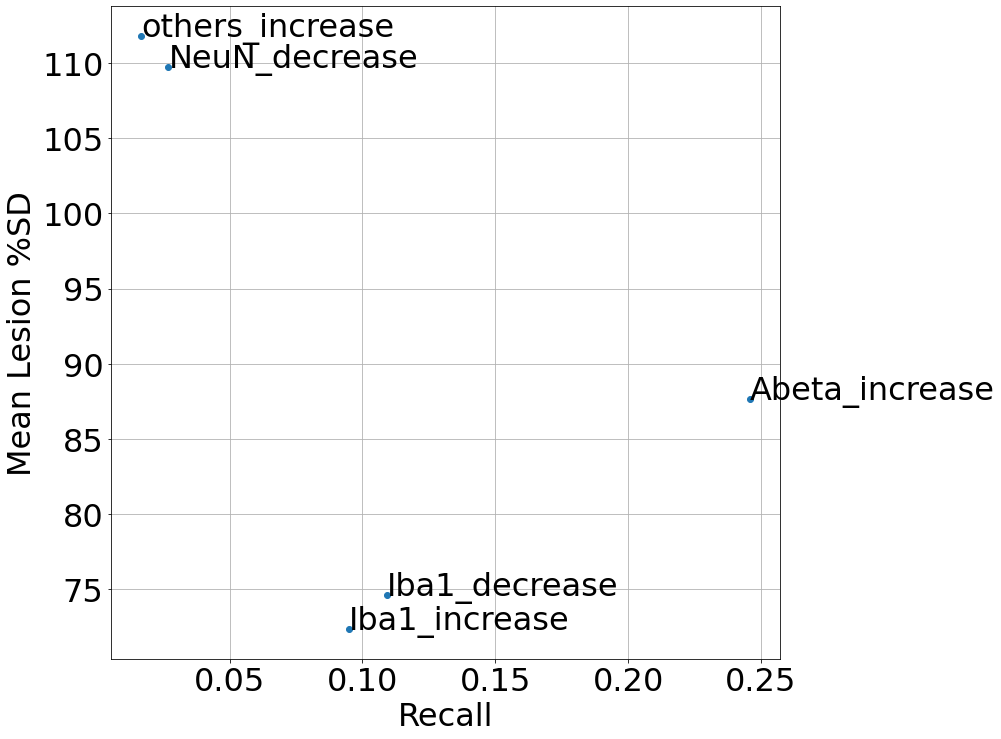

In [154]:
# 現時点では、全月齢の病変が入っている。 


fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/"
Samples = ["grid_points_with_all_including_onsets_APPAge_Abeta3.bin",
"grid_points_with_all_including_onsets_APPAge3.bin",
"grid_points_with_all_including_onsets_APPAge_Iba13.bin",
 "grid_points_with_all_including_onsets_APPAge_Iba13.bin",
 "grid_points_with_all_including_onsets_APPAge_others3.bin"]

files = [
    f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge_Abeta3.bin_increase_density_abeta_coronal_10um_slice_3D_density_sd.csv",
    f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge3.bin_decrease_density_neun_coronal_10um_slice_3D_density_sd.csv",
    f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge_Iba13.bin_increase_density_iba1_coronal_10um_slice_3D_density_sd.csv",
    f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge_Iba13.bin_decrease_density_iba1_coronal_10um_slice_3D_density_sd.csv",
    f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge_others3.bin_increase_density_others_coronal_10um_slice_3D_density_sd.csv"
]

# 各ラベルとonset対応
labels = ['Abeta_increase', 'NeuN_decrease', 'Iba1_increase', 'Iba1_decrease', 'others_increase']
onset_values = [3, 3, 5, 3, 3]
recall_values = values[::-1]

# %SDの平均値を格納するリスト
mean_sd_values = []

for label, onset, file_path in zip(labels, onset_values, files):
    # %SDデータ読み込み
    sd_data = pd.read_csv(file_path, index_col=0)
    

    region_ids = cellome_onset[cellome_onset[f"APP_specific_{label}_onset(m)"] == onset].index

    # 該当領域の%SD平均値を計算
    mean_sd = sd_data.loc[sd_data.index.intersection(region_ids), "%SD"].mean()
    mean_sd_values.append(mean_sd)

# 散布図を作成
plt.figure(figsize=(12, 12))
plt.scatter(recall_values, mean_sd_values)
plt.xlabel('Recall')
plt.ylabel('Mean Lesion %SD')
#plt.title('Recall vs Mean %SD for Different Labels')
plt.grid(True)
for i, txt in enumerate(labels):
    plt.annotate(txt, (recall_values[i], mean_sd_values[i]))
plt.show()

In [146]:
import pandas as pd
import numpy as np
import json

# 設定
conditions = {
    "WT_3m": ["#5_APPmodel_Ctr3m_1_2023_0113_1230", "#5_APPmodel_Ctr3m_2_2023_0210_1142", "#5_APPmodel_Ctr3m_3_2023_0227_1605"],
    "WT_5m": ["#4_APPmodel_Ctr5m_1_2022_1026_252", "#4_APPmodel_Ctr5m_2_2022_1028_2336", "#4_APPmodel_Ctr5m_3_2022_1101_140", "#4_APPmodel_Ctr5m_4_2023_0512_2057"],
}

labels = ["NeuN_3m", "Iba1_3m", "Iba1_5m", "Others_3m"]
data_files = {
    "NeuN_3m": ("density_neun_coronal_10um_slice.csv", "results_neun_coronal_10um_slice.csv"),
    "Iba1_3m": ("density_iba1_coronal_10um_slice.csv", "results_iba1_coronal_10um_slice.csv"),
    "Iba1_5m": ("density_iba1_coronal_10um_slice.csv", "results_iba1_coronal_10um_slice.csv"),
    "Others_3m": ("density_others_coronal_10um_slice.csv", "results_others_coronal_10um_slice.csv")
}
sample_sets = {
    "NeuN_3m": conditions["WT_3m"],
    "Iba1_3m": conditions["WT_3m"],
    "Iba1_5m": conditions["WT_5m"],
    "Others_3m": conditions["WT_3m"],
}
base_path = "/home/mitani/CUBIC-informatics/param/Neuronomics/"
output_file = "/export3/Imaging/ds4_Data4/Cellome/Naive_Cell_Distribution_SD.csv"

# 各atlasIDにおけるサンプルごとの%SDを保存する辞書
results = {}

# 各ラベルについて%SDを計算
for label, samples in sample_sets.items():
    density_file_name, count_file_name = data_files[label]
    
    for sample in samples:
        # パラメータファイルの読み込み
        param_path = f"{base_path}{sample}/param_multichannel-rank.json"
        with open(param_path) as f:
            param = json.load(f)
        fw_dir_nu = param["dst_basedir"]

        # density, count, volumeファイルの読み込み
        density_file = f"{fw_dir_nu}/{density_file_name}"
        count_file = f"{fw_dir_nu}/{count_file_name}"
        volume_file = f"{fw_dir_nu}/results_volume_coronal_10um_slice.csv"
        
        density_data = pd.read_csv(density_file, index_col=0)
        count_data = pd.read_csv(count_file, index_col=0)
        volume_data = pd.read_csv(volume_file, index_col=0)

        # 各atlasIDごとに有効スライスの%SDを計算
        for atlas_id in density_data.columns:
            valid_slices = volume_data[atlas_id] > 0
            if valid_slices.any():  # 有効スライスが存在する場合のみ計算
                valid_density_data = density_data.loc[valid_slices, atlas_id]
                valid_count_data = count_data.loc[valid_slices, atlas_id]
                valid_volume_data = volume_data.loc[valid_slices, atlas_id]

                # 3D密度の計算
                total_count = valid_count_data.sum()
                total_volume = valid_volume_data.sum()
                density_3d = total_count / total_volume if total_volume > 0 else np.nan

                # %SDの計算
                sd = valid_density_data.std()
                sd_percent = (sd / density_3d) * 100 if density_3d > 0 else np.nan

                # 結果を辞書に保存
                if atlas_id not in results:
                    results[atlas_id] = {}
                if label not in results[atlas_id]:
                    results[atlas_id][label] = []  # ラベルの初期化を追加
                results[atlas_id][label].append(sd_percent)

# 各atlasIDとラベルごとにサンプル間の平均%SDを計算
final_results = {}
for atlas_id, sd_dict in results.items():
    final_results[atlas_id] = {}
    for label, sd_values in sd_dict.items():
        final_results[atlas_id][label] = np.nanmean(sd_values)  # NaNを無視した平均

# 結果をDataFrameにしてCSVに保存
final_results_df = pd.DataFrame(final_results).T
final_results_df.to_csv(output_file)

print(f"Results saved to {output_file}")


Results saved to /export3/Imaging/ds4_Data4/Cellome/Naive_Cell_Distribution_SD.csv


/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:79: RuntimeWarning: Mean of empty slice


In [267]:
import pandas as pd
import numpy as np
import json

# 設定
conditions = {
    #"WT_3m": ["#5_APPmodel_Ctr3m_1_2023_0113_1230", "#5_APPmodel_Ctr3m_2_2023_0210_1142", "#5_APPmodel_Ctr3m_3_2023_0227_1605"],
    "WT_5m": ["#4_APPmodel_Ctr5m_1_2022_1026_252", "#4_APPmodel_Ctr5m_2_2022_1028_2336", "#4_APPmodel_Ctr5m_3_2022_1101_140", "#4_APPmodel_Ctr5m_4_2023_0512_2057"],
}

labels = ["NeuN_5m", "Iba1_5m", "Others_5m"]
data_files = {
    "NeuN_5m": ("density_neun_coronal_10um_slice.csv", "results_neun_coronal_10um_slice.csv"),
    "Iba1_5m": ("density_iba1_coronal_10um_slice.csv", "results_iba1_coronal_10um_slice.csv"),
    "Others_5m": ("density_others_coronal_10um_slice.csv", "results_others_coronal_10um_slice.csv")
}
sample_sets = {
    "NeuN_5m": conditions["WT_5m"],
    "Iba1_5m": conditions["WT_5m"],
    "Others_5m": conditions["WT_5m"],
}
base_path = "/home/mitani/CUBIC-informatics/param/Neuronomics/"
output_file = "/export3/Imaging/ds4_Data4/Cellome/Naive_Cell_Distribution_SD_5m.csv"

# 各atlasIDにおけるサンプルごとの%SDを保存する辞書
results = {}

# 各ラベルについて%SDを計算
for label, samples in sample_sets.items():
    density_file_name, count_file_name = data_files[label]
    
    for sample in samples:
        # パラメータファイルの読み込み
        param_path = f"{base_path}{sample}/param_multichannel-rank.json"
        with open(param_path) as f:
            param = json.load(f)
        fw_dir_nu = param["dst_basedir"]

        # density, count, volumeファイルの読み込み
        density_file = f"{fw_dir_nu}/{density_file_name}"
        count_file = f"{fw_dir_nu}/{count_file_name}"
        volume_file = f"{fw_dir_nu}/results_volume_coronal_10um_slice.csv"
        
        density_data = pd.read_csv(density_file, index_col=0)
        count_data = pd.read_csv(count_file, index_col=0)
        volume_data = pd.read_csv(volume_file, index_col=0)

        # 各atlasIDごとに有効スライスの%SDを計算
        for atlas_id in density_data.columns:
            valid_slices = volume_data[atlas_id] > 0
            if valid_slices.any():  # 有効スライスが存在する場合のみ計算
                valid_density_data = density_data.loc[valid_slices, atlas_id]
                valid_count_data = count_data.loc[valid_slices, atlas_id]
                valid_volume_data = volume_data.loc[valid_slices, atlas_id]

                # 3D密度の計算
                total_count = valid_count_data.sum()
                total_volume = valid_volume_data.sum()
                density_3d = total_count / total_volume if total_volume > 0 else np.nan

                # %SDの計算
                sd = valid_density_data.std()
                sd_percent = (sd / density_3d) * 100 if density_3d > 0 else np.nan

                # 結果を辞書に保存
                if atlas_id not in results:
                    results[atlas_id] = {}
                if label not in results[atlas_id]:
                    results[atlas_id][label] = []  # ラベルの初期化を追加
                results[atlas_id][label].append(sd_percent)

# 各atlasIDとラベルごとにサンプル間の平均%SDを計算
final_results = {}
for atlas_id, sd_dict in results.items():
    final_results[atlas_id] = {}
    for label, sd_values in sd_dict.items():
        final_results[atlas_id][label] = np.nanmean(sd_values)  # NaNを無視した平均

# 結果をDataFrameにしてCSVに保存
final_results_df = pd.DataFrame(final_results).T
final_results_df.to_csv(output_file)

print(f"Results saved to {output_file}")


Results saved to /export3/Imaging/ds4_Data4/Cellome/Naive_Cell_Distribution_SD_5m.csv


/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice


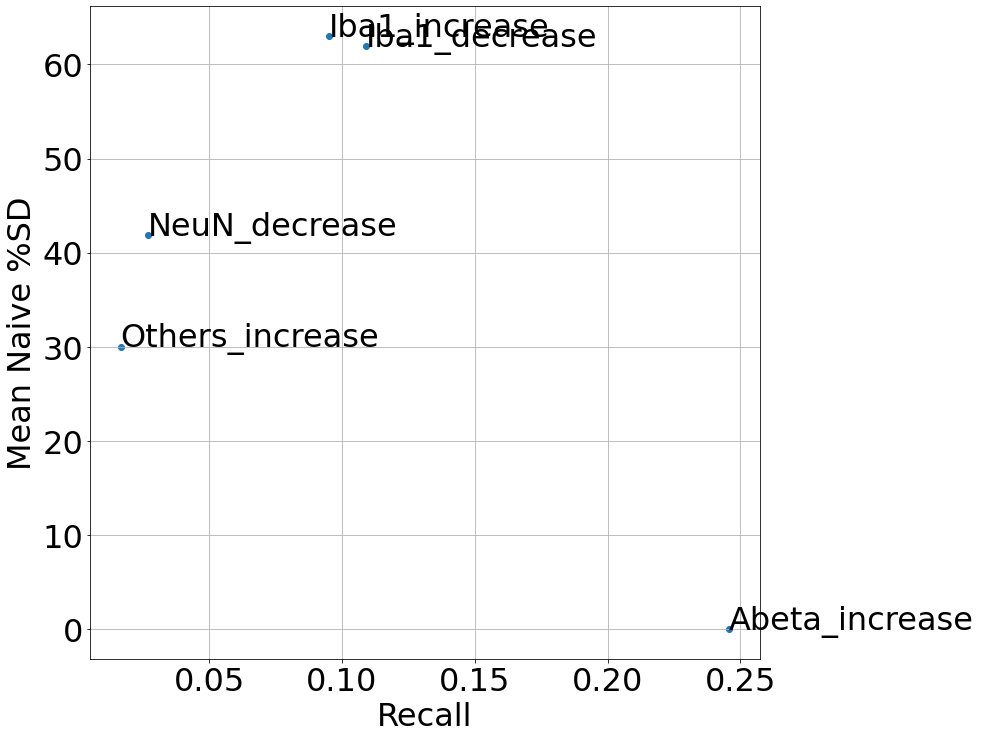

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# 先ほど計算したNaiveな%SDデータの読み込み
naive_sd_file = "/export3/Imaging/ds4_Data4/Cellome/Naive_Cell_Distribution_SD.csv"
naive_sd_data = pd.read_csv(naive_sd_file, index_col=0)

# ラベル、onset、recall値を設定
labels = ['Abeta_increase', 'NeuN_decrease', 'Iba1_increase', 'Iba1_decrease', 'Others_increase']
naive_labels = ["NeuN_3m", "Iba1_3m", "Iba1_5m", "Others_3m"]
recall_values = values[::-1]

# Naive %SDの平均値を格納するリスト
naive_sd_values = []

# 各ラベルに対応するNaiveな%SDの中央値を抽出
for label in labels:
    if label == "Abeta_increase":
        # Abeta_increaseがない場合、0を割り当て
        naive_sd_values.append(0)
    else:
        # Naive %SDデータのラベルに対応する列の中央値を取得
        naive_label = naive_labels.pop(0)
        median_sd = naive_sd_data[naive_label].mean()
        naive_sd_values.append(median_sd)

# 散布図を作成
plt.figure(figsize=(12, 12))
plt.scatter(recall_values, naive_sd_values)
plt.xlabel('Recall')
plt.ylabel('Mean Naive %SD')
plt.grid(True)
for i, txt in enumerate(labels):
    plt.annotate(txt, (recall_values[i], naive_sd_values[i]))
plt.show()


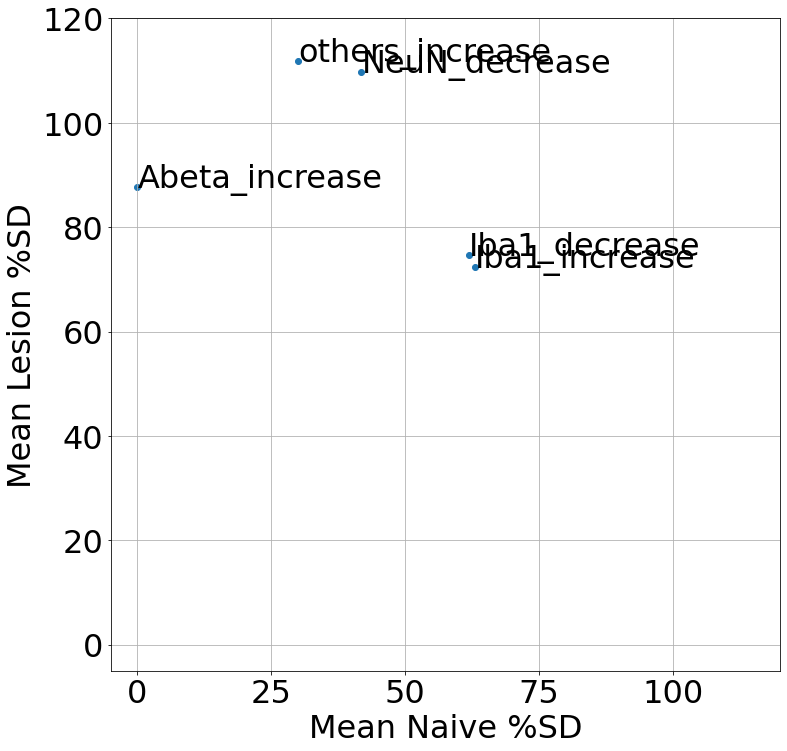

In [158]:
import pandas as pd
import matplotlib.pyplot as plt



# 散布図を作成
plt.figure(figsize=(12, 12))
plt.scatter(naive_sd_values, lesion_sd_values)
plt.xlabel('Mean Naive %SD')
plt.ylabel('Mean Lesion %SD')
plt.xlim(-5,120)
plt.ylim(-5,120)
plt.grid(True)
for i, txt in enumerate(labels):
    plt.annotate(txt, (naive_sd_values[i], lesion_sd_values[i]))
plt.show()


R-squared: 0.9700825693203977
p-values:
const        0.012243
Naive_SD     0.021007
Lesion_SD    0.020993
dtype: float64


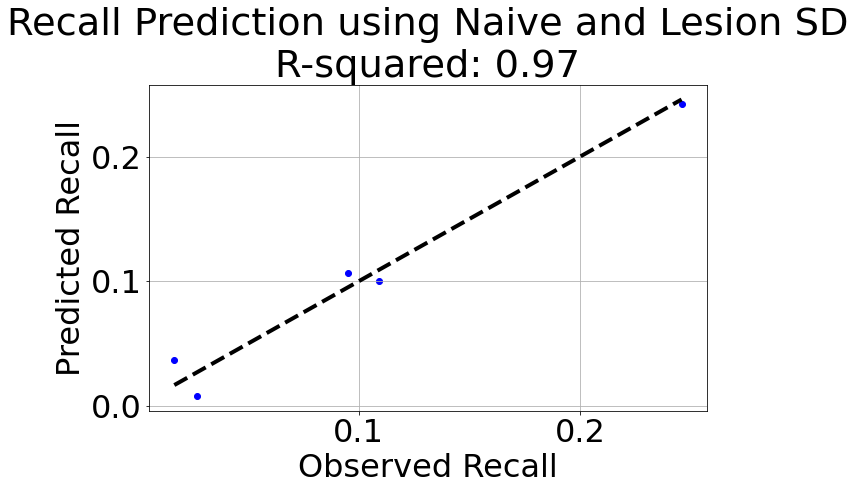

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm

# 2D recallとNaiveな%SDの値の設定
labels = ['Abeta_increase', 'NeuN_decrease', 'Iba1_increase', 'Iba1_decrease', 'Others_increase']
naive_sd_file = "/export3/Imaging/ds4_Data4/Cellome/Naive_Cell_Distribution_SD.csv"
naive_sd_data = pd.read_csv(naive_sd_file, index_col=0)
naive_labels = ["NeuN_3m", "Iba1_3m", "Iba1_5m", "Others_3m"]
recall_values = values[::-1]
        
# 病変の%SDの平均値を設定（仮の値として0を追加して回帰に含めます）
lesion_sd_values = mean_sd_values.copy()  # 例として仮の値を使用します。これを実データで置き換えてください

# データフレームの作成
data = pd.DataFrame({
    'Recall': recall_values,
    'Naive_SD': naive_sd_values,
    'Lesion_SD': lesion_sd_values
})

# 説明変数と目的変数を分離
X = data[['Naive_SD', 'Lesion_SD']]
X = sm.add_constant(X)  # 定数項を追加
y = data['Recall']

# statsmodelsを使った回帰の実行
model = sm.OLS(y, X).fit()

# モデルの評価とp値
predictions = model.predict(X)
r_squared = model.rsquared
p_values = model.pvalues

print(f"R-squared: {r_squared}")
print("p-values:")
print(p_values)

# 回帰結果のプロット
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Observed Recall')
plt.ylabel('Predicted Recall')
plt.title(f'Recall Prediction using Naive and Lesion SD\nR-squared: {r_squared:.2f}')
plt.grid(True)
plt.show()

In [268]:
naive_sd_file = "/export3/Imaging/ds4_Data4/Cellome/Naive_Cell_Distribution_SD_5m.csv"
naive_sd_data = pd.read_csv(naive_sd_file, index_col=0)

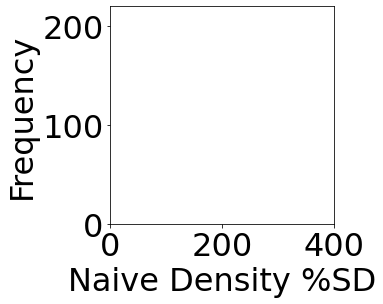

In [397]:
# Plot histogram for 'NeuN_3m'
#mean_value = naive_sd_data['NeuN_5m'].mean()

plt.figure(figsize=(4, 4))
plt.hist([], bins=100, color='limegreen', edgecolor='None', range=(0, 400))
#plt.axvline(mean_value, color='green', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
plt.xlabel('Naive Density %SD')
plt.ylabel('Frequency')
#plt.tight_layout()
plt.xlim(0,400)
plt.ylim(0,220)
# Save the plot
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/Histogram_of_Abeta_Naive_density_percent_SD.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

29.209329547836006


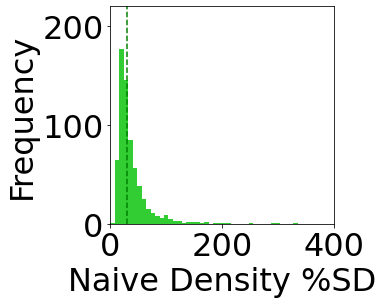

In [376]:
# Plot histogram for 'NeuN_3m'
mean_value = naive_sd_data['NeuN_5m'].median()
print(mean_value)
plt.figure(figsize=(4, 4))
plt.hist(naive_sd_data['NeuN_5m'], bins=50, color='limegreen', edgecolor='None', range=(0, 400))
plt.axvline(mean_value, color='green', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
plt.xlabel('Naive Density %SD')
plt.ylabel('Frequency')
#plt.tight_layout()
plt.xlim(0,400)
plt.ylim(0,220)
# Save the plot
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/Histogram_of_Neuron_Naive_density_percent_SD.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

46.97914008122979


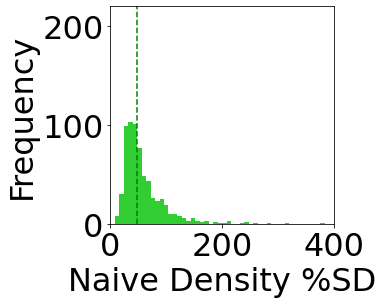

In [377]:
# Plot histogram for 'NeuN_3m'
mean_value = naive_sd_data['Iba1_5m'].median()
print(mean_value)
plt.figure(figsize=(4, 4))
plt.hist(naive_sd_data['Iba1_5m'], bins=50, color='limegreen', edgecolor='None', range=(0, 400))
plt.axvline(mean_value, color='green', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
plt.xlabel('Naive Density %SD')
plt.ylabel('Frequency')
plt.xlim(0,400)
plt.ylim(0,220)
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/Histogram_of_Microglia_Naive_density_percent_SD.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

24.89735884340006


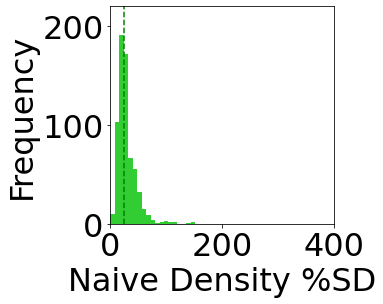

In [396]:
# Plot histogram for 'NeuN_3m'
mean_value = naive_sd_data['Others_5m'].median()
print(mean_value)
plt.figure(figsize=(4, 4))
plt.hist(naive_sd_data['Others_5m'], bins=50, color='limegreen', edgecolor='None', range=(0, 400), )
plt.axvline(mean_value, color='green', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
plt.xlabel('Naive Density %SD')
plt.ylabel('Frequency')
plt.xlim(0,400)
plt.ylim(0,220)
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/Histogram_of_Others_Naive_density_percent_SD.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

In [319]:
files = [
    f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge_Abeta3.bin_increase_density_abeta_coronal_10um_slice_3D_density_sd.csv",
    f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge3.bin_decrease_density_neun_coronal_10um_slice_3D_density_sd.csv",
    f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge_Iba13.bin_increase_density_iba1_coronal_10um_slice_3D_density_sd.csv",
    f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge_Iba13.bin_decrease_density_iba1_coronal_10um_slice_3D_density_sd.csv",
    f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge_others3.bin_increase_density_others_coronal_10um_slice_3D_density_sd.csv"
]

[87.6272504320943,
 109.73212015303491,
 72.35872933154475,
 74.59871572538573,
 111.78557282895558]

846.783182289363
73.26017822966278


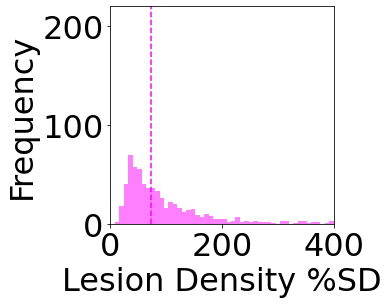

In [401]:
# Define the file path for the lesion version data
fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/"
file_path = f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge_Abeta3.bin_decrease_density_abeta_coronal_10um_slice_3D_density_sd.csv"
file_path2 = f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge_Abeta3.bin_increase_density_abeta_coronal_10um_slice_3D_density_sd.csv"

# Load the dataset
lesion_data_decrease = pd.read_csv(file_path)
lesion_data_increase = pd.read_csv(file_path2)

lesion_data_decrease = lesion_data_decrease[lesion_data_decrease['%SD'] != 0]
lesion_data_increase = lesion_data_increase[lesion_data_increase['%SD'] != 0]
# Calculate the means for both datasets
mean_sd_decrease = lesion_data_decrease['%SD'].median()
mean_sd_increase = lesion_data_increase['%SD'].median()
print(mean_sd_decrease )
print(mean_sd_increase )
# Plot histograms for both datasets within the same figure
plt.figure(figsize=(4, 4))

# Decrease histogram in skyblue
plt.hist(lesion_data_decrease['%SD'], bins=50, color='deepskyblue', edgecolor='None', range=(0, 400), alpha=0.7, label='Decrease')
plt.axvline(mean_sd_decrease, color='mediumblue', linestyle='--', linewidth=1.5, label=f'Mean Decrease: {mean_sd_decrease:.2f}')

# Increase histogram in magenta
plt.hist(lesion_data_increase['%SD'], bins=50, color='magenta', edgecolor='None', range=(0, 400), alpha=0.5, label='Increase')
plt.axvline(mean_sd_increase, color='magenta', linestyle='--', linewidth=1.5, label=f'Mean Increase: {mean_sd_increase:.2f}')

# Add labels and legend
plt.xlabel('Lesion Density %SD')
plt.ylabel('Frequency')
plt.xlim(0, 400)
plt.ylim(0,220)
#plt.legend()

# Save the plot
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/Histogram_of_Abeta_Lesion_density_percent_SD.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Display the plot
plt.show()


115.00712804905342
271.9017337244979


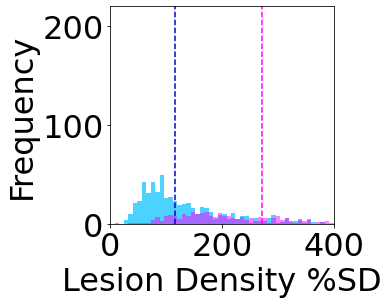

In [398]:
# Define the file path for the lesion version data
fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/"
file_path = f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge3.bin_decrease_density_neun_coronal_10um_slice_3D_density_sd.csv"
file_path2 = f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge3.bin_increase_density_neun_coronal_10um_slice_3D_density_sd.csv"

# Load the dataset
lesion_data_decrease = pd.read_csv(file_path)
lesion_data_increase = pd.read_csv(file_path2)

# Filter out rows where '%SD' is zero for both datasets
lesion_data_decrease = lesion_data_decrease[lesion_data_decrease['%SD'] != 0]
lesion_data_increase = lesion_data_increase[lesion_data_increase['%SD'] != 0]

# Calculate the means for both datasets
mean_sd_decrease = lesion_data_decrease['%SD'].median()
mean_sd_increase = lesion_data_increase['%SD'].median()
print(mean_sd_decrease )
print(mean_sd_increase )
# Plot histograms for both datasets within the same figure
plt.figure(figsize=(4, 4))

# Decrease histogram in skyblue
plt.hist(lesion_data_decrease['%SD'], bins=50, color='deepskyblue', edgecolor='None', range=(0, 400), alpha=0.7, label='Decrease')
plt.axvline(mean_sd_decrease, color='mediumblue', linestyle='--', linewidth=1.5, label=f'Mean Decrease: {mean_sd_decrease:.2f}')

# Increase histogram in magenta
plt.hist(lesion_data_increase['%SD'], bins=50, color='magenta', edgecolor='None', range=(0, 400), alpha=0.5, label='Increase')
plt.axvline(mean_sd_increase, color='magenta', linestyle='--', linewidth=1.5, label=f'Mean Increase: {mean_sd_increase:.2f}')

# Add labels and legend
plt.xlabel('Lesion Density %SD')
plt.ylabel('Frequency')
plt.xlim(0, 400)
plt.ylim(0,220)
#plt.legend()

# Save the plot
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/Histogram_of_Neuron_Lesion_density_percent_SD.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Display the plot
plt.show()


143.12250977936702
163.17893848831238


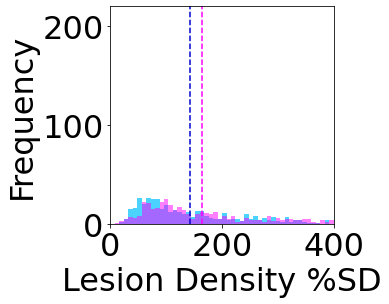

In [399]:
# Define the file path for the lesion version data
fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/"
file_path = f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge_Iba13.bin_decrease_density_iba1_coronal_10um_slice_3D_density_sd.csv"
file_path2 = f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge_Iba13.bin_increase_density_iba1_coronal_10um_slice_3D_density_sd.csv"

# Load the dataset
lesion_data_decrease = pd.read_csv(file_path)
lesion_data_increase = pd.read_csv(file_path2)

lesion_data_decrease = lesion_data_decrease[lesion_data_decrease['%SD'] != 0]
lesion_data_increase = lesion_data_increase[lesion_data_increase['%SD'] != 0]

# Calculate the means for both datasets
mean_sd_decrease = lesion_data_decrease['%SD'].median()
mean_sd_increase = lesion_data_increase['%SD'].median()
print(mean_sd_decrease )
print(mean_sd_increase )
# Plot histograms for both datasets within the same figure
plt.figure(figsize=(4, 4))

# Decrease histogram in skyblue
plt.hist(lesion_data_decrease['%SD'], bins=50, color='deepskyblue', edgecolor='None', range=(0, 400), alpha=0.7, label='Decrease')
plt.axvline(mean_sd_decrease, color='mediumblue', linestyle='--', linewidth=1.5, label=f'Mean Decrease: {mean_sd_decrease:.2f}')

# Increase histogram in magenta
plt.hist(lesion_data_increase['%SD'], bins=50, color='magenta', edgecolor='None', range=(0, 400), alpha=0.5, label='Increase')
plt.axvline(mean_sd_increase, color='magenta', linestyle='--', linewidth=1.5, label=f'Mean Increase: {mean_sd_increase:.2f}')

# Add labels and legend
plt.xlabel('Lesion Density %SD')
plt.ylabel('Frequency')
plt.xlim(0, 400)
plt.ylim(0,220)
#plt.legend()

# Save the plot
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/Histogram_of_Microglia_Lesion_density_percent_SD.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Display the plot
plt.show()


291.5127666595138
50.871740316452446


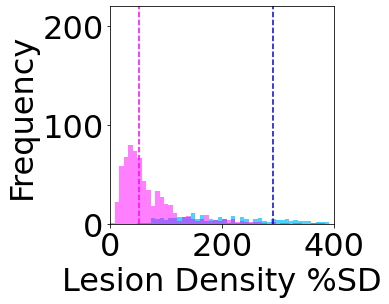

In [400]:
# Define the file path for the lesion version data
fw_dir_nu = "/export3/Imaging/ds4_Data4/Cellome/"
file_path = f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge_others3.bin_decrease_density_others_coronal_10um_slice_3D_density_sd.csv"
file_path2 = f"{fw_dir_nu}/grid_points_with_all_including_onsets_APPAge_others3.bin_increase_density_others_coronal_10um_slice_3D_density_sd.csv"

# Load the dataset
lesion_data_decrease = pd.read_csv(file_path)
lesion_data_increase = pd.read_csv(file_path2)

lesion_data_decrease = lesion_data_decrease[lesion_data_decrease['%SD'] != 0]
lesion_data_increase = lesion_data_increase[lesion_data_increase['%SD'] != 0]

# Calculate the means for both datasets
mean_sd_decrease = lesion_data_decrease['%SD'].median()
mean_sd_increase = lesion_data_increase['%SD'].median()
print(mean_sd_decrease )
print(mean_sd_increase )
# Plot histograms for both datasets within the same figure
plt.figure(figsize=(4, 4))

# Decrease histogram in skyblue
plt.hist(lesion_data_decrease['%SD'], bins=50, color='deepskyblue', edgecolor='None', range=(0, 400), alpha=0.7, label='Decrease')
plt.axvline(mean_sd_decrease, color='mediumblue', linestyle='--', linewidth=1.5, label=f'Mean Decrease: {mean_sd_decrease:.2f}')

# Increase histogram in magenta
plt.hist(lesion_data_increase['%SD'], bins=50, color='magenta', edgecolor='None', range=(0, 400), alpha=0.5, label='Increase')
plt.axvline(mean_sd_increase, color='magenta', linestyle='--', linewidth=1.5, label=f'Mean Increase: {mean_sd_increase:.2f}')

# Add labels and legend
plt.xlabel('Lesion Density %SD')
plt.ylabel('Frequency')
plt.xlim(0, 400)
plt.ylim(0,220)
#plt.legend()

# Save the plot
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/Histogram_of_Others_Lesion_density_percent_SD.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Display the plot
plt.show()


In [321]:
lesion_data

,Unnamed: 0,%SD
0,1,260.595385
1,2,128.587502
2,6,1133.368766
3,7,97.904367
4,9,110.094517
5,10,82.385416
6,12,195.110417
7,15,138.312819
8,17,80.682473
9,19,259.911100


R-squared: 0.38333535473110086
p-values:
Intercept: 1.5732124478930529e-63
Naive_SD: 2.0286657285148296e-41
Lesion_SD: 1.9254452919407438e-41
Spearman Correlation: 0.5032883762953635
Spearman p-value: 1.829260285840012e-33


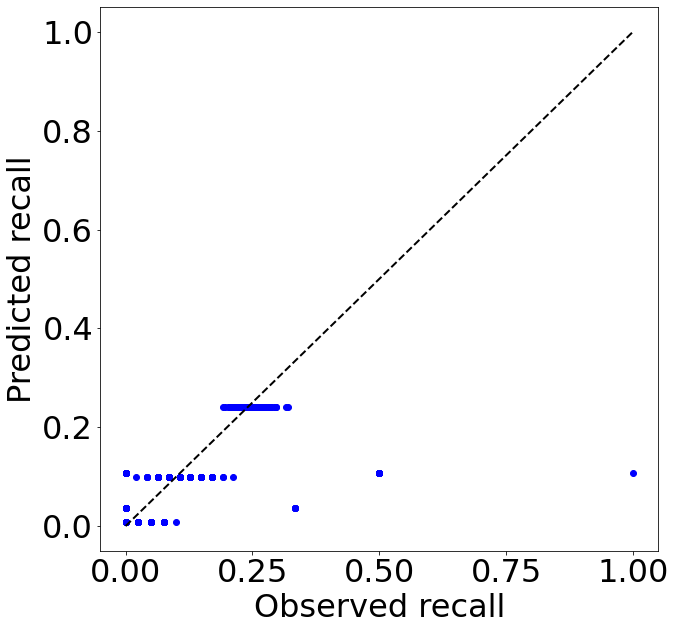

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rpy2.robjects import numpy2ri, r
import rpy2.robjects as robjects

# Activate numpy to R conversion
numpy2ri.activate()

# Labels for each biomarker
labels = ['Abeta_increase', 'NeuN_decrease', 'Iba1_increase', 'Iba1_decrease', 'Others_increase']
naive_sd_file = "/export3/Imaging/ds4_Data4/Cellome/Naive_Cell_Distribution_SD.csv"
naive_sd_data = pd.read_csv(naive_sd_file, index_col=0)
naive_labels = ["NeuN_3m", "Iba1_3m", "Iba1_5m", "Others_3m"]

# Fixed values for naive_sd and lesion_sd corresponding to each label
# For simplicity, I'm using mock values for `naive_sd_values` and `lesion_sd_values`.
# Please replace them with your actual `naive_sd_values` and `lesion_sd_values`.
lesion_sd_values = mean_sd_values.copy()

# Flatten recall list and repeat sd values according to the number of trials
recall_values = np.concatenate(recall_list2)
naive_sd_expanded = np.repeat(naive_sd_values, 100)
lesion_sd_expanded = np.repeat(lesion_sd_values, 100)

# Prepare data for R
robjects.globalenv['recall'] = recall_values
robjects.globalenv['naive_sd'] = naive_sd_expanded
robjects.globalenv['lesion_sd'] = lesion_sd_expanded

# R code for linear regression using lm
r_code = """
    df <- data.frame(Recall = recall, Naive_SD = naive_sd, Lesion_SD = lesion_sd)
    model <- lm(Recall ~ Naive_SD + Lesion_SD, data = df)
    r_squared <- summary(model)$r.squared
    p_values <- summary(model)$coefficients[, "Pr(>|t|)"]
    fitted_values <- predict(model)
    list(r_squared = r_squared, p_values = p_values, fitted_values = fitted_values)
"""
# Run the R code and extract results
result = r(r_code)

# Extract results from R output
r_squared = result[0][0]
p_values = result[1]
fitted_values = np.array(result[2])

# Print R-squared and p-values
print(f"R-squared: {r_squared}")
print("p-values:")
for i, label in enumerate(["Intercept", "Naive_SD", "Lesion_SD"]):
    print(f"{label}: {p_values[i]}")

from scipy.stats import spearmanr

# Calculate the Spearman correlation
spearman_corr, spearman_p = spearmanr(recall_values, fitted_values)

# Print the Spearman correlation and p-value
print(f"Spearman Correlation: {spearman_corr}")
print(f"Spearman p-value: {spearman_p}")



# Scatter plot of observed vs. predicted recall values
plt.figure(figsize=(10, 10))
plt.scatter(recall_values, fitted_values, color='blue', alpha=1.0)
#plt.plot([recall_values.min(), recall_values.max()], [recall_values.min(), recall_values.max()], 'k--', lw=2)
plt.plot([recall_values.min(), recall_values.max()], [recall_values.min(), recall_values.max()], 'k--', lw=2)
plt.xlabel('Observed recall')
plt.ylabel('Predicted recall')
#plt.title(f'Recall Prediction using Naive and Lesion SD\nR-squared: {r_squared:.2f}')
#plt.grid(True)

plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/Predicted_recall_vs_observed_recall.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


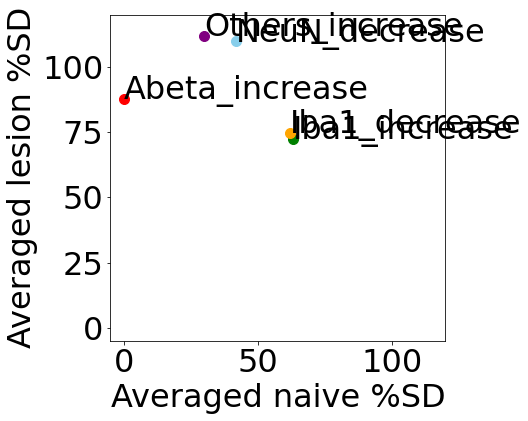

In [425]:
import pandas as pd
import matplotlib.pyplot as plt

colors = ['red', 'skyblue', 'green', 'orange', 'purple'] 
labels = ['Abeta_increase', 'NeuN_decrease', 'Iba1_increase', 'Iba1_decrease', 'Others_increase']  # Labels as before

# 散布図を作成
plt.figure(figsize=(6, 6))
for i, (x, y) in enumerate(zip(naive_sd_values, lesion_sd_values)):
    plt.scatter(x, y, color=colors[i], label=labels[i], s=100)
plt.xlabel('Averaged naive %SD')
plt.ylabel('Averaged lesion %SD')
plt.xlim(-5,120)
plt.ylim(-5,120)
#plt.grid(True)
for i, txt in enumerate(labels):
    plt.annotate(txt, (naive_sd_values[i], lesion_sd_values[i]))
    
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/Naive_SD_vs_Lesion_SD.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


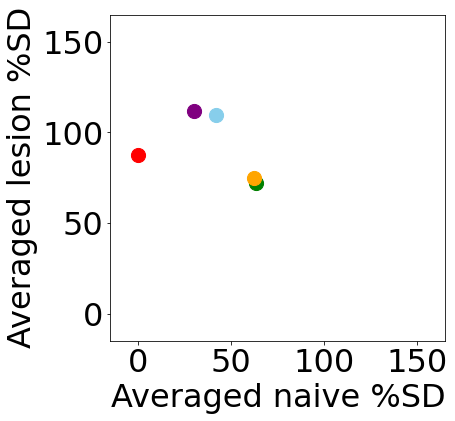

In [442]:
import pandas as pd
import matplotlib.pyplot as plt

colors = ['red', 'skyblue', 'green', 'orange', 'purple'] 
labels = ['Abeta_increase', 'NeuN_decrease', 'Iba1_increase', 'Iba1_decrease', 'Others_increase']  # Labels as before

# 散布図を作成
plt.figure(figsize=(6, 6))
for i, (x, y) in enumerate(zip(naive_sd_values, lesion_sd_values)):
    plt.scatter(x, y, color=colors[i], label=labels[i], s=200)
plt.xlabel('Averaged naive %SD')
plt.ylabel('Averaged lesion %SD')
plt.xlim(-15,150+15)
plt.ylim(-15,150+15)
#plt.grid(True)
#for i, txt in enumerate(labels):
#    plt.annotate(txt, (naive_sd_values[i], lesion_sd_values[i]))
plt.xticks([0, 50, 100, 150])
plt.yticks([0, 50, 100, 150])   
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/Naive_SD_vs_Lesion_SD.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


R-squared: 0.38333535473110086
Intercept p-value: 1.5732124478930529e-63
Naive_SD p-value: 2.0286657285148296e-41
Lesion_SD p-value: 1.9254452919407438e-41
Intercept: 0.6339860477408958
Naive_SD coefficient: -0.0032262381444730006
Lesion_SD coefficient: -0.004475485629682952
MSE for average points: 0.00020121589750812292


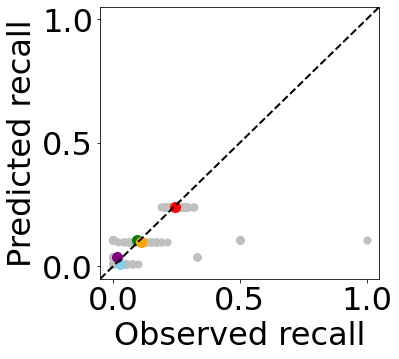

In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rpy2.robjects import numpy2ri, r
import rpy2.robjects as robjects
from sklearn.metrics import mean_squared_error

# Activate numpy to R conversion
numpy2ri.activate()
colors = ['red', 'skyblue', 'green', 'orange', 'purple'] 

# Prepare data
robjects.globalenv['recall'] = recall_values
robjects.globalenv['naive_sd'] = naive_sd_expanded
robjects.globalenv['lesion_sd'] = lesion_sd_expanded

# R code for linear regression and prediction
r_code = """
    df <- data.frame(Recall = recall, Naive_SD = naive_sd, Lesion_SD = lesion_sd)
    model <- lm(Recall ~ Naive_SD + Lesion_SD, data = df)
    r_squared <- summary(model)$r.squared
    p_values <- summary(model)$coefficients[, "Pr(>|t|)"]
    coefficients <- coef(model)
    fitted_values <- predict(model)
    list(r_squared = r_squared, p_values = p_values, coefficients = coefficients, fitted_values = fitted_values)
"""
# Run R code and extract results
result = r(r_code)
r_squared = result[0][0]
p_values = result[1]
coefficients = result[2]
fitted_values = np.array(result[3])

# Print R-squared and p-values
print(f"R-squared: {r_squared}")
for i, label in enumerate(["Intercept", "Naive_SD", "Lesion_SD"]):
    print(f"{label} p-value: {p_values[i]}")

# Print coefficients for the regression line
intercept, coef_naive_sd, coef_lesion_sd = coefficients
print(f"Intercept: {intercept}")
print(f"Naive_SD coefficient: {coef_naive_sd}")
print(f"Lesion_SD coefficient: {coef_lesion_sd}")

# Calculate MSE for the average points
recall_means = [np.mean(recall_list2[i]) for i in range(len(labels))]
predicted_means = intercept + coef_naive_sd * np.array(naive_sd_means) + coef_lesion_sd * np.array(lesion_sd_means)
mse_mean_points = mean_squared_error(recall_means, predicted_means)
print(f"MSE for average points: {mse_mean_points}")

# Scatter plot with individual and average points
plt.figure(figsize=(5, 5))
plt.scatter(recall_values, fitted_values, color='silver', alpha=1, s=50,label='Individual Trials')
#plt.scatter(recall_means, predicted_means, color='red', s=100, marker='o', label='Average Points')
for i, (recall_mean, predicted_mean) in enumerate(zip(recall_means, predicted_means)):
    plt.scatter(recall_mean, predicted_mean, color=colors[i], s=100, marker='o', label=f'Averaged Point - {labels[i]}')

plt.plot([-0.05, 1.05], [-0.05, 1.05], 'k--', lw=2)
plt.xticks([0.0, 0.5, 1.0])
plt.yticks([0.0, 0.5, 1.0])
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('Observed recall')
plt.ylabel('Predicted recall')
plt.savefig('/export3/Imaging/ds4_Data5/mitani/Neurology/Fig.5/Predicted_recall_vs_observed_recall.pdf',
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


